In [1]:
import cx_Oracle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
con = cx_Oracle.connect('LM_PDB/LM@localhost:1521/xepdb1')
cursor = con.cursor()

In [58]:
cursor.execute("select column_name from user_tab_columns where table_name = '반기별구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)

['고객번호', 'y14_1', 'y14_2', 'y15_1', 'y15_2', '선매품_1', '선매품_2', '선매품_3', '선매품_4', '편의품_1', '편의품_2', '편의품_3', '편의품_4', '전문품_1', '전문품_2', '전문품_3', '전문품_4', '기타_1', '기타_2', '기타_3', '기타_4']


In [59]:
cursor.execute("select * from 반기별구매액")
x = cursor.fetchall()
df1 = pd.DataFrame(x,columns = col_list)
df1

,고객번호,y14_1,y14_2,y15_1,y15_2,선매품_1,선매품_2,선매품_3,선매품_4,편의품_1,...,편의품_3,편의품_4,전문품_1,전문품_2,전문품_3,전문품_4,기타_1,기타_2,기타_3,기타_4
0,00001,19925355.0,34116312.0,17898365.0,13102518.0,17812110.0,30411510.0,14056600.0,11968620.0,2113245.0,...,3085065.0,1133898.0,NaN,236550.0,756700.0,NaN,NaN,NaN,NaN,NaN
1,00002,24323230.0,21922100.0,27791610.0,25843820.0,18215820.0,17382380.0,22353980.0,22431610.0,6107410.0,...,3893720.0,3412210.0,NaN,434150.0,1543910.0,NaN,NaN,NaN,NaN,NaN
2,00003,851215.0,1042554.0,592280.0,679118.0,80000.0,26900.0,NaN,7800.0,771215.0,...,592280.0,671318.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,00004,5042106.0,4257510.0,3656937.0,3737257.0,3309520.0,3244440.0,1748730.0,1939080.0,1732586.0,...,1908207.0,1628177.0,NaN,NaN,NaN,170000.0,NaN,NaN,NaN,NaN
4,00005,5460150.0,2225730.0,2934930.0,2616260.0,2054230.0,1105100.0,1902610.0,1423650.0,3348920.0,...,1032320.0,1192610.0,57000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,NaN,1190620.0,2395920.0,2192740.0,NaN,449900.0,742600.0,394680.0,NaN,...,1653320.0,1439010.0,NaN,NaN,NaN,359050.0,NaN,NaN,NaN,NaN
19379,19380,NaN,522700.0,837950.0,2552327.0,NaN,9900.0,47000.0,140990.0,NaN,...,790950.0,2411337.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19380,19381,NaN,NaN,2797171.0,3243498.0,NaN,NaN,564700.0,612000.0,NaN,...,2232471.0,2631498.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19381,19382,NaN,NaN,1826739.0,2575034.0,NaN,NaN,183600.0,263800.0,NaN,...,1643139.0,2311234.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [185]:
df1['label_14'] = df1.y15_2 - df1.y14_1*1.126
df1['label_14'] = np.where(df1.label_14>0,0,1)
df111 = df1[['고객번호','y14_1','y14_2','y15_1','선매품_1','선매품_2','선매품_3','편의품_1','편의품_2','편의품_3','전문품_1','전문품_2','전문품_3','기타_1','기타_2','기타_3','label_14']]
df111.fillna(0,inplace=True)
df111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


,고객번호,y14_1,y14_2,y15_1,선매품_1,선매품_2,선매품_3,편의품_1,편의품_2,편의품_3,전문품_1,전문품_2,전문품_3,기타_1,기타_2,기타_3,label_14
0,00001,19925355.0,34116312.0,17898365.0,17812110.0,30411510.0,14056600.0,2113245.0,3468252.0,3085065.0,0.0,236550.0,756700.0,0.0,0.0,0.0,1
1,00002,24323230.0,21922100.0,27791610.0,18215820.0,17382380.0,22353980.0,6107410.0,4105570.0,3893720.0,0.0,434150.0,1543910.0,0.0,0.0,0.0,1
2,00003,851215.0,1042554.0,592280.0,80000.0,26900.0,0.0,771215.0,1015654.0,592280.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,00004,5042106.0,4257510.0,3656937.0,3309520.0,3244440.0,1748730.0,1732586.0,1013070.0,1908207.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,00005,5460150.0,2225730.0,2934930.0,2054230.0,1105100.0,1902610.0,3348920.0,1120630.0,1032320.0,57000.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1190620.0,2395920.0,0.0,449900.0,742600.0,0.0,740720.0,1653320.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19379,19380,0.0,522700.0,837950.0,0.0,9900.0,47000.0,0.0,512800.0,790950.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19380,19381,0.0,0.0,2797171.0,0.0,0.0,564700.0,0.0,0.0,2232471.0,0.0,0.0,0.0,0.0,0.0,0.0,1
19381,19382,0.0,0.0,1826739.0,0.0,0.0,183600.0,0.0,0.0,1643139.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [186]:
df111.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19383 entries, 0 to 19382
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   고객번호      19383 non-null  object 
 1   y14_1     19383 non-null  float64
 2   y14_2     19383 non-null  float64
 3   y15_1     19383 non-null  float64
 4   선매품_1     19383 non-null  float64
 5   선매품_2     19383 non-null  float64
 6   선매품_3     19383 non-null  float64
 7   편의품_1     19383 non-null  float64
 8   편의품_2     19383 non-null  float64
 9   편의품_3     19383 non-null  float64
 10  전문품_1     19383 non-null  float64
 11  전문품_2     19383 non-null  float64
 12  전문품_3     19383 non-null  float64
 13  기타_1      19383 non-null  float64
 14  기타_2      19383 non-null  float64
 15  기타_3      19383 non-null  float64
 16  label_14  19383 non-null  int32  
dtypes: float64(15), int32(1), object(1)
memory usage: 2.4+ MB


In [187]:
col_list = list(df111.iloc[:,1:16].columns)
for col in col_list:
    q1 = np.percentile(df111[col],10)
    q2 = np.percentile(df111[col],20)
    q3 = np.percentile(df111[col],30)
    q4 = np.percentile(df111[col],40)
    q5 = np.percentile(df111[col],50)
    q6 = np.percentile(df111[col],60)
    q7 = np.percentile(df111[col],70)
    q8 = np.percentile(df111[col],80)
    q9 = np.percentile(df111[col],90)
    df111.loc[(df111[col]>0)&(df111[col]<q1),col] = 1
    df111.loc[(df111[col]>0)&(df111[col]>=q1)&(df111[col]<q2),col] = 2
    df111.loc[(df111[col]>0)&(df111[col]>=q2)&(df111[col]<q3),col] = 3
    df111.loc[(df111[col]>0)&(df111[col]>=q3)&(df111[col]<q4),col] = 4
    df111.loc[(df111[col]>0)&(df111[col]>=q4)&(df111[col]<q5),col] = 5
    df111.loc[(df111[col]>0)&(df111[col]>=q5)&(df111[col]<q6),col] = 6
    df111.loc[(df111[col]>0)&(df111[col]>=q6)&(df111[col]<q7),col] = 7
    df111.loc[(df111[col]>0)&(df111[col]>=q7)&(df111[col]<q8),col] = 8
    df111.loc[(df111[col]>0)&(df111[col]>=q8)&(df111[col]<q9),col] = 9
    df111.loc[(df111[col]>0)&(df111[col]>=q9),col] = 10
    
prod_list = ['선매품','편의품','전문품','기타']    
for prod in prod_list:
    df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']
    df111[f'{prod}_등급변동2'] = df111[f'{prod}_3'] - df111[f'{prod}_2']

    df111[f'{prod}_구매지수'] = 0.9 * (df111[f'{prod}_등급변동1']+df111[f'{prod}_등급변동2']) + 0.3 * (df111[f'{prod}_등급변동1'].apply(lambda x: abs(x))+ df111[f'{prod}_등급변동2'].apply(lambda x: abs(x)))
df111['총구매_등급변동1'] = df111['y14_2'] - df111['y14_1']
df111['총구매_등급변동2'] = df111['y15_1'] - df111['y14_2']

df111['총구매지수'] = 0.9 *(df111['총구매_등급변동1']+df111['총구매_등급변동2']) + 0.3 *(df111['총구매_등급변동1'].apply(lambda x: abs(x)) + df111['총구매_등급변동2'].apply(lambda x: abs(x)))
    
df111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Master\AppData\Local\Temp\ipykernel_10488\1734022866.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df111[f'{prod}_등급변동1'] = df111[f'{prod}_2'] - df111[f'{prod}_1']
C:\Users\Master\AppData\Local\Temp\ipykernel_10488\1734022866.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

,고객번호,y14_1,y14_2,y15_1,선매품_1,선매품_2,선매품_3,편의품_1,편의품_2,편의품_3,...,편의품_구매지수,전문품_등급변동1,전문품_등급변동2,전문품_구매지수,기타_등급변동1,기타_등급변동2,기타_구매지수,총구매_등급변동1,총구매_등급변동2,총구매지수
0,00001,10.0,10.0,9.0,10.0,10.0,10.0,6.0,9.0,8.0,...,3.0,8.0,1.0,10.8,0.0,0.0,0.0,0.0,-1.0,-0.6
1,00002,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.0,9.0,...,-0.6,9.0,0.0,10.8,0.0,0.0,0.0,0.0,0.0,0.0
2,00003,1.0,1.0,1.0,2.0,1.0,0.0,2.0,2.0,1.0,...,-0.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00004,7.0,5.0,5.0,7.0,7.0,6.0,5.0,2.0,4.0,...,0.6,0.0,0.0,0.0,0.0,0.0,0.0,-2.0,0.0,-1.2
4,00005,7.0,2.0,3.0,6.0,5.0,6.0,9.0,2.0,2.0,...,-4.2,-8.0,0.0,-4.8,0.0,0.0,0.0,-5.0,1.0,-1.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,1.0,2.0,0.0,4.0,4.0,0.0,1.0,3.0,...,3.6,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2.4
19379,19380,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,...,1.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.2
19380,19381,0.0,0.0,3.0,0.0,0.0,4.0,0.0,0.0,6.0,...,7.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.6
19381,19382,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,3.0,...,3.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.4


In [188]:
df1111 = df111[['고객번호','총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수','label_14']]
df1111.고객번호 = df1111.고객번호.astype(int)
df1111

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14
0,1,-0.6,0.0,3.0,10.8,0.0,1
1,2,0.0,0.0,-0.6,10.8,0.0,1
2,3,0.0,-1.2,-0.6,0.0,0.0,1
3,4,-1.2,-0.6,0.6,0.0,0.0,1
4,5,-1.8,0.6,-4.2,-4.8,0.0,1
...,...,...,...,...,...,...,...
19378,19379,2.4,4.8,3.6,0.0,0.0,1
19379,19380,1.2,1.2,1.2,0.0,0.0,1
19380,19381,3.6,4.8,7.2,0.0,0.0,1
19381,19382,2.4,2.4,3.6,0.0,0.0,1


In [189]:
cursor.execute("select column_name from user_tab_columns where table_name = '제휴사별반기구매액'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from 제휴사별반기구매액")
x = cursor.fetchall()
df1234 = pd.DataFrame(x,columns = col_list)
df1234.고객번호 = df1234.고객번호.astype(int)
df1234.fillna(0,inplace=True)
df1234

['고객번호', 'A_1', 'A_2', 'A_3', 'A_4', 'B_1', 'B_2', 'B_3', 'B_4', 'C_1', 'C_2', 'C_3', 'C_4', 'D_1', 'D_2', 'D_3', 'D_4']


,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,C_2,C_3,C_4,D_1,D_2,D_3,D_4
0,1,19703210.0,33340300.0,17382750.0,12800890.0,21800.0,376140.0,208136.0,184900.0,200345.0,399872.0,307479.0,116728.0,0.0,0.0,0.0,0.0
1,2,24292730.0,21875650.0,27486650.0,25799820.0,30500.0,46450.0,132500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,172460.0,44000.0
2,3,80000.0,0.0,0.0,0.0,0.0,6960.0,0.0,0.0,771215.0,1035594.0,592280.0,679118.0,0.0,0.0,0.0,0.0
3,4,4628260.0,3711520.0,3170780.0,2764050.0,80060.0,420740.0,333864.0,759402.0,333786.0,125250.0,152293.0,213805.0,0.0,0.0,0.0,0.0
4,5,5444150.0,2225730.0,2917380.0,2586960.0,16000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17550.0,29300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,469900.0,699820.0,840300.0,0.0,0.0,203290.0,97690.0,0.0,0.0,54570.0,0.0,0.0,720720.0,1438240.0,1254750.0
19379,19380,0.0,0.0,0.0,52300.0,0.0,0.0,30280.0,30000.0,0.0,0.0,0.0,146837.0,0.0,522700.0,807670.0,2323190.0
19380,19381,0.0,0.0,326100.0,76500.0,0.0,0.0,2471071.0,3143508.0,0.0,0.0,0.0,23490.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,175100.0,0.0,0.0,0.0,1651639.0,2567044.0,0.0,0.0,0.0,7990.0,0.0,0.0,0.0,0.0


In [190]:
col_list = list(df1234.iloc[:,1:].columns)
for col in col_list:
    q1 = np.percentile(df1234[col],10)
    q2 = np.percentile(df1234[col],20)
    q3 = np.percentile(df1234[col],30)
    q4 = np.percentile(df1234[col],40)
    q5 = np.percentile(df1234[col],50)
    q6 = np.percentile(df1234[col],60)
    q7 = np.percentile(df1234[col],70)
    q8 = np.percentile(df1234[col],80)
    q9 = np.percentile(df1234[col],90)
    df1234.loc[(df1234[col]>0)&(df1234[col]<q1),col] = 1
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q1)&(df1234[col]<q2),col] = 2
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q2)&(df1234[col]<q3),col] = 3
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q3)&(df1234[col]<q4),col] = 4
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q4)&(df1234[col]<q5),col] = 5
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q5)&(df1234[col]<q6),col] = 6
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q6)&(df1234[col]<q7),col] = 7
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q7)&(df1234[col]<q8),col] = 8
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q8)&(df1234[col]<q9),col] = 9
    df1234.loc[(df1234[col]>0)&(df1234[col]>=q9),col] = 10
    
    
com_list = ['A','B','C','D']

for prod in com_list:
    df1234[f'{prod}_등급변동1'] = df1234[f'{prod}_2'] - df1234[f'{prod}_1']
    df1234[f'{prod}_등급변동2'] = df1234[f'{prod}_3'] - df1234[f'{prod}_2']

    df1234[f'{prod}_구매지수'] = 0.9 * (df1234[f'{prod}_등급변동1']+df1234[f'{prod}_등급변동2']) + 0.3 * (df1234[f'{prod}_등급변동1'].apply(lambda x: abs(x))+df1234[f'{prod}_등급변동2'].apply(lambda x: abs(x)))
df1234

,고객번호,A_1,A_2,A_3,A_4,B_1,B_2,B_3,B_4,C_1,...,A_구매지수,B_등급변동1,B_등급변동2,B_구매지수,C_등급변동1,C_등급변동2,C_구매지수,D_등급변동1,D_등급변동2,D_구매지수
0,1,10.0,10.0,9.0,9.0,3.0,5.0,4.0,4.0,8.0,...,-0.6,2.0,-1.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0
1,2,10.0,10.0,10.0,10.0,3.0,3.0,4.0,0.0,0.0,...,0.0,0.0,1.0,1.2,0.0,0.0,0.0,0.0,10.0,12.0
2,3,3.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,8.0,...,-1.8,2.0,-2.0,1.2,0.0,0.0,0.0,0.0,0.0,0.0
3,4,7.0,7.0,7.0,6.0,4.0,5.0,5.0,6.0,8.0,...,0.0,1.0,0.0,1.2,-1.0,0.0,-0.6,0.0,0.0,0.0
4,5,7.0,6.0,6.0,6.0,3.0,0.0,0.0,0.0,0.0,...,-0.6,-3.0,0.0,-1.8,0.0,0.0,0.0,0.0,10.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,0.0,5.0,5.0,5.0,0.0,0.0,4.0,4.0,0.0,...,6.0,0.0,4.0,4.8,0.0,7.0,8.4,10.0,0.0,12.0
19379,19380,0.0,0.0,0.0,3.0,0.0,0.0,3.0,3.0,0.0,...,0.0,0.0,3.0,3.6,0.0,0.0,0.0,10.0,0.0,12.0
19380,19381,0.0,0.0,4.0,3.0,0.0,0.0,8.0,9.0,0.0,...,4.8,0.0,8.0,9.6,0.0,0.0,0.0,0.0,0.0,0.0
19381,19382,0.0,0.0,4.0,0.0,0.0,0.0,7.0,8.0,0.0,...,4.8,0.0,7.0,8.4,0.0,0.0,0.0,0.0,0.0,0.0


In [191]:
df11111 = pd.merge(df1111,df1234[['고객번호','A_구매지수','B_구매지수','C_구매지수','D_구매지수']],how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수
0,1,-0.6,0.0,3.0,10.8,0.0,1,-0.6,1.8,0.0,0.0
1,2,0.0,0.0,-0.6,10.8,0.0,1,0.0,1.2,0.0,12.0
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,1.2,0.0,0.0
3,4,-1.2,-0.6,0.6,0.0,0.0,1,0.0,1.2,-0.6,0.0
4,5,-1.8,0.6,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,2.4,4.8,3.6,0.0,0.0,1,6.0,4.8,8.4,12.0
19379,19380,1.2,1.2,1.2,0.0,0.0,1,0.0,3.6,0.0,12.0
19380,19381,3.6,4.8,7.2,0.0,0.0,1,4.8,9.6,0.0,0.0
19381,19382,2.4,2.4,3.6,0.0,0.0,1,4.8,8.4,0.0,0.0


In [192]:
df1001 = pd.read_csv('df.csv',index_col = 0)
df1001.columns = ['고객번호','선매품_횟수_1','선매품_횟수_2','선매품_횟수_3','선매품_횟수_4']
df1001['선매품_횟수변동'] = df1001['선매품_횟수_3'] - df1001['선매품_횟수_1']


df1002 = pd.read_csv('df1.csv',index_col = 0)
df1002.columns = ['고객번호','편의품_횟수_1','편의품_횟수_2','편의품_횟수_3','편의품_횟수_4']
df1002['편의품_횟수변동'] = df1002['편의품_횟수_3'] - df1002['편의품_횟수_1']

df1003 = pd.read_csv('df2.csv',index_col = 0)
df1003.columns = ['고객번호','전문품_횟수_1','전문품_횟수_2','전문품_횟수_3','전문품_횟수_4']
df1003['전문품_횟수변동'] = df1003['전문품_횟수_3'] - df1003['전문품_횟수_1']

df1004 = pd.read_csv('df3.csv',index_col = 0)
df1004.columns = ['고객번호','기타_횟수_1','기타_횟수_2','기타_횟수_3','기타_횟수_4']
df1004['기타_횟수변동'] = df1004['기타_횟수_3'] - df1004['기타_횟수_1']

df11111['총구매횟수변동'] = df1001['선매품_횟수변동'] + df1002['편의품_횟수변동'] + df1003['전문품_횟수변동'] + df1004['기타_횟수변동']

df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동
0,1,-0.6,0.0,3.0,10.8,0.0,1,-0.6,1.8,0.0,0.0,66
1,2,0.0,0.0,-0.6,10.8,0.0,1,0.0,1.2,0.0,12.0,-54
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,1.2,0.0,0.0,-107
3,4,-1.2,-0.6,0.6,0.0,0.0,1,0.0,1.2,-0.6,0.0,-29
4,5,-1.8,0.6,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,12.0,-194
...,...,...,...,...,...,...,...,...,...,...,...,...
19378,19379,2.4,4.8,3.6,0.0,0.0,1,6.0,4.8,8.4,12.0,200
19379,19380,1.2,1.2,1.2,0.0,0.0,1,0.0,3.6,0.0,12.0,95
19380,19381,3.6,4.8,7.2,0.0,0.0,1,4.8,9.6,0.0,0.0,291
19381,19382,2.4,2.4,3.6,0.0,0.0,1,4.8,8.4,0.0,0.0,321


In [193]:
cursor.execute("select 고객번호, to_date('2015-07-01','YYYY-MM-DD') - to_date(max(구매일자),'YYYY-MM-DD')  as recency_1 from purprod where 구매일자 <20150701 group by 고객번호 order by 고객번호")
x = cursor.fetchall()
df144 = pd.DataFrame(x,columns = ['고객번호','RECENCY'])
df144.고객번호 = df144.고객번호.astype(int)
df144

,고객번호,RECENCY
0,1,4
1,2,7
2,3,2
3,4,1
4,5,41
...,...,...
19367,19379,1
19368,19380,1
19369,19381,2
19370,19382,1


In [194]:
df11111 = pd.merge(df11111,df144,how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,RECENCY
0,1,-0.6,0.0,3.0,10.8,0.0,1,-0.6,1.8,0.0,0.0,66,4
1,2,0.0,0.0,-0.6,10.8,0.0,1,0.0,1.2,0.0,12.0,-54,7
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,1.2,0.0,0.0,-107,2
3,4,-1.2,-0.6,0.6,0.0,0.0,1,0.0,1.2,-0.6,0.0,-29,1
4,5,-1.8,0.6,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,12.0,-194,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.4,4.8,3.6,0.0,0.0,1,6.0,4.8,8.4,12.0,200,1
19368,19380,1.2,1.2,1.2,0.0,0.0,1,0.0,3.6,0.0,12.0,95,1
19369,19381,3.6,4.8,7.2,0.0,0.0,1,4.8,9.6,0.0,0.0,291,2
19370,19382,2.4,2.4,3.6,0.0,0.0,1,4.8,8.4,0.0,0.0,321,1


In [195]:
col_list = ['총구매횟수변동']
for col in col_list:
    q1 = np.percentile(df11111[col],10)
    q2 = np.percentile(df11111[col],20)
    q3 = np.percentile(df11111[col],30)
    q4 = np.percentile(df11111[col],40)
    q5 = np.percentile(df11111[col],50)
    q6 = np.percentile(df11111[col],60)
    q7 = np.percentile(df11111[col],70)
    q8 = np.percentile(df11111[col],80)
    q9 = np.percentile(df11111[col],90)
    df11111.loc[(df11111[col]<q1),col] = 1
    df11111.loc[(df11111[col]>=q1)&(df11111[col]<q2),col] = 2
    df11111.loc[(df11111[col]>=q2)&(df11111[col]<q3),col] = 3
    df11111.loc[(df11111[col]>=q3)&(df11111[col]<q4),col] = 4
    df11111.loc[(df11111[col]>=q4)&(df11111[col]<q5),col] = 5
    df11111.loc[(df11111[col]>=q5)&(df11111[col]<q6),col] = 6
    df11111.loc[(df11111[col]>=q6)&(df11111[col]<q7),col] = 7
    df11111.loc[(df11111[col]>=q7)&(df11111[col]<q8),col] = 8
    df11111.loc[(df11111[col]>=q8)&(df11111[col]<q9),col] = 9
    df11111.loc[(df11111[col]>=q9),col] = 10
    
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,RECENCY
0,1,-0.6,0.0,3.0,10.8,0.0,1,-0.6,1.8,0.0,0.0,7,4
1,2,0.0,0.0,-0.6,10.8,0.0,1,0.0,1.2,0.0,12.0,5,7
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,1.2,0.0,0.0,5,2
3,4,-1.2,-0.6,0.6,0.0,0.0,1,0.0,1.2,-0.6,0.0,5,1
4,5,-1.8,0.6,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,12.0,5,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.4,4.8,3.6,0.0,0.0,1,6.0,4.8,8.4,12.0,10,1
19368,19380,1.2,1.2,1.2,0.0,0.0,1,0.0,3.6,0.0,12.0,8,1
19369,19381,3.6,4.8,7.2,0.0,0.0,1,4.8,9.6,0.0,0.0,10,2
19370,19382,2.4,2.4,3.6,0.0,0.0,1,4.8,8.4,0.0,0.0,10,1


In [196]:
cursor.execute("select column_name from user_tab_columns where table_name = 'CUSTDEMO'")
col = cursor.fetchall()
col_list = []
for i in col:
    col_list.append(i[0])
print(col_list)
cursor.execute("select * from custdemo order by 고객번호")
x = cursor.fetchall()
df122 = pd.DataFrame(x,columns = col_list)
df1222 = df122[['고객번호','성별','연령대','거주지역']]
df1222.고객번호 = df1222.고객번호.astype(int)
df1222.거주지역 = df1222.거주지역.astype(float)
df1222
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1222.성별 = le.fit_transform(df1222.성별)
df1222.연령대 = le.fit_transform(df1222.연령대)

def region_cat(x):
    cat = ''
    if x >= 10 and x < 100:
        cat = '서울'
    elif x>=100 and x < 210:
        cat = '경기'
    elif x>=210 and x < 240:
        cat = '인천'
    elif x>=240 and x < 270:
        cat = '강원'
    elif x>=270 and x < 300:
        cat = '충북'
    elif x>300 and x <310:
        cat = '세종'
    elif x>=310 and x<340:
        cat = '충남'
    elif x>=340 and x<360:
        cat = '대전'
    elif x>=360 and x<410:
        cat = '경북'
    elif x>=410 and x<440:
        cat = '대구'
    elif x>=440 and x<460:
        cat = '울산'
    elif x>=460 and x<500:
        cat = '부산'
    elif x>=500 and x<540:
        cat = '경남'
    elif x>=540 and x<570:
        cat = '전북'
    elif x>=570 and x<610:
        cat = '전남'
    elif x>=610 and x<630:
        cat = '광주'
    elif x>=630 and x<640:
        cat = '제주'
    return cat

df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))
df1222.거주지역 = le.fit_transform(df1222.거주지역)
df1222

['고객번호', '성별', '연령대', '거주지역', '14년도_상반기', '14년도_하반기', '15년도_상반기', '15년도_하반기', '14년도_상반기_구매액', '14년도_하반기_구매액', '15년도_상반기_구매액', '15년도_하반기_구매액']


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Master\AppData\Local\Temp\ipykernel_10488\1382970817.py:57: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1222['거주지역'] = df1222['거주지역'].apply(lambda x:region_cat(x))


,고객번호,성별,연령대,거주지역
0,1,1,9,9
1,2,1,9,2
2,3,1,9,9
3,4,0,9,9
4,5,1,9,2
...,...,...,...,...
19378,19379,0,1,9
19379,19380,0,1,9
19380,19381,0,5,8
19381,19382,0,6,8


In [197]:
df11111 = pd.merge(df11111,df1222,how='inner',on='고객번호')
df11111

,고객번호,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,label_14,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,RECENCY,성별,연령대,거주지역
0,1,-0.6,0.0,3.0,10.8,0.0,1,-0.6,1.8,0.0,0.0,7,4,1,9,9
1,2,0.0,0.0,-0.6,10.8,0.0,1,0.0,1.2,0.0,12.0,5,7,1,9,2
2,3,0.0,-1.2,-0.6,0.0,0.0,1,-1.8,1.2,0.0,0.0,5,2,1,9,9
3,4,-1.2,-0.6,0.6,0.0,0.0,1,0.0,1.2,-0.6,0.0,5,1,0,9,9
4,5,-1.8,0.6,-4.2,-4.8,0.0,1,-0.6,-1.8,0.0,12.0,5,41,1,9,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,19379,2.4,4.8,3.6,0.0,0.0,1,6.0,4.8,8.4,12.0,10,1,0,1,9
19368,19380,1.2,1.2,1.2,0.0,0.0,1,0.0,3.6,0.0,12.0,8,1,0,1,9
19369,19381,3.6,4.8,7.2,0.0,0.0,1,4.8,9.6,0.0,0.0,10,2,0,5,8
19370,19382,2.4,2.4,3.6,0.0,0.0,1,4.8,8.4,0.0,0.0,10,1,0,6,8


In [198]:
df11111['label'] = df11111['label_14']

In [199]:
df1415 = pd.read_csv('PROD12.csv',index_col=0)
df1415.columns = ['고객번호','성장률_15_1']
df1415.fillna(0,inplace=True)
df1415

,고객번호,성장률_15_1
0,1,-10.0
1,2,14.0
2,3,-30.0
3,4,-27.0
4,5,-46.0
...,...,...
19378,19379,0.0
19379,19380,0.0
19380,19381,0.0
19381,19382,0.0


In [200]:
df11111 = pd.merge(df11111,df1415[['고객번호','성장률_15_1']],how = 'inner',on='고객번호')
df11111['성장률'] = df11111['성장률_15_1']

In [202]:
df111111 = df11111[['총구매지수','선매품_구매지수','편의품_구매지수','전문품_구매지수','기타_구매지수',
                    'A_구매지수','B_구매지수','C_구매지수','D_구매지수',
                   '총구매횟수변동','성별','연령대','거주지역','RECENCY','성장률','label']]
df111111

,총구매지수,선매품_구매지수,편의품_구매지수,전문품_구매지수,기타_구매지수,A_구매지수,B_구매지수,C_구매지수,D_구매지수,총구매횟수변동,성별,연령대,거주지역,RECENCY,성장률,label
0,-0.6,0.0,3.0,10.8,0.0,-0.6,1.8,0.0,0.0,7,1,9,9,4,-10.0,1
1,0.0,0.0,-0.6,10.8,0.0,0.0,1.2,0.0,12.0,5,1,9,2,7,14.0,1
2,0.0,-1.2,-0.6,0.0,0.0,-1.8,1.2,0.0,0.0,5,1,9,9,2,-30.0,1
3,-1.2,-0.6,0.6,0.0,0.0,0.0,1.2,-0.6,0.0,5,0,9,9,1,-27.0,1
4,-1.8,0.6,-4.2,-4.8,0.0,-0.6,-1.8,0.0,12.0,5,1,9,2,41,-46.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19367,2.4,4.8,3.6,0.0,0.0,6.0,4.8,8.4,12.0,10,0,1,9,1,0.0,1
19368,1.2,1.2,1.2,0.0,0.0,0.0,3.6,0.0,12.0,8,0,1,9,1,0.0,1
19369,3.6,4.8,7.2,0.0,0.0,4.8,9.6,0.0,0.0,10,0,5,8,2,0.0,1
19370,2.4,2.4,3.6,0.0,0.0,4.8,8.4,0.0,0.0,10,0,6,8,1,0.0,1


In [203]:
df111111.to_csv('test.csv')

In [204]:
df_train = pd.read_csv('train.csv',index_col=0)
df_test = pd.read_csv('test.csv',index_col=0)

In [205]:


X_train = df_train.drop('label',axis = 1)
X_test = df_test.drop('label',axis = 1)
y_train = df_train['label']
y_test = df_test['label']

In [206]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
pred = dt_clf.predict(X_test)
accuracy = accuracy_score(y_test,pred)

print(accuracy)

0.6346272971298782


In [218]:
from sklearn.model_selection import GridSearchCV

dt_params = {
    'max_depth':[2,4,6,8,10],
    'min_samples_split':[4,8,12,16,20,24]
}

dt_cv = GridSearchCV(dt_clf,param_grid = dt_params,scoring='accuracy',cv=5,verbose=1)
dt_cv.fit(X_train,y_train)
print(dt_cv.best_score_,dt_cv.best_params_)

best_dt_clf = dt_cv.best_estimator_
pred_cv = best_dt_clf.predict(X_test)
print(accuracy_score(y_test,pred_cv))

Fitting 5 folds for each of 30 candidates, totalling 150 fits
0.7118119698164593 {'max_depth': 2, 'min_samples_split': 4}
0.7429795581251291


<AxesSubplot:>

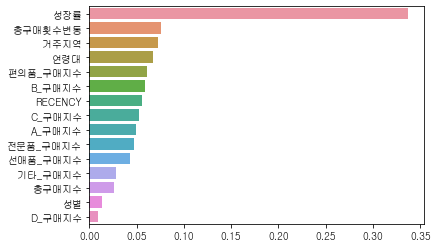

In [208]:
from sklearn.tree import DecisionTreeRegressor

dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_train,y_train)

feature_series = pd.Series(data=dt_reg.feature_importances_,index = X_train.columns)
feature_series = feature_series.sort_values(ascending=False)

sns.barplot(x=feature_series, y=feature_series.index)

<AxesSubplot:>

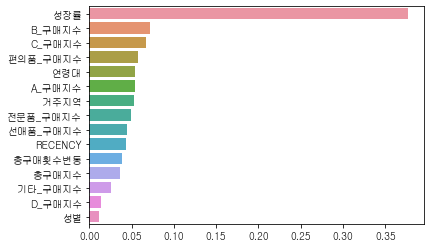

In [209]:
dt_reg = DecisionTreeRegressor()

dt_reg.fit(X_test,y_test)

feature_series = pd.Series(data=dt_reg.feature_importances_,index = X_train.columns)
feature_series = feature_series.sort_values(ascending=False)

sns.barplot(x=feature_series, y=feature_series.index)

In [210]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf_pred = rf.predict(X_test)

print(accuracy_score(y_test,rf_pred))

0.7278030146603345


In [211]:
rf_params = {
    'n_estimators':[100],
    'max_depth':[10,12,16],
    'min_samples_leaf':[10,12,14],
    'min_samples_split':[6,8,10]
}

rf_cv = GridSearchCV(rf,param_grid = rf_params,scoring='accuracy',cv=3,verbose=1)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_score_,rf_cv.best_params_)

best_rf_clf = rf_cv.best_estimator_
rf_pred_cv = best_rf_clf.predict(X_test)
print(accuracy_score(y_test,rf_pred_cv))

Fitting 3 folds for each of 27 candidates, totalling 81 fits
0.7209121936084394 {'max_depth': 10, 'min_samples_leaf': 14, 'min_samples_split': 8, 'n_estimators': 100}
0.7327586206896551


In [212]:
from sklearn.linear_model import LogisticRegression
lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train,y_train)
lr_preds = lr_clf.predict(X_test)
print(accuracy_score(y_test,lr_preds))

0.7258414206070617


In [213]:
lr_params = {
    'penalty':['l2','l1'],
    'C':[0.01,0.1,1,5,10]
}

lr_cv = GridSearchCV(lr_clf,param_grid = lr_params,scoring='accuracy',cv=3,verbose=1)
lr_cv.fit(X_train,y_train)
print(lr_cv.best_score_,lr_cv.best_params_)

best_lr_clf = lr_cv.best_estimator_
lr_pred_cv = best_lr_clf.predict(X_test)
print(accuracy_score(y_test,lr_pred_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
0.7087082428379357 {'C': 0.01, 'penalty': 'l1'}
0.7260995250877555


In [214]:
from lightgbm import LGBMClassifier
lgbm_wrapper = LGBMClassifier(n_estimator=400)
evals = [(X_test,y_test)]
lgbm_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric="logloss",eval_set = evals,verbose=True)
lgbm_pred = lgbm_wrapper.predict(X_test)
accuracy_score(y_test,lgbm_pred)

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[1]	valid_0's binary_logloss: 0.66541
[2]	valid_0's binary_logloss: 0.645094
[3]	valid_0's binary_logloss: 0.629175
[4]	valid_0's binary_logloss: 0.61662
[5]	valid_0's binary_logloss: 0.606814
[6]	valid_0's binary_logloss: 0.599209
[7]	valid_0's binary_logloss: 0.59174
[8]	valid_0's binary_logloss: 0.587171
[9]	valid_0's binary_logloss: 0.582814
[10]	valid_0's binary_logloss: 0.580478
[11]	valid_0's binary_logloss: 0.57918
[12]	valid_0's binary_logloss: 0.576527
[13]	valid_0's binary_logloss: 0.576704
[14]	valid_0's binary_logloss: 0.576104
[15]	valid_0's binary_logloss: 0.576953
[16]	valid_0's binary_logloss: 0.575249
[17]	valid_0's binary_logloss: 0.573803
[18]	valid_0's binary_logloss: 0.572164
[19]	valid_0's binary_logloss: 0.574204
[20]	valid_0's binary_logloss: 0.572817
[21]	valid_0's binary_logloss: 0.572113
[22]	valid_0's binary_logloss: 0.574368
[23]	valid_0's binary_logloss: 0.573469
[24]	valid_0's binary_logloss: 0.573121
[

0.7215568862275449

In [215]:
lgbm_params = {
    'num_leaves':[32,64,128],
    'max_depth':[32,64,128],
    'min_child_samples':[20,40,60],
    'subsamples':[0.4,0.6,0.8]
}

lgbm_cv = GridSearchCV(lgbm_wrapper,param_grid = lgbm_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
lgbm_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(lgbm_cv.best_score_,lgbm_cv.best_params_)

best_lgbm_clf = lgbm_cv.best_estimator_
lgbm_pred_cv = best_lgbm_clf.predict(X_test)
print(accuracy_score(y_test,lgbm_pred_cv))

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663614
[2]	valid_0's binary_logloss: 0.642307
[3]	valid_0's binary_logloss: 0.625196
[4]	valid_0's binary_logloss: 0.61118
[5]	valid_0's binary_logloss: 0.600098
[6]	valid_0's binary_logloss: 0.591106
[7]	valid_0's binary_logloss: 0.584616
[8]	valid_0's binary_logloss: 0.579633
[9]	valid_0's binary_logloss: 0.575645
[10]	valid_0's binary_logloss: 0.573084
[11]	valid_0's binary_logloss: 0.568962
[12]	valid_0's binary_logloss: 0.565889
[13]	valid_0's binary_logloss: 0.563227
[14]	valid_0's binary_logloss: 0.560752
[15]	valid_0's binary_logloss: 0.561413
[16]	valid_0's binary_logloss: 0.559993
[17]	valid_0's binary_logloss: 0.561342
[18]	valid_0's binary_logloss: 0.560226
[19]	valid_0's binary_logloss: 0.560695
[20]	valid_0's binary_logloss: 0.559797
[21]	valid_0's binary_logloss: 0.55919
[22]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665393
[2]	valid_0's binary_logloss: 0.645052
[3]	valid_0's binary_logloss: 0.629209
[4]	valid_0's binary_logloss: 0.61671
[5]	valid_0's binary_logloss: 0.606733
[6]	valid_0's binary_logloss: 0.598868
[7]	valid_0's binary_logloss: 0.592875
[8]	valid_0's binary_logloss: 0.587367
[9]	valid_0's binary_logloss: 0.583054
[10]	valid_0's binary_logloss: 0.579347
[11]	valid_0's binary_logloss: 0.577452
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.575395
[14]	valid_0's binary_logloss: 0.573244
[15]	valid_0's binary_logloss: 0.570442
[16]	valid_0's binary_logloss: 0.571513
[17]	valid_0's binary_logloss: 0.569908
[18]	valid_0's binary_logloss: 0.568192
[19]	valid_0's binary_logloss: 0.566784
[20]	valid_0's binary_logloss: 0.565738
[21]	valid_0's binary_logloss: 0.564805
[22]	valid_0's binary_logloss: 0.563978
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665687
[2]	valid_0's binary_logloss: 0.645785
[3]	valid_0's binary_logloss: 0.629998
[4]	valid_0's binary_logloss: 0.617585
[5]	valid_0's binary_logloss: 0.605553
[6]	valid_0's binary_logloss: 0.596476
[7]	valid_0's binary_logloss: 0.588305
[8]	valid_0's binary_logloss: 0.583491
[9]	valid_0's binary_logloss: 0.580267
[10]	valid_0's binary_logloss: 0.575148
[11]	valid_0's binary_logloss: 0.57115
[12]	valid_0's binary_logloss: 0.5686
[13]	valid_0's binary_logloss: 0.565417
[14]	valid_0's binary_logloss: 0.56293
[15]	valid_0's binary_logloss: 0.560768
[16]	valid_0's binary_logloss: 0.561442
[17]	valid_0's binary_logloss: 0.560199
[18]	valid_0's binary_logloss: 0.558844
[19]	valid_0's binary_logloss: 0.557488
[20]	valid_0's binary_logloss: 0.559101
[21]	valid_0's binary_logloss: 0.558668
[22]	valid_0's binary_logloss: 0.558151
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[6]	valid_0's binary_logloss: 0.598868
[7]	valid_0's binary_logloss: 0.592875
[8]	valid_0's binary_logloss: 0.587367
[9]	valid_0's binary_logloss: 0.583054
[10]	valid_0's binary_logloss: 0.579347
[11]	valid_0's binary_logloss: 0.577452
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.575395
[14]	valid_0's binary_logloss: 0.573244
[15]	valid_0's binary_logloss: 0.570442
[16]	valid_0's binary_logloss: 0.571513
[17]	valid_0's binary_logloss: 0.569908
[18]	valid_0's binary_logloss: 0.568192
[19]	valid_0's binary_logloss: 0.566784
[20]	valid_0's binary_logloss: 0.565738
[21]	valid_0's binary_logloss: 0.564805
[22]	valid_0's binary_logloss: 0.563978
[23]	valid_0's binary_logloss: 0.565999
[24]	valid_0's binary_logloss: 0.565424
[25]	valid_0's binary_logloss: 0.565511
[26]	valid_0's binary_logloss: 0.565751
[27]	valid_0's binary_logloss: 0.56538
[28]	valid_0's binary_logloss: 0.565181
[29]	valid_0's binary_logloss: 0.564907
[30]	valid_0's binary_logloss: 0.566893
[31]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[19]	valid_0's binary_logloss: 0.560695
[20]	valid_0's binary_logloss: 0.559797
[21]	valid_0's binary_logloss: 0.55919
[22]	valid_0's binary_logloss: 0.558303
[23]	valid_0's binary_logloss: 0.558432
[24]	valid_0's binary_logloss: 0.559646
[25]	valid_0's binary_logloss: 0.55956
[26]	valid_0's binary_logloss: 0.559626
[27]	valid_0's binary_logloss: 0.559618
[28]	valid_0's binary_logloss: 0.559437
[29]	valid_0's binary_logloss: 0.55932
[30]	valid_0's binary_logloss: 0.559637
[31]	valid_0's binary_logloss: 0.562052
[32]	valid_0's binary_logloss: 0.561988
[33]	valid_0's binary_logloss: 0.562268
[34]	valid_0's binary_logloss: 0.56244
[35]	valid_0's binary_logloss: 0.563027
[36]	valid_0's binary_logloss: 0.563156
[37]	valid_0's binary_logloss: 0.563568
[38]	valid_0's binary_logloss: 0.563656
[39]	valid_0's binary_logloss: 0.564029
[40]	valid_0's binary_logloss: 0.564241
[41]	valid_0's binary_logloss: 0.564482
[42]	valid_0's binary_logloss: 0.565289
[43]	valid_0's binary_logloss: 0.567866
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[31]	valid_0's binary_logloss: 0.560637
[32]	valid_0's binary_logloss: 0.560412
[33]	valid_0's binary_logloss: 0.560357
[34]	valid_0's binary_logloss: 0.563227
[35]	valid_0's binary_logloss: 0.562972
[36]	valid_0's binary_logloss: 0.562984
[37]	valid_0's binary_logloss: 0.563177
[38]	valid_0's binary_logloss: 0.563229
[39]	valid_0's binary_logloss: 0.563261
[40]	valid_0's binary_logloss: 0.563518
[41]	valid_0's binary_logloss: 0.563582
[42]	valid_0's binary_logloss: 0.566254
[43]	valid_0's binary_logloss: 0.566532
[44]	valid_0's binary_logloss: 0.566826
[45]	valid_0's binary_logloss: 0.566921
[46]	valid_0's binary_logloss: 0.567272
[47]	valid_0's binary_logloss: 0.567563
[48]	valid_0's binary_logloss: 0.567757
[49]	valid_0's binary_logloss: 0.568484
[50]	valid_0's binary_logloss: 0.568356
[51]	valid_0's binary_logloss: 0.568639
[52]	valid_0's binary_logloss: 0.568757
[53]	valid_0's binary_logloss: 0.569108
[54]	valid_0's binary_logloss: 0.569277
[55]	valid_0's binary_logloss: 0.569536


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644903
[3]	valid_0's binary_logloss: 0.628726
[4]	valid_0's binary_logloss: 0.616291
[5]	valid_0's binary_logloss: 0.606093
[6]	valid_0's binary_logloss: 0.598267
[7]	valid_0's binary_logloss: 0.592268
[8]	valid_0's binary_logloss: 0.586757
[9]	valid_0's binary_logloss: 0.581128
[10]	valid_0's binary_logloss: 0.577432
[11]	valid_0's binary_logloss: 0.574803
[12]	valid_0's binary_logloss: 0.572898
[13]	valid_0's binary_logloss: 0.57022
[14]	valid_0's binary_logloss: 0.568416
[15]	valid_0's binary_logloss: 0.566101
[16]	valid_0's binary_logloss: 0.564504
[17]	valid_0's binary_logloss: 0.563133
[18]	valid_0's binary_logloss: 0.564518
[19]	valid_0's binary_logloss: 0.563252
[20]	valid_0's binary_logloss: 0.564725
[21]	valid_0's binary_logloss: 0.564456
[22]	valid_0's binary_logloss: 0.563876
[23]	valid_0's binary_logloss: 0.56581
[24]	valid_0's binary_logloss: 0.565518
[25]	valid_0's binary_logloss: 0.564935
[26]	valid_0's binary_logloss: 0.564416
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[62]	valid_0's binary_logloss: 0.576959
[63]	valid_0's binary_logloss: 0.576992
[64]	valid_0's binary_logloss: 0.57703
[65]	valid_0's binary_logloss: 0.577184
[66]	valid_0's binary_logloss: 0.577391
[67]	valid_0's binary_logloss: 0.57795
[68]	valid_0's binary_logloss: 0.578102
[69]	valid_0's binary_logloss: 0.578235
[70]	valid_0's binary_logloss: 0.578263
[71]	valid_0's binary_logloss: 0.578303
[72]	valid_0's binary_logloss: 0.578468
[73]	valid_0's binary_logloss: 0.578705
[74]	valid_0's binary_logloss: 0.578731
[75]	valid_0's binary_logloss: 0.578908
[76]	valid_0's binary_logloss: 0.579369
[77]	valid_0's binary_logloss: 0.579574
[78]	valid_0's binary_logloss: 0.579676
[79]	valid_0's binary_logloss: 0.579839
[80]	valid_0's binary_logloss: 0.579924
[81]	valid_0's binary_logloss: 0.580171
[82]	valid_0's binary_logloss: 0.580521
[83]	valid_0's binary_logloss: 0.580495
[84]	valid_0's binary_logloss: 0.581056
[85]	valid_0's binary_logloss: 0.58134
[86]	valid_0's binary_logloss: 0.581963
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.568339
[30]	valid_0's binary_logloss: 0.568243
[31]	valid_0's binary_logloss: 0.568375
[32]	valid_0's binary_logloss: 0.568787
[33]	valid_0's binary_logloss: 0.568955
[34]	valid_0's binary_logloss: 0.572004
[35]	valid_0's binary_logloss: 0.572147
[36]	valid_0's binary_logloss: 0.572373
[37]	valid_0's binary_logloss: 0.572913
[38]	valid_0's binary_logloss: 0.57388
[39]	valid_0's binary_logloss: 0.573723
[40]	valid_0's binary_logloss: 0.574437
[41]	valid_0's binary_logloss: 0.57495
[42]	valid_0's binary_logloss: 0.575627
[43]	valid_0's binary_logloss: 0.575692
[44]	valid_0's binary_logloss: 0.576294
[45]	valid_0's binary_logloss: 0.576591
[46]	valid_0's binary_logloss: 0.577309
[47]	valid_0's binary_logloss: 0.57742
[48]	valid_0's binary_logloss: 0.577948
[49]	valid_0's binary_logloss: 0.57828
[50]	valid_0's binary_logloss: 0.578936
[51]	valid_0's binary_logloss: 0.579526
[52]	valid_0's binary_logloss: 0.580018
[53]	valid_0's binary_logloss: 0.580703
[54]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.628726
[4]	valid_0's binary_logloss: 0.616291
[5]	valid_0's binary_logloss: 0.606093
[6]	valid_0's binary_logloss: 0.598267
[7]	valid_0's binary_logloss: 0.592268
[8]	valid_0's binary_logloss: 0.586757
[9]	valid_0's binary_logloss: 0.581128
[10]	valid_0's binary_logloss: 0.577432
[11]	valid_0's binary_logloss: 0.574803
[12]	valid_0's binary_logloss: 0.572898
[13]	valid_0's binary_logloss: 0.57022
[14]	valid_0's binary_logloss: 0.568416
[15]	valid_0's binary_logloss: 0.566101
[16]	valid_0's binary_logloss: 0.564504
[17]	valid_0's binary_logloss: 0.563133
[18]	valid_0's binary_logloss: 0.564518
[19]	valid_0's binary_logloss: 0.563252
[20]	valid_0's binary_logloss: 0.564725
[21]	valid_0's binary_logloss: 0.564456
[22]	valid_0's binary_logloss: 0.563876
[23]	valid_0's binary_logloss: 0.56581
[24]	valid_0's binary_logloss: 0.565518
[25]	valid_0's binary_logloss: 0.564935
[26]	valid_0's binary_logloss: 0.564416
[27]	valid_0's binary_logloss: 0.563931
[28]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[69]	valid_0's binary_logloss: 0.578235
[70]	valid_0's binary_logloss: 0.578263
[71]	valid_0's binary_logloss: 0.578303
[72]	valid_0's binary_logloss: 0.578468
[73]	valid_0's binary_logloss: 0.578705
[74]	valid_0's binary_logloss: 0.578731
[75]	valid_0's binary_logloss: 0.578908
[76]	valid_0's binary_logloss: 0.579369
[77]	valid_0's binary_logloss: 0.579574
[78]	valid_0's binary_logloss: 0.579676
[79]	valid_0's binary_logloss: 0.579839
[80]	valid_0's binary_logloss: 0.579924
[81]	valid_0's binary_logloss: 0.580171
[82]	valid_0's binary_logloss: 0.580521
[83]	valid_0's binary_logloss: 0.580495
[84]	valid_0's binary_logloss: 0.581056
[85]	valid_0's binary_logloss: 0.58134
[86]	valid_0's binary_logloss: 0.581963
[87]	valid_0's binary_logloss: 0.582153
[88]	valid_0's binary_logloss: 0.582211
[89]	valid_0's binary_logloss: 0.582521
[90]	valid_0's binary_logloss: 0.582662
[91]	valid_0's binary_logloss: 0.582772
[92]	valid_0's binary_logloss: 0.582959
[93]	valid_0's binary_logloss: 0.583253
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.575627
[43]	valid_0's binary_logloss: 0.575692
[44]	valid_0's binary_logloss: 0.576294
[45]	valid_0's binary_logloss: 0.576591
[46]	valid_0's binary_logloss: 0.577309
[47]	valid_0's binary_logloss: 0.57742
[48]	valid_0's binary_logloss: 0.577948
[49]	valid_0's binary_logloss: 0.57828
[50]	valid_0's binary_logloss: 0.578936
[51]	valid_0's binary_logloss: 0.579526
[52]	valid_0's binary_logloss: 0.580018
[53]	valid_0's binary_logloss: 0.580703
[54]	valid_0's binary_logloss: 0.58071
[55]	valid_0's binary_logloss: 0.581461
[56]	valid_0's binary_logloss: 0.58186
[57]	valid_0's binary_logloss: 0.58186
[58]	valid_0's binary_logloss: 0.582499
[59]	valid_0's binary_logloss: 0.58289
[60]	valid_0's binary_logloss: 0.583448
[61]	valid_0's binary_logloss: 0.583556
[62]	valid_0's binary_logloss: 0.584283
[63]	valid_0's binary_logloss: 0.584371
[64]	valid_0's binary_logloss: 0.584495
[65]	valid_0's binary_logloss: 0.584501
[66]	valid_0's binary_logloss: 0.585114
[67]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.572898
[13]	valid_0's binary_logloss: 0.57022
[14]	valid_0's binary_logloss: 0.568416
[15]	valid_0's binary_logloss: 0.566101
[16]	valid_0's binary_logloss: 0.564504
[17]	valid_0's binary_logloss: 0.563133
[18]	valid_0's binary_logloss: 0.564518
[19]	valid_0's binary_logloss: 0.563252
[20]	valid_0's binary_logloss: 0.564725
[21]	valid_0's binary_logloss: 0.564456
[22]	valid_0's binary_logloss: 0.563876
[23]	valid_0's binary_logloss: 0.56581
[24]	valid_0's binary_logloss: 0.565518
[25]	valid_0's binary_logloss: 0.564935
[26]	valid_0's binary_logloss: 0.564416
[27]	valid_0's binary_logloss: 0.563931
[28]	valid_0's binary_logloss: 0.563711
[29]	valid_0's binary_logloss: 0.56367
[30]	valid_0's binary_logloss: 0.563659
[31]	valid_0's binary_logloss: 0.565538
[32]	valid_0's binary_logloss: 0.566959
[33]	valid_0's binary_logloss: 0.5691
[34]	valid_0's binary_logloss: 0.568902
[35]	valid_0's binary_logloss: 0.569196
[36]	valid_0's binary_logloss: 0.57019
[37]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[65]	valid_0's binary_logloss: 0.577184
[66]	valid_0's binary_logloss: 0.577391
[67]	valid_0's binary_logloss: 0.57795
[68]	valid_0's binary_logloss: 0.578102
[69]	valid_0's binary_logloss: 0.578235
[70]	valid_0's binary_logloss: 0.578263
[71]	valid_0's binary_logloss: 0.578303
[72]	valid_0's binary_logloss: 0.578468
[73]	valid_0's binary_logloss: 0.578705
[74]	valid_0's binary_logloss: 0.578731
[75]	valid_0's binary_logloss: 0.578908
[76]	valid_0's binary_logloss: 0.579369
[77]	valid_0's binary_logloss: 0.579574
[78]	valid_0's binary_logloss: 0.579676
[79]	valid_0's binary_logloss: 0.579839
[80]	valid_0's binary_logloss: 0.579924
[81]	valid_0's binary_logloss: 0.580171
[82]	valid_0's binary_logloss: 0.580521
[83]	valid_0's binary_logloss: 0.580495
[84]	valid_0's binary_logloss: 0.581056
[85]	valid_0's binary_logloss: 0.58134
[86]	valid_0's binary_logloss: 0.581963
[87]	valid_0's binary_logloss: 0.582153
[88]	valid_0's binary_logloss: 0.582211
[89]	valid_0's binary_logloss: 0.582521
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	valid_0's binary_logloss: 0.558948
[28]	valid_0's binary_logloss: 0.561897
[29]	valid_0's binary_logloss: 0.562163
[30]	valid_0's binary_logloss: 0.562446
[31]	valid_0's binary_logloss: 0.562512
[32]	valid_0's binary_logloss: 0.562994
[33]	valid_0's binary_logloss: 0.563204
[34]	valid_0's binary_logloss: 0.564125
[35]	valid_0's binary_logloss: 0.564702
[36]	valid_0's binary_logloss: 0.565003
[37]	valid_0's binary_logloss: 0.565212
[38]	valid_0's binary_logloss: 0.565615
[39]	valid_0's binary_logloss: 0.566218
[40]	valid_0's binary_logloss: 0.566653
[41]	valid_0's binary_logloss: 0.569204
[42]	valid_0's binary_logloss: 0.571417
[43]	valid_0's binary_logloss: 0.573058
[44]	valid_0's binary_logloss: 0.576098
[45]	valid_0's binary_logloss: 0.576578
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss: 0.570219
[24]	valid_0's binary_logloss: 0.569912
[25]	valid_0's binary_logloss: 0.569558
[26]	valid_0's binary_logloss: 0.571658
[27]	valid_0's binary_logloss: 0.571947
[28]	valid_0's binary_logloss: 0.571723
[29]	valid_0's binary_logloss: 0.571813
[30]	valid_0's binary_logloss: 0.571964
[31]	valid_0's binary_logloss: 0.574129
[32]	valid_0's binary_logloss: 0.576541
[33]	valid_0's binary_logloss: 0.576642
[34]	valid_0's binary_logloss: 0.576871
[35]	valid_0's binary_logloss: 0.57702
[36]	valid_0's binary_logloss: 0.579033
[37]	valid_0's binary_logloss: 0.579513
[38]	valid_0's binary_logloss: 0.579992
[39]	valid_0's binary_logloss: 0.580605
[40]	valid_0's binary_logloss: 0.581023
[41]	valid_0's binary_logloss: 0.581605
[42]	valid_0's binary_logloss: 0.582026
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_0's binary_logloss: 0.562037
[28]	valid_0's binary_logloss: 0.562257
[29]	valid_0's binary_logloss: 0.562739
[30]	valid_0's binary_logloss: 0.562442
[31]	valid_0's binary_logloss: 0.564565
[32]	valid_0's binary_logloss: 0.565022
[33]	valid_0's binary_logloss: 0.565287
[34]	valid_0's binary_logloss: 0.565442
[35]	valid_0's binary_logloss: 0.565361
[36]	valid_0's binary_logloss: 0.565646
[37]	valid_0's binary_logloss: 0.565947
[38]	valid_0's binary_logloss: 0.566451
[39]	valid_0's binary_logloss: 0.566842
[40]	valid_0's binary_logloss: 0.567557
[41]	valid_0's binary_logloss: 0.568369
[42]	valid_0's binary_logloss: 0.568969
[43]	valid_0's binary_logloss: 0.569031


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	valid_0's binary_logloss: 0.558948
[28]	valid_0's binary_logloss: 0.561897
[29]	valid_0's binary_logloss: 0.562163
[30]	valid_0's binary_logloss: 0.562446
[31]	valid_0's binary_logloss: 0.562512
[32]	valid_0's binary_logloss: 0.562994
[33]	valid_0's binary_logloss: 0.563204
[34]	valid_0's binary_logloss: 0.564125
[35]	valid_0's binary_logloss: 0.564702
[36]	valid_0's binary_logloss: 0.565003
[37]	valid_0's binary_logloss: 0.565212
[38]	valid_0's binary_logloss: 0.565615
[39]	valid_0's binary_logloss: 0.566218
[40]	valid_0's binary_logloss: 0.566653
[41]	valid_0's binary_logloss: 0.569204
[42]	valid_0's binary_logloss: 0.571417
[43]	valid_0's binary_logloss: 0.573058
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.57057
[16]	valid_0's binary_logloss: 0.569309
[17]	valid_0's binary_logloss: 0.569964
[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss: 0.570219
[24]	valid_0's binary_logloss: 0.569912
[25]	valid_0's binary_logloss: 0.569558
[26]	valid_0's binary_logloss: 0.571658
[27]	valid_0's binary_logloss: 0.571947
[28]	valid_0's binary_logloss: 0.571723
[29]	valid_0's binary_logloss: 0.571813
[30]	valid_0's binary_logloss: 0.571964
[31]	valid_0's binary_logloss: 0.574129
[32]	valid_0's binary_logloss: 0.576541
[33]	valid_0's binary_logloss: 0.576642
[34]	valid_0's binary_logloss: 0.576871
[35]	valid_0's binary_logloss: 0.57702
[36]	valid_0's binary_logloss: 0.579033
[37]	valid_0's binary_logloss: 0.579513
[38]	valid_0's binary_logloss: 0.579992
[39]	valid_0's binary_logloss: 0.580605
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_0's binary_logloss: 0.562037
[28]	valid_0's binary_logloss: 0.562257
[29]	valid_0's binary_logloss: 0.562739
[30]	valid_0's binary_logloss: 0.562442
[31]	valid_0's binary_logloss: 0.564565
[32]	valid_0's binary_logloss: 0.565022
[33]	valid_0's binary_logloss: 0.565287
[34]	valid_0's binary_logloss: 0.565442
[35]	valid_0's binary_logloss: 0.565361
[36]	valid_0's binary_logloss: 0.565646
[37]	valid_0's binary_logloss: 0.565947
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	valid_0's binary_logloss: 0.558948
[28]	valid_0's binary_logloss: 0.561897
[29]	valid_0's binary_logloss: 0.562163
[30]	valid_0's binary_logloss: 0.562446
[31]	valid_0's binary_logloss: 0.562512
[32]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644403
[3]	valid_0's binary_logloss: 0.62834
[4]	valid_0's binary_logloss: 0.615846
[5]	valid_0's binary_logloss: 0.605701
[6]	valid_0's binary_logloss: 0.59804
[7]	valid_0's binary_logloss: 0.592269
[8]	valid_0's binary_logloss: 0.587894
[9]	valid_0's binary_logloss: 0.583376
[10]	valid_0's binary_logloss: 0.580004
[11]	valid_0's binary_logloss: 0.578049
[12]	valid_0's binary_logloss: 0.576522
[13]	valid_0's binary_logloss: 0.574102
[14]	valid_0's binary_logloss: 0.572175
[15]	valid_0's binary_logloss: 0.57057
[16]	valid_0's binary_logloss: 0.569309
[17]	valid_0's binary_logloss: 0.569964
[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss: 0.570219
[24]	valid_0's binary_logloss: 0.569912
[25]	valid_0's binary_logloss: 0.569558
[26]	valid_0's binary_logloss: 0.571658
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.618264
[5]	valid_0's binary_logloss: 0.60869
[6]	valid_0's binary_logloss: 0.598656
[7]	valid_0's binary_logloss: 0.590553
[8]	valid_0's binary_logloss: 0.58365
[9]	valid_0's binary_logloss: 0.578365
[10]	valid_0's binary_logloss: 0.573657
[11]	valid_0's binary_logloss: 0.570385
[12]	valid_0's binary_logloss: 0.566496
[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_0's binary_logloss: 0.562037
[28]	valid_0's binary_logloss: 0.562257
[29]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[6]	valid_0's binary_logloss: 0.588354
[7]	valid_0's binary_logloss: 0.580081
[8]	valid_0's binary_logloss: 0.57421
[9]	valid_0's binary_logloss: 0.56897
[10]	valid_0's binary_logloss: 0.564106
[11]	valid_0's binary_logloss: 0.560527
[12]	valid_0's binary_logloss: 0.556761
[13]	valid_0's binary_logloss: 0.555646
[14]	valid_0's binary_logloss: 0.552884
[15]	valid_0's binary_logloss: 0.550639
[16]	valid_0's binary_logloss: 0.549197
[17]	valid_0's binary_logloss: 0.548182
[18]	valid_0's binary_logloss: 0.547751
[19]	valid_0's binary_logloss: 0.546925
[20]	valid_0's binary_logloss: 0.545889
[21]	valid_0's binary_logloss: 0.545228
[22]	valid_0's binary_logloss: 0.544726
[23]	valid_0's binary_logloss: 0.544191
[24]	valid_0's binary_logloss: 0.544464
[25]	valid_0's binary_logloss: 0.544298
[26]	valid_0's binary_logloss: 0.544363
[27]	valid_0's binary_logloss: 0.544415
[28]	valid_0's binary_logloss: 0.544008
[29]	valid_0's binary_logloss: 0.544139
[30]	valid_0's binary_logloss: 0.545857
[31]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[18]	valid_0's binary_logloss: 0.557489
[19]	valid_0's binary_logloss: 0.556336
[20]	valid_0's binary_logloss: 0.55551
[21]	valid_0's binary_logloss: 0.55719
[22]	valid_0's binary_logloss: 0.556485
[23]	valid_0's binary_logloss: 0.556003
[24]	valid_0's binary_logloss: 0.55812
[25]	valid_0's binary_logloss: 0.557827
[26]	valid_0's binary_logloss: 0.560211
[27]	valid_0's binary_logloss: 0.559755
[28]	valid_0's binary_logloss: 0.559384
[29]	valid_0's binary_logloss: 0.559301
[30]	valid_0's binary_logloss: 0.559272
[31]	valid_0's binary_logloss: 0.559288
[32]	valid_0's binary_logloss: 0.559417
[33]	valid_0's binary_logloss: 0.55954
[34]	valid_0's binary_logloss: 0.559481
[35]	valid_0's binary_logloss: 0.559354
[36]	valid_0's binary_logloss: 0.559616
[37]	valid_0's binary_logloss: 0.559432
[38]	valid_0's binary_logloss: 0.559598
[39]	valid_0's binary_logloss: 0.559691
[40]	valid_0's binary_logloss: 0.559981
[41]	valid_0's binary_logloss: 0.559954
[42]	valid_0's binary_logloss: 0.560093
[43]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[33]	valid_0's binary_logloss: 0.56816
[34]	valid_0's binary_logloss: 0.568739
[35]	valid_0's binary_logloss: 0.568779
[36]	valid_0's binary_logloss: 0.569144
[37]	valid_0's binary_logloss: 0.569216
[38]	valid_0's binary_logloss: 0.569719
[39]	valid_0's binary_logloss: 0.569732
[40]	valid_0's binary_logloss: 0.569866
[41]	valid_0's binary_logloss: 0.570701
[42]	valid_0's binary_logloss: 0.570576
[43]	valid_0's binary_logloss: 0.570567
[44]	valid_0's binary_logloss: 0.570919
[45]	valid_0's binary_logloss: 0.571033
[46]	valid_0's binary_logloss: 0.571078
[47]	valid_0's binary_logloss: 0.571152
[48]	valid_0's binary_logloss: 0.571559
[49]	valid_0's binary_logloss: 0.572019
[50]	valid_0's binary_logloss: 0.572345
[51]	valid_0's binary_logloss: 0.572243
[52]	valid_0's binary_logloss: 0.572194
[53]	valid_0's binary_logloss: 0.57307
[54]	valid_0's binary_logloss: 0.573039
[55]	valid_0's binary_logloss: 0.573384
[56]	valid_0's binary_logloss: 0.573806
[57]	valid_0's binary_logloss: 0.573738
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[43]	valid_0's binary_logloss: 0.550209
[44]	valid_0's binary_logloss: 0.550595
[45]	valid_0's binary_logloss: 0.550731
[46]	valid_0's binary_logloss: 0.55083
[47]	valid_0's binary_logloss: 0.551167
[48]	valid_0's binary_logloss: 0.551459
[49]	valid_0's binary_logloss: 0.551743
[50]	valid_0's binary_logloss: 0.552427
[51]	valid_0's binary_logloss: 0.552413
[52]	valid_0's binary_logloss: 0.552767
[53]	valid_0's binary_logloss: 0.552734
[54]	valid_0's binary_logloss: 0.552781
[55]	valid_0's binary_logloss: 0.553153
[56]	valid_0's binary_logloss: 0.553109
[57]	valid_0's binary_logloss: 0.553218
[58]	valid_0's binary_logloss: 0.553362
[59]	valid_0's binary_logloss: 0.553634
[60]	valid_0's binary_logloss: 0.554038
[61]	valid_0's binary_logloss: 0.55421
[62]	valid_0's binary_logloss: 0.554308
[63]	valid_0's binary_logloss: 0.555
[64]	valid_0's binary_logloss: 0.555403
[65]	valid_0's binary_logloss: 0.555409
[66]	valid_0's binary_logloss: 0.555701
[67]	valid_0's binary_logloss: 0.556094
[68]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[60]	valid_0's binary_logloss: 0.562847
[61]	valid_0's binary_logloss: 0.562901
[62]	valid_0's binary_logloss: 0.562991
[63]	valid_0's binary_logloss: 0.562956
[64]	valid_0's binary_logloss: 0.563363
[65]	valid_0's binary_logloss: 0.563399
[66]	valid_0's binary_logloss: 0.563121
[67]	valid_0's binary_logloss: 0.56315
[68]	valid_0's binary_logloss: 0.56312
[69]	valid_0's binary_logloss: 0.563202
[70]	valid_0's binary_logloss: 0.563371
[71]	valid_0's binary_logloss: 0.563486
[72]	valid_0's binary_logloss: 0.563731
[73]	valid_0's binary_logloss: 0.56394
[74]	valid_0's binary_logloss: 0.564048
[75]	valid_0's binary_logloss: 0.564364
[76]	valid_0's binary_logloss: 0.564562
[77]	valid_0's binary_logloss: 0.564683
[78]	valid_0's binary_logloss: 0.564727
[79]	valid_0's binary_logloss: 0.564634
[80]	valid_0's binary_logloss: 0.564703
[81]	valid_0's binary_logloss: 0.564576
[82]	valid_0's binary_logloss: 0.564472
[83]	valid_0's binary_logloss: 0.564918
[84]	valid_0's binary_logloss: 0.565044
[85

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[17]	valid_0's binary_logloss: 0.570365
[18]	valid_0's binary_logloss: 0.56885
[19]	valid_0's binary_logloss: 0.569617
[20]	valid_0's binary_logloss: 0.568405
[21]	valid_0's binary_logloss: 0.567723
[22]	valid_0's binary_logloss: 0.567151
[23]	valid_0's binary_logloss: 0.566929
[24]	valid_0's binary_logloss: 0.566096
[25]	valid_0's binary_logloss: 0.565516
[26]	valid_0's binary_logloss: 0.565035
[27]	valid_0's binary_logloss: 0.5657
[28]	valid_0's binary_logloss: 0.567896
[29]	valid_0's binary_logloss: 0.568404
[30]	valid_0's binary_logloss: 0.568033
[31]	valid_0's binary_logloss: 0.567716
[32]	valid_0's binary_logloss: 0.567515
[33]	valid_0's binary_logloss: 0.567731
[34]	valid_0's binary_logloss: 0.56797
[35]	valid_0's binary_logloss: 0.567927
[36]	valid_0's binary_logloss: 0.568522
[37]	valid_0's binary_logloss: 0.568962
[38]	valid_0's binary_logloss: 0.56893
[39]	valid_0's binary_logloss: 0.571484
[40]	valid_0's binary_logloss: 0.573933
[41]	valid_0's binary_logloss: 0.574252
[42]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665728
[2]	valid_0's binary_logloss: 0.645898
[3]	valid_0's binary_logloss: 0.630357
[4]	valid_0's binary_logloss: 0.617854
[5]	valid_0's binary_logloss: 0.605493
[6]	valid_0's binary_logloss: 0.595269
[7]	valid_0's binary_logloss: 0.589096
[8]	valid_0's binary_logloss: 0.584165
[9]	valid_0's binary_logloss: 0.578248
[10]	valid_0's binary_logloss: 0.574906
[11]	valid_0's binary_logloss: 0.573447
[12]	valid_0's binary_logloss: 0.572559
[13]	valid_0's binary_logloss: 0.569585
[14]	valid_0's binary_logloss: 0.56754
[15]	valid_0's binary_logloss: 0.566032
[16]	valid_0's binary_logloss: 0.564448
[17]	valid_0's binary_logloss: 0.565545
[18]	valid_0's binary_logloss: 0.564381
[19]	valid_0's binary_logloss: 0.563119
[20]	valid_0's binary_logloss: 0.5622
[21]	valid_0's binary_logloss: 0.5617
[22]	valid_0's binary_logloss: 0.56086
[23]	valid_0's binary_logloss: 0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.550701
[32]	valid_0's binary_logloss: 0.550965
[33]	valid_0's binary_logloss: 0.55181
[34]	valid_0's binary_logloss: 0.552102
[35]	valid_0's binary_logloss: 0.552764
[36]	valid_0's binary_logloss: 0.553177
[37]	valid_0's binary_logloss: 0.553437
[38]	valid_0's binary_logloss: 0.553947
[39]	valid_0's binary_logloss: 0.554802
[40]	valid_0's binary_logloss: 0.555718
[41]	valid_0's binary_logloss: 0.555816
[42]	valid_0's binary_logloss: 0.556246
[43]	valid_0's binary_logloss: 0.556579
[44]	valid_0's binary_logloss: 0.557518
[45]	valid_0's binary_logloss: 0.557836
[46]	valid_0's binary_logloss: 0.557786
[47]	valid_0's binary_logloss: 0.558028
[48]	valid_0's binary_logloss: 0.558284
[49]	valid_0's binary_logloss: 0.558411
[50]	valid_0's binary_logloss: 0.559261
[51]	valid_0's binary_logloss: 0.559518
[52]	valid_0's binary_logloss: 0.559893
[53]	valid_0's binary_logloss: 0.560197
[54]	valid_0's binary_logloss: 0.560435
[55]	valid_0's binary_logloss: 0.560591
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.616371
[5]	valid_0's binary_logloss: 0.606018
[6]	valid_0's binary_logloss: 0.598231
[7]	valid_0's binary_logloss: 0.592403
[8]	valid_0's binary_logloss: 0.587536
[9]	valid_0's binary_logloss: 0.583433
[10]	valid_0's binary_logloss: 0.580597
[11]	valid_0's binary_logloss: 0.5764
[12]	valid_0's binary_logloss: 0.574861
[13]	valid_0's binary_logloss: 0.573759
[14]	valid_0's binary_logloss: 0.571829
[15]	valid_0's binary_logloss: 0.572227
[16]	valid_0's binary_logloss: 0.569969
[17]	valid_0's binary_logloss: 0.570365
[18]	valid_0's binary_logloss: 0.56885
[19]	valid_0's binary_logloss: 0.569617
[20]	valid_0's binary_logloss: 0.568405
[21]	valid_0's binary_logloss: 0.567723
[22]	valid_0's binary_logloss: 0.567151
[23]	valid_0's binary_logloss: 0.566929
[24]	valid_0's binary_logloss: 0.566096
[25]	valid_0's binary_logloss: 0.565516
[26]	valid_0's binary_logloss: 0.565035
[27]	valid_0's binary_logloss: 0.5657
[28]	valid_0's binary_logloss: 0.567896
[29]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[59]	valid_0's binary_logloss: 0.581344
[60]	valid_0's binary_logloss: 0.581424
[61]	valid_0's binary_logloss: 0.581321
[62]	valid_0's binary_logloss: 0.581495
[63]	valid_0's binary_logloss: 0.581587
[64]	valid_0's binary_logloss: 0.581662
[65]	valid_0's binary_logloss: 0.581735
[66]	valid_0's binary_logloss: 0.581794
[67]	valid_0's binary_logloss: 0.581874
[68]	valid_0's binary_logloss: 0.582144
[69]	valid_0's binary_logloss: 0.582501
[70]	valid_0's binary_logloss: 0.582708
[71]	valid_0's binary_logloss: 0.582677
[72]	valid_0's binary_logloss: 0.583462
[73]	valid_0's binary_logloss: 0.583478
[74]	valid_0's binary_logloss: 0.583325
[75]	valid_0's binary_logloss: 0.583888
[76]	valid_0's binary_logloss: 0.584297
[77]	valid_0's binary_logloss: 0.584567
[78]	valid_0's binary_logloss: 0.584812
[79]	valid_0's binary_logloss: 0.584878
[80]	valid_0's binary_logloss: 0.585046
[81]	valid_0's binary_logloss: 0.585248
[82]	valid_0's binary_logloss: 0.585447
[83]	valid_0's binary_logloss: 0.585557


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.549151
[26]	valid_0's binary_logloss: 0.548851
[27]	valid_0's binary_logloss: 0.549155
[28]	valid_0's binary_logloss: 0.549609
[29]	valid_0's binary_logloss: 0.549784
[30]	valid_0's binary_logloss: 0.550157
[31]	valid_0's binary_logloss: 0.550701
[32]	valid_0's binary_logloss: 0.550965
[33]	valid_0's binary_logloss: 0.55181
[34]	valid_0's binary_logloss: 0.552102
[35]	valid_0's binary_logloss: 0.552764
[36]	valid_0's binary_logloss: 0.553177
[37]	valid_0's binary_logloss: 0.553437
[38]	valid_0's binary_logloss: 0.553947
[39]	valid_0's binary_logloss: 0.554802
[40]	valid_0's binary_logloss: 0.555718
[41]	valid_0's binary_logloss: 0.555816
[42]	valid_0's binary_logloss: 0.556246
[43]	valid_0's binary_logloss: 0.556579
[44]	valid_0's binary_logloss: 0.557518
[45]	valid_0's binary_logloss: 0.557836
[46]	valid_0's binary_logloss: 0.557786
[47]	valid_0's binary_logloss: 0.558028
[48]	valid_0's binary_logloss: 0.558284
[49]	valid_0's binary_logloss: 0.558411
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644733
[3]	valid_0's binary_logloss: 0.628833
[4]	valid_0's binary_logloss: 0.616371
[5]	valid_0's binary_logloss: 0.606018
[6]	valid_0's binary_logloss: 0.598231
[7]	valid_0's binary_logloss: 0.592403
[8]	valid_0's binary_logloss: 0.587536
[9]	valid_0's binary_logloss: 0.583433
[10]	valid_0's binary_logloss: 0.580597
[11]	valid_0's binary_logloss: 0.5764
[12]	valid_0's binary_logloss: 0.574861
[13]	valid_0's binary_logloss: 0.573759
[14]	valid_0's binary_logloss: 0.571829
[15]	valid_0's binary_logloss: 0.572227
[16]	valid_0's binary_logloss: 0.569969
[17]	valid_0's binary_logloss: 0.570365
[18]	valid_0's binary_logloss: 0.56885
[19]	valid_0's binary_logloss: 0.569617
[20]	valid_0's binary_logloss: 0.568405
[21]	valid_0's binary_logloss: 0.567723
[22]	valid_0's binary_logloss: 0.567151
[23]	valid_0's binary_logloss: 0.566929
[24]	valid_0's binary_logloss: 0.566096
[25]	valid_0's binary_logloss: 0.565516
[26]	valid_0's binary_logloss: 0.565035
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[60]	valid_0's binary_logloss: 0.581424
[61]	valid_0's binary_logloss: 0.581321
[62]	valid_0's binary_logloss: 0.581495
[63]	valid_0's binary_logloss: 0.581587
[64]	valid_0's binary_logloss: 0.581662
[65]	valid_0's binary_logloss: 0.581735
[66]	valid_0's binary_logloss: 0.581794
[67]	valid_0's binary_logloss: 0.581874
[68]	valid_0's binary_logloss: 0.582144
[69]	valid_0's binary_logloss: 0.582501
[70]	valid_0's binary_logloss: 0.582708
[71]	valid_0's binary_logloss: 0.582677
[72]	valid_0's binary_logloss: 0.583462
[73]	valid_0's binary_logloss: 0.583478
[74]	valid_0's binary_logloss: 0.583325
[75]	valid_0's binary_logloss: 0.583888
[76]	valid_0's binary_logloss: 0.584297
[77]	valid_0's binary_logloss: 0.584567
[78]	valid_0's binary_logloss: 0.584812
[79]	valid_0's binary_logloss: 0.584878
[80]	valid_0's binary_logloss: 0.585046
[81]	valid_0's binary_logloss: 0.585248
[82]	valid_0's binary_logloss: 0.585447
[83]	valid_0's binary_logloss: 0.585557
[84]	valid_0's binary_logloss: 0.585766


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[17]	valid_0's binary_logloss: 0.556953
[18]	valid_0's binary_logloss: 0.556213
[19]	valid_0's binary_logloss: 0.555843
[20]	valid_0's binary_logloss: 0.555627
[21]	valid_0's binary_logloss: 0.555633
[22]	valid_0's binary_logloss: 0.555497
[23]	valid_0's binary_logloss: 0.555798
[24]	valid_0's binary_logloss: 0.556238
[25]	valid_0's binary_logloss: 0.556679
[26]	valid_0's binary_logloss: 0.556986
[27]	valid_0's binary_logloss: 0.557349
[28]	valid_0's binary_logloss: 0.557978
[29]	valid_0's binary_logloss: 0.558253
[30]	valid_0's binary_logloss: 0.560215
[31]	valid_0's binary_logloss: 0.560479
[32]	valid_0's binary_logloss: 0.560842
[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[40]	valid_0's binary_logloss: 0.567054
[41]	valid_0's binary_logloss: 0.567467
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644421
[3]	valid_0's binary_logloss: 0.628263
[4]	valid_0's binary_logloss: 0.61575
[5]	valid_0's binary_logloss: 0.605165
[6]	valid_0's binary_logloss: 0.596968
[7]	valid_0's binary_logloss: 0.591246
[8]	valid_0's binary_logloss: 0.586817
[9]	valid_0's binary_logloss: 0.583636
[10]	valid_0's binary_logloss: 0.581616
[11]	valid_0's binary_logloss: 0.58044
[12]	valid_0's binary_logloss: 0.579657
[13]	valid_0's binary_logloss: 0.577428
[14]	valid_0's binary_logloss: 0.577544
[15]	valid_0's binary_logloss: 0.576059
[16]	valid_0's binary_logloss: 0.574569
[17]	valid_0's binary_logloss: 0.575909
[18]	valid_0's binary_logloss: 0.577313
[19]	valid_0's binary_logloss: 0.578016
[20]	valid_0's binary_logloss: 0.576965
[21]	valid_0's binary_logloss: 0.5775
[22]	valid_0's binary_logloss: 0.576824
[23]	valid_0's binary_logloss: 0.576445
[24]	valid_0's binary_logloss: 0.576207
[25]	valid_0's binary_logloss: 0.576099
[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.574094
[38]	valid_0's binary_logloss: 0.574896
[39]	valid_0's binary_logloss: 0.575288
[40]	valid_0's binary_logloss: 0.575975
[41]	valid_0's binary_logloss: 0.57624
[42]	valid_0's binary_logloss: 0.576453
[43]	valid_0's binary_logloss: 0.576854
[44]	valid_0's binary_logloss: 0.579484
[45]	valid_0's binary_logloss: 0.580033
[46]	valid_0's binary_logloss: 0.580558
[47]	valid_0's binary_logloss: 0.580892
[48]	valid_0's binary_logloss: 0.583632
[49]	valid_0's binary_logloss: 0.584201
[50]	valid_0's binary_logloss: 0.584841
[51]	valid_0's binary_logloss: 0.585361
[52]	valid_0's binary_logloss: 0.585755
[53]	valid_0's binary_logloss: 0.586005
[54]	valid_0's binary_logloss: 0.586483
[55]	valid_0's binary_logloss: 0.586825
[56]	valid_0's binary_logloss: 0.587412
[57]	valid_0's binary_logloss: 0.588057
[58]	valid_0's binary_logloss: 0.588466
[59]	valid_0's binary_logloss: 0.588667
[60]	valid_0's binary_logloss: 0.588886
[61]	valid_0's binary_logloss: 0.589459
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.555627
[21]	valid_0's binary_logloss: 0.555633
[22]	valid_0's binary_logloss: 0.555497
[23]	valid_0's binary_logloss: 0.555798
[24]	valid_0's binary_logloss: 0.556238
[25]	valid_0's binary_logloss: 0.556679
[26]	valid_0's binary_logloss: 0.556986
[27]	valid_0's binary_logloss: 0.557349
[28]	valid_0's binary_logloss: 0.557978
[29]	valid_0's binary_logloss: 0.558253
[30]	valid_0's binary_logloss: 0.560215
[31]	valid_0's binary_logloss: 0.560479
[32]	valid_0's binary_logloss: 0.560842
[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[40]	valid_0's binary_logloss: 0.567054
[41]	valid_0's binary_logloss: 0.567467
[42]	valid_0's binary_logloss: 0.568751
[43]	valid_0's binary_logloss: 0.570026
[44]	valid_0's binary_logloss: 0.570909
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[13]	valid_0's binary_logloss: 0.577428
[14]	valid_0's binary_logloss: 0.577544
[15]	valid_0's binary_logloss: 0.576059
[16]	valid_0's binary_logloss: 0.574569
[17]	valid_0's binary_logloss: 0.575909
[18]	valid_0's binary_logloss: 0.577313
[19]	valid_0's binary_logloss: 0.578016
[20]	valid_0's binary_logloss: 0.576965
[21]	valid_0's binary_logloss: 0.5775
[22]	valid_0's binary_logloss: 0.576824
[23]	valid_0's binary_logloss: 0.576445
[24]	valid_0's binary_logloss: 0.576207
[25]	valid_0's binary_logloss: 0.576099
[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0's binary_logloss: 0.581108
[28]	valid_0's binary_logloss: 0.581398
[29]	valid_0's binary_logloss: 0.582299
[30]	valid_0's binary_logloss: 0.582584
[31]	valid_0's binary_logloss: 0.582651
[32]	valid_0's binary_logloss: 0.583197
[33]	valid_0's binary_logloss: 0.5836
[34]	valid_0's binary_logloss: 0.583509
[35]	valid_0's binary_logloss: 0.583991
[36]	valid_0's binary_logloss: 0.584633
[37]	valid_0's binary_logloss: 0.584804
[38]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.571735
[12]	valid_0's binary_logloss: 0.568538
[13]	valid_0's binary_logloss: 0.56769
[14]	valid_0's binary_logloss: 0.565697
[15]	valid_0's binary_logloss: 0.564968
[16]	valid_0's binary_logloss: 0.563419
[17]	valid_0's binary_logloss: 0.562673
[18]	valid_0's binary_logloss: 0.563795
[19]	valid_0's binary_logloss: 0.564111
[20]	valid_0's binary_logloss: 0.564349
[21]	valid_0's binary_logloss: 0.564532
[22]	valid_0's binary_logloss: 0.564334
[23]	valid_0's binary_logloss: 0.564148
[24]	valid_0's binary_logloss: 0.564
[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's binary_logloss: 0.566165
[27]	valid_0's binary_logloss: 0.566212
[28]	valid_0's binary_logloss: 0.566248
[29]	valid_0's binary_logloss: 0.566228
[30]	valid_0's binary_logloss: 0.566511
[31]	valid_0's binary_logloss: 0.56889
[32]	valid_0's binary_logloss: 0.571501
[33]	valid_0's binary_logloss: 0.571808
[34]	valid_0's binary_logloss: 0.572107
[35]	valid_0's binary_logloss: 0.573035
[36]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[4]	valid_0's binary_logloss: 0.610815
[5]	valid_0's binary_logloss: 0.600351
[6]	valid_0's binary_logloss: 0.591812
[7]	valid_0's binary_logloss: 0.585613
[8]	valid_0's binary_logloss: 0.580625
[9]	valid_0's binary_logloss: 0.57508
[10]	valid_0's binary_logloss: 0.571093
[11]	valid_0's binary_logloss: 0.568106
[12]	valid_0's binary_logloss: 0.565039
[13]	valid_0's binary_logloss: 0.562404
[14]	valid_0's binary_logloss: 0.561042
[15]	valid_0's binary_logloss: 0.559425
[16]	valid_0's binary_logloss: 0.558164
[17]	valid_0's binary_logloss: 0.556953
[18]	valid_0's binary_logloss: 0.556213
[19]	valid_0's binary_logloss: 0.555843
[20]	valid_0's binary_logloss: 0.555627
[21]	valid_0's binary_logloss: 0.555633
[22]	valid_0's binary_logloss: 0.555497
[23]	valid_0's binary_logloss: 0.555798
[24]	valid_0's binary_logloss: 0.556238
[25]	valid_0's binary_logloss: 0.556679
[26]	valid_0's binary_logloss: 0.556986
[27]	valid_0's binary_logloss: 0.557349
[28]	valid_0's binary_logloss: 0.557978
[29]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644421
[3]	valid_0's binary_logloss: 0.628263
[4]	valid_0's binary_logloss: 0.61575
[5]	valid_0's binary_logloss: 0.605165
[6]	valid_0's binary_logloss: 0.596968
[7]	valid_0's binary_logloss: 0.591246
[8]	valid_0's binary_logloss: 0.586817
[9]	valid_0's binary_logloss: 0.583636
[10]	valid_0's binary_logloss: 0.581616
[11]	valid_0's binary_logloss: 0.58044
[12]	valid_0's binary_logloss: 0.579657
[13]	valid_0's binary_logloss: 0.577428
[14]	valid_0's binary_logloss: 0.577544
[15]	valid_0's binary_logloss: 0.576059
[16]	valid_0's binary_logloss: 0.574569
[17]	valid_0's binary_logloss: 0.575909
[18]	valid_0's binary_logloss: 0.577313
[19]	valid_0's binary_logloss: 0.578016
[20]	valid_0's binary_logloss: 0.576965
[21]	valid_0's binary_logloss: 0.5775
[22]	valid_0's binary_logloss: 0.576824
[23]	valid_0's binary_logloss: 0.576445
[24]	valid_0's binary_logloss: 0.576207
[25]	valid_0's binary_logloss: 0.576099
[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.646023
[3]	valid_0's binary_logloss: 0.630479
[4]	valid_0's binary_logloss: 0.61793
[5]	valid_0's binary_logloss: 0.605934
[6]	valid_0's binary_logloss: 0.59602
[7]	valid_0's binary_logloss: 0.58948
[8]	valid_0's binary_logloss: 0.583791
[9]	valid_0's binary_logloss: 0.579419
[10]	valid_0's binary_logloss: 0.575368
[11]	valid_0's binary_logloss: 0.571735
[12]	valid_0's binary_logloss: 0.568538
[13]	valid_0's binary_logloss: 0.56769
[14]	valid_0's binary_logloss: 0.565697
[15]	valid_0's binary_logloss: 0.564968
[16]	valid_0's binary_logloss: 0.563419
[17]	valid_0's binary_logloss: 0.562673
[18]	valid_0's binary_logloss: 0.563795
[19]	valid_0's binary_logloss: 0.564111
[20]	valid_0's binary_logloss: 0.564349
[21]	valid_0's binary_logloss: 0.564532
[22]	valid_0's binary_logloss: 0.564334
[23]	valid_0's binary_logloss: 0.564148
[24]	valid_0's binary_logloss: 0.564
[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's binary_logloss: 0.566165
[27]	valid_0's 

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[64]	valid_0's binary_logloss: 0.553984
[65]	valid_0's binary_logloss: 0.553935
[66]	valid_0's binary_logloss: 0.554019
[67]	valid_0's binary_logloss: 0.554021
[68]	valid_0's binary_logloss: 0.554313
[69]	valid_0's binary_logloss: 0.554404
[70]	valid_0's binary_logloss: 0.554405
[71]	valid_0's binary_logloss: 0.554741
[72]	valid_0's binary_logloss: 0.554735
[73]	valid_0's binary_logloss: 0.554957
[74]	valid_0's binary_logloss: 0.554991
[75]	valid_0's binary_logloss: 0.555026
[76]	valid_0's binary_logloss: 0.555055
[77]	valid_0's binary_logloss: 0.555275
[78]	valid_0's binary_logloss: 0.555279
[79]	valid_0's binary_logloss: 0.55531
[80]	valid_0's binary_logloss: 0.55575
[81]	valid_0's binary_logloss: 0.555871
[82]	valid_0's binary_logloss: 0.556017
[83]	valid_0's binary_logloss: 0.5561
[84]	valid_0's binary_logloss: 0.55631
[85]	valid_0's binary_logloss: 0.556498
[86]	valid_0's binary_logloss: 0.556735
[87]	valid_0's binary_logloss: 0.556979
[88]	valid_0's binary_logloss: 0.557222
[89]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[67]	valid_0's binary_logloss: 0.575273
[68]	valid_0's binary_logloss: 0.575309
[69]	valid_0's binary_logloss: 0.575455
[70]	valid_0's binary_logloss: 0.575524
[71]	valid_0's binary_logloss: 0.575477
[72]	valid_0's binary_logloss: 0.57543
[73]	valid_0's binary_logloss: 0.575551
[74]	valid_0's binary_logloss: 0.577581
[75]	valid_0's binary_logloss: 0.578047
[76]	valid_0's binary_logloss: 0.578297
[77]	valid_0's binary_logloss: 0.578455
[78]	valid_0's binary_logloss: 0.57856
[79]	valid_0's binary_logloss: 0.578587
[80]	valid_0's binary_logloss: 0.578684
[81]	valid_0's binary_logloss: 0.579018
[82]	valid_0's binary_logloss: 0.579028
[83]	valid_0's binary_logloss: 0.579099
[84]	valid_0's binary_logloss: 0.579114
[85]	valid_0's binary_logloss: 0.579101
[86]	valid_0's binary_logloss: 0.578853
[87]	valid_0's binary_logloss: 0.579063
[88]	valid_0's binary_logloss: 0.579407
[89]	valid_0's binary_logloss: 0.579489
[90]	valid_0's binary_logloss: 0.579512
[91]	valid_0's binary_logloss: 0.579673
[9

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[59]	valid_0's binary_logloss: 0.553598
[60]	valid_0's binary_logloss: 0.553631
[61]	valid_0's binary_logloss: 0.553557
[62]	valid_0's binary_logloss: 0.553903
[63]	valid_0's binary_logloss: 0.554059
[64]	valid_0's binary_logloss: 0.553984
[65]	valid_0's binary_logloss: 0.553935
[66]	valid_0's binary_logloss: 0.554019
[67]	valid_0's binary_logloss: 0.554021
[68]	valid_0's binary_logloss: 0.554313
[69]	valid_0's binary_logloss: 0.554404
[70]	valid_0's binary_logloss: 0.554405
[71]	valid_0's binary_logloss: 0.554741
[72]	valid_0's binary_logloss: 0.554735
[73]	valid_0's binary_logloss: 0.554957
[74]	valid_0's binary_logloss: 0.554991
[75]	valid_0's binary_logloss: 0.555026
[76]	valid_0's binary_logloss: 0.555055
[77]	valid_0's binary_logloss: 0.555275
[78]	valid_0's binary_logloss: 0.555279
[79]	valid_0's binary_logloss: 0.55531
[80]	valid_0's binary_logloss: 0.55575
[81]	valid_0's binary_logloss: 0.555871
[82]	valid_0's binary_logloss: 0.556017
[83]	valid_0's binary_logloss: 0.5561
[84]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[62]	valid_0's binary_logloss: 0.57111
[63]	valid_0's binary_logloss: 0.571308
[64]	valid_0's binary_logloss: 0.571953
[65]	valid_0's binary_logloss: 0.572237
[66]	valid_0's binary_logloss: 0.572537
[67]	valid_0's binary_logloss: 0.572636
[68]	valid_0's binary_logloss: 0.572697
[69]	valid_0's binary_logloss: 0.572853
[70]	valid_0's binary_logloss: 0.57306
[71]	valid_0's binary_logloss: 0.573225
[72]	valid_0's binary_logloss: 0.573653
[73]	valid_0's binary_logloss: 0.573769
[74]	valid_0's binary_logloss: 0.574024
[75]	valid_0's binary_logloss: 0.574164
[76]	valid_0's binary_logloss: 0.57433
[77]	valid_0's binary_logloss: 0.574827
[78]	valid_0's binary_logloss: 0.575027
[79]	valid_0's binary_logloss: 0.575092
[80]	valid_0's binary_logloss: 0.575076
[81]	valid_0's binary_logloss: 0.575406
[82]	valid_0's binary_logloss: 0.57546
[83]	valid_0's binary_logloss: 0.575617
[84]	valid_0's binary_logloss: 0.575845
[85]	valid_0's binary_logloss: 0.575959
[86]	valid_0's binary_logloss: 0.576127
[87]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[63]	valid_0's binary_logloss: 0.554059
[64]	valid_0's binary_logloss: 0.553984
[65]	valid_0's binary_logloss: 0.553935
[66]	valid_0's binary_logloss: 0.554019
[67]	valid_0's binary_logloss: 0.554021
[68]	valid_0's binary_logloss: 0.554313
[69]	valid_0's binary_logloss: 0.554404
[70]	valid_0's binary_logloss: 0.554405
[71]	valid_0's binary_logloss: 0.554741
[72]	valid_0's binary_logloss: 0.554735
[73]	valid_0's binary_logloss: 0.554957
[74]	valid_0's binary_logloss: 0.554991
[75]	valid_0's binary_logloss: 0.555026
[76]	valid_0's binary_logloss: 0.555055
[77]	valid_0's binary_logloss: 0.555275
[78]	valid_0's binary_logloss: 0.555279
[79]	valid_0's binary_logloss: 0.55531
[80]	valid_0's binary_logloss: 0.55575
[81]	valid_0's binary_logloss: 0.555871
[82]	valid_0's binary_logloss: 0.556017
[83]	valid_0's binary_logloss: 0.5561
[84]	valid_0's binary_logloss: 0.55631
[85]	valid_0's binary_logloss: 0.556498
[86]	valid_0's binary_logloss: 0.556735
[87]	valid_0's binary_logloss: 0.556979
[88]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[63]	valid_0's binary_logloss: 0.574743
[64]	valid_0's binary_logloss: 0.57477
[65]	valid_0's binary_logloss: 0.574921
[66]	valid_0's binary_logloss: 0.575068
[67]	valid_0's binary_logloss: 0.575273
[68]	valid_0's binary_logloss: 0.575309
[69]	valid_0's binary_logloss: 0.575455
[70]	valid_0's binary_logloss: 0.575524
[71]	valid_0's binary_logloss: 0.575477
[72]	valid_0's binary_logloss: 0.57543
[73]	valid_0's binary_logloss: 0.575551
[74]	valid_0's binary_logloss: 0.577581
[75]	valid_0's binary_logloss: 0.578047
[76]	valid_0's binary_logloss: 0.578297
[77]	valid_0's binary_logloss: 0.578455
[78]	valid_0's binary_logloss: 0.57856
[79]	valid_0's binary_logloss: 0.578587
[80]	valid_0's binary_logloss: 0.578684
[81]	valid_0's binary_logloss: 0.579018
[82]	valid_0's binary_logloss: 0.579028
[83]	valid_0's binary_logloss: 0.579099
[84]	valid_0's binary_logloss: 0.579114
[85]	valid_0's binary_logloss: 0.579101
[86]	valid_0's binary_logloss: 0.578853
[87]	valid_0's binary_logloss: 0.579063
[88

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644584
[3]	valid_0's binary_logloss: 0.628677
[4]	valid_0's binary_logloss: 0.615301
[5]	valid_0's binary_logloss: 0.605335
[6]	valid_0's binary_logloss: 0.597401
[7]	valid_0's binary_logloss: 0.591306
[8]	valid_0's binary_logloss: 0.586794
[9]	valid_0's binary_logloss: 0.582916
[10]	valid_0's binary_logloss: 0.577934
[11]	valid_0's binary_logloss: 0.576321
[12]	valid_0's binary_logloss: 0.574386
[13]	valid_0's binary_logloss: 0.571987
[14]	valid_0's binary_logloss: 0.569892
[15]	valid_0's binary_logloss: 0.56906
[16]	valid_0's binary_logloss: 0.568507
[17]	valid_0's binary_logloss: 0.567047
[18]	valid_0's binary_logloss: 0.56542
[19]	valid_0's binary_logloss: 0.56466
[20]	valid_0's binary_logloss: 0.563974
[21]	valid_0's binary_logloss: 0.56408
[22]	valid_0's binary_logloss: 0.564991
[23]	valid_0's binary_logloss: 0.564254
[24]	valid_0's binary_logloss: 0.563472
[25]	valid_0's binary_logloss: 0.563463
[26]	valid_0's binary_logloss: 0.563888
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.561358
[45]	valid_0's binary_logloss: 0.561905
[46]	valid_0's binary_logloss: 0.562018
[47]	valid_0's binary_logloss: 0.562166
[48]	valid_0's binary_logloss: 0.562463
[49]	valid_0's binary_logloss: 0.562499
[50]	valid_0's binary_logloss: 0.563139
[51]	valid_0's binary_logloss: 0.563126
[52]	valid_0's binary_logloss: 0.56358
[53]	valid_0's binary_logloss: 0.56359
[54]	valid_0's binary_logloss: 0.563368
[55]	valid_0's binary_logloss: 0.563941
[56]	valid_0's binary_logloss: 0.564167
[57]	valid_0's binary_logloss: 0.564373
[58]	valid_0's binary_logloss: 0.565008
[59]	valid_0's binary_logloss: 0.564962
[60]	valid_0's binary_logloss: 0.565345
[61]	valid_0's binary_logloss: 0.565704
[62]	valid_0's binary_logloss: 0.565702
[63]	valid_0's binary_logloss: 0.565763
[64]	valid_0's binary_logloss: 0.565799
[65]	valid_0's binary_logloss: 0.56573
[66]	valid_0's binary_logloss: 0.565725
[67]	valid_0's binary_logloss: 0.56599
[68]	valid_0's binary_logloss: 0.566045
[69]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[12]	valid_0's binary_logloss: 0.561845
[13]	valid_0's binary_logloss: 0.55898
[14]	valid_0's binary_logloss: 0.556363
[15]	valid_0's binary_logloss: 0.555286
[16]	valid_0's binary_logloss: 0.554331
[17]	valid_0's binary_logloss: 0.553239
[18]	valid_0's binary_logloss: 0.552231
[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_logloss: 0.550178
[24]	valid_0's binary_logloss: 0.550143
[25]	valid_0's binary_logloss: 0.550469
[26]	valid_0's binary_logloss: 0.550238
[27]	valid_0's binary_logloss: 0.550311
[28]	valid_0's binary_logloss: 0.550252
[29]	valid_0's binary_logloss: 0.550051
[30]	valid_0's binary_logloss: 0.549976
[31]	valid_0's binary_logloss: 0.550204
[32]	valid_0's binary_logloss: 0.55043
[33]	valid_0's binary_logloss: 0.551108
[34]	valid_0's binary_logloss: 0.552018
[35]	valid_0's binary_logloss: 0.552194
[36]	valid_0's binary_logloss: 0.552205
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[59]	valid_0's binary_logloss: 0.572934
[60]	valid_0's binary_logloss: 0.573186
[61]	valid_0's binary_logloss: 0.573551
[62]	valid_0's binary_logloss: 0.573902
[63]	valid_0's binary_logloss: 0.574118
[64]	valid_0's binary_logloss: 0.574313
[65]	valid_0's binary_logloss: 0.575089
[66]	valid_0's binary_logloss: 0.575791
[67]	valid_0's binary_logloss: 0.576025
[68]	valid_0's binary_logloss: 0.576113
[69]	valid_0's binary_logloss: 0.576969
[70]	valid_0's binary_logloss: 0.577168
[71]	valid_0's binary_logloss: 0.577446
[72]	valid_0's binary_logloss: 0.57758
[73]	valid_0's binary_logloss: 0.577853
[74]	valid_0's binary_logloss: 0.578253
[75]	valid_0's binary_logloss: 0.578493
[76]	valid_0's binary_logloss: 0.578632
[77]	valid_0's binary_logloss: 0.578774
[78]	valid_0's binary_logloss: 0.578729
[79]	valid_0's binary_logloss: 0.579005
[80]	valid_0's binary_logloss: 0.579528
[81]	valid_0's binary_logloss: 0.579944
[82]	valid_0's binary_logloss: 0.580298
[83]	valid_0's binary_logloss: 0.580461
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.559389
[27]	valid_0's binary_logloss: 0.559561
[28]	valid_0's binary_logloss: 0.559118
[29]	valid_0's binary_logloss: 0.559112
[30]	valid_0's binary_logloss: 0.558947
[31]	valid_0's binary_logloss: 0.55915
[32]	valid_0's binary_logloss: 0.558932
[33]	valid_0's binary_logloss: 0.559379
[34]	valid_0's binary_logloss: 0.559595
[35]	valid_0's binary_logloss: 0.559641
[36]	valid_0's binary_logloss: 0.559938
[37]	valid_0's binary_logloss: 0.560048
[38]	valid_0's binary_logloss: 0.560207
[39]	valid_0's binary_logloss: 0.560663
[40]	valid_0's binary_logloss: 0.560926
[41]	valid_0's binary_logloss: 0.561051
[42]	valid_0's binary_logloss: 0.56109
[43]	valid_0's binary_logloss: 0.56098
[44]	valid_0's binary_logloss: 0.561358
[45]	valid_0's binary_logloss: 0.561905
[46]	valid_0's binary_logloss: 0.562018
[47]	valid_0's binary_logloss: 0.562166
[48]	valid_0's binary_logloss: 0.562463
[49]	valid_0's binary_logloss: 0.562499
[50]	valid_0's binary_logloss: 0.563139
[51

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663536
[2]	valid_0's binary_logloss: 0.642019
[3]	valid_0's binary_logloss: 0.624883
[4]	valid_0's binary_logloss: 0.611015
[5]	valid_0's binary_logloss: 0.600165
[6]	valid_0's binary_logloss: 0.591894
[7]	valid_0's binary_logloss: 0.584516
[8]	valid_0's binary_logloss: 0.579398
[9]	valid_0's binary_logloss: 0.574306
[10]	valid_0's binary_logloss: 0.569005
[11]	valid_0's binary_logloss: 0.564921
[12]	valid_0's binary_logloss: 0.561845
[13]	valid_0's binary_logloss: 0.55898
[14]	valid_0's binary_logloss: 0.556363
[15]	valid_0's binary_logloss: 0.555286
[16]	valid_0's binary_logloss: 0.554331
[17]	valid_0's binary_logloss: 0.553239
[18]	valid_0's binary_logloss: 0.552231
[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.566769
[42]	valid_0's binary_logloss: 0.567053
[43]	valid_0's binary_logloss: 0.5678
[44]	valid_0's binary_logloss: 0.567928
[45]	valid_0's binary_logloss: 0.568575
[46]	valid_0's binary_logloss: 0.568831
[47]	valid_0's binary_logloss: 0.568911
[48]	valid_0's binary_logloss: 0.569019
[49]	valid_0's binary_logloss: 0.569173
[50]	valid_0's binary_logloss: 0.569059
[51]	valid_0's binary_logloss: 0.569598
[52]	valid_0's binary_logloss: 0.570286
[53]	valid_0's binary_logloss: 0.570544
[54]	valid_0's binary_logloss: 0.571143
[55]	valid_0's binary_logloss: 0.571555
[56]	valid_0's binary_logloss: 0.571801
[57]	valid_0's binary_logloss: 0.572208
[58]	valid_0's binary_logloss: 0.572886
[59]	valid_0's binary_logloss: 0.572934
[60]	valid_0's binary_logloss: 0.573186
[61]	valid_0's binary_logloss: 0.573551
[62]	valid_0's binary_logloss: 0.573902
[63]	valid_0's binary_logloss: 0.574118
[64]	valid_0's binary_logloss: 0.574313
[65]	valid_0's binary_logloss: 0.575089
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.591176
[8]	valid_0's binary_logloss: 0.584909
[9]	valid_0's binary_logloss: 0.579046
[10]	valid_0's binary_logloss: 0.574453
[11]	valid_0's binary_logloss: 0.570345
[12]	valid_0's binary_logloss: 0.566549
[13]	valid_0's binary_logloss: 0.564619
[14]	valid_0's binary_logloss: 0.562967
[15]	valid_0's binary_logloss: 0.563112
[16]	valid_0's binary_logloss: 0.564109
[17]	valid_0's binary_logloss: 0.56277
[18]	valid_0's binary_logloss: 0.562101
[19]	valid_0's binary_logloss: 0.561488
[20]	valid_0's binary_logloss: 0.560743
[21]	valid_0's binary_logloss: 0.560031
[22]	valid_0's binary_logloss: 0.56013
[23]	valid_0's binary_logloss: 0.559792
[24]	valid_0's binary_logloss: 0.559589
[25]	valid_0's binary_logloss: 0.559552
[26]	valid_0's binary_logloss: 0.559389
[27]	valid_0's binary_logloss: 0.559561
[28]	valid_0's binary_logloss: 0.559118
[29]	valid_0's binary_logloss: 0.559112
[30]	valid_0's binary_logloss: 0.558947
[31]	valid_0's binary_logloss: 0.55915
[32]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.558805
[34]	valid_0's binary_logloss: 0.559075
[35]	valid_0's binary_logloss: 0.55948
[36]	valid_0's binary_logloss: 0.560005
[37]	valid_0's binary_logloss: 0.560807
[38]	valid_0's binary_logloss: 0.56132
[39]	valid_0's binary_logloss: 0.562003
[40]	valid_0's binary_logloss: 0.562595
[41]	valid_0's binary_logloss: 0.563529
[42]	valid_0's binary_logloss: 0.563879
[43]	valid_0's binary_logloss: 0.564568
[44]	valid_0's binary_logloss: 0.565149
[45]	valid_0's binary_logloss: 0.565838
[46]	valid_0's binary_logloss: 0.56614
[47]	valid_0's binary_logloss: 0.566638
[48]	valid_0's binary_logloss: 0.567627
[49]	valid_0's binary_logloss: 0.567931
[50]	valid_0's binary_logloss: 0.568643
[51]	valid_0's binary_logloss: 0.569326
[52]	valid_0's binary_logloss: 0.570097
[53]	valid_0's binary_logloss: 0.570374
[54]	valid_0's binary_logloss: 0.570733
[55]	valid_0's binary_logloss: 0.571046
[56]	valid_0's binary_logloss: 0.571313
[57]	valid_0's binary_logloss: 0.571471
[58

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss: 0.57005
[24]	valid_0's binary_logloss: 0.569732
[25]	valid_0's binary_logloss: 0.569621
[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	valid_0's binary_logloss: 0.573511
[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	valid_0's binary_logloss: 0.576353
[40]	valid_0's binary_logloss: 0.576679
[41]	valid_0's binary_logloss: 0.577388
[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	valid_0's binary_logloss: 0.579001
[45]	valid_0's binary_logloss: 0.579556
[46]	valid_0's binary_logloss: 0.580135
[47]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[11]	valid_0's binary_logloss: 0.577862
[12]	valid_0's binary_logloss: 0.575826
[13]	valid_0's binary_logloss: 0.574842
[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_0's binary_logloss: 0.569973
[28]	valid_0's binary_logloss: 0.570365
[29]	valid_0's binary_logloss: 0.570678
[30]	valid_0's binary_logloss: 0.572181
[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33]	valid_0's binary_logloss: 0.572776
[34]	valid_0's binary_logloss: 0.572674
[35]	valid_0's binary_logloss: 0.572967
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663173
[2]	valid_0's binary_logloss: 0.641064
[3]	valid_0's binary_logloss: 0.623933
[4]	valid_0's binary_logloss: 0.610338
[5]	valid_0's binary_logloss: 0.599496
[6]	valid_0's binary_logloss: 0.590987
[7]	valid_0's binary_logloss: 0.584247
[8]	valid_0's binary_logloss: 0.579407
[9]	valid_0's binary_logloss: 0.572871
[10]	valid_0's binary_logloss: 0.56787
[11]	valid_0's binary_logloss: 0.5657
[12]	valid_0's binary_logloss: 0.562219
[13]	valid_0's binary_logloss: 0.56157
[14]	valid_0's binary_logloss: 0.559315
[15]	valid_0's binary_logloss: 0.55773
[16]	valid_0's binary_logloss: 0.557229
[17]	valid_0's binary_logloss: 0.5566
[18]	valid_0's binary_logloss: 0.555777
[19]	valid_0's binary_logloss: 0.555484
[20]	valid_0's binary_logloss: 0.554918
[21]	valid_0's binary_logloss: 0.554962
[22]	valid_0's binary_logloss: 0.554719
[23]	valid_0's binary_logloss: 0.

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	valid_0's binary_logloss: 0.576353
[40]	valid_0's binary_logloss: 0.576679
[41]	valid_0's binary_logloss: 0.577388
[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	valid_0's binary_logloss: 0.579001
[45]	valid_0's binary_logloss: 0.579556
[46]	valid_0's binary_logloss: 0.580135
[47]	valid_0's binary_logloss: 0.580389
[48]	valid_0's binary_logloss: 0.580685
[49]	valid_0's binary_logloss: 0.581291
[50]	valid_0's binary_logloss: 0.5816
[51]	valid_0's binary_logloss: 0.581981
[52]	valid_0's binary_logloss: 0.582529
[53]	valid_0's binary_logloss: 0.583007
[54]	valid_0's binary_logloss: 0.583335
[55]	valid_0's binary_logloss: 0.583696
[56]	valid_0's binary_logloss: 0.583973
[57]	valid_0's binary_logloss: 0.584428
[58]	valid_0's binary_logloss: 0.58519
[59]	valid_0's binary_logloss: 0.58558
[60]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.570678
[30]	valid_0's binary_logloss: 0.572181
[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33]	valid_0's binary_logloss: 0.572776
[34]	valid_0's binary_logloss: 0.572674
[35]	valid_0's binary_logloss: 0.572967
[36]	valid_0's binary_logloss: 0.573006
[37]	valid_0's binary_logloss: 0.573116
[38]	valid_0's binary_logloss: 0.573841
[39]	valid_0's binary_logloss: 0.574067
[40]	valid_0's binary_logloss: 0.574305
[41]	valid_0's binary_logloss: 0.575899
[42]	valid_0's binary_logloss: 0.576588
[43]	valid_0's binary_logloss: 0.576873
[44]	valid_0's binary_logloss: 0.577127
[45]	valid_0's binary_logloss: 0.577502
[46]	valid_0's binary_logloss: 0.577836
[47]	valid_0's binary_logloss: 0.578479
[48]	valid_0's binary_logloss: 0.578881
[49]	valid_0's binary_logloss: 0.579294
[50]	valid_0's binary_logloss: 0.579393
[51]	valid_0's binary_logloss: 0.579503
[52]	valid_0's binary_logloss: 0.579859
[53]	valid_0's binary_logloss: 0.580151
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.55508
[25]	valid_0's binary_logloss: 0.55531
[26]	valid_0's binary_logloss: 0.555949
[27]	valid_0's binary_logloss: 0.556192
[28]	valid_0's binary_logloss: 0.556489
[29]	valid_0's binary_logloss: 0.557277
[30]	valid_0's binary_logloss: 0.557329
[31]	valid_0's binary_logloss: 0.557751
[32]	valid_0's binary_logloss: 0.557965
[33]	valid_0's binary_logloss: 0.558805
[34]	valid_0's binary_logloss: 0.559075
[35]	valid_0's binary_logloss: 0.55948
[36]	valid_0's binary_logloss: 0.560005
[37]	valid_0's binary_logloss: 0.560807
[38]	valid_0's binary_logloss: 0.56132
[39]	valid_0's binary_logloss: 0.562003
[40]	valid_0's binary_logloss: 0.562595
[41]	valid_0's binary_logloss: 0.563529
[42]	valid_0's binary_logloss: 0.563879
[43]	valid_0's binary_logloss: 0.564568
[44]	valid_0's binary_logloss: 0.565149
[45]	valid_0's binary_logloss: 0.565838
[46]	valid_0's binary_logloss: 0.56614
[47]	valid_0's binary_logloss: 0.566638
[48]	valid_0's binary_logloss: 0.567627
[49]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.575324
[15]	valid_0's binary_logloss: 0.573531
[16]	valid_0's binary_logloss: 0.571953
[17]	valid_0's binary_logloss: 0.57214
[18]	valid_0's binary_logloss: 0.571176
[19]	valid_0's binary_logloss: 0.570163
[20]	valid_0's binary_logloss: 0.56972
[21]	valid_0's binary_logloss: 0.569354
[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss: 0.57005
[24]	valid_0's binary_logloss: 0.569732
[25]	valid_0's binary_logloss: 0.569621
[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	valid_0's binary_logloss: 0.573511
[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[5]	valid_0's binary_logloss: 0.607369
[6]	valid_0's binary_logloss: 0.599688
[7]	valid_0's binary_logloss: 0.594049
[8]	valid_0's binary_logloss: 0.589386
[9]	valid_0's binary_logloss: 0.583612
[10]	valid_0's binary_logloss: 0.580102
[11]	valid_0's binary_logloss: 0.577862
[12]	valid_0's binary_logloss: 0.575826
[13]	valid_0's binary_logloss: 0.574842
[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_0's binary_logloss: 0.569973
[28]	valid_0's binary_logloss: 0.570365
[29]	valid_0's binary_logloss: 0.570678
[30]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663614
[2]	valid_0's binary_logloss: 0.642307
[3]	valid_0's binary_logloss: 0.625196
[4]	valid_0's binary_logloss: 0.61118
[5]	valid_0's binary_logloss: 0.600098
[6]	valid_0's binary_logloss: 0.591106
[7]	valid_0's binary_logloss: 0.584616
[8]	valid_0's binary_logloss: 0.579633
[9]	valid_0's binary_logloss: 0.575645
[10]	valid_0's binary_logloss: 0.573084
[11]	valid_0's binary_logloss: 0.568962
[12]	valid_0's binary_logloss: 0.565889
[13]	valid_0's binary_logloss: 0.563227
[14]	valid_0's binary_logloss: 0.560752
[15]	valid_0's binary_logloss: 0.561413
[16]	valid_0's binary_logloss: 0.559993
[17]	valid_0's binary_logloss: 0.561342
[18]	valid_0's binary_logloss: 0.560226
[19]	valid_0's binary_logloss: 0.560695
[20]	valid_0's binary_logloss: 0.559797
[21]	valid_0's binary_logloss: 0.55919
[22]	valid_0's binary_logloss: 0.558303
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[2]	valid_0's binary_logloss: 0.645785
[3]	valid_0's binary_logloss: 0.629998
[4]	valid_0's binary_logloss: 0.617585
[5]	valid_0's binary_logloss: 0.605553
[6]	valid_0's binary_logloss: 0.596476
[7]	valid_0's binary_logloss: 0.588305
[8]	valid_0's binary_logloss: 0.583491
[9]	valid_0's binary_logloss: 0.580267
[10]	valid_0's binary_logloss: 0.575148
[11]	valid_0's binary_logloss: 0.57115
[12]	valid_0's binary_logloss: 0.5686
[13]	valid_0's binary_logloss: 0.565417
[14]	valid_0's binary_logloss: 0.56293
[15]	valid_0's binary_logloss: 0.560768
[16]	valid_0's binary_logloss: 0.561442
[17]	valid_0's binary_logloss: 0.560199
[18]	valid_0's binary_logloss: 0.558844
[19]	valid_0's binary_logloss: 0.557488
[20]	valid_0's binary_logloss: 0.559101
[21]	valid_0's binary_logloss: 0.558668
[22]	valid_0's binary_logloss: 0.558151
[23]	valid_0's binary_logloss: 0.557679
[24]	valid_0's binary_logloss: 0.559687
[25]	valid_0's binary_logloss: 0.559336
[26]	valid_0's binary_logloss: 0.561822
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[15]	valid_0's binary_logloss: 0.570442
[16]	valid_0's binary_logloss: 0.571513
[17]	valid_0's binary_logloss: 0.569908
[18]	valid_0's binary_logloss: 0.568192
[19]	valid_0's binary_logloss: 0.566784
[20]	valid_0's binary_logloss: 0.565738
[21]	valid_0's binary_logloss: 0.564805
[22]	valid_0's binary_logloss: 0.563978
[23]	valid_0's binary_logloss: 0.565999
[24]	valid_0's binary_logloss: 0.565424
[25]	valid_0's binary_logloss: 0.565511
[26]	valid_0's binary_logloss: 0.565751
[27]	valid_0's binary_logloss: 0.56538
[28]	valid_0's binary_logloss: 0.565181
[29]	valid_0's binary_logloss: 0.564907
[30]	valid_0's binary_logloss: 0.566893
[31]	valid_0's binary_logloss: 0.566736
[32]	valid_0's binary_logloss: 0.566832
[33]	valid_0's binary_logloss: 0.567334
[34]	valid_0's binary_logloss: 0.567951
[35]	valid_0's binary_logloss: 0.568637
[36]	valid_0's binary_logloss: 0.56861
[37]	valid_0's binary_logloss: 0.568569
[38]	valid_0's binary_logloss: 0.571356
[39]	valid_0's binary_logloss: 0.57126
[40

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[27]	valid_0's binary_logloss: 0.559618
[28]	valid_0's binary_logloss: 0.559437
[29]	valid_0's binary_logloss: 0.55932
[30]	valid_0's binary_logloss: 0.559637
[31]	valid_0's binary_logloss: 0.562052
[32]	valid_0's binary_logloss: 0.561988
[33]	valid_0's binary_logloss: 0.562268
[34]	valid_0's binary_logloss: 0.56244
[35]	valid_0's binary_logloss: 0.563027
[36]	valid_0's binary_logloss: 0.563156
[37]	valid_0's binary_logloss: 0.563568
[38]	valid_0's binary_logloss: 0.563656
[39]	valid_0's binary_logloss: 0.564029
[40]	valid_0's binary_logloss: 0.564241
[41]	valid_0's binary_logloss: 0.564482
[42]	valid_0's binary_logloss: 0.565289
[43]	valid_0's binary_logloss: 0.567866
[44]	valid_0's binary_logloss: 0.567991
[45]	valid_0's binary_logloss: 0.568377
[46]	valid_0's binary_logloss: 0.568909
[47]	valid_0's binary_logloss: 0.568958
[48]	valid_0's binary_logloss: 0.569038
[49]	valid_0's binary_logloss: 0.569335
[50]	valid_0's binary_logloss: 0.569663
[51]	valid_0's binary_logloss: 0.56998
[52

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[38]	valid_0's binary_logloss: 0.563229
[39]	valid_0's binary_logloss: 0.563261
[40]	valid_0's binary_logloss: 0.563518
[41]	valid_0's binary_logloss: 0.563582
[42]	valid_0's binary_logloss: 0.566254
[43]	valid_0's binary_logloss: 0.566532
[44]	valid_0's binary_logloss: 0.566826
[45]	valid_0's binary_logloss: 0.566921
[46]	valid_0's binary_logloss: 0.567272
[47]	valid_0's binary_logloss: 0.567563
[48]	valid_0's binary_logloss: 0.567757
[49]	valid_0's binary_logloss: 0.568484
[50]	valid_0's binary_logloss: 0.568356
[51]	valid_0's binary_logloss: 0.568639
[52]	valid_0's binary_logloss: 0.568757
[53]	valid_0's binary_logloss: 0.569108
[54]	valid_0's binary_logloss: 0.569277
[55]	valid_0's binary_logloss: 0.569536
[56]	valid_0's binary_logloss: 0.56961
[57]	valid_0's binary_logloss: 0.569645
[58]	valid_0's binary_logloss: 0.569555
[59]	valid_0's binary_logloss: 0.570064
[60]	valid_0's binary_logloss: 0.570669
[61]	valid_0's binary_logloss: 0.570756
[62]	valid_0's binary_logloss: 0.570946


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[8]	valid_0's binary_logloss: 0.586757
[9]	valid_0's binary_logloss: 0.581128
[10]	valid_0's binary_logloss: 0.577432
[11]	valid_0's binary_logloss: 0.574803
[12]	valid_0's binary_logloss: 0.572898
[13]	valid_0's binary_logloss: 0.57022
[14]	valid_0's binary_logloss: 0.568416
[15]	valid_0's binary_logloss: 0.566101
[16]	valid_0's binary_logloss: 0.564504
[17]	valid_0's binary_logloss: 0.563133
[18]	valid_0's binary_logloss: 0.564518
[19]	valid_0's binary_logloss: 0.563252
[20]	valid_0's binary_logloss: 0.564725
[21]	valid_0's binary_logloss: 0.564456
[22]	valid_0's binary_logloss: 0.563876
[23]	valid_0's binary_logloss: 0.56581
[24]	valid_0's binary_logloss: 0.565518
[25]	valid_0's binary_logloss: 0.564935
[26]	valid_0's binary_logloss: 0.564416
[27]	valid_0's binary_logloss: 0.563931
[28]	valid_0's binary_logloss: 0.563711
[29]	valid_0's binary_logloss: 0.56367
[30]	valid_0's binary_logloss: 0.563659
[31]	valid_0's binary_logloss: 0.565538
[32]	valid_0's binary_logloss: 0.566959
[33]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[45]	valid_0's binary_logloss: 0.573231
[46]	valid_0's binary_logloss: 0.573713
[47]	valid_0's binary_logloss: 0.573884
[48]	valid_0's binary_logloss: 0.574118
[49]	valid_0's binary_logloss: 0.574235
[50]	valid_0's binary_logloss: 0.574257
[51]	valid_0's binary_logloss: 0.574574
[52]	valid_0's binary_logloss: 0.574658
[53]	valid_0's binary_logloss: 0.574828
[54]	valid_0's binary_logloss: 0.575191
[55]	valid_0's binary_logloss: 0.57537
[56]	valid_0's binary_logloss: 0.575526
[57]	valid_0's binary_logloss: 0.575871
[58]	valid_0's binary_logloss: 0.576011
[59]	valid_0's binary_logloss: 0.576491
[60]	valid_0's binary_logloss: 0.576858
[61]	valid_0's binary_logloss: 0.57684
[62]	valid_0's binary_logloss: 0.576959
[63]	valid_0's binary_logloss: 0.576992
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.625222
[4]	valid_0's binary_logloss: 0.611216
[5]	valid_0's binary_logloss: 0.600004
[6]	valid_0's binary_logloss: 0.5913
[7]	valid_0's binary_logloss: 0.584775
[8]	valid_0's binary_logloss: 0.579758
[9]	valid_0's binary_logloss: 0.576182
[10]	valid_0's binary_logloss: 0.57385
[11]	valid_0's binary_logloss: 0.570453
[12]	valid_0's binary_logloss: 0.567124
[13]	valid_0's binary_logloss: 0.56456
[14]	valid_0's binary_logloss: 0.56262
[15]	valid_0's binary_logloss: 0.560749
[16]	valid_0's binary_logloss: 0.559272
[17]	valid_0's binary_logloss: 0.558072
[18]	valid_0's binary_logloss: 0.55715
[19]	valid_0's binary_logloss: 0.556567
[20]	valid_0's binary_logloss: 0.558595
[21]	valid_0's binary_logloss: 0.559851
[22]	valid_0's binary_logloss: 0.561848
[23]	valid_0's binary_logloss: 0.561751
[24]	valid_0's binary_logloss: 0.562238
[25]	valid_0's binary_logloss: 0.565191
[26]	valid_0's binary_logloss: 0.565044
[27]	valid_0's binary_logloss: 0.56805
[28]	valid_0's

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[56]	valid_0's binary_logloss: 0.574831
[57]	valid_0's binary_logloss: 0.575292
[58]	valid_0's binary_logloss: 0.575443
[59]	valid_0's binary_logloss: 0.575678
[60]	valid_0's binary_logloss: 0.576019
[61]	valid_0's binary_logloss: 0.576751
[62]	valid_0's binary_logloss: 0.576969
[63]	valid_0's binary_logloss: 0.57747
[64]	valid_0's binary_logloss: 0.57753
[65]	valid_0's binary_logloss: 0.577652
[66]	valid_0's binary_logloss: 0.577717
[67]	valid_0's binary_logloss: 0.578084
[68]	valid_0's binary_logloss: 0.578437
[69]	valid_0's binary_logloss: 0.578412
[70]	valid_0's binary_logloss: 0.579124
[71]	valid_0's binary_logloss: 0.579113
[72]	valid_0's binary_logloss: 0.579472
[73]	valid_0's binary_logloss: 0.57964
[74]	valid_0's binary_logloss: 0.579574
[75]	valid_0's binary_logloss: 0.580055
[76]	valid_0's binary_logloss: 0.580798
[77]	valid_0's binary_logloss: 0.580922
[78]	valid_0's binary_logloss: 0.58153
[79]	valid_0's binary_logloss: 0.581794
[80]	valid_0's binary_logloss: 0.581884
[81]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.564666
[29]	valid_0's binary_logloss: 0.565043
[30]	valid_0's binary_logloss: 0.565071
[31]	valid_0's binary_logloss: 0.565445
[32]	valid_0's binary_logloss: 0.565502
[33]	valid_0's binary_logloss: 0.568168
[34]	valid_0's binary_logloss: 0.568052
[35]	valid_0's binary_logloss: 0.570922
[36]	valid_0's binary_logloss: 0.571192
[37]	valid_0's binary_logloss: 0.571629
[38]	valid_0's binary_logloss: 0.571513
[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[45]	valid_0's binary_logloss: 0.573231
[46]	valid_0's binary_logloss: 0.573713
[47]	valid_0's binary_logloss: 0.573884
[48]	valid_0's binary_logloss: 0.574118
[49]	valid_0's binary_logloss: 0.574235
[50]	valid_0's binary_logloss: 0.574257
[51]	valid_0's binary_logloss: 0.574574
[52]	valid_0's binary_logloss: 0.574658


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.642124
[3]	valid_0's binary_logloss: 0.625222
[4]	valid_0's binary_logloss: 0.611216
[5]	valid_0's binary_logloss: 0.600004
[6]	valid_0's binary_logloss: 0.5913
[7]	valid_0's binary_logloss: 0.584775
[8]	valid_0's binary_logloss: 0.579758
[9]	valid_0's binary_logloss: 0.576182
[10]	valid_0's binary_logloss: 0.57385
[11]	valid_0's binary_logloss: 0.570453
[12]	valid_0's binary_logloss: 0.567124
[13]	valid_0's binary_logloss: 0.56456
[14]	valid_0's binary_logloss: 0.56262
[15]	valid_0's binary_logloss: 0.560749
[16]	valid_0's binary_logloss: 0.559272
[17]	valid_0's binary_logloss: 0.558072
[18]	valid_0's binary_logloss: 0.55715
[19]	valid_0's binary_logloss: 0.556567
[20]	valid_0's binary_logloss: 0.558595
[21]	valid_0's binary_logloss: 0.559851
[22]	valid_0's binary_logloss: 0.561848
[23]	valid_0's binary_logloss: 0.561751
[24]	valid_0's binary_logloss: 0.562238
[25]	valid_0's binary_logloss: 0.565191
[26]	valid_0's binary_logloss: 0.565044
[27]	valid_0's

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[54]	valid_0's binary_logloss: 0.574596
[55]	valid_0's binary_logloss: 0.574625
[56]	valid_0's binary_logloss: 0.574831
[57]	valid_0's binary_logloss: 0.575292
[58]	valid_0's binary_logloss: 0.575443
[59]	valid_0's binary_logloss: 0.575678
[60]	valid_0's binary_logloss: 0.576019
[61]	valid_0's binary_logloss: 0.576751
[62]	valid_0's binary_logloss: 0.576969
[63]	valid_0's binary_logloss: 0.57747
[64]	valid_0's binary_logloss: 0.57753
[65]	valid_0's binary_logloss: 0.577652
[66]	valid_0's binary_logloss: 0.577717
[67]	valid_0's binary_logloss: 0.578084
[68]	valid_0's binary_logloss: 0.578437
[69]	valid_0's binary_logloss: 0.578412
[70]	valid_0's binary_logloss: 0.579124
[71]	valid_0's binary_logloss: 0.579113
[72]	valid_0's binary_logloss: 0.579472
[73]	valid_0's binary_logloss: 0.57964
[74]	valid_0's binary_logloss: 0.579574
[75]	valid_0's binary_logloss: 0.580055
[76]	valid_0's binary_logloss: 0.580798
[77]	valid_0's binary_logloss: 0.580922
[78]	valid_0's binary_logloss: 0.58153
[79]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.56513
[25]	valid_0's binary_logloss: 0.564879
[26]	valid_0's binary_logloss: 0.564898
[27]	valid_0's binary_logloss: 0.564754
[28]	valid_0's binary_logloss: 0.564666
[29]	valid_0's binary_logloss: 0.565043
[30]	valid_0's binary_logloss: 0.565071
[31]	valid_0's binary_logloss: 0.565445
[32]	valid_0's binary_logloss: 0.565502
[33]	valid_0's binary_logloss: 0.568168
[34]	valid_0's binary_logloss: 0.568052
[35]	valid_0's binary_logloss: 0.570922
[36]	valid_0's binary_logloss: 0.571192
[37]	valid_0's binary_logloss: 0.571629
[38]	valid_0's binary_logloss: 0.571513
[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[45]	valid_0's binary_logloss: 0.573231
[46]	valid_0's binary_logloss: 0.573713
[47]	valid_0's binary_logloss: 0.573884
[48]	valid_0's binary_logloss: 0.574118
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.641532
[3]	valid_0's binary_logloss: 0.624698
[4]	valid_0's binary_logloss: 0.610849
[5]	valid_0's binary_logloss: 0.599656
[6]	valid_0's binary_logloss: 0.591147
[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665086
[2]	valid_0's binary_logloss: 0.644403
[3]	valid_0's binary_logloss: 0.62834
[4]	valid_0's binary_logloss: 0.615846
[5]	valid_0's binary_logloss: 0.605701
[6]	valid_0's binary_logloss: 0.59804
[7]	valid_0's binary_logloss: 0.592269
[8]	valid_0's binary_logloss: 0.587894
[9]	valid_0's binary_logloss: 0.583376
[10]	valid_0's binary_logloss: 0.580004
[11]	valid_0's binary_logloss: 0.578049
[12]	valid_0's binary_logloss: 0.576522
[13]	valid_0's binary_logloss: 0.574102
[14]	valid_0's binary_logloss: 0.572175
[15]	valid_0's binary_logloss: 0.57057
[16]	valid_0's binary_logloss: 0.569309
[17]	valid_0's binary_logloss: 0.569964
[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645702
[3]	valid_0's binary_logloss: 0.630252
[4]	valid_0's binary_logloss: 0.618264
[5]	valid_0's binary_logloss: 0.60869
[6]	valid_0's binary_logloss: 0.598656
[7]	valid_0's binary_logloss: 0.590553
[8]	valid_0's binary_logloss: 0.58365
[9]	valid_0's binary_logloss: 0.578365
[10]	valid_0's binary_logloss: 0.573657
[11]	valid_0's binary_logloss: 0.570385
[12]	valid_0's binary_logloss: 0.566496
[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.641532
[3]	valid_0's binary_logloss: 0.624698
[4]	valid_0's binary_logloss: 0.610849
[5]	valid_0's binary_logloss: 0.599656
[6]	valid_0's binary_logloss: 0.591147
[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665086
[2]	valid_0's binary_logloss: 0.644403
[3]	valid_0's binary_logloss: 0.62834
[4]	valid_0's binary_logloss: 0.615846
[5]	valid_0's binary_logloss: 0.605701
[6]	valid_0's binary_logloss: 0.59804
[7]	valid_0's binary_logloss: 0.592269
[8]	valid_0's binary_logloss: 0.587894
[9]	valid_0's binary_logloss: 0.583376
[10]	valid_0's binary_logloss: 0.580004
[11]	valid_0's binary_logloss: 0.578049
[12]	valid_0's binary_logloss: 0.576522
[13]	valid_0's binary_logloss: 0.574102
[14]	valid_0's binary_logloss: 0.572175
[15]	valid_0's binary_logloss: 0.57057
[16]	valid_0's binary_logloss: 0.569309
[17]	valid_0's binary_logloss: 0.569964
[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645702
[3]	valid_0's binary_logloss: 0.630252
[4]	valid_0's binary_logloss: 0.618264
[5]	valid_0's binary_logloss: 0.60869
[6]	valid_0's binary_logloss: 0.598656
[7]	valid_0's binary_logloss: 0.590553
[8]	valid_0's binary_logloss: 0.58365
[9]	valid_0's binary_logloss: 0.578365
[10]	valid_0's binary_logloss: 0.573657
[11]	valid_0's binary_logloss: 0.570385
[12]	valid_0's binary_logloss: 0.566496
[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.641532
[3]	valid_0's binary_logloss: 0.624698
[4]	valid_0's binary_logloss: 0.610849
[5]	valid_0's binary_logloss: 0.599656
[6]	valid_0's binary_logloss: 0.591147
[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logloss: 0.55674
[24]	valid_0's binary_logloss: 0.556548
[25]	valid_0's binary_logloss: 0.556473
[26]	valid_0's binary_logloss: 0.558889
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644403
[3]	valid_0's binary_logloss: 0.62834
[4]	valid_0's binary_logloss: 0.615846
[5]	valid_0's binary_logloss: 0.605701
[6]	valid_0's binary_logloss: 0.59804
[7]	valid_0's binary_logloss: 0.592269
[8]	valid_0's binary_logloss: 0.587894
[9]	valid_0's binary_logloss: 0.583376
[10]	valid_0's binary_logloss: 0.580004
[11]	valid_0's binary_logloss: 0.578049
[12]	valid_0's binary_logloss: 0.576522
[13]	valid_0's binary_logloss: 0.574102
[14]	valid_0's binary_logloss: 0.572175
[15]	valid_0's binary_logloss: 0.57057
[16]	valid_0's binary_logloss: 0.569309
[17]	valid_0's binary_logloss: 0.569964
[18]	valid_0's binary_logloss: 0.569286
[19]	valid_0's binary_logloss: 0.568502
[20]	valid_0's binary_logloss: 0.568539
[21]	valid_0's binary_logloss: 0.568517
[22]	valid_0's binary_logloss: 0.568479
[23]	valid_0's binary_logloss: 0.570219
[24]	valid_0's binary_logloss: 0.569912
[25]	valid_0's binary_logloss: 0.569558
[26]	valid_0's binary_logloss: 0.571658
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645702
[3]	valid_0's binary_logloss: 0.630252
[4]	valid_0's binary_logloss: 0.618264
[5]	valid_0's binary_logloss: 0.60869
[6]	valid_0's binary_logloss: 0.598656
[7]	valid_0's binary_logloss: 0.590553
[8]	valid_0's binary_logloss: 0.58365
[9]	valid_0's binary_logloss: 0.578365
[10]	valid_0's binary_logloss: 0.573657
[11]	valid_0's binary_logloss: 0.570385
[12]	valid_0's binary_logloss: 0.566496
[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss: 0.560059
[24]	valid_0's binary_logloss: 0.561757
[25]	valid_0's binary_logloss: 0.561582
[26]	valid_0's binary_logloss: 0.561635
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[88]	valid_0's binary_logloss: 0.558178
[89]	valid_0's binary_logloss: 0.558392
[90]	valid_0's binary_logloss: 0.558663
[91]	valid_0's binary_logloss: 0.559302
[92]	valid_0's binary_logloss: 0.559543
[93]	valid_0's binary_logloss: 0.559592
[94]	valid_0's binary_logloss: 0.559677
[95]	valid_0's binary_logloss: 0.559757
[96]	valid_0's binary_logloss: 0.559876
[97]	valid_0's binary_logloss: 0.560059
[98]	valid_0's binary_logloss: 0.560208
[99]	valid_0's binary_logloss: 0.560328
[100]	valid_0's binary_logloss: 0.56082
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665454
[2]	valid_0's binary_logloss: 0.645015
[3]	valid_0's binary_logloss: 0.629119
[4]	valid_0's binary_logloss: 0.616562
[5]	valid_0's binary_logloss: 0.60638
[6]	valid_0's binary_logloss: 0.598434
[7]	valid_0's binary_logloss: 0.592585
[8]	valid_0's binary_logloss: 0.586909
[9]	valid_0's binary_logloss: 0.582429
[10]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[95]	valid_0's binary_logloss: 0.568962
[96]	valid_0's binary_logloss: 0.569497
[97]	valid_0's binary_logloss: 0.569424
[98]	valid_0's binary_logloss: 0.569493
[99]	valid_0's binary_logloss: 0.5721
[100]	valid_0's binary_logloss: 0.572072
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663639
[2]	valid_0's binary_logloss: 0.642318
[3]	valid_0's binary_logloss: 0.625059
[4]	valid_0's binary_logloss: 0.610385
[5]	valid_0's binary_logloss: 0.5984
[6]	valid_0's binary_logloss: 0.588354
[7]	valid_0's binary_logloss: 0.580081
[8]	valid_0's binary_logloss: 0.57421
[9]	valid_0's binary_logloss: 0.56897
[10]	valid_0's binary_logloss: 0.564106
[11]	valid_0's binary_logloss: 0.560527
[12]	valid_0's binary_logloss: 0.556761
[13]	valid_0's binary_logloss: 0.555646
[14]	valid_0's binary_logloss: 0.552884
[15]	valid_0's binary_logloss: 0.550639
[16]	valid_0's binary_logloss: 0.549197
[17]	valid_0's binary_logloss: 

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[86]	valid_0's binary_logloss: 0.579268
[87]	valid_0's binary_logloss: 0.579366
[88]	valid_0's binary_logloss: 0.579803
[89]	valid_0's binary_logloss: 0.579971
[90]	valid_0's binary_logloss: 0.580714
[91]	valid_0's binary_logloss: 0.580803
[92]	valid_0's binary_logloss: 0.580921
[93]	valid_0's binary_logloss: 0.581227
[94]	valid_0's binary_logloss: 0.581379
[95]	valid_0's binary_logloss: 0.581425
[96]	valid_0's binary_logloss: 0.581648
[97]	valid_0's binary_logloss: 0.581763
[98]	valid_0's binary_logloss: 0.581717
[99]	valid_0's binary_logloss: 0.581761
[100]	valid_0's binary_logloss: 0.581881
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665606
[2]	valid_0's binary_logloss: 0.645978
[3]	valid_0's binary_logloss: 0.629891
[4]	valid_0's binary_logloss: 0.617334
[5]	valid_0's binary_logloss: 0.605285
[6]	valid_0's binary_logloss: 0.59614
[7]	valid_0's binary_logloss: 0.587955
[8]	valid_0's binary_log

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[91]	valid_0's binary_logloss: 0.568438
[92]	valid_0's binary_logloss: 0.568508
[93]	valid_0's binary_logloss: 0.568605
[94]	valid_0's binary_logloss: 0.568631
[95]	valid_0's binary_logloss: 0.568962
[96]	valid_0's binary_logloss: 0.569497
[97]	valid_0's binary_logloss: 0.569424
[98]	valid_0's binary_logloss: 0.569493
[99]	valid_0's binary_logloss: 0.5721
[100]	valid_0's binary_logloss: 0.572072
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663639
[2]	valid_0's binary_logloss: 0.642318
[3]	valid_0's binary_logloss: 0.625059
[4]	valid_0's binary_logloss: 0.610385
[5]	valid_0's binary_logloss: 0.5984
[6]	valid_0's binary_logloss: 0.588354
[7]	valid_0's binary_logloss: 0.580081
[8]	valid_0's binary_logloss: 0.57421
[9]	valid_0's binary_logloss: 0.56897
[10]	valid_0's binary_logloss: 0.564106
[11]	valid_0's binary_logloss: 0.560527
[12]	valid_0's binary_logloss: 0.556761
[13]	valid_0's binary_logloss: 

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[97]	valid_0's binary_logloss: 0.581763
[98]	valid_0's binary_logloss: 0.581717
[99]	valid_0's binary_logloss: 0.581761
[100]	valid_0's binary_logloss: 0.581881
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665606
[2]	valid_0's binary_logloss: 0.645978
[3]	valid_0's binary_logloss: 0.629891
[4]	valid_0's binary_logloss: 0.617334
[5]	valid_0's binary_logloss: 0.605285
[6]	valid_0's binary_logloss: 0.59614
[7]	valid_0's binary_logloss: 0.587955
[8]	valid_0's binary_logloss: 0.583246
[9]	valid_0's binary_logloss: 0.577237
[10]	valid_0's binary_logloss: 0.572404
[11]	valid_0's binary_logloss: 0.567924
[12]	valid_0's binary_logloss: 0.566695
[13]	valid_0's binary_logloss: 0.564038
[14]	valid_0's binary_logloss: 0.561587
[15]	valid_0's binary_logloss: 0.55965
[16]	valid_0's binary_logloss: 0.557821
[17]	valid_0's binary_logloss: 0.556408
[18]	valid_0's binary_logloss: 0.557489
[19]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663609
[2]	valid_0's binary_logloss: 0.64212
[3]	valid_0's binary_logloss: 0.625017
[4]	valid_0's binary_logloss: 0.611466
[5]	valid_0's binary_logloss: 0.600603
[6]	valid_0's binary_logloss: 0.592193
[7]	valid_0's binary_logloss: 0.584637
[8]	valid_0's binary_logloss: 0.578275
[9]	valid_0's binary_logloss: 0.57256
[10]	valid_0's binary_logloss: 0.568441
[11]	valid_0's binary_logloss: 0.564329
[12]	valid_0's binary_logloss: 0.561024
[13]	valid_0's binary_logloss: 0.557898
[14]	valid_0's binary_logloss: 0.556256
[15]	valid_0's binary_logloss: 0.554678
[16]	valid_0's binary_logloss: 0.553183
[17]	valid_0's binary_logloss: 0.551879
[18]	valid_0's binary_logloss: 0.550767
[19]	valid_0's binary_logloss: 0.550161
[20]	valid_0's binary_logloss: 0.54963
[21]	valid_0's binary_logloss: 0.549693
[22]	valid_0's binary_logloss: 0.549476
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[46]	valid_0's binary_logloss: 0.576617
[47]	valid_0's binary_logloss: 0.577011
[48]	valid_0's binary_logloss: 0.577094
[49]	valid_0's binary_logloss: 0.577908
[50]	valid_0's binary_logloss: 0.578491
[51]	valid_0's binary_logloss: 0.578751
[52]	valid_0's binary_logloss: 0.578702
[53]	valid_0's binary_logloss: 0.57924
[54]	valid_0's binary_logloss: 0.579555
[55]	valid_0's binary_logloss: 0.579599
[56]	valid_0's binary_logloss: 0.579914
[57]	valid_0's binary_logloss: 0.580707
[58]	valid_0's binary_logloss: 0.580881
[59]	valid_0's binary_logloss: 0.581156
[60]	valid_0's binary_logloss: 0.582133
[61]	valid_0's binary_logloss: 0.582295
[62]	valid_0's binary_logloss: 0.582625
[63]	valid_0's binary_logloss: 0.583043
[64]	valid_0's binary_logloss: 0.583138
[65]	valid_0's binary_logloss: 0.583523
[66]	valid_0's binary_logloss: 0.583667
[67]	valid_0's binary_logloss: 0.58432
[68]	valid_0's binary_logloss: 0.584903
[69]	valid_0's binary_logloss: 0.5853
[70]	valid_0's binary_logloss: 0.58625
[71]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.564381
[19]	valid_0's binary_logloss: 0.563119
[20]	valid_0's binary_logloss: 0.5622
[21]	valid_0's binary_logloss: 0.5617
[22]	valid_0's binary_logloss: 0.56086
[23]	valid_0's binary_logloss: 0.560493
[24]	valid_0's binary_logloss: 0.562877
[25]	valid_0's binary_logloss: 0.563526
[26]	valid_0's binary_logloss: 0.5633
[27]	valid_0's binary_logloss: 0.563529
[28]	valid_0's binary_logloss: 0.563947
[29]	valid_0's binary_logloss: 0.566655
[30]	valid_0's binary_logloss: 0.566449
[31]	valid_0's binary_logloss: 0.566523
[32]	valid_0's binary_logloss: 0.566741
[33]	valid_0's binary_logloss: 0.569485
[34]	valid_0's binary_logloss: 0.569715
[35]	valid_0's binary_logloss: 0.569733
[36]	valid_0's binary_logloss: 0.572857
[37]	valid_0's binary_logloss: 0.573246
[38]	valid_0's binary_logloss: 0.573309
[39]	valid_0's binary_logloss: 0.573511
[40]	valid_0's binary_logloss: 0.576443
[41]	valid_0's binary_logloss: 0.576376
[42]	valid_0's binary_logloss: 0.576476
[43]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663609
[2]	valid_0's binary_logloss: 0.64212
[3]	valid_0's binary_logloss: 0.625017
[4]	valid_0's binary_logloss: 0.611466
[5]	valid_0's binary_logloss: 0.600603
[6]	valid_0's binary_logloss: 0.592193
[7]	valid_0's binary_logloss: 0.584637
[8]	valid_0's binary_logloss: 0.578275
[9]	valid_0's binary_logloss: 0.57256
[10]	valid_0's binary_logloss: 0.568441
[11]	valid_0's binary_logloss: 0.564329
[12]	valid_0's binary_logloss: 0.561024
[13]	valid_0's binary_logloss: 0.557898
[14]	valid_0's binary_logloss: 0.556256
[15]	valid_0's binary_logloss: 0.554678
[16]	valid_0's binary_logloss: 0.553183
[17]	valid_0's binary_logloss: 0.551879
[18]	valid_0's binary_logloss: 0.550767
[19]	valid_0's binary_logloss: 0.550161
[20]	valid_0's binary_logloss: 0.54963
[21]	valid_0's binary_logloss: 0.549693
[22]	valid_0's binary_logloss: 0.549476
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[37]	valid_0's binary_logloss: 0.568962
[38]	valid_0's binary_logloss: 0.56893
[39]	valid_0's binary_logloss: 0.571484
[40]	valid_0's binary_logloss: 0.573933
[41]	valid_0's binary_logloss: 0.574252
[42]	valid_0's binary_logloss: 0.574722
[43]	valid_0's binary_logloss: 0.574983
[44]	valid_0's binary_logloss: 0.575821
[45]	valid_0's binary_logloss: 0.575776
[46]	valid_0's binary_logloss: 0.576617
[47]	valid_0's binary_logloss: 0.577011
[48]	valid_0's binary_logloss: 0.577094
[49]	valid_0's binary_logloss: 0.577908
[50]	valid_0's binary_logloss: 0.578491
[51]	valid_0's binary_logloss: 0.578751
[52]	valid_0's binary_logloss: 0.578702
[53]	valid_0's binary_logloss: 0.57924
[54]	valid_0's binary_logloss: 0.579555
[55]	valid_0's binary_logloss: 0.579599
[56]	valid_0's binary_logloss: 0.579914
[57]	valid_0's binary_logloss: 0.580707
[58]	valid_0's binary_logloss: 0.580881
[59]	valid_0's binary_logloss: 0.581156
[60]	valid_0's binary_logloss: 0.582133
[61]	valid_0's binary_logloss: 0.582295
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[3]	valid_0's binary_logloss: 0.630357
[4]	valid_0's binary_logloss: 0.617854
[5]	valid_0's binary_logloss: 0.605493
[6]	valid_0's binary_logloss: 0.595269
[7]	valid_0's binary_logloss: 0.589096
[8]	valid_0's binary_logloss: 0.584165
[9]	valid_0's binary_logloss: 0.578248
[10]	valid_0's binary_logloss: 0.574906
[11]	valid_0's binary_logloss: 0.573447
[12]	valid_0's binary_logloss: 0.572559
[13]	valid_0's binary_logloss: 0.569585
[14]	valid_0's binary_logloss: 0.56754
[15]	valid_0's binary_logloss: 0.566032
[16]	valid_0's binary_logloss: 0.564448
[17]	valid_0's binary_logloss: 0.565545
[18]	valid_0's binary_logloss: 0.564381
[19]	valid_0's binary_logloss: 0.563119
[20]	valid_0's binary_logloss: 0.5622
[21]	valid_0's binary_logloss: 0.5617
[22]	valid_0's binary_logloss: 0.56086
[23]	valid_0's binary_logloss: 0.560493
[24]	valid_0's binary_logloss: 0.562877
[25]	valid_0's binary_logloss: 0.563526
[26]	valid_0's binary_logloss: 0.5633
[27]	valid_0's binary_logloss: 0.563529
[28]	valid_0's

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[57]	valid_0's binary_logloss: 0.561202
[58]	valid_0's binary_logloss: 0.56145
[59]	valid_0's binary_logloss: 0.561926
[60]	valid_0's binary_logloss: 0.562112
[61]	valid_0's binary_logloss: 0.562529
[62]	valid_0's binary_logloss: 0.563226
[63]	valid_0's binary_logloss: 0.563354
[64]	valid_0's binary_logloss: 0.563507
[65]	valid_0's binary_logloss: 0.563967
[66]	valid_0's binary_logloss: 0.564111
[67]	valid_0's binary_logloss: 0.564751
[68]	valid_0's binary_logloss: 0.565258
[69]	valid_0's binary_logloss: 0.565402
[70]	valid_0's binary_logloss: 0.565734
[71]	valid_0's binary_logloss: 0.56608
[72]	valid_0's binary_logloss: 0.566361
[73]	valid_0's binary_logloss: 0.566535
[74]	valid_0's binary_logloss: 0.566893
[75]	valid_0's binary_logloss: 0.567011
[76]	valid_0's binary_logloss: 0.567216
[77]	valid_0's binary_logloss: 0.567413
[78]	valid_0's binary_logloss: 0.567474
[79]	valid_0's binary_logloss: 0.567679
[80]	valid_0's binary_logloss: 0.568204
[81]	valid_0's binary_logloss: 0.568722
[8

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[28]	valid_0's binary_logloss: 0.567896
[29]	valid_0's binary_logloss: 0.568404
[30]	valid_0's binary_logloss: 0.568033
[31]	valid_0's binary_logloss: 0.567716
[32]	valid_0's binary_logloss: 0.567515
[33]	valid_0's binary_logloss: 0.567731
[34]	valid_0's binary_logloss: 0.56797
[35]	valid_0's binary_logloss: 0.567927
[36]	valid_0's binary_logloss: 0.568522
[37]	valid_0's binary_logloss: 0.568962
[38]	valid_0's binary_logloss: 0.56893
[39]	valid_0's binary_logloss: 0.571484
[40]	valid_0's binary_logloss: 0.573933
[41]	valid_0's binary_logloss: 0.574252
[42]	valid_0's binary_logloss: 0.574722
[43]	valid_0's binary_logloss: 0.574983
[44]	valid_0's binary_logloss: 0.575821
[45]	valid_0's binary_logloss: 0.575776
[46]	valid_0's binary_logloss: 0.576617
[47]	valid_0's binary_logloss: 0.577011
[48]	valid_0's binary_logloss: 0.577094
[49]	valid_0's binary_logloss: 0.577908
[50]	valid_0's binary_logloss: 0.578491
[51]	valid_0's binary_logloss: 0.578751
[52]	valid_0's binary_logloss: 0.578702
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.645898
[3]	valid_0's binary_logloss: 0.630357
[4]	valid_0's binary_logloss: 0.617854
[5]	valid_0's binary_logloss: 0.605493
[6]	valid_0's binary_logloss: 0.595269
[7]	valid_0's binary_logloss: 0.589096
[8]	valid_0's binary_logloss: 0.584165
[9]	valid_0's binary_logloss: 0.578248
[10]	valid_0's binary_logloss: 0.574906
[11]	valid_0's binary_logloss: 0.573447
[12]	valid_0's binary_logloss: 0.572559
[13]	valid_0's binary_logloss: 0.569585
[14]	valid_0's binary_logloss: 0.56754
[15]	valid_0's binary_logloss: 0.566032
[16]	valid_0's binary_logloss: 0.564448
[17]	valid_0's binary_logloss: 0.565545
[18]	valid_0's binary_logloss: 0.564381
[19]	valid_0's binary_logloss: 0.563119
[20]	valid_0's binary_logloss: 0.5622
[21]	valid_0's binary_logloss: 0.5617
[22]	valid_0's binary_logloss: 0.56086
[23]	valid_0's binary_logloss: 0.560493
[24]	valid_0's binary_logloss: 0.562877
[25]	valid_0's binary_logloss: 0.563526
[26]	valid_0's binary_logloss: 0.5633
[27]	valid_0's b

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[40]	valid_0's binary_logloss: 0.567054
[41]	valid_0's binary_logloss: 0.567467
[42]	valid_0's binary_logloss: 0.568751
[43]	valid_0's binary_logloss: 0.570026
[44]	valid_0's binary_logloss: 0.570909
[45]	valid_0's binary_logloss: 0.571317
[46]	valid_0's binary_logloss: 0.571852
[47]	valid_0's binary_logloss: 0.572206
[48]	valid_0's binary_logloss: 0.572795
[49]	valid_0's binary_logloss: 0.573723
[50]	valid_0's binary_logloss: 0.574332
[51]	valid_0's binary_logloss: 0.574934
[52]	valid_0's binary_logloss: 0.576485
[53]	valid_0's binary_logloss: 0.577242
[54]	valid_0's binary_logloss: 0.577693
[55]	valid_0's binary_logloss: 0.578108
[56]	valid_0's binary_logloss: 0.578779
[57]	valid_0's binary_logloss: 0.579697
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0's binary_logloss: 0.581108
[28]	valid_0's binary_logloss: 0.581398
[29]	valid_0's binary_logloss: 0.582299
[30]	valid_0's binary_logloss: 0.582584
[31]	valid_0's binary_logloss: 0.582651
[32]	valid_0's binary_logloss: 0.583197
[33]	valid_0's binary_logloss: 0.5836
[34]	valid_0's binary_logloss: 0.583509
[35]	valid_0's binary_logloss: 0.583991
[36]	valid_0's binary_logloss: 0.584633
[37]	valid_0's binary_logloss: 0.584804
[38]	valid_0's binary_logloss: 0.585515
[39]	valid_0's binary_logloss: 0.585948
[40]	valid_0's binary_logloss: 0.586601
[41]	valid_0's binary_logloss: 0.587337
[42]	valid_0's binary_logloss: 0.587578
[43]	valid_0's binary_logloss: 0.588067
[44]	valid_0's binary_logloss: 0.588852
[45]	valid_0's binary_logloss: 0.589169
[46]	valid_0's binary_logloss: 0.58942
[47]	valid_0's binary_logloss: 0.590054
[48]	valid_0's binary_logloss: 0.590952
[49]	valid_0's binary_logloss: 0.591311
[50]	valid_0's binary_logloss: 0.591737
[51

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's binary_logloss: 0.566165
[27]	valid_0's binary_logloss: 0.566212
[28]	valid_0's binary_logloss: 0.566248
[29]	valid_0's binary_logloss: 0.566228
[30]	valid_0's binary_logloss: 0.566511
[31]	valid_0's binary_logloss: 0.56889
[32]	valid_0's binary_logloss: 0.571501
[33]	valid_0's binary_logloss: 0.571808
[34]	valid_0's binary_logloss: 0.572107
[35]	valid_0's binary_logloss: 0.573035
[36]	valid_0's binary_logloss: 0.573518
[37]	valid_0's binary_logloss: 0.574094
[38]	valid_0's binary_logloss: 0.574896
[39]	valid_0's binary_logloss: 0.575288
[40]	valid_0's binary_logloss: 0.575975
[41]	valid_0's binary_logloss: 0.57624
[42]	valid_0's binary_logloss: 0.576453
[43]	valid_0's binary_logloss: 0.576854
[44]	valid_0's binary_logloss: 0.579484
[45]	valid_0's binary_logloss: 0.580033
[46]	valid_0's binary_logloss: 0.580558
[47]	valid_0's binary_logloss: 0.580892
[48]	valid_0's binary_logloss: 0.583632
[49]	valid_0's binary_logloss: 0.584201
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.555627
[21]	valid_0's binary_logloss: 0.555633
[22]	valid_0's binary_logloss: 0.555497
[23]	valid_0's binary_logloss: 0.555798
[24]	valid_0's binary_logloss: 0.556238
[25]	valid_0's binary_logloss: 0.556679
[26]	valid_0's binary_logloss: 0.556986
[27]	valid_0's binary_logloss: 0.557349
[28]	valid_0's binary_logloss: 0.557978
[29]	valid_0's binary_logloss: 0.558253
[30]	valid_0's binary_logloss: 0.560215
[31]	valid_0's binary_logloss: 0.560479
[32]	valid_0's binary_logloss: 0.560842
[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[40]	valid_0's binary_logloss: 0.567054
[41]	valid_0's binary_logloss: 0.567467
[42]	valid_0's binary_logloss: 0.568751
[43]	valid_0's binary_logloss: 0.570026
[44]	valid_0's binary_logloss: 0.570909
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.644421
[3]	valid_0's binary_logloss: 0.628263
[4]	valid_0's binary_logloss: 0.61575
[5]	valid_0's binary_logloss: 0.605165
[6]	valid_0's binary_logloss: 0.596968
[7]	valid_0's binary_logloss: 0.591246
[8]	valid_0's binary_logloss: 0.586817
[9]	valid_0's binary_logloss: 0.583636
[10]	valid_0's binary_logloss: 0.581616
[11]	valid_0's binary_logloss: 0.58044
[12]	valid_0's binary_logloss: 0.579657
[13]	valid_0's binary_logloss: 0.577428
[14]	valid_0's binary_logloss: 0.577544
[15]	valid_0's binary_logloss: 0.576059
[16]	valid_0's binary_logloss: 0.574569
[17]	valid_0's binary_logloss: 0.575909
[18]	valid_0's binary_logloss: 0.577313
[19]	valid_0's binary_logloss: 0.578016
[20]	valid_0's binary_logloss: 0.576965
[21]	valid_0's binary_logloss: 0.5775
[22]	valid_0's binary_logloss: 0.576824
[23]	valid_0's binary_logloss: 0.576445
[24]	valid_0's binary_logloss: 0.576207
[25]	valid_0's binary_logloss: 0.576099
[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	valid_0's binary_logloss: 0.666145
[2]	valid_0's binary_logloss: 0.646023
[3]	valid_0's binary_logloss: 0.630479
[4]	valid_0's binary_logloss: 0.61793
[5]	valid_0's binary_logloss: 0.605934
[6]	valid_0's binary_logloss: 0.59602
[7]	valid_0's binary_logloss: 0.58948
[8]	valid_0's binary_logloss: 0.583791
[9]	valid_0's binary_logloss: 0.579419
[10]	valid_0's binary_logloss: 0.575368
[11]	valid_0's binary_logloss: 0.571735
[12]	valid_0's binary_logloss: 0.568538
[13]	valid_0's binary_logloss: 0.56769
[14]	valid_0's binary_logloss: 0.565697
[15]	valid_0's binary_logloss: 0.564968
[16]	valid_0's binary_logloss: 0.563419
[17]	valid_0's binary_logloss: 0.562673
[18]	valid_0's binary_logloss: 0.563795
[19]	valid_0's binary_logloss: 0.564111
[20]	valid_0's binary_logloss: 0.564349
[21]	valid_0's binary_logloss: 0.564532
[22]	valid_0's binary_logloss: 0.564334
[23]	valid_0's binary_logloss: 0.564148
[24]	valid_0's binary_logloss: 0.564
[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's b

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[48]	valid_0's binary_logloss: 0.572795
[49]	valid_0's binary_logloss: 0.573723
[50]	valid_0's binary_logloss: 0.574332
[51]	valid_0's binary_logloss: 0.574934
[52]	valid_0's binary_logloss: 0.576485
[53]	valid_0's binary_logloss: 0.577242
[54]	valid_0's binary_logloss: 0.577693
[55]	valid_0's binary_logloss: 0.578108
[56]	valid_0's binary_logloss: 0.578779
[57]	valid_0's binary_logloss: 0.579697
[58]	valid_0's binary_logloss: 0.580343
[59]	valid_0's binary_logloss: 0.581158
[60]	valid_0's binary_logloss: 0.581466
[61]	valid_0's binary_logloss: 0.581985
[62]	valid_0's binary_logloss: 0.582421
[63]	valid_0's binary_logloss: 0.583221
[64]	valid_0's binary_logloss: 0.58371
[65]	valid_0's binary_logloss: 0.584679
[66]	valid_0's binary_logloss: 0.585045
[67]	valid_0's binary_logloss: 0.585605
[68]	valid_0's binary_logloss: 0.585744
[69]	valid_0's binary_logloss: 0.586421
[70]	valid_0's binary_logloss: 0.586874
[71]	valid_0's binary_logloss: 0.587644
[72]	valid_0's binary_logloss: 0.588305
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[34]	valid_0's binary_logloss: 0.583509
[35]	valid_0's binary_logloss: 0.583991
[36]	valid_0's binary_logloss: 0.584633
[37]	valid_0's binary_logloss: 0.584804
[38]	valid_0's binary_logloss: 0.585515
[39]	valid_0's binary_logloss: 0.585948
[40]	valid_0's binary_logloss: 0.586601
[41]	valid_0's binary_logloss: 0.587337
[42]	valid_0's binary_logloss: 0.587578
[43]	valid_0's binary_logloss: 0.588067
[44]	valid_0's binary_logloss: 0.588852
[45]	valid_0's binary_logloss: 0.589169
[46]	valid_0's binary_logloss: 0.58942
[47]	valid_0's binary_logloss: 0.590054
[48]	valid_0's binary_logloss: 0.590952
[49]	valid_0's binary_logloss: 0.591311
[50]	valid_0's binary_logloss: 0.591737
[51]	valid_0's binary_logloss: 0.592256
[52]	valid_0's binary_logloss: 0.592575
[53]	valid_0's binary_logloss: 0.592762
[54]	valid_0's binary_logloss: 0.593958
[55]	valid_0's binary_logloss: 0.594341
[56]	valid_0's binary_logloss: 0.595122
[57]	valid_0's binary_logloss: 0.596179
[58]	valid_0's binary_logloss: 0.596832
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[27]	valid_0's binary_logloss: 0.566212
[28]	valid_0's binary_logloss: 0.566248
[29]	valid_0's binary_logloss: 0.566228
[30]	valid_0's binary_logloss: 0.566511
[31]	valid_0's binary_logloss: 0.56889
[32]	valid_0's binary_logloss: 0.571501
[33]	valid_0's binary_logloss: 0.571808
[34]	valid_0's binary_logloss: 0.572107
[35]	valid_0's binary_logloss: 0.573035
[36]	valid_0's binary_logloss: 0.573518
[37]	valid_0's binary_logloss: 0.574094
[38]	valid_0's binary_logloss: 0.574896
[39]	valid_0's binary_logloss: 0.575288
[40]	valid_0's binary_logloss: 0.575975
[41]	valid_0's binary_logloss: 0.57624
[42]	valid_0's binary_logloss: 0.576453
[43]	valid_0's binary_logloss: 0.576854
[44]	valid_0's binary_logloss: 0.579484
[45]	valid_0's binary_logloss: 0.580033
[46]	valid_0's binary_logloss: 0.580558
[47]	valid_0's binary_logloss: 0.580892
[48]	valid_0's binary_logloss: 0.583632
[49]	valid_0's binary_logloss: 0.584201
[50]	valid_0's binary_logloss: 0.584841
[51]	valid_0's binary_logloss: 0.585361
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[43]	valid_0's binary_logloss: 0.550732
[44]	valid_0's binary_logloss: 0.550787
[45]	valid_0's binary_logloss: 0.550993
[46]	valid_0's binary_logloss: 0.551444
[47]	valid_0's binary_logloss: 0.551558
[48]	valid_0's binary_logloss: 0.551904
[49]	valid_0's binary_logloss: 0.552056
[50]	valid_0's binary_logloss: 0.552221
[51]	valid_0's binary_logloss: 0.552518
[52]	valid_0's binary_logloss: 0.552574
[53]	valid_0's binary_logloss: 0.552526
[54]	valid_0's binary_logloss: 0.552687
[55]	valid_0's binary_logloss: 0.552855
[56]	valid_0's binary_logloss: 0.553006
[57]	valid_0's binary_logloss: 0.552855
[58]	valid_0's binary_logloss: 0.553284
[59]	valid_0's binary_logloss: 0.553598
[60]	valid_0's binary_logloss: 0.553631
[61]	valid_0's binary_logloss: 0.553557
[62]	valid_0's binary_logloss: 0.553903
[63]	valid_0's binary_logloss: 0.554059
[64]	valid_0's binary_logloss: 0.553984
[65]	valid_0's binary_logloss: 0.553935
[66]	valid_0's binary_logloss: 0.554019
[67]	valid_0's binary_logloss: 0.554021


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.561865
[30]	valid_0's binary_logloss: 0.561729
[31]	valid_0's binary_logloss: 0.564613
[32]	valid_0's binary_logloss: 0.564808
[33]	valid_0's binary_logloss: 0.567011
[34]	valid_0's binary_logloss: 0.566681
[35]	valid_0's binary_logloss: 0.56695
[36]	valid_0's binary_logloss: 0.569182
[37]	valid_0's binary_logloss: 0.56916
[38]	valid_0's binary_logloss: 0.569193
[39]	valid_0's binary_logloss: 0.569491
[40]	valid_0's binary_logloss: 0.569819
[41]	valid_0's binary_logloss: 0.570105
[42]	valid_0's binary_logloss: 0.570422
[43]	valid_0's binary_logloss: 0.570414
[44]	valid_0's binary_logloss: 0.570264
[45]	valid_0's binary_logloss: 0.570411
[46]	valid_0's binary_logloss: 0.570505
[47]	valid_0's binary_logloss: 0.570639
[48]	valid_0's binary_logloss: 0.572664
[49]	valid_0's binary_logloss: 0.572786
[50]	valid_0's binary_logloss: 0.572742
[51]	valid_0's binary_logloss: 0.573215
[52]	valid_0's binary_logloss: 0.573302
[53]	valid_0's binary_logloss: 0.573795
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[29]	valid_0's binary_logloss: 0.546978
[30]	valid_0's binary_logloss: 0.547103
[31]	valid_0's binary_logloss: 0.547618
[32]	valid_0's binary_logloss: 0.547421
[33]	valid_0's binary_logloss: 0.547791
[34]	valid_0's binary_logloss: 0.548134
[35]	valid_0's binary_logloss: 0.548338
[36]	valid_0's binary_logloss: 0.548563
[37]	valid_0's binary_logloss: 0.548603
[38]	valid_0's binary_logloss: 0.548962
[39]	valid_0's binary_logloss: 0.549363
[40]	valid_0's binary_logloss: 0.54953
[41]	valid_0's binary_logloss: 0.54995
[42]	valid_0's binary_logloss: 0.550385
[43]	valid_0's binary_logloss: 0.550732
[44]	valid_0's binary_logloss: 0.550787
[45]	valid_0's binary_logloss: 0.550993
[46]	valid_0's binary_logloss: 0.551444
[47]	valid_0's binary_logloss: 0.551558
[48]	valid_0's binary_logloss: 0.551904
[49]	valid_0's binary_logloss: 0.552056
[50]	valid_0's binary_logloss: 0.552221
[51]	valid_0's binary_logloss: 0.552518
[52]	valid_0's binary_logloss: 0.552574
[53]	valid_0's binary_logloss: 0.552526
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[39]	valid_0's binary_logloss: 0.569491
[40]	valid_0's binary_logloss: 0.569819
[41]	valid_0's binary_logloss: 0.570105
[42]	valid_0's binary_logloss: 0.570422
[43]	valid_0's binary_logloss: 0.570414
[44]	valid_0's binary_logloss: 0.570264
[45]	valid_0's binary_logloss: 0.570411
[46]	valid_0's binary_logloss: 0.570505
[47]	valid_0's binary_logloss: 0.570639
[48]	valid_0's binary_logloss: 0.572664
[49]	valid_0's binary_logloss: 0.572786
[50]	valid_0's binary_logloss: 0.572742
[51]	valid_0's binary_logloss: 0.573215
[52]	valid_0's binary_logloss: 0.573302
[53]	valid_0's binary_logloss: 0.573795
[54]	valid_0's binary_logloss: 0.574159
[55]	valid_0's binary_logloss: 0.573993
[56]	valid_0's binary_logloss: 0.574201
[57]	valid_0's binary_logloss: 0.57434
[58]	valid_0's binary_logloss: 0.574514
[59]	valid_0's binary_logloss: 0.574549
[60]	valid_0's binary_logloss: 0.574483
[61]	valid_0's binary_logloss: 0.574497
[62]	valid_0's binary_logloss: 0.574611
[63]	valid_0's binary_logloss: 0.574743
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[35]	valid_0's binary_logloss: 0.563789
[36]	valid_0's binary_logloss: 0.564191
[37]	valid_0's binary_logloss: 0.564605
[38]	valid_0's binary_logloss: 0.564692
[39]	valid_0's binary_logloss: 0.565205
[40]	valid_0's binary_logloss: 0.565248
[41]	valid_0's binary_logloss: 0.566149
[42]	valid_0's binary_logloss: 0.566073
[43]	valid_0's binary_logloss: 0.566459
[44]	valid_0's binary_logloss: 0.567181
[45]	valid_0's binary_logloss: 0.567143
[46]	valid_0's binary_logloss: 0.567881
[47]	valid_0's binary_logloss: 0.567911
[48]	valid_0's binary_logloss: 0.568176
[49]	valid_0's binary_logloss: 0.568119
[50]	valid_0's binary_logloss: 0.568582
[51]	valid_0's binary_logloss: 0.568831
[52]	valid_0's binary_logloss: 0.568936
[53]	valid_0's binary_logloss: 0.568759
[54]	valid_0's binary_logloss: 0.569313
[55]	valid_0's binary_logloss: 0.569502
[56]	valid_0's binary_logloss: 0.569625
[57]	valid_0's binary_logloss: 0.569688
[58]	valid_0's binary_logloss: 0.570578
[59]	valid_0's binary_logloss: 0.570718


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[9]	valid_0's binary_logloss: 0.574306
[10]	valid_0's binary_logloss: 0.569005
[11]	valid_0's binary_logloss: 0.564921
[12]	valid_0's binary_logloss: 0.561845
[13]	valid_0's binary_logloss: 0.55898
[14]	valid_0's binary_logloss: 0.556363
[15]	valid_0's binary_logloss: 0.555286
[16]	valid_0's binary_logloss: 0.554331
[17]	valid_0's binary_logloss: 0.553239
[18]	valid_0's binary_logloss: 0.552231
[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_logloss: 0.550178
[24]	valid_0's binary_logloss: 0.550143
[25]	valid_0's binary_logloss: 0.550469
[26]	valid_0's binary_logloss: 0.550238
[27]	valid_0's binary_logloss: 0.550311
[28]	valid_0's binary_logloss: 0.550252
[29]	valid_0's binary_logloss: 0.550051
[30]	valid_0's binary_logloss: 0.549976
[31]	valid_0's binary_logloss: 0.550204
[32]	valid_0's binary_logloss: 0.55043
[33]	valid_0's binary_logloss: 0.551108
[34

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[57]	valid_0's binary_logloss: 0.572208
[58]	valid_0's binary_logloss: 0.572886
[59]	valid_0's binary_logloss: 0.572934
[60]	valid_0's binary_logloss: 0.573186
[61]	valid_0's binary_logloss: 0.573551
[62]	valid_0's binary_logloss: 0.573902
[63]	valid_0's binary_logloss: 0.574118
[64]	valid_0's binary_logloss: 0.574313
[65]	valid_0's binary_logloss: 0.575089
[66]	valid_0's binary_logloss: 0.575791
[67]	valid_0's binary_logloss: 0.576025
[68]	valid_0's binary_logloss: 0.576113
[69]	valid_0's binary_logloss: 0.576969
[70]	valid_0's binary_logloss: 0.577168
[71]	valid_0's binary_logloss: 0.577446
[72]	valid_0's binary_logloss: 0.57758
[73]	valid_0's binary_logloss: 0.577853
[74]	valid_0's binary_logloss: 0.578253
[75]	valid_0's binary_logloss: 0.578493
[76]	valid_0's binary_logloss: 0.578632
[77]	valid_0's binary_logloss: 0.578774
[78]	valid_0's binary_logloss: 0.578729
[79]	valid_0's binary_logloss: 0.579005
[80]	valid_0's binary_logloss: 0.579528
[81]	valid_0's binary_logloss: 0.579944


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.559589
[25]	valid_0's binary_logloss: 0.559552
[26]	valid_0's binary_logloss: 0.559389
[27]	valid_0's binary_logloss: 0.559561
[28]	valid_0's binary_logloss: 0.559118
[29]	valid_0's binary_logloss: 0.559112
[30]	valid_0's binary_logloss: 0.558947
[31]	valid_0's binary_logloss: 0.55915
[32]	valid_0's binary_logloss: 0.558932
[33]	valid_0's binary_logloss: 0.559379
[34]	valid_0's binary_logloss: 0.559595
[35]	valid_0's binary_logloss: 0.559641
[36]	valid_0's binary_logloss: 0.559938
[37]	valid_0's binary_logloss: 0.560048
[38]	valid_0's binary_logloss: 0.560207
[39]	valid_0's binary_logloss: 0.560663
[40]	valid_0's binary_logloss: 0.560926
[41]	valid_0's binary_logloss: 0.561051
[42]	valid_0's binary_logloss: 0.56109
[43]	valid_0's binary_logloss: 0.56098
[44]	valid_0's binary_logloss: 0.561358
[45]	valid_0's binary_logloss: 0.561905
[46]	valid_0's binary_logloss: 0.562018
[47]	valid_0's binary_logloss: 0.562166
[48]	valid_0's binary_logloss: 0.562463
[49

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663536
[2]	valid_0's binary_logloss: 0.642019
[3]	valid_0's binary_logloss: 0.624883
[4]	valid_0's binary_logloss: 0.611015
[5]	valid_0's binary_logloss: 0.600165
[6]	valid_0's binary_logloss: 0.591894
[7]	valid_0's binary_logloss: 0.584516
[8]	valid_0's binary_logloss: 0.579398
[9]	valid_0's binary_logloss: 0.574306
[10]	valid_0's binary_logloss: 0.569005
[11]	valid_0's binary_logloss: 0.564921
[12]	valid_0's binary_logloss: 0.561845
[13]	valid_0's binary_logloss: 0.55898
[14]	valid_0's binary_logloss: 0.556363
[15]	valid_0's binary_logloss: 0.555286
[16]	valid_0's binary_logloss: 0.554331
[17]	valid_0's binary_logloss: 0.553239
[18]	valid_0's binary_logloss: 0.552231
[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[32]	valid_0's binary_logloss: 0.563232
[33]	valid_0's binary_logloss: 0.563111
[34]	valid_0's binary_logloss: 0.56348
[35]	valid_0's binary_logloss: 0.563846
[36]	valid_0's binary_logloss: 0.564036
[37]	valid_0's binary_logloss: 0.564269
[38]	valid_0's binary_logloss: 0.564569
[39]	valid_0's binary_logloss: 0.56532
[40]	valid_0's binary_logloss: 0.565994
[41]	valid_0's binary_logloss: 0.566769
[42]	valid_0's binary_logloss: 0.567053
[43]	valid_0's binary_logloss: 0.5678
[44]	valid_0's binary_logloss: 0.567928
[45]	valid_0's binary_logloss: 0.568575
[46]	valid_0's binary_logloss: 0.568831
[47]	valid_0's binary_logloss: 0.568911
[48]	valid_0's binary_logloss: 0.569019
[49]	valid_0's binary_logloss: 0.569173
[50]	valid_0's binary_logloss: 0.569059
[51]	valid_0's binary_logloss: 0.569598
[52]	valid_0's binary_logloss: 0.570286
[53]	valid_0's binary_logloss: 0.570544
[54]	valid_0's binary_logloss: 0.571143
[55]	valid_0's binary_logloss: 0.571555
[56]	valid_0's binary_logloss: 0.571801
[57]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.646112
[3]	valid_0's binary_logloss: 0.630467
[4]	valid_0's binary_logloss: 0.617797
[5]	valid_0's binary_logloss: 0.605453
[6]	valid_0's binary_logloss: 0.597557
[7]	valid_0's binary_logloss: 0.591176
[8]	valid_0's binary_logloss: 0.584909
[9]	valid_0's binary_logloss: 0.579046
[10]	valid_0's binary_logloss: 0.574453
[11]	valid_0's binary_logloss: 0.570345
[12]	valid_0's binary_logloss: 0.566549
[13]	valid_0's binary_logloss: 0.564619
[14]	valid_0's binary_logloss: 0.562967
[15]	valid_0's binary_logloss: 0.563112
[16]	valid_0's binary_logloss: 0.564109
[17]	valid_0's binary_logloss: 0.56277
[18]	valid_0's binary_logloss: 0.562101
[19]	valid_0's binary_logloss: 0.561488
[20]	valid_0's binary_logloss: 0.560743
[21]	valid_0's binary_logloss: 0.560031
[22]	valid_0's binary_logloss: 0.56013
[23]	valid_0's binary_logloss: 0.559792
[24]	valid_0's binary_logloss: 0.559589
[25]	valid_0's binary_logloss: 0.559552
[26]	valid_0's binary_logloss: 0.559389
[27]	valid

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[43]	valid_0's binary_logloss: 0.556275
[44]	valid_0's binary_logloss: 0.556921
[45]	valid_0's binary_logloss: 0.55697
[46]	valid_0's binary_logloss: 0.557502
[47]	valid_0's binary_logloss: 0.557812
[48]	valid_0's binary_logloss: 0.557909
[49]	valid_0's binary_logloss: 0.55847
[50]	valid_0's binary_logloss: 0.558722
[51]	valid_0's binary_logloss: 0.558878
[52]	valid_0's binary_logloss: 0.559531
[53]	valid_0's binary_logloss: 0.559948
[54]	valid_0's binary_logloss: 0.560013
[55]	valid_0's binary_logloss: 0.560197
[56]	valid_0's binary_logloss: 0.56036
[57]	valid_0's binary_logloss: 0.560522
[58]	valid_0's binary_logloss: 0.560512
[59]	valid_0's binary_logloss: 0.561116
[60]	valid_0's binary_logloss: 0.561515
[61]	valid_0's binary_logloss: 0.561395
[62]	valid_0's binary_logloss: 0.562008
[63]	valid_0's binary_logloss: 0.56236
[64]	valid_0's binary_logloss: 0.562927
[65]	valid_0's binary_logloss: 0.563322
[66]	valid_0's binary_logloss: 0.563544
[67]	valid_0's binary_logloss: 0.563745
[68]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[10]	valid_0's binary_logloss: 0.577934
[11]	valid_0's binary_logloss: 0.576321
[12]	valid_0's binary_logloss: 0.574386
[13]	valid_0's binary_logloss: 0.571987
[14]	valid_0's binary_logloss: 0.569892
[15]	valid_0's binary_logloss: 0.56906
[16]	valid_0's binary_logloss: 0.568507
[17]	valid_0's binary_logloss: 0.567047
[18]	valid_0's binary_logloss: 0.56542
[19]	valid_0's binary_logloss: 0.56466
[20]	valid_0's binary_logloss: 0.563974
[21]	valid_0's binary_logloss: 0.56408
[22]	valid_0's binary_logloss: 0.564991
[23]	valid_0's binary_logloss: 0.564254
[24]	valid_0's binary_logloss: 0.563472
[25]	valid_0's binary_logloss: 0.563463
[26]	valid_0's binary_logloss: 0.563888
[27]	valid_0's binary_logloss: 0.56357
[28]	valid_0's binary_logloss: 0.563266
[29]	valid_0's binary_logloss: 0.563079
[30]	valid_0's binary_logloss: 0.563043
[31]	valid_0's binary_logloss: 0.563041
[32]	valid_0's binary_logloss: 0.563232
[33]	valid_0's binary_logloss: 0.563111
[34]	valid_0's binary_logloss: 0.56348
[35]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[61]	valid_0's binary_logloss: 0.565704
[62]	valid_0's binary_logloss: 0.565702
[63]	valid_0's binary_logloss: 0.565763
[64]	valid_0's binary_logloss: 0.565799
[65]	valid_0's binary_logloss: 0.56573
[66]	valid_0's binary_logloss: 0.565725
[67]	valid_0's binary_logloss: 0.56599
[68]	valid_0's binary_logloss: 0.566045
[69]	valid_0's binary_logloss: 0.566006
[70]	valid_0's binary_logloss: 0.566388
[71]	valid_0's binary_logloss: 0.566616
[72]	valid_0's binary_logloss: 0.566955
[73]	valid_0's binary_logloss: 0.567107
[74]	valid_0's binary_logloss: 0.56711
[75]	valid_0's binary_logloss: 0.567446
[76]	valid_0's binary_logloss: 0.567509
[77]	valid_0's binary_logloss: 0.567982
[78]	valid_0's binary_logloss: 0.568313
[79]	valid_0's binary_logloss: 0.568452
[80]	valid_0's binary_logloss: 0.568569
[81]	valid_0's binary_logloss: 0.568752
[82]	valid_0's binary_logloss: 0.56904
[83]	valid_0's binary_logloss: 0.56919
[84]	valid_0's binary_logloss: 0.569201
[85]	valid_0's binary_logloss: 0.569523
[86]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[18]	valid_0's binary_logloss: 0.555777
[19]	valid_0's binary_logloss: 0.555484
[20]	valid_0's binary_logloss: 0.554918
[21]	valid_0's binary_logloss: 0.554962
[22]	valid_0's binary_logloss: 0.554719
[23]	valid_0's binary_logloss: 0.554639
[24]	valid_0's binary_logloss: 0.55508
[25]	valid_0's binary_logloss: 0.55531
[26]	valid_0's binary_logloss: 0.555949
[27]	valid_0's binary_logloss: 0.556192
[28]	valid_0's binary_logloss: 0.556489
[29]	valid_0's binary_logloss: 0.557277
[30]	valid_0's binary_logloss: 0.557329
[31]	valid_0's binary_logloss: 0.557751
[32]	valid_0's binary_logloss: 0.557965
[33]	valid_0's binary_logloss: 0.558805
[34]	valid_0's binary_logloss: 0.559075
[35]	valid_0's binary_logloss: 0.55948
[36]	valid_0's binary_logloss: 0.560005
[37]	valid_0's binary_logloss: 0.560807
[38]	valid_0's binary_logloss: 0.56132
[39]	valid_0's binary_logloss: 0.562003
[40]	valid_0's binary_logloss: 0.562595
[41]	valid_0's binary_logloss: 0.563529
[42]	valid_0's binary_logloss: 0.563879
[43]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[9]	valid_0's binary_logloss: 0.583195
[10]	valid_0's binary_logloss: 0.580001
[11]	valid_0's binary_logloss: 0.578316
[12]	valid_0's binary_logloss: 0.577677
[13]	valid_0's binary_logloss: 0.57749
[14]	valid_0's binary_logloss: 0.575324
[15]	valid_0's binary_logloss: 0.573531
[16]	valid_0's binary_logloss: 0.571953
[17]	valid_0's binary_logloss: 0.57214
[18]	valid_0's binary_logloss: 0.571176
[19]	valid_0's binary_logloss: 0.570163
[20]	valid_0's binary_logloss: 0.56972
[21]	valid_0's binary_logloss: 0.569354
[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss: 0.57005
[24]	valid_0's binary_logloss: 0.569732
[25]	valid_0's binary_logloss: 0.569621
[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.64556
[3]	valid_0's binary_logloss: 0.629569
[4]	valid_0's binary_logloss: 0.61732
[5]	valid_0's binary_logloss: 0.607369
[6]	valid_0's binary_logloss: 0.599688
[7]	valid_0's binary_logloss: 0.594049
[8]	valid_0's binary_logloss: 0.589386
[9]	valid_0's binary_logloss: 0.583612
[10]	valid_0's binary_logloss: 0.580102
[11]	valid_0's binary_logloss: 0.577862
[12]	valid_0's binary_logloss: 0.575826
[13]	valid_0's binary_logloss: 0.574842
[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663173
[2]	valid_0's binary_logloss: 0.641064
[3]	valid_0's binary_logloss: 0.623933
[4]	valid_0's binary_logloss: 0.610338
[5]	valid_0's binary_logloss: 0.599496
[6]	valid_0's binary_logloss: 0.590987
[7]	valid_0's binary_logloss: 0.584247
[8]	valid_0's binary_logloss: 0.579407
[9]	valid_0's binary_logloss: 0.572871
[10]	valid_0's binary_logloss: 0.56787
[11]	valid_0's binary_logloss: 0.5657
[12]	valid_0's binary_logloss: 0.562219
[13]	valid_0's binary_logloss: 0.56157
[14]	valid_0's binary_logloss: 0.559315
[15]	valid_0's binary_logloss: 0.55773
[16]	valid_0's binary_logloss: 0.557229
[17]	valid_0's binary_logloss: 0.5566
[18]	valid_0's binary_logloss: 0.555777
[19]	valid_0's binary_logloss: 0.555484
[20]	valid_0's binary_logloss: 0.554918
[21]	valid_0's binary_logloss: 0.554962
[22]	valid_0's binary_logloss: 0.554719
[23]	valid_0's binary_logloss: 0.

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	valid_0's binary_logloss: 0.573511
[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	valid_0's binary_logloss: 0.576353
[40]	valid_0's binary_logloss: 0.576679
[41]	valid_0's binary_logloss: 0.577388
[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	valid_0's binary_logloss: 0.579001
[45]	valid_0's binary_logloss: 0.579556
[46]	valid_0's binary_logloss: 0.580123
[47]	valid_0's binary_logloss: 0.580378
[48]	valid_0's binary_logloss: 0.580673
[49]	valid_0's binary_logloss: 0.581292
[50]	valid_0's binary_logloss: 0.581582
[51

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_0's binary_logloss: 0.569973
[28]	valid_0's binary_logloss: 0.570365
[29]	valid_0's binary_logloss: 0.570678
[30]	valid_0's binary_logloss: 0.572181
[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33]	valid_0's binary_logloss: 0.572776
[34]	valid_0's binary_logloss: 0.572674
[35]	valid_0's binary_logloss: 0.572967
[36]	valid_0's binary_logloss: 0.573006
[37]	valid_0's binary_logloss: 0.573116
[38]	valid_0's binary_logloss: 0.573841
[3

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.641064
[3]	valid_0's binary_logloss: 0.623933
[4]	valid_0's binary_logloss: 0.610338
[5]	valid_0's binary_logloss: 0.599496
[6]	valid_0's binary_logloss: 0.590987
[7]	valid_0's binary_logloss: 0.584247
[8]	valid_0's binary_logloss: 0.579407
[9]	valid_0's binary_logloss: 0.572871
[10]	valid_0's binary_logloss: 0.56787
[11]	valid_0's binary_logloss: 0.5657
[12]	valid_0's binary_logloss: 0.562219
[13]	valid_0's binary_logloss: 0.56157
[14]	valid_0's binary_logloss: 0.559315
[15]	valid_0's binary_logloss: 0.55773
[16]	valid_0's binary_logloss: 0.557229
[17]	valid_0's binary_logloss: 0.5566
[18]	valid_0's binary_logloss: 0.555777
[19]	valid_0's binary_logloss: 0.555484
[20]	valid_0's binary_logloss: 0.554918
[21]	valid_0's binary_logloss: 0.554962
[22]	valid_0's binary_logloss: 0.554719
[23]	valid_0's binary_logloss: 0.554639
[24]	valid_0's binary_logloss: 0.55508
[25]	valid_0's binary_logloss: 0.55531
[26]	valid_0's binary_logloss: 0.555949
[27]	valid_0's bi

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	valid_0's binary_logloss: 0.579001
[45]	valid_0's binary_logloss: 0.579556
[46]	valid_0's binary_logloss: 0.580123
[47]	valid_0's binary_logloss: 0.580378
[48]	valid_0's binary_logloss: 0.580673
[49]	valid_0's binary_logloss: 0.581292
[50]	valid_0's binary_logloss: 0.581582
[51]	valid_0's binary_logloss: 0.581908
[52]	valid_0's binary_logloss: 0.582588
[53]	valid_0's binary_logloss: 0.583174
[54]	valid_0's binary_logloss: 0.583907
[55]	valid_0's binary_logloss: 0.58445
[56]	valid_0's binary_logloss: 0.585012
[57]	valid_0's binary_logloss: 0.585433
[58]	valid_0's binary_logloss: 0.585977
[59]	valid_0's binary_logloss: 0.586194
[60]	valid_0's binary_logloss: 0.58656
[61]	valid_0's binary_logloss: 0.586998
[62]	valid_0's binary_logloss: 0.5873
[63]	valid_0's binary_logloss: 0.588076
[64]	valid_0's binary_logloss: 0.588579
[65]	valid_0's binary_logloss: 0.589048
[66]	valid_0's binary_logloss: 0.589549
[67]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33]	valid_0's binary_logloss: 0.572776
[34]	valid_0's binary_logloss: 0.572674
[35]	valid_0's binary_logloss: 0.572967
[36]	valid_0's binary_logloss: 0.573006
[37]	valid_0's binary_logloss: 0.573116
[38]	valid_0's binary_logloss: 0.573841
[39]	valid_0's binary_logloss: 0.574067
[40]	valid_0's binary_logloss: 0.574305
[41]	valid_0's binary_logloss: 0.575899
[42]	valid_0's binary_logloss: 0.576588
[43]	valid_0's binary_logloss: 0.576873
[44]	valid_0's binary_logloss: 0.577127
[45]	valid_0's binary_logloss: 0.577502
[46]	valid_0's binary_logloss: 0.577836
[47]	valid_0's binary_logloss: 0.578479
[48]	valid_0's binary_logloss: 0.578881
[49]	valid_0's binary_logloss: 0.579294
[50]	valid_0's binary_logloss: 0.579393
[51]	valid_0's binary_logloss: 0.579503
[52]	valid_0's binary_logloss: 0.579859
[53]	valid_0's binary_logloss: 0.580151
[54]	valid_0's binary_logloss: 0.580014
[55]	valid_0's binary_logloss: 0.580689
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[53]	valid_0's binary_logloss: 0.57045
[54]	valid_0's binary_logloss: 0.570855
[55]	valid_0's binary_logloss: 0.570883
[56]	valid_0's binary_logloss: 0.571403
[57]	valid_0's binary_logloss: 0.571386
[58]	valid_0's binary_logloss: 0.571304
[59]	valid_0's binary_logloss: 0.571523
[60]	valid_0's binary_logloss: 0.571818
[61]	valid_0's binary_logloss: 0.572286
[62]	valid_0's binary_logloss: 0.572358
[63]	valid_0's binary_logloss: 0.572329
[64]	valid_0's binary_logloss: 0.572444
[65]	valid_0's binary_logloss: 0.572623
[66]	valid_0's binary_logloss: 0.572709
[67]	valid_0's binary_logloss: 0.573204
[68]	valid_0's binary_logloss: 0.573107
[69]	valid_0's binary_logloss: 0.573112
[70]	valid_0's binary_logloss: 0.573156
[71]	valid_0's binary_logloss: 0.573132
[72]	valid_0's binary_logloss: 0.573158
[73]	valid_0's binary_logloss: 0.573266
[74]	valid_0's binary_logloss: 0.573503
[75]	valid_0's binary_logloss: 0.573683
[76]	valid_0's binary_logloss: 0.573923
[77]	valid_0's binary_logloss: 0.573899
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni


[70]	valid_0's binary_logloss: 0.571531
[71]	valid_0's binary_logloss: 0.57168
[72]	valid_0's binary_logloss: 0.571861
[73]	valid_0's binary_logloss: 0.574221
[74]	valid_0's binary_logloss: 0.574244
[75]	valid_0's binary_logloss: 0.574271
[76]	valid_0's binary_logloss: 0.574369
[77]	valid_0's binary_logloss: 0.574828
[78]	valid_0's binary_logloss: 0.574725
[79]	valid_0's binary_logloss: 0.574847
[80]	valid_0's binary_logloss: 0.57501
[81]	valid_0's binary_logloss: 0.575444
[82]	valid_0's binary_logloss: 0.575498
[83]	valid_0's binary_logloss: 0.575577
[84]	valid_0's binary_logloss: 0.575585
[85]	valid_0's binary_logloss: 0.575624
[86]	valid_0's binary_logloss: 0.575778
[87]	valid_0's binary_logloss: 0.576099
[88]	valid_0's binary_logloss: 0.576233
[89]	valid_0's binary_logloss: 0.576582
[90]	valid_0's binary_logloss: 0.576614
[91]	valid_0's binary_logloss: 0.576677
[92]	valid_0's binary_logloss: 0.576716
[93]	valid_0's binary_logloss: 0.576899
[94]	valid_0's binary_logloss: 0.577475
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[85]	valid_0's binary_logloss: 0.581798
[86]	valid_0's binary_logloss: 0.581839
[87]	valid_0's binary_logloss: 0.581947
[88]	valid_0's binary_logloss: 0.582061
[89]	valid_0's binary_logloss: 0.582821
[90]	valid_0's binary_logloss: 0.582897
[91]	valid_0's binary_logloss: 0.582936
[92]	valid_0's binary_logloss: 0.583204
[93]	valid_0's binary_logloss: 0.583273
[94]	valid_0's binary_logloss: 0.583277
[95]	valid_0's binary_logloss: 0.583372
[96]	valid_0's binary_logloss: 0.583508
[97]	valid_0's binary_logloss: 0.583653
[98]	valid_0's binary_logloss: 0.583758
[99]	valid_0's binary_logloss: 0.583882
[100]	valid_0's binary_logloss: 0.585757
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665687
[2]	valid_0's binary_logloss: 0.645785
[3]	valid_0's binary_logloss: 0.629998
[4]	valid_0's binary_logloss: 0.617585
[5]	valid_0's binary_logloss: 0.605553
[6]	valid_0's binary_logloss: 0.596476
[7]	valid_0's binary_l

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[98]	valid_0's binary_logloss: 0.576797
[99]	valid_0's binary_logloss: 0.576838
[100]	valid_0's binary_logloss: 0.577045
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665393
[2]	valid_0's binary_logloss: 0.645052
[3]	valid_0's binary_logloss: 0.629209
[4]	valid_0's binary_logloss: 0.61671
[5]	valid_0's binary_logloss: 0.606733
[6]	valid_0's binary_logloss: 0.598868
[7]	valid_0's binary_logloss: 0.592875
[8]	valid_0's binary_logloss: 0.587367
[9]	valid_0's binary_logloss: 0.583054
[10]	valid_0's binary_logloss: 0.579347
[11]	valid_0's binary_logloss: 0.577452
[12]	valid_0's binary_logloss: 0.575783
[13]	valid_0's binary_logloss: 0.575395
[14]	valid_0's binary_logloss: 0.573244
[15]	valid_0's binary_logloss: 0.570442
[16]	valid_0's binary_logloss: 0.571513
[17]	valid_0's binary_logloss: 0.569908
[18]	valid_0's binary_logloss: 0.568192
[19]	valid_0's binary_logloss: 0.566784
[20]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665687
[2]	valid_0's binary_logloss: 0.645785
[3]	valid_0's binary_logloss: 0.629998
[4]	valid_0's binary_logloss: 0.617585
[5]	valid_0's binary_logloss: 0.605553
[6]	valid_0's binary_logloss: 0.596476
[7]	valid_0's binary_logloss: 0.588305
[8]	valid_0's binary_logloss: 0.583491
[9]	valid_0's binary_logloss: 0.580267
[10]	valid_0's binary_logloss: 0.575148
[11]	valid_0's binary_logloss: 0.57115
[12]	valid_0's binary_logloss: 0.5686
[13]	valid_0's binary_logloss: 0.565417
[14]	valid_0's binary_logloss: 0.56293
[15]	valid_0's binary_logloss: 0.560768
[16]	valid_0's binary_logloss: 0.561442
[17]	valid_0's binary_logloss: 0.560199
[18]	valid_0's binary_logloss: 0.558844
[19]	valid_0's binary_logloss: 0.557488
[20]	valid_0's binary_logloss: 0.559101
[21]	valid_0's binary_logloss: 0.558668
[22]	valid_0's binary_logloss: 0.558151
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[47]	valid_0's binary_logloss: 0.572198
[48]	valid_0's binary_logloss: 0.573225
[49]	valid_0's binary_logloss: 0.573468
[50]	valid_0's binary_logloss: 0.573699
[51]	valid_0's binary_logloss: 0.573838
[52]	valid_0's binary_logloss: 0.574278
[53]	valid_0's binary_logloss: 0.574472
[54]	valid_0's binary_logloss: 0.574596
[55]	valid_0's binary_logloss: 0.574625
[56]	valid_0's binary_logloss: 0.574831
[57]	valid_0's binary_logloss: 0.575292
[58]	valid_0's binary_logloss: 0.575443
[59]	valid_0's binary_logloss: 0.575678
[60]	valid_0's binary_logloss: 0.576019
[61]	valid_0's binary_logloss: 0.576751
[62]	valid_0's binary_logloss: 0.576969
[63]	valid_0's binary_logloss: 0.57747
[64]	valid_0's binary_logloss: 0.57753
[65]	valid_0's binary_logloss: 0.577652
[66]	valid_0's binary_logloss: 0.577717
[67]	valid_0's binary_logloss: 0.578084
[68]	valid_0's binary_logloss: 0.578437
[69]	valid_0's binary_logloss: 0.578412
[70]	valid_0's binary_logloss: 0.579124
[71]	valid_0's binary_logloss: 0.579113
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[20]	valid_0's binary_logloss: 0.564576
[21]	valid_0's binary_logloss: 0.563739
[22]	valid_0's binary_logloss: 0.562875
[23]	valid_0's binary_logloss: 0.56542
[24]	valid_0's binary_logloss: 0.56513
[25]	valid_0's binary_logloss: 0.564879
[26]	valid_0's binary_logloss: 0.564898
[27]	valid_0's binary_logloss: 0.564754
[28]	valid_0's binary_logloss: 0.564666
[29]	valid_0's binary_logloss: 0.565043
[30]	valid_0's binary_logloss: 0.565071
[31]	valid_0's binary_logloss: 0.565445
[32]	valid_0's binary_logloss: 0.565502
[33]	valid_0's binary_logloss: 0.568168
[34]	valid_0's binary_logloss: 0.568052
[35]	valid_0's binary_logloss: 0.570922
[36]	valid_0's binary_logloss: 0.571192
[37]	valid_0's binary_logloss: 0.571629
[38]	valid_0's binary_logloss: 0.571513
[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.66354
[2]	valid_0's binary_logloss: 0.642124
[3]	valid_0's binary_logloss: 0.625222
[4]	valid_0's binary_logloss: 0.611216
[5]	valid_0's binary_logloss: 0.600004
[6]	valid_0's binary_logloss: 0.5913
[7]	valid_0's binary_logloss: 0.584775
[8]	valid_0's binary_logloss: 0.579758
[9]	valid_0's binary_logloss: 0.576182
[10]	valid_0's binary_logloss: 0.57385
[11]	valid_0's binary_logloss: 0.570453
[12]	valid_0's binary_logloss: 0.567124
[13]	valid_0's binary_logloss: 0.56456
[14]	valid_0's binary_logloss: 0.56262
[15]	valid_0's binary_logloss: 0.560749
[16]	valid_0's binary_logloss: 0.559272
[17]	valid_0's binary_logloss: 0.558072
[18]	valid_0's binary_logloss: 0.55715
[19]	valid_0's binary_logloss: 0.556567
[20]	valid_0's binary_logloss: 0.558595
[21]	valid_0's binary_logloss: 0.559851
[22]	valid_0's binary_logloss: 0.561848
[23]	valid_0's binary_logloss: 0.

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[48]	valid_0's binary_logloss: 0.573225
[49]	valid_0's binary_logloss: 0.573468
[50]	valid_0's binary_logloss: 0.573699
[51]	valid_0's binary_logloss: 0.573838
[52]	valid_0's binary_logloss: 0.574278
[53]	valid_0's binary_logloss: 0.574472
[54]	valid_0's binary_logloss: 0.574596
[55]	valid_0's binary_logloss: 0.574625
[56]	valid_0's binary_logloss: 0.574831
[57]	valid_0's binary_logloss: 0.575292
[58]	valid_0's binary_logloss: 0.575443
[59]	valid_0's binary_logloss: 0.575678
[60]	valid_0's binary_logloss: 0.576019
[61]	valid_0's binary_logloss: 0.576751
[62]	valid_0's binary_logloss: 0.576969
[63]	valid_0's binary_logloss: 0.57747
[64]	valid_0's binary_logloss: 0.57753
[65]	valid_0's binary_logloss: 0.577652
[66]	valid_0's binary_logloss: 0.577717
[67]	valid_0's binary_logloss: 0.578084
[68]	valid_0's binary_logloss: 0.578437
[69]	valid_0's binary_logloss: 0.578412
[70]	valid_0's binary_logloss: 0.579124
[71]	valid_0's binary_logloss: 0.579113
[72]	valid_0's binary_logloss: 0.579472
[7

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.562875
[23]	valid_0's binary_logloss: 0.56542
[24]	valid_0's binary_logloss: 0.56513
[25]	valid_0's binary_logloss: 0.564879
[26]	valid_0's binary_logloss: 0.564898
[27]	valid_0's binary_logloss: 0.564754
[28]	valid_0's binary_logloss: 0.564666
[29]	valid_0's binary_logloss: 0.565043
[30]	valid_0's binary_logloss: 0.565071
[31]	valid_0's binary_logloss: 0.565445
[32]	valid_0's binary_logloss: 0.565502
[33]	valid_0's binary_logloss: 0.568168
[34]	valid_0's binary_logloss: 0.568052
[35]	valid_0's binary_logloss: 0.570922
[36]	valid_0's binary_logloss: 0.571192
[37]	valid_0's binary_logloss: 0.571629
[38]	valid_0's binary_logloss: 0.571513
[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[45]	valid_0's binary_logloss: 0.573231
[46]	valid_0's binary_logloss: 0.573713
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.66354
[2]	valid_0's binary_logloss: 0.642124
[3]	valid_0's binary_logloss: 0.625222
[4]	valid_0's binary_logloss: 0.611216
[5]	valid_0's binary_logloss: 0.600004
[6]	valid_0's binary_logloss: 0.5913
[7]	valid_0's binary_logloss: 0.584775
[8]	valid_0's binary_logloss: 0.579758
[9]	valid_0's binary_logloss: 0.576182
[10]	valid_0's binary_logloss: 0.57385
[11]	valid_0's binary_logloss: 0.570453
[12]	valid_0's binary_logloss: 0.567124
[13]	valid_0's binary_logloss: 0.56456
[14]	valid_0's binary_logloss: 0.56262
[15]	valid_0's binary_logloss: 0.560749
[16]	valid_0's binary_logloss: 0.559272
[17]	valid_0's binary_logloss: 0.558072
[18]	valid_0's binary_logloss: 0.55715
[19]	valid_0's binary_logloss: 0.556567
[20]	valid_0's binary_logloss: 0.558595
[21]	valid_0's binary_logloss: 0.559851
[22]	valid_0's binary_logloss: 0.561848
[23]	valid_0's binary_logloss: 0.

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's binary_logloss: 0.573699
[51]	valid_0's binary_logloss: 0.573838
[52]	valid_0's binary_logloss: 0.574278
[53]	valid_0's binary_logloss: 0.574472
[54]	valid_0's binary_logloss: 0.574596
[55]	valid_0's binary_logloss: 0.574625
[56]	valid_0's binary_logloss: 0.574831
[57]	valid_0's binary_logloss: 0.575292
[58]	valid_0's binary_logloss: 0.575443
[59]	valid_0's binary_logloss: 0.575678
[60]	valid_0's binary_logloss: 0.576019
[61]	valid_0's binary_logloss: 0.576751
[62]	valid_0's binary_logloss: 0.576969
[63]	valid_0's binary_logloss: 0.57747
[64]	valid_0's binary_logloss: 0.57753
[65]	valid_0's binary_logloss: 0.577652
[66]	valid_0's binary_logloss: 0.577717
[67]	valid_0's binary_logloss: 0.578084
[68]	valid_0's binary_logloss: 0.578437
[69]	valid_0's binary_logloss: 0.578412
[70]	valid_0's binary_logloss: 0.579124
[71]	valid_0's binary_logloss: 0.579113
[72]	valid_0's binary_logloss: 0.579472
[73]	valid_0's binary_logloss: 0.57964
[74]	valid_0's binary_logloss: 0.579574
[75

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[21]	valid_0's binary_logloss: 0.563739
[22]	valid_0's binary_logloss: 0.562875
[23]	valid_0's binary_logloss: 0.56542
[24]	valid_0's binary_logloss: 0.56513
[25]	valid_0's binary_logloss: 0.564879
[26]	valid_0's binary_logloss: 0.564898
[27]	valid_0's binary_logloss: 0.564754
[28]	valid_0's binary_logloss: 0.564666
[29]	valid_0's binary_logloss: 0.565043
[30]	valid_0's binary_logloss: 0.565071
[31]	valid_0's binary_logloss: 0.565445
[32]	valid_0's binary_logloss: 0.565502
[33]	valid_0's binary_logloss: 0.568168
[34]	valid_0's binary_logloss: 0.568052
[35]	valid_0's binary_logloss: 0.570922
[36]	valid_0's binary_logloss: 0.571192
[37]	valid_0's binary_logloss: 0.571629
[38]	valid_0's binary_logloss: 0.571513
[39]	valid_0's binary_logloss: 0.571558
[40]	valid_0's binary_logloss: 0.571946
[41]	valid_0's binary_logloss: 0.572333
[42]	valid_0's binary_logloss: 0.572392
[43]	valid_0's binary_logloss: 0.572647
[44]	valid_0's binary_logloss: 0.572976
[45]	valid_0's binary_logloss: 0.573231
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663201
[2]	valid_0's binary_logloss: 0.641532
[3]	valid_0's binary_logloss: 0.624698
[4]	valid_0's binary_logloss: 0.610849
[5]	valid_0's binary_logloss: 0.599656
[6]	valid_0's binary_logloss: 0.591147
[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.583038
[45]	valid_0's binary_logloss: 0.58315
[46]	valid_0's binary_logloss: 0.583824
[47]	valid_0's binary_logloss: 0.584599
[48]	valid_0's binary_logloss: 0.585278
[49]	valid_0's binary_logloss: 0.585412
[50]	valid_0's binary_logloss: 0.585529
[51]	valid_0's binary_logloss: 0.586042
[52]	valid_0's binary_logloss: 0.586262
[53]	valid_0's binary_logloss: 0.587422
[54]	valid_0's binary_logloss: 0.588362
[55]	valid_0's binary_logloss: 0.588597
[56]	valid_0's binary_logloss: 0.589631
[57]	valid_0's binary_logloss: 0.589962
[58]	valid_0's binary_logloss: 0.590351
[59]	valid_0's binary_logloss: 0.59034
[60]	valid_0's binary_logloss: 0.590947
[61]	valid_0's binary_logloss: 0.591427
[62]	valid_0's binary_logloss: 0.591884
[63]	valid_0's binary_logloss: 0.591989
[64]	valid_0's binary_logloss: 0.592404
[65]	valid_0's binary_logloss: 0.592893
[66]	valid_0's binary_logloss: 0.593324
[67]	valid_0's binary_logloss: 0.594076
[68]	valid_0's binary_logloss: 0.595186
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665713
[2]	valid_0's binary_logloss: 0.645702
[3]	valid_0's binary_logloss: 0.630252
[4]	valid_0's binary_logloss: 0.618264
[5]	valid_0's binary_logloss: 0.60869
[6]	valid_0's binary_logloss: 0.598656
[7]	valid_0's binary_logloss: 0.590553
[8]	valid_0's binary_logloss: 0.58365
[9]	valid_0's binary_logloss: 0.578365
[10]	valid_0's binary_logloss: 0.573657
[11]	valid_0's binary_logloss: 0.570385
[12]	valid_0's binary_logloss: 0.566496
[13]	valid_0's binary_logloss: 0.564169
[14]	valid_0's binary_logloss: 0.562682
[15]	valid_0's binary_logloss: 0.561879
[16]	valid_0's binary_logloss: 0.560981
[17]	valid_0's binary_logloss: 0.560095
[18]	valid_0's binary_logloss: 0.55951
[19]	valid_0's binary_logloss: 0.558449
[20]	valid_0's binary_logloss: 0.558015
[21]	valid_0's binary_logloss: 0.558037
[22]	valid_0's binary_logloss: 0.559815
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663201
[2]	valid_0's binary_logloss: 0.641532
[3]	valid_0's binary_logloss: 0.624698
[4]	valid_0's binary_logloss: 0.610849
[5]	valid_0's binary_logloss: 0.599656
[6]	valid_0's binary_logloss: 0.591147
[7]	valid_0's binary_logloss: 0.584701
[8]	valid_0's binary_logloss: 0.579812
[9]	valid_0's binary_logloss: 0.574668
[10]	valid_0's binary_logloss: 0.571795
[11]	valid_0's binary_logloss: 0.568316
[12]	valid_0's binary_logloss: 0.565616
[13]	valid_0's binary_logloss: 0.563226
[14]	valid_0's binary_logloss: 0.560998
[15]	valid_0's binary_logloss: 0.559389
[16]	valid_0's binary_logloss: 0.558429
[17]	valid_0's binary_logloss: 0.557358
[18]	valid_0's binary_logloss: 0.556919
[19]	valid_0's binary_logloss: 0.556318
[20]	valid_0's binary_logloss: 0.556318
[21]	valid_0's binary_logloss: 0.556467
[22]	valid_0's binary_logloss: 0.556469
[23]	valid_0's binary_logl

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.581605
[42]	valid_0's binary_logloss: 0.582026
[43]	valid_0's binary_logloss: 0.582418
[44]	valid_0's binary_logloss: 0.583038
[45]	valid_0's binary_logloss: 0.58315
[46]	valid_0's binary_logloss: 0.583824
[47]	valid_0's binary_logloss: 0.584599
[48]	valid_0's binary_logloss: 0.585278
[49]	valid_0's binary_logloss: 0.585412
[50]	valid_0's binary_logloss: 0.585529
[51]	valid_0's binary_logloss: 0.586042
[52]	valid_0's binary_logloss: 0.586262
[53]	valid_0's binary_logloss: 0.587422
[54]	valid_0's binary_logloss: 0.588362
[55]	valid_0's binary_logloss: 0.588597
[56]	valid_0's binary_logloss: 0.589631
[57]	valid_0's binary_logloss: 0.589962
[58]	valid_0's binary_logloss: 0.590351
[59]	valid_0's binary_logloss: 0.59034
[60]	valid_0's binary_logloss: 0.590947
[61]	valid_0's binary_logloss: 0.591427
[62]	valid_0's binary_logloss: 0.591884
[63]	valid_0's binary_logloss: 0.591989
[64]	valid_0's binary_logloss: 0.592404
[65]	valid_0's binary_logloss: 0.592893
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[44]	valid_0's binary_logloss: 0.569628
[45]	valid_0's binary_logloss: 0.570017
[46]	valid_0's binary_logloss: 0.572253
[47]	valid_0's binary_logloss: 0.572239
[48]	valid_0's binary_logloss: 0.572801
[49]	valid_0's binary_logloss: 0.573236
[50]	valid_0's binary_logloss: 0.573617
[51]	valid_0's binary_logloss: 0.574287
[52]	valid_0's binary_logloss: 0.574371
[53]	valid_0's binary_logloss: 0.57506
[54]	valid_0's binary_logloss: 0.575458
[55]	valid_0's binary_logloss: 0.575985
[56]	valid_0's binary_logloss: 0.57639
[57]	valid_0's binary_logloss: 0.576849
[58]	valid_0's binary_logloss: 0.577146
[59]	valid_0's binary_logloss: 0.577699
[60]	valid_0's binary_logloss: 0.578485
[61]	valid_0's binary_logloss: 0.579156
[62]	valid_0's binary_logloss: 0.579807
[63]	valid_0's binary_logloss: 0.580184
[64]	valid_0's binary_logloss: 0.582335
[65]	valid_0's binary_logloss: 0.582607
[66]	valid_0's binary_logloss: 0.583507
[67]	valid_0's binary_logloss: 0.583632
[68]	valid_0's binary_logloss: 0.584053
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.571417
[43]	valid_0's binary_logloss: 0.573058
[44]	valid_0's binary_logloss: 0.576098
[45]	valid_0's binary_logloss: 0.576578
[46]	valid_0's binary_logloss: 0.577464
[47]	valid_0's binary_logloss: 0.578617
[48]	valid_0's binary_logloss: 0.579116
[49]	valid_0's binary_logloss: 0.579491
[50]	valid_0's binary_logloss: 0.580048
[51]	valid_0's binary_logloss: 0.580414
[52]	valid_0's binary_logloss: 0.580727
[53]	valid_0's binary_logloss: 0.581975
[54]	valid_0's binary_logloss: 0.582521
[55]	valid_0's binary_logloss: 0.582718
[56]	valid_0's binary_logloss: 0.583276
[57]	valid_0's binary_logloss: 0.584638
[58]	valid_0's binary_logloss: 0.584837
[59]	valid_0's binary_logloss: 0.585462
[60]	valid_0's binary_logloss: 0.585569
[61]	valid_0's binary_logloss: 0.586271
[62]	valid_0's binary_logloss: 0.586585
[63]	valid_0's binary_logloss: 0.586909
[64]	valid_0's binary_logloss: 0.587038
[65]	valid_0's binary_logloss: 0.5872
[66]	valid_0's binary_logloss: 0.587703
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.582026
[43]	valid_0's binary_logloss: 0.582418
[44]	valid_0's binary_logloss: 0.583038
[45]	valid_0's binary_logloss: 0.58315
[46]	valid_0's binary_logloss: 0.583824
[47]	valid_0's binary_logloss: 0.584599
[48]	valid_0's binary_logloss: 0.585278
[49]	valid_0's binary_logloss: 0.585412
[50]	valid_0's binary_logloss: 0.585529
[51]	valid_0's binary_logloss: 0.586042
[52]	valid_0's binary_logloss: 0.586262
[53]	valid_0's binary_logloss: 0.587422
[54]	valid_0's binary_logloss: 0.588362
[55]	valid_0's binary_logloss: 0.588597
[56]	valid_0's binary_logloss: 0.589631
[57]	valid_0's binary_logloss: 0.589962
[58]	valid_0's binary_logloss: 0.590351
[59]	valid_0's binary_logloss: 0.59034
[60]	valid_0's binary_logloss: 0.590947
[61]	valid_0's binary_logloss: 0.591427
[62]	valid_0's binary_logloss: 0.591884
[63]	valid_0's binary_logloss: 0.591989
[64]	valid_0's binary_logloss: 0.592404
[65]	valid_0's binary_logloss: 0.592893
[66]	valid_0's binary_logloss: 0.593324
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[41]	valid_0's binary_logloss: 0.568369
[42]	valid_0's binary_logloss: 0.568969
[43]	valid_0's binary_logloss: 0.569031
[44]	valid_0's binary_logloss: 0.569628
[45]	valid_0's binary_logloss: 0.570017
[46]	valid_0's binary_logloss: 0.572253
[47]	valid_0's binary_logloss: 0.572239
[48]	valid_0's binary_logloss: 0.572801
[49]	valid_0's binary_logloss: 0.573236
[50]	valid_0's binary_logloss: 0.573617
[51]	valid_0's binary_logloss: 0.574287
[52]	valid_0's binary_logloss: 0.574371
[53]	valid_0's binary_logloss: 0.57506
[54]	valid_0's binary_logloss: 0.575458
[55]	valid_0's binary_logloss: 0.575985
[56]	valid_0's binary_logloss: 0.57639
[57]	valid_0's binary_logloss: 0.576849
[58]	valid_0's binary_logloss: 0.577146
[59]	valid_0's binary_logloss: 0.577699
[60]	valid_0's binary_logloss: 0.578485
[61]	valid_0's binary_logloss: 0.579156
[62]	valid_0's binary_logloss: 0.579807
[63]	valid_0's binary_logloss: 0.580184
[64]	valid_0's binary_logloss: 0.582335
[65]	valid_0's binary_logloss: 0.582607
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[90]	valid_0's binary_logloss: 0.558663
[91]	valid_0's binary_logloss: 0.559302
[92]	valid_0's binary_logloss: 0.559543
[93]	valid_0's binary_logloss: 0.559592
[94]	valid_0's binary_logloss: 0.559677
[95]	valid_0's binary_logloss: 0.559757
[96]	valid_0's binary_logloss: 0.559876
[97]	valid_0's binary_logloss: 0.560059
[98]	valid_0's binary_logloss: 0.560208
[99]	valid_0's binary_logloss: 0.560328
[100]	valid_0's binary_logloss: 0.56082
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665454
[2]	valid_0's binary_logloss: 0.645015
[3]	valid_0's binary_logloss: 0.629119
[4]	valid_0's binary_logloss: 0.616562
[5]	valid_0's binary_logloss: 0.60638
[6]	valid_0's binary_logloss: 0.598434
[7]	valid_0's binary_logloss: 0.592585
[8]	valid_0's binary_logloss: 0.586909
[9]	valid_0's binary_logloss: 0.582429
[10]	valid_0's binary_logloss: 0.579228
[11]	valid_0's binary_logloss: 0.576909
[12]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663639
[2]	valid_0's binary_logloss: 0.642318
[3]	valid_0's binary_logloss: 0.625059
[4]	valid_0's binary_logloss: 0.610385
[5]	valid_0's binary_logloss: 0.5984
[6]	valid_0's binary_logloss: 0.588354
[7]	valid_0's binary_logloss: 0.580081
[8]	valid_0's binary_logloss: 0.57421
[9]	valid_0's binary_logloss: 0.56897
[10]	valid_0's binary_logloss: 0.564106
[11]	valid_0's binary_logloss: 0.560527
[12]	valid_0's binary_logloss: 0.556761
[13]	valid_0's binary_logloss: 0.555646
[14]	valid_0's binary_logloss: 0.552884
[15]	valid_0's binary_logloss: 0.550639
[16]	valid_0's binary_logloss: 0.549197
[17]	valid_0's binary_logloss: 0.548182
[18]	valid_0's binary_logloss: 0.547751
[19]	valid_0's binary_logloss: 0.546925
[20]	valid_0's binary_logloss: 0.545889
[21]	valid_0's binary_logloss: 0.545228
[22]	valid_0's binary_logloss: 0.544726
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665454
[2]	valid_0's binary_logloss: 0.645015
[3]	valid_0's binary_logloss: 0.629119
[4]	valid_0's binary_logloss: 0.616562
[5]	valid_0's binary_logloss: 0.60638
[6]	valid_0's binary_logloss: 0.598434
[7]	valid_0's binary_logloss: 0.592585
[8]	valid_0's binary_logloss: 0.586909
[9]	valid_0's binary_logloss: 0.582429
[10]	valid_0's binary_logloss: 0.579228
[11]	valid_0's binary_logloss: 0.576909
[12]	valid_0's binary_logloss: 0.574831
[13]	valid_0's binary_logloss: 0.572036
[14]	valid_0's binary_logloss: 0.571838
[15]	valid_0's binary_logloss: 0.572545
[16]	valid_0's binary_logloss: 0.570182
[17]	valid_0's binary_logloss: 0.571315
[18]	valid_0's binary_logloss: 0.569737
[19]	valid_0's binary_logloss: 0.568118
[20]	valid_0's binary_logloss: 0.567154
[21]	valid_0's binary_logloss: 0.566131
[22]	valid_0's binary_logloss: 0.565275
[23]	valid_0's binary_loglo

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[10]	valid_0's binary_logloss: 0.564106
[11]	valid_0's binary_logloss: 0.560527
[12]	valid_0's binary_logloss: 0.556761
[13]	valid_0's binary_logloss: 0.555646
[14]	valid_0's binary_logloss: 0.552884
[15]	valid_0's binary_logloss: 0.550639
[16]	valid_0's binary_logloss: 0.549197
[17]	valid_0's binary_logloss: 0.548182
[18]	valid_0's binary_logloss: 0.547751
[19]	valid_0's binary_logloss: 0.546925
[20]	valid_0's binary_logloss: 0.545889
[21]	valid_0's binary_logloss: 0.545228
[22]	valid_0's binary_logloss: 0.544726
[23]	valid_0's binary_logloss: 0.544191
[24]	valid_0's binary_logloss: 0.544464
[25]	valid_0's binary_logloss: 0.544298
[26]	valid_0's binary_logloss: 0.544363
[27]	valid_0's binary_logloss: 0.544415
[28]	valid_0's binary_logloss: 0.544008
[29]	valid_0's binary_logloss: 0.544139
[30]	valid_0's binary_logloss: 0.545857
[31]	valid_0's binary_logloss: 0.546056
[32]	valid_0's binary_logloss: 0.546042
[33]	valid_0's binary_logloss: 0.545912
[34]	valid_0's binary_logloss: 0.546267


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[23]	valid_0's binary_logloss: 0.556003
[24]	valid_0's binary_logloss: 0.55812
[25]	valid_0's binary_logloss: 0.557827
[26]	valid_0's binary_logloss: 0.560211
[27]	valid_0's binary_logloss: 0.559755
[28]	valid_0's binary_logloss: 0.559384
[29]	valid_0's binary_logloss: 0.559301
[30]	valid_0's binary_logloss: 0.559272
[31]	valid_0's binary_logloss: 0.559288
[32]	valid_0's binary_logloss: 0.559417
[33]	valid_0's binary_logloss: 0.55954
[34]	valid_0's binary_logloss: 0.559481
[35]	valid_0's binary_logloss: 0.559354
[36]	valid_0's binary_logloss: 0.559616
[37]	valid_0's binary_logloss: 0.559432
[38]	valid_0's binary_logloss: 0.559598
[39]	valid_0's binary_logloss: 0.559691
[40]	valid_0's binary_logloss: 0.559981
[41]	valid_0's binary_logloss: 0.559954
[42]	valid_0's binary_logloss: 0.560093
[43]	valid_0's binary_logloss: 0.560368
[44]	valid_0's binary_logloss: 0.560866
[45]	valid_0's binary_logloss: 0.560953
[46]	valid_0's binary_logloss: 0.560941
[47]	valid_0's binary_logloss: 0.561262
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665065
[2]	valid_0's binary_logloss: 0.644733
[3]	valid_0's binary_logloss: 0.628833
[4]	valid_0's binary_logloss: 0.616371
[5]	valid_0's binary_logloss: 0.606018
[6]	valid_0's binary_logloss: 0.598231
[7]	valid_0's binary_logloss: 0.592403
[8]	valid_0's binary_logloss: 0.587536
[9]	valid_0's binary_logloss: 0.583433
[10]	valid_0's binary_logloss: 0.580597
[11]	valid_0's binary_logloss: 0.5764
[12]	valid_0's binary_logloss: 0.574861
[13]	valid_0's binary_logloss: 0.573759
[14]	valid_0's binary_logloss: 0.571829
[15]	valid_0's binary_logloss: 0.572227
[16]	valid_0's binary_logloss: 0.569969
[17]	valid_0's binary_logloss: 0.570365
[18]	valid_0's binary_logloss: 0.56885
[19]	valid_0's binary_logloss: 0.569617
[20]	valid_0's binary_logloss: 0.568405
[21]	valid_0's binary_logloss: 0.567723
[22]	valid_0's binary_logloss: 0.567151
[23]	valid_0's binary_logloss

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[45]	valid_0's binary_logloss: 0.577516
[46]	valid_0's binary_logloss: 0.577806
[47]	valid_0's binary_logloss: 0.578029
[48]	valid_0's binary_logloss: 0.578128
[49]	valid_0's binary_logloss: 0.578604
[50]	valid_0's binary_logloss: 0.579252
[51]	valid_0's binary_logloss: 0.579489
[52]	valid_0's binary_logloss: 0.58
[53]	valid_0's binary_logloss: 0.579962
[54]	valid_0's binary_logloss: 0.580219
[55]	valid_0's binary_logloss: 0.580536
[56]	valid_0's binary_logloss: 0.580837
[57]	valid_0's binary_logloss: 0.580991
[58]	valid_0's binary_logloss: 0.581124
[59]	valid_0's binary_logloss: 0.581344
[60]	valid_0's binary_logloss: 0.581424
[61]	valid_0's binary_logloss: 0.581321
[62]	valid_0's binary_logloss: 0.581495
[63]	valid_0's binary_logloss: 0.581587
[64]	valid_0's binary_logloss: 0.581662
[65]	valid_0's binary_logloss: 0.581735
[66]	valid_0's binary_logloss: 0.581794
[67]	valid_0's binary_logloss: 0.581874
[68]	valid_0's binary_logloss: 0.582144
[69]	valid_0's binary_logloss: 0.582501
[70]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.554678
[16]	valid_0's binary_logloss: 0.553183
[17]	valid_0's binary_logloss: 0.551879
[18]	valid_0's binary_logloss: 0.550767
[19]	valid_0's binary_logloss: 0.550161
[20]	valid_0's binary_logloss: 0.54963
[21]	valid_0's binary_logloss: 0.549693
[22]	valid_0's binary_logloss: 0.549476
[23]	valid_0's binary_logloss: 0.549366
[24]	valid_0's binary_logloss: 0.549111
[25]	valid_0's binary_logloss: 0.549151
[26]	valid_0's binary_logloss: 0.548851
[27]	valid_0's binary_logloss: 0.549155
[28]	valid_0's binary_logloss: 0.549609
[29]	valid_0's binary_logloss: 0.549784
[30]	valid_0's binary_logloss: 0.550157
[31]	valid_0's binary_logloss: 0.550701
[32]	valid_0's binary_logloss: 0.550965
[33]	valid_0's binary_logloss: 0.55181
[34]	valid_0's binary_logloss: 0.552102
[35]	valid_0's binary_logloss: 0.552764
[36]	valid_0's binary_logloss: 0.553177
[37]	valid_0's binary_logloss: 0.553437
[38]	valid_0's binary_logloss: 0.553947
[39]	valid_0's binary_logloss: 0.554802
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[64]	valid_0's binary_logloss: 0.583138
[65]	valid_0's binary_logloss: 0.583523
[66]	valid_0's binary_logloss: 0.583667
[67]	valid_0's binary_logloss: 0.58432
[68]	valid_0's binary_logloss: 0.584903
[69]	valid_0's binary_logloss: 0.5853
[70]	valid_0's binary_logloss: 0.58625
[71]	valid_0's binary_logloss: 0.586574
[72]	valid_0's binary_logloss: 0.586921
[73]	valid_0's binary_logloss: 0.587765
[74]	valid_0's binary_logloss: 0.58784
[75]	valid_0's binary_logloss: 0.588089
[76]	valid_0's binary_logloss: 0.588854
[77]	valid_0's binary_logloss: 0.589118
[78]	valid_0's binary_logloss: 0.589613
[79]	valid_0's binary_logloss: 0.590383
[80]	valid_0's binary_logloss: 0.590587
[81]	valid_0's binary_logloss: 0.590601
[82]	valid_0's binary_logloss: 0.590896
[83]	valid_0's binary_logloss: 0.591187
[84]	valid_0's binary_logloss: 0.591318
[85]	valid_0's binary_logloss: 0.591605
[86]	valid_0's binary_logloss: 0.591739
[87]	valid_0's binary_logloss: 0.592015
[88]	valid_0's binary_logloss: 0.592282
[89]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[31]	valid_0's binary_logloss: 0.566523
[32]	valid_0's binary_logloss: 0.566741
[33]	valid_0's binary_logloss: 0.569485
[34]	valid_0's binary_logloss: 0.569715
[35]	valid_0's binary_logloss: 0.569733
[36]	valid_0's binary_logloss: 0.572857
[37]	valid_0's binary_logloss: 0.573246
[38]	valid_0's binary_logloss: 0.573309
[39]	valid_0's binary_logloss: 0.573511
[40]	valid_0's binary_logloss: 0.576443
[41]	valid_0's binary_logloss: 0.576376
[42]	valid_0's binary_logloss: 0.576476
[43]	valid_0's binary_logloss: 0.576953
[44]	valid_0's binary_logloss: 0.577206
[45]	valid_0's binary_logloss: 0.577516
[46]	valid_0's binary_logloss: 0.577806
[47]	valid_0's binary_logloss: 0.578029
[48]	valid_0's binary_logloss: 0.578128
[49]	valid_0's binary_logloss: 0.578604
[50]	valid_0's binary_logloss: 0.579252
[51]	valid_0's binary_logloss: 0.579489
[52]	valid_0's binary_logloss: 0.58
[53]	valid_0's binary_logloss: 0.579962
[54]	valid_0's binary_logloss: 0.580219
[55]	valid_0's binary_logloss: 0.580536
[56]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.663609
[2]	valid_0's binary_logloss: 0.64212
[3]	valid_0's binary_logloss: 0.625017
[4]	valid_0's binary_logloss: 0.611466
[5]	valid_0's binary_logloss: 0.600603
[6]	valid_0's binary_logloss: 0.592193
[7]	valid_0's binary_logloss: 0.584637
[8]	valid_0's binary_logloss: 0.578275
[9]	valid_0's binary_logloss: 0.57256
[10]	valid_0's binary_logloss: 0.568441
[11]	valid_0's binary_logloss: 0.564329
[12]	valid_0's binary_logloss: 0.561024
[13]	valid_0's binary_logloss: 0.557898
[14]	valid_0's binary_logloss: 0.556256
[15]	valid_0's binary_logloss: 0.554678
[16]	valid_0's binary_logloss: 0.553183
[17]	valid_0's binary_logloss: 0.551879
[18]	valid_0's binary_logloss: 0.550767
[19]	valid_0's binary_logloss: 0.550161
[20]	valid_0's binary_logloss: 0.54963
[21]	valid_0's binary_logloss: 0.549693
[22]	valid_0's binary_logloss: 0.549476
[23]	valid_0's binary_logloss: 0.549366
[24]	valid_0's binary_logloss: 0.549111
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[48]	valid_0's binary_logloss: 0.577094
[49]	valid_0's binary_logloss: 0.577908
[50]	valid_0's binary_logloss: 0.578491
[51]	valid_0's binary_logloss: 0.578751
[52]	valid_0's binary_logloss: 0.578702
[53]	valid_0's binary_logloss: 0.57924
[54]	valid_0's binary_logloss: 0.579555
[55]	valid_0's binary_logloss: 0.579599
[56]	valid_0's binary_logloss: 0.579914
[57]	valid_0's binary_logloss: 0.580707
[58]	valid_0's binary_logloss: 0.580881
[59]	valid_0's binary_logloss: 0.581156
[60]	valid_0's binary_logloss: 0.582133
[61]	valid_0's binary_logloss: 0.582295
[62]	valid_0's binary_logloss: 0.582625
[63]	valid_0's binary_logloss: 0.583043
[64]	valid_0's binary_logloss: 0.583138
[65]	valid_0's binary_logloss: 0.583523
[66]	valid_0's binary_logloss: 0.583667
[67]	valid_0's binary_logloss: 0.58432
[68]	valid_0's binary_logloss: 0.584903
[69]	valid_0's binary_logloss: 0.5853
[70]	valid_0's binary_logloss: 0.58625
[71]	valid_0's binary_logloss: 0.586574
[72]	valid_0's binary_logloss: 0.586921
[73]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[17]	valid_0's binary_logloss: 0.565545
[18]	valid_0's binary_logloss: 0.564381
[19]	valid_0's binary_logloss: 0.563119
[20]	valid_0's binary_logloss: 0.5622
[21]	valid_0's binary_logloss: 0.5617
[22]	valid_0's binary_logloss: 0.56086
[23]	valid_0's binary_logloss: 0.560493
[24]	valid_0's binary_logloss: 0.562877
[25]	valid_0's binary_logloss: 0.563526
[26]	valid_0's binary_logloss: 0.5633
[27]	valid_0's binary_logloss: 0.563529
[28]	valid_0's binary_logloss: 0.563947
[29]	valid_0's binary_logloss: 0.566655
[30]	valid_0's binary_logloss: 0.566449
[31]	valid_0's binary_logloss: 0.566523
[32]	valid_0's binary_logloss: 0.566741
[33]	valid_0's binary_logloss: 0.569485
[34]	valid_0's binary_logloss: 0.569715
[35]	valid_0's binary_logloss: 0.569733
[36]	valid_0's binary_logloss: 0.572857
[37]	valid_0's binary_logloss: 0.573246
[38]	valid_0's binary_logloss: 0.573309
[39]	valid_0's binary_logloss: 0.573511
[40]	valid_0's binary_logloss: 0.576443
[41]	valid_0's binary_logloss: 0.576376
[42]	va

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[42]	valid_0's binary_logloss: 0.568751
[43]	valid_0's binary_logloss: 0.570026
[44]	valid_0's binary_logloss: 0.570909
[45]	valid_0's binary_logloss: 0.571317
[46]	valid_0's binary_logloss: 0.571852
[47]	valid_0's binary_logloss: 0.572206
[48]	valid_0's binary_logloss: 0.572795
[49]	valid_0's binary_logloss: 0.573723
[50]	valid_0's binary_logloss: 0.574332
[51]	valid_0's binary_logloss: 0.574934
[52]	valid_0's binary_logloss: 0.576485
[53]	valid_0's binary_logloss: 0.577242
[54]	valid_0's binary_logloss: 0.577693
[55]	valid_0's binary_logloss: 0.578108
[56]	valid_0's binary_logloss: 0.578779
[57]	valid_0's binary_logloss: 0.579697
[58]	valid_0's binary_logloss: 0.580343
[59]	valid_0's binary_logloss: 0.581158
[60]	valid_0's binary_logloss: 0.581466
[61]	valid_0's binary_logloss: 0.581985
[62]	valid_0's binary_logloss: 0.582421
[63]	valid_0's binary_logloss: 0.583221
[64]	valid_0's binary_logloss: 0.58371
[65]	valid_0's binary_logloss: 0.584679
[66]	valid_0's binary_logloss: 0.585045
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[38]	valid_0's binary_logloss: 0.585515
[39]	valid_0's binary_logloss: 0.585948
[40]	valid_0's binary_logloss: 0.586601
[41]	valid_0's binary_logloss: 0.587337
[42]	valid_0's binary_logloss: 0.587578
[43]	valid_0's binary_logloss: 0.588067
[44]	valid_0's binary_logloss: 0.588852
[45]	valid_0's binary_logloss: 0.589169
[46]	valid_0's binary_logloss: 0.58942
[47]	valid_0's binary_logloss: 0.590054
[48]	valid_0's binary_logloss: 0.590952
[49]	valid_0's binary_logloss: 0.591311
[50]	valid_0's binary_logloss: 0.591737
[51]	valid_0's binary_logloss: 0.592256
[52]	valid_0's binary_logloss: 0.592575
[53]	valid_0's binary_logloss: 0.592762
[54]	valid_0's binary_logloss: 0.593958
[55]	valid_0's binary_logloss: 0.594341
[56]	valid_0's binary_logloss: 0.595122
[57]	valid_0's binary_logloss: 0.596179
[58]	valid_0's binary_logloss: 0.596832
[59]	valid_0's binary_logloss: 0.597137
[60]	valid_0's binary_logloss: 0.597679
[61]	valid_0's binary_logloss: 0.598495
[62]	valid_0's binary_logloss: 0.599108
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[33]	valid_0's binary_logloss: 0.571808
[34]	valid_0's binary_logloss: 0.572107
[35]	valid_0's binary_logloss: 0.573035
[36]	valid_0's binary_logloss: 0.573518
[37]	valid_0's binary_logloss: 0.574094
[38]	valid_0's binary_logloss: 0.574896
[39]	valid_0's binary_logloss: 0.575288
[40]	valid_0's binary_logloss: 0.575975
[41]	valid_0's binary_logloss: 0.57624
[42]	valid_0's binary_logloss: 0.576453
[43]	valid_0's binary_logloss: 0.576854
[44]	valid_0's binary_logloss: 0.579484
[45]	valid_0's binary_logloss: 0.580033
[46]	valid_0's binary_logloss: 0.580558
[47]	valid_0's binary_logloss: 0.580892
[48]	valid_0's binary_logloss: 0.583632
[49]	valid_0's binary_logloss: 0.584201
[50]	valid_0's binary_logloss: 0.584841
[51]	valid_0's binary_logloss: 0.585361
[52]	valid_0's binary_logloss: 0.585755
[53]	valid_0's binary_logloss: 0.586005
[54]	valid_0's binary_logloss: 0.586483
[55]	valid_0's binary_logloss: 0.586825
[56]	valid_0's binary_logloss: 0.587412
[57]	valid_0's binary_logloss: 0.588057
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.558253
[30]	valid_0's binary_logloss: 0.560215
[31]	valid_0's binary_logloss: 0.560479
[32]	valid_0's binary_logloss: 0.560842
[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[40]	valid_0's binary_logloss: 0.567054
[41]	valid_0's binary_logloss: 0.567467
[42]	valid_0's binary_logloss: 0.568751
[43]	valid_0's binary_logloss: 0.570026
[44]	valid_0's binary_logloss: 0.570909
[45]	valid_0's binary_logloss: 0.571317
[46]	valid_0's binary_logloss: 0.571852
[47]	valid_0's binary_logloss: 0.572206
[48]	valid_0's binary_logloss: 0.572795
[49]	valid_0's binary_logloss: 0.573723
[50]	valid_0's binary_logloss: 0.574332
[51]	valid_0's binary_logloss: 0.574934
[52]	valid_0's binary_logloss: 0.576485
[53]	valid_0's binary_logloss: 0.577242
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0's binary_logloss: 0.581108
[28]	valid_0's binary_logloss: 0.581398
[29]	valid_0's binary_logloss: 0.582299
[30]	valid_0's binary_logloss: 0.582584
[31]	valid_0's binary_logloss: 0.582651
[32]	valid_0's binary_logloss: 0.583197
[33]	valid_0's binary_logloss: 0.5836
[34]	valid_0's binary_logloss: 0.583509
[35]	valid_0's binary_logloss: 0.583991
[36]	valid_0's binary_logloss: 0.584633
[37]	valid_0's binary_logloss: 0.584804
[38]	valid_0's binary_logloss: 0.585515
[39]	valid_0's binary_logloss: 0.585948
[40]	valid_0's binary_logloss: 0.586601
[41]	valid_0's binary_logloss: 0.587337
[42]	valid_0's binary_logloss: 0.587578
[43]	valid_0's binary_logloss: 0.588067
[44]	valid_0's binary_logloss: 0.588852
[45]	valid_0's binary_logloss: 0.589169
[46]	valid_0's binary_logloss: 0.58942
[47]	valid_0's binary_logloss: 0.590054
[48]	valid_0's binary_logloss: 0.590952
[49]	valid_0's binary_logloss: 0.591311
[50]	valid_0's binary_logloss: 0.591737
[51

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[23]	valid_0's binary_logloss: 0.564148
[24]	valid_0's binary_logloss: 0.564
[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's binary_logloss: 0.566165
[27]	valid_0's binary_logloss: 0.566212
[28]	valid_0's binary_logloss: 0.566248
[29]	valid_0's binary_logloss: 0.566228
[30]	valid_0's binary_logloss: 0.566511
[31]	valid_0's binary_logloss: 0.56889
[32]	valid_0's binary_logloss: 0.571501
[33]	valid_0's binary_logloss: 0.571808
[34]	valid_0's binary_logloss: 0.572107
[35]	valid_0's binary_logloss: 0.573035
[36]	valid_0's binary_logloss: 0.573518
[37]	valid_0's binary_logloss: 0.574094
[38]	valid_0's binary_logloss: 0.574896
[39]	valid_0's binary_logloss: 0.575288
[40]	valid_0's binary_logloss: 0.575975
[41]	valid_0's binary_logloss: 0.57624
[42]	valid_0's binary_logloss: 0.576453
[43]	valid_0's binary_logloss: 0.576854
[44]	valid_0's binary_logloss: 0.579484
[45]	valid_0's binary_logloss: 0.580033
[46]	valid_0's binary_logloss: 0.580558
[47]	valid_0's binary_logloss: 0.580892
[48]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[15]	valid_0's binary_logloss: 0.559425
[16]	valid_0's binary_logloss: 0.558164
[17]	valid_0's binary_logloss: 0.556953
[18]	valid_0's binary_logloss: 0.556213
[19]	valid_0's binary_logloss: 0.555843
[20]	valid_0's binary_logloss: 0.555627
[21]	valid_0's binary_logloss: 0.555633
[22]	valid_0's binary_logloss: 0.555497
[23]	valid_0's binary_logloss: 0.555798
[24]	valid_0's binary_logloss: 0.556238
[25]	valid_0's binary_logloss: 0.556679
[26]	valid_0's binary_logloss: 0.556986
[27]	valid_0's binary_logloss: 0.557349
[28]	valid_0's binary_logloss: 0.557978
[29]	valid_0's binary_logloss: 0.558253
[30]	valid_0's binary_logloss: 0.560215
[31]	valid_0's binary_logloss: 0.560479
[32]	valid_0's binary_logloss: 0.560842
[33]	valid_0's binary_logloss: 0.5615
[34]	valid_0's binary_logloss: 0.562294
[35]	valid_0's binary_logloss: 0.563673
[36]	valid_0's binary_logloss: 0.564611
[37]	valid_0's binary_logloss: 0.565238
[38]	valid_0's binary_logloss: 0.565788
[39]	valid_0's binary_logloss: 0.566507
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[9]	valid_0's binary_logloss: 0.583636
[10]	valid_0's binary_logloss: 0.581616
[11]	valid_0's binary_logloss: 0.58044
[12]	valid_0's binary_logloss: 0.579657
[13]	valid_0's binary_logloss: 0.577428
[14]	valid_0's binary_logloss: 0.577544
[15]	valid_0's binary_logloss: 0.576059
[16]	valid_0's binary_logloss: 0.574569
[17]	valid_0's binary_logloss: 0.575909
[18]	valid_0's binary_logloss: 0.577313
[19]	valid_0's binary_logloss: 0.578016
[20]	valid_0's binary_logloss: 0.576965
[21]	valid_0's binary_logloss: 0.5775
[22]	valid_0's binary_logloss: 0.576824
[23]	valid_0's binary_logloss: 0.576445
[24]	valid_0's binary_logloss: 0.576207
[25]	valid_0's binary_logloss: 0.576099
[26]	valid_0's binary_logloss: 0.578664
[27]	valid_0's binary_logloss: 0.581108
[28]	valid_0's binary_logloss: 0.581398
[29]	valid_0's binary_logloss: 0.582299
[30]	valid_0's binary_logloss: 0.582584
[31]	valid_0's binary_logloss: 0.582651
[32]	valid_0's binary_logloss: 0.583197
[33]	valid_0's binary_logloss: 0.5836
[34]	v

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[7]	valid_0's binary_logloss: 0.58948
[8]	valid_0's binary_logloss: 0.583791
[9]	valid_0's binary_logloss: 0.579419
[10]	valid_0's binary_logloss: 0.575368
[11]	valid_0's binary_logloss: 0.571735
[12]	valid_0's binary_logloss: 0.568538
[13]	valid_0's binary_logloss: 0.56769
[14]	valid_0's binary_logloss: 0.565697
[15]	valid_0's binary_logloss: 0.564968
[16]	valid_0's binary_logloss: 0.563419
[17]	valid_0's binary_logloss: 0.562673
[18]	valid_0's binary_logloss: 0.563795
[19]	valid_0's binary_logloss: 0.564111
[20]	valid_0's binary_logloss: 0.564349
[21]	valid_0's binary_logloss: 0.564532
[22]	valid_0's binary_logloss: 0.564334
[23]	valid_0's binary_logloss: 0.564148
[24]	valid_0's binary_logloss: 0.564
[25]	valid_0's binary_logloss: 0.563951
[26]	valid_0's binary_logloss: 0.566165
[27]	valid_0's binary_logloss: 0.566212
[28]	valid_0's binary_logloss: 0.566248
[29]	valid_0's binary_logloss: 0.566228
[30]	valid_0's binary_logloss: 0.566511
[31]	valid_0's binary_logloss: 0.56889
[32]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[8]	valid_0's binary_logloss: 0.577031
[9]	valid_0's binary_logloss: 0.572138
[10]	valid_0's binary_logloss: 0.566792
[11]	valid_0's binary_logloss: 0.563242
[12]	valid_0's binary_logloss: 0.559601
[13]	valid_0's binary_logloss: 0.556408
[14]	valid_0's binary_logloss: 0.554799
[15]	valid_0's binary_logloss: 0.552705
[16]	valid_0's binary_logloss: 0.550824
[17]	valid_0's binary_logloss: 0.549469
[18]	valid_0's binary_logloss: 0.548614
[19]	valid_0's binary_logloss: 0.547786
[20]	valid_0's binary_logloss: 0.549243
[21]	valid_0's binary_logloss: 0.548472
[22]	valid_0's binary_logloss: 0.54819
[23]	valid_0's binary_logloss: 0.547503
[24]	valid_0's binary_logloss: 0.547382
[25]	valid_0's binary_logloss: 0.547287
[26]	valid_0's binary_logloss: 0.547226
[27]	valid_0's binary_logloss: 0.547243
[28]	valid_0's binary_logloss: 0.546938
[29]	valid_0's binary_logloss: 0.546978
[30]	valid_0's binary_logloss: 0.547103
[31]	valid_0's binary_logloss: 0.547618
[32]	valid_0's binary_logloss: 0.547421
[33

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[17]	valid_0's binary_logloss: 0.564297
[18]	valid_0's binary_logloss: 0.562746
[19]	valid_0's binary_logloss: 0.561931
[20]	valid_0's binary_logloss: 0.563885
[21]	valid_0's binary_logloss: 0.562903
[22]	valid_0's binary_logloss: 0.562564
[23]	valid_0's binary_logloss: 0.562269
[24]	valid_0's binary_logloss: 0.563179
[25]	valid_0's binary_logloss: 0.562687
[26]	valid_0's binary_logloss: 0.562371
[27]	valid_0's binary_logloss: 0.562228
[28]	valid_0's binary_logloss: 0.561912
[29]	valid_0's binary_logloss: 0.561865
[30]	valid_0's binary_logloss: 0.561729
[31]	valid_0's binary_logloss: 0.564613
[32]	valid_0's binary_logloss: 0.564808
[33]	valid_0's binary_logloss: 0.567011
[34]	valid_0's binary_logloss: 0.566681
[35]	valid_0's binary_logloss: 0.56695
[36]	valid_0's binary_logloss: 0.569182
[37]	valid_0's binary_logloss: 0.56916
[38]	valid_0's binary_logloss: 0.569193
[39]	valid_0's binary_logloss: 0.569491
[40]	valid_0's binary_logloss: 0.569819
[41]	valid_0's binary_logloss: 0.570105
[4

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[23]	valid_0's binary_logloss: 0.563237
[24]	valid_0's binary_logloss: 0.56312
[25]	valid_0's binary_logloss: 0.562725
[26]	valid_0's binary_logloss: 0.562886
[27]	valid_0's binary_logloss: 0.562391
[28]	valid_0's binary_logloss: 0.562294
[29]	valid_0's binary_logloss: 0.561916
[30]	valid_0's binary_logloss: 0.562069
[31]	valid_0's binary_logloss: 0.562595
[32]	valid_0's binary_logloss: 0.562742
[33]	valid_0's binary_logloss: 0.562845
[34]	valid_0's binary_logloss: 0.563331
[35]	valid_0's binary_logloss: 0.563789
[36]	valid_0's binary_logloss: 0.564191
[37]	valid_0's binary_logloss: 0.564605
[38]	valid_0's binary_logloss: 0.564692
[39]	valid_0's binary_logloss: 0.565205
[40]	valid_0's binary_logloss: 0.565248
[41]	valid_0's binary_logloss: 0.566149
[42]	valid_0's binary_logloss: 0.566073
[43]	valid_0's binary_logloss: 0.566459
[44]	valid_0's binary_logloss: 0.567181
[45]	valid_0's binary_logloss: 0.567143
[46]	valid_0's binary_logloss: 0.567881
[47]	valid_0's binary_logloss: 0.567911
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[30]	valid_0's binary_logloss: 0.547103
[31]	valid_0's binary_logloss: 0.547618
[32]	valid_0's binary_logloss: 0.547421
[33]	valid_0's binary_logloss: 0.547791
[34]	valid_0's binary_logloss: 0.548134
[35]	valid_0's binary_logloss: 0.548338
[36]	valid_0's binary_logloss: 0.548563
[37]	valid_0's binary_logloss: 0.548603
[38]	valid_0's binary_logloss: 0.548962
[39]	valid_0's binary_logloss: 0.549363
[40]	valid_0's binary_logloss: 0.54953
[41]	valid_0's binary_logloss: 0.54995
[42]	valid_0's binary_logloss: 0.550385
[43]	valid_0's binary_logloss: 0.550732
[44]	valid_0's binary_logloss: 0.550787
[45]	valid_0's binary_logloss: 0.550993
[46]	valid_0's binary_logloss: 0.551444
[47]	valid_0's binary_logloss: 0.551558
[48]	valid_0's binary_logloss: 0.551904
[49]	valid_0's binary_logloss: 0.552056
[50]	valid_0's binary_logloss: 0.552221
[51]	valid_0's binary_logloss: 0.552518
[52]	valid_0's binary_logloss: 0.552574
[53]	valid_0's binary_logloss: 0.552526
[54]	valid_0's binary_logloss: 0.552687
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warni

[27]	valid_0's binary_logloss: 0.562391
[28]	valid_0's binary_logloss: 0.562294
[29]	valid_0's binary_logloss: 0.561916
[30]	valid_0's binary_logloss: 0.562069
[31]	valid_0's binary_logloss: 0.562595
[32]	valid_0's binary_logloss: 0.562742
[33]	valid_0's binary_logloss: 0.562845
[34]	valid_0's binary_logloss: 0.563331
[35]	valid_0's binary_logloss: 0.563789
[36]	valid_0's binary_logloss: 0.564191
[37]	valid_0's binary_logloss: 0.564605
[38]	valid_0's binary_logloss: 0.564692
[39]	valid_0's binary_logloss: 0.565205
[40]	valid_0's binary_logloss: 0.565248
[41]	valid_0's binary_logloss: 0.566149
[42]	valid_0's binary_logloss: 0.566073
[43]	valid_0's binary_logloss: 0.566459
[44]	valid_0's binary_logloss: 0.567181
[45]	valid_0's binary_logloss: 0.567143
[46]	valid_0's binary_logloss: 0.567881
[47]	valid_0's binary_logloss: 0.567911
[48]	valid_0's binary_logloss: 0.568176
[49]	valid_0's binary_logloss: 0.568119
[50]	valid_0's binary_logloss: 0.568582
[51]	valid_0's binary_logloss: 0.568831


C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_logloss: 0.550178
[24]	valid_0's binary_logloss: 0.550143
[25]	valid_0's binary_logloss: 0.550469
[26]	valid_0's binary_logloss: 0.550238
[27]	valid_0's binary_logloss: 0.550311
[28]	valid_0's binary_logloss: 0.550252
[29]	valid_0's binary_logloss: 0.550051
[30]	valid_0's binary_logloss: 0.549976
[31]	valid_0's binary_logloss: 0.550204
[32]	valid_0's binary_logloss: 0.55043
[33]	valid_0's binary_logloss: 0.551108
[34]	valid_0's binary_logloss: 0.552018
[35]	valid_0's binary_logloss: 0.552194
[36]	valid_0's binary_logloss: 0.552205
[37]	valid_0's binary_logloss: 0.552719
[38]	valid_0's binary_logloss: 0.553233
[39]	valid_0's binary_logloss: 0.553599
[40]	valid_0's binary_logloss: 0.554331
[41]	valid_0's binary_logloss: 0.554844
[42]	valid_0's binary_logloss: 0.555416
[43]	valid_0's binary_logloss: 0.556275
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[63]	valid_0's binary_logloss: 0.574118
[64]	valid_0's binary_logloss: 0.574313
[65]	valid_0's binary_logloss: 0.575089
[66]	valid_0's binary_logloss: 0.575791
[67]	valid_0's binary_logloss: 0.576025
[68]	valid_0's binary_logloss: 0.576113
[69]	valid_0's binary_logloss: 0.576969
[70]	valid_0's binary_logloss: 0.577168
[71]	valid_0's binary_logloss: 0.577446
[72]	valid_0's binary_logloss: 0.57758
[73]	valid_0's binary_logloss: 0.577853
[74]	valid_0's binary_logloss: 0.578253
[75]	valid_0's binary_logloss: 0.578493
[76]	valid_0's binary_logloss: 0.578632
[77]	valid_0's binary_logloss: 0.578774
[78]	valid_0's binary_logloss: 0.578729
[79]	valid_0's binary_logloss: 0.579005
[80]	valid_0's binary_logloss: 0.579528
[81]	valid_0's binary_logloss: 0.579944
[82]	valid_0's binary_logloss: 0.580298
[83]	valid_0's binary_logloss: 0.580461
[84]	valid_0's binary_logloss: 0.580716
[85]	valid_0's binary_logloss: 0.580945
[86]	valid_0's binary_logloss: 0.581028
[87]	valid_0's binary_logloss: 0.581178
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[28]	valid_0's binary_logloss: 0.559118
[29]	valid_0's binary_logloss: 0.559112
[30]	valid_0's binary_logloss: 0.558947
[31]	valid_0's binary_logloss: 0.55915
[32]	valid_0's binary_logloss: 0.558932
[33]	valid_0's binary_logloss: 0.559379
[34]	valid_0's binary_logloss: 0.559595
[35]	valid_0's binary_logloss: 0.559641
[36]	valid_0's binary_logloss: 0.559938
[37]	valid_0's binary_logloss: 0.560048
[38]	valid_0's binary_logloss: 0.560207
[39]	valid_0's binary_logloss: 0.560663
[40]	valid_0's binary_logloss: 0.560926
[41]	valid_0's binary_logloss: 0.561051
[42]	valid_0's binary_logloss: 0.56109
[43]	valid_0's binary_logloss: 0.56098
[44]	valid_0's binary_logloss: 0.561358
[45]	valid_0's binary_logloss: 0.561905
[46]	valid_0's binary_logloss: 0.562018
[47]	valid_0's binary_logloss: 0.562166
[48]	valid_0's binary_logloss: 0.562463
[49]	valid_0's binary_logloss: 0.562499
[50]	valid_0's binary_logloss: 0.563139
[51]	valid_0's binary_logloss: 0.563126
[52]	valid_0's binary_logloss: 0.56358
[53]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.642019
[3]	valid_0's binary_logloss: 0.624883
[4]	valid_0's binary_logloss: 0.611015
[5]	valid_0's binary_logloss: 0.600165
[6]	valid_0's binary_logloss: 0.591894
[7]	valid_0's binary_logloss: 0.584516
[8]	valid_0's binary_logloss: 0.579398
[9]	valid_0's binary_logloss: 0.574306
[10]	valid_0's binary_logloss: 0.569005
[11]	valid_0's binary_logloss: 0.564921
[12]	valid_0's binary_logloss: 0.561845
[13]	valid_0's binary_logloss: 0.55898
[14]	valid_0's binary_logloss: 0.556363
[15]	valid_0's binary_logloss: 0.555286
[16]	valid_0's binary_logloss: 0.554331
[17]	valid_0's binary_logloss: 0.553239
[18]	valid_0's binary_logloss: 0.552231
[19]	valid_0's binary_logloss: 0.551576
[20]	valid_0's binary_logloss: 0.551119
[21]	valid_0's binary_logloss: 0.550659
[22]	valid_0's binary_logloss: 0.550513
[23]	valid_0's binary_logloss: 0.550178
[24]	valid_0's binary_logloss: 0.550143
[25]	valid_0's binary_logloss: 0.550469
[26]	valid_0's binary_logloss: 0.550238
[27]	vali

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[50]	valid_0's binary_logloss: 0.569059
[51]	valid_0's binary_logloss: 0.569598
[52]	valid_0's binary_logloss: 0.570286
[53]	valid_0's binary_logloss: 0.570544
[54]	valid_0's binary_logloss: 0.571143
[55]	valid_0's binary_logloss: 0.571555
[56]	valid_0's binary_logloss: 0.571801
[57]	valid_0's binary_logloss: 0.572208
[58]	valid_0's binary_logloss: 0.572886
[59]	valid_0's binary_logloss: 0.572934
[60]	valid_0's binary_logloss: 0.573186
[61]	valid_0's binary_logloss: 0.573551
[62]	valid_0's binary_logloss: 0.573902
[63]	valid_0's binary_logloss: 0.574118
[64]	valid_0's binary_logloss: 0.574313
[65]	valid_0's binary_logloss: 0.575089
[66]	valid_0's binary_logloss: 0.575791
[67]	valid_0's binary_logloss: 0.576025
[68]	valid_0's binary_logloss: 0.576113
[69]	valid_0's binary_logloss: 0.576969
[70]	valid_0's binary_logloss: 0.577168
[71]	valid_0's binary_logloss: 0.577446
[72]	valid_0's binary_logloss: 0.57758
[73]	valid_0's binary_logloss: 0.577853
[74]	valid_0's binary_logloss: 0.578253
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[19]	valid_0's binary_logloss: 0.561488
[20]	valid_0's binary_logloss: 0.560743
[21]	valid_0's binary_logloss: 0.560031
[22]	valid_0's binary_logloss: 0.56013
[23]	valid_0's binary_logloss: 0.559792
[24]	valid_0's binary_logloss: 0.559589
[25]	valid_0's binary_logloss: 0.559552
[26]	valid_0's binary_logloss: 0.559389
[27]	valid_0's binary_logloss: 0.559561
[28]	valid_0's binary_logloss: 0.559118
[29]	valid_0's binary_logloss: 0.559112
[30]	valid_0's binary_logloss: 0.558947
[31]	valid_0's binary_logloss: 0.55915
[32]	valid_0's binary_logloss: 0.558932
[33]	valid_0's binary_logloss: 0.559379
[34]	valid_0's binary_logloss: 0.559595
[35]	valid_0's binary_logloss: 0.559641
[36]	valid_0's binary_logloss: 0.559938
[37]	valid_0's binary_logloss: 0.560048
[38]	valid_0's binary_logloss: 0.560207
[39]	valid_0's binary_logloss: 0.560663
[40]	valid_0's binary_logloss: 0.560926
[41]	valid_0's binary_logloss: 0.561051
[42]	valid_0's binary_logloss: 0.56109
[43]	valid_0's binary_logloss: 0.56098
[44]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[62]	valid_0's binary_logloss: 0.562008
[63]	valid_0's binary_logloss: 0.56236
[64]	valid_0's binary_logloss: 0.562927
[65]	valid_0's binary_logloss: 0.563322
[66]	valid_0's binary_logloss: 0.563544
[67]	valid_0's binary_logloss: 0.563745
[68]	valid_0's binary_logloss: 0.564012
[69]	valid_0's binary_logloss: 0.564302
[70]	valid_0's binary_logloss: 0.564798
[71]	valid_0's binary_logloss: 0.565292
[72]	valid_0's binary_logloss: 0.565611
[73]	valid_0's binary_logloss: 0.565808
[74]	valid_0's binary_logloss: 0.566231
[75]	valid_0's binary_logloss: 0.566863
[76]	valid_0's binary_logloss: 0.567145
[77]	valid_0's binary_logloss: 0.567145
[78]	valid_0's binary_logloss: 0.567285
[79]	valid_0's binary_logloss: 0.567979
[80]	valid_0's binary_logloss: 0.568144
[81]	valid_0's binary_logloss: 0.568388
[82]	valid_0's binary_logloss: 0.568984
[83]	valid_0's binary_logloss: 0.569125
[84]	valid_0's binary_logloss: 0.569249
[85]	valid_0's binary_logloss: 0.569344
[86]	valid_0's binary_logloss: 0.569564
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[29]	valid_0's binary_logloss: 0.563079
[30]	valid_0's binary_logloss: 0.563043
[31]	valid_0's binary_logloss: 0.563041
[32]	valid_0's binary_logloss: 0.563232
[33]	valid_0's binary_logloss: 0.563111
[34]	valid_0's binary_logloss: 0.56348
[35]	valid_0's binary_logloss: 0.563846
[36]	valid_0's binary_logloss: 0.564036
[37]	valid_0's binary_logloss: 0.564269
[38]	valid_0's binary_logloss: 0.564569
[39]	valid_0's binary_logloss: 0.56532
[40]	valid_0's binary_logloss: 0.565994
[41]	valid_0's binary_logloss: 0.566769
[42]	valid_0's binary_logloss: 0.567053
[43]	valid_0's binary_logloss: 0.5678
[44]	valid_0's binary_logloss: 0.567928
[45]	valid_0's binary_logloss: 0.568575
[46]	valid_0's binary_logloss: 0.568831
[47]	valid_0's binary_logloss: 0.568911
[48]	valid_0's binary_logloss: 0.569019
[49]	valid_0's binary_logloss: 0.569173
[50]	valid_0's binary_logloss: 0.569059
[51]	valid_0's binary_logloss: 0.569598
[52]	valid_0's binary_logloss: 0.570286
[53]	valid_0's binary_logloss: 0.570544
[54]

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.665565
[2]	valid_0's binary_logloss: 0.646112
[3]	valid_0's binary_logloss: 0.630467
[4]	valid_0's binary_logloss: 0.617797
[5]	valid_0's binary_logloss: 0.605453
[6]	valid_0's binary_logloss: 0.597557
[7]	valid_0's binary_logloss: 0.591176
[8]	valid_0's binary_logloss: 0.584909
[9]	valid_0's binary_logloss: 0.579046
[10]	valid_0's binary_logloss: 0.574453
[11]	valid_0's binary_logloss: 0.570345
[12]	valid_0's binary_logloss: 0.566549
[13]	valid_0's binary_logloss: 0.564619
[14]	valid_0's binary_logloss: 0.562967
[15]	valid_0's binary_logloss: 0.563112
[16]	valid_0's binary_logloss: 0.564109
[17]	valid_0's binary_logloss: 0.56277
[18]	valid_0's binary_logloss: 0.562101
[19]	valid_0's binary_logloss: 0.561488
[20]	valid_0's binary_logloss: 0.560743
[21]	valid_0's binary_logloss: 0.560031
[22]	valid_0's binary_logloss: 0.56013
[23]	valid_0's binary_loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[27]	valid_0's binary_logloss: 0.556192
[28]	valid_0's binary_logloss: 0.556489
[29]	valid_0's binary_logloss: 0.557277
[30]	valid_0's binary_logloss: 0.557329
[31]	valid_0's binary_logloss: 0.557751
[32]	valid_0's binary_logloss: 0.557965
[33]	valid_0's binary_logloss: 0.558805
[34]	valid_0's binary_logloss: 0.559075
[35]	valid_0's binary_logloss: 0.55948
[36]	valid_0's binary_logloss: 0.560005
[37]	valid_0's binary_logloss: 0.560807
[38]	valid_0's binary_logloss: 0.56132
[39]	valid_0's binary_logloss: 0.562003
[40]	valid_0's binary_logloss: 0.562595
[41]	valid_0's binary_logloss: 0.563529
[42]	valid_0's binary_logloss: 0.563879
[43]	valid_0's binary_logloss: 0.564568
[44]	valid_0's binary_logloss: 0.565149
[45]	valid_0's binary_logloss: 0.565838
[46]	valid_0's binary_logloss: 0.566138
[47]	valid_0's binary_logloss: 0.566673
[48]	valid_0's binary_logloss: 0.567654
[49]	valid_0's binary_logloss: 0.568225
[50]	valid_0's binary_logloss: 0.568659
[51]	valid_0's binary_logloss: 0.568809
[5

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[19]	valid_0's binary_logloss: 0.570163
[20]	valid_0's binary_logloss: 0.56972
[21]	valid_0's binary_logloss: 0.569354
[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss: 0.57005
[24]	valid_0's binary_logloss: 0.569732
[25]	valid_0's binary_logloss: 0.569621
[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	valid_0's binary_logloss: 0.573511
[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	valid_0's binary_logloss: 0.576353
[40]	valid_0's binary_logloss: 0.576679
[41]	valid_0's binary_logloss: 0.577388
[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[8]	valid_0's binary_logloss: 0.589386
[9]	valid_0's binary_logloss: 0.583612
[10]	valid_0's binary_logloss: 0.580102
[11]	valid_0's binary_logloss: 0.577862
[12]	valid_0's binary_logloss: 0.575826
[13]	valid_0's binary_logloss: 0.574842
[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_0's binary_logloss: 0.569973
[28]	valid_0's binary_logloss: 0.570365
[29]	valid_0's binary_logloss: 0.570678
[30]	valid_0's binary_logloss: 0.572181
[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[2]	valid_0's binary_logloss: 0.641064
[3]	valid_0's binary_logloss: 0.623933
[4]	valid_0's binary_logloss: 0.610338
[5]	valid_0's binary_logloss: 0.599496
[6]	valid_0's binary_logloss: 0.590987
[7]	valid_0's binary_logloss: 0.584247
[8]	valid_0's binary_logloss: 0.579407
[9]	valid_0's binary_logloss: 0.572871
[10]	valid_0's binary_logloss: 0.56787
[11]	valid_0's binary_logloss: 0.5657
[12]	valid_0's binary_logloss: 0.562219
[13]	valid_0's binary_logloss: 0.56157
[14]	valid_0's binary_logloss: 0.559315
[15]	valid_0's binary_logloss: 0.55773
[16]	valid_0's binary_logloss: 0.557229
[17]	valid_0's binary_logloss: 0.5566
[18]	valid_0's binary_logloss: 0.555777
[19]	valid_0's binary_logloss: 0.555484
[20]	valid_0's binary_logloss: 0.554918
[21]	valid_0's binary_logloss: 0.554962
[22]	valid_0's binary_logloss: 0.554719
[23]	valid_0's binary_logloss: 0.554639
[24]	valid_0's binary_logloss: 0.55508
[25]	valid_0's binary_logloss: 0.55531
[26]	valid_0's binary_logloss: 0.555949
[27]	valid_0's bi

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: subsamples
[1]	valid_0's binary_logloss: 0.664586
[2]	valid_0's binary_logloss: 0.643924
[3]	valid_0's binary_logloss: 0.627651
[4]	valid_0's binary_logloss: 0.614712
[5]	valid_0's binary_logloss: 0.604699
[6]	valid_0's binary_logloss: 0.596774
[7]	valid_0's binary_logloss: 0.590343
[8]	valid_0's binary_logloss: 0.586127
[9]	valid_0's binary_logloss: 0.583195
[10]	valid_0's binary_logloss: 0.580001
[11]	valid_0's binary_logloss: 0.578316
[12]	valid_0's binary_logloss: 0.577677
[13]	valid_0's binary_logloss: 0.57749
[14]	valid_0's binary_logloss: 0.575324
[15]	valid_0's binary_logloss: 0.573531
[16]	valid_0's binary_logloss: 0.571953
[17]	valid_0's binary_logloss: 0.57214
[18]	valid_0's binary_logloss: 0.571176
[19]	valid_0's binary_logloss: 0.570163
[20]	valid_0's binary_logloss: 0.56972
[21]	valid_0's binary_logloss: 0.569354
[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss:

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[39]	valid_0's binary_logloss: 0.574067
[40]	valid_0's binary_logloss: 0.574305
[41]	valid_0's binary_logloss: 0.575899
[42]	valid_0's binary_logloss: 0.576588
[43]	valid_0's binary_logloss: 0.576873
[44]	valid_0's binary_logloss: 0.577127
[45]	valid_0's binary_logloss: 0.577502
[46]	valid_0's binary_logloss: 0.577836
[47]	valid_0's binary_logloss: 0.578479
[48]	valid_0's binary_logloss: 0.578881
[49]	valid_0's binary_logloss: 0.579294
[50]	valid_0's binary_logloss: 0.579393
[51]	valid_0's binary_logloss: 0.579503
[52]	valid_0's binary_logloss: 0.579859
[53]	valid_0's binary_logloss: 0.580151
[54]	valid_0's binary_logloss: 0.580014
[55]	valid_0's binary_logloss: 0.580689
[56]	valid_0's binary_logloss: 0.58082
[57]	valid_0's binary_logloss: 0.581436
[58]	valid_0's binary_logloss: 0.581955
[59]	valid_0's binary_logloss: 0.582394
[60]	valid_0's binary_logloss: 0.582743
[61]	valid_0's binary_logloss: 0.58281
[62]	valid_0's binary_logloss: 0.583518
[63]	valid_0's binary_logloss: 0.583904
[6

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[30]	valid_0's binary_logloss: 0.557329
[31]	valid_0's binary_logloss: 0.557751
[32]	valid_0's binary_logloss: 0.557965
[33]	valid_0's binary_logloss: 0.558805
[34]	valid_0's binary_logloss: 0.559075
[35]	valid_0's binary_logloss: 0.55948
[36]	valid_0's binary_logloss: 0.560005
[37]	valid_0's binary_logloss: 0.560807
[38]	valid_0's binary_logloss: 0.56132
[39]	valid_0's binary_logloss: 0.562003
[40]	valid_0's binary_logloss: 0.562595
[41]	valid_0's binary_logloss: 0.563529
[42]	valid_0's binary_logloss: 0.563879
[43]	valid_0's binary_logloss: 0.564568
[44]	valid_0's binary_logloss: 0.565149
[45]	valid_0's binary_logloss: 0.565838
[46]	valid_0's binary_logloss: 0.566138
[47]	valid_0's binary_logloss: 0.566673
[48]	valid_0's binary_logloss: 0.567654
[49]	valid_0's binary_logloss: 0.568225
[50]	valid_0's binary_logloss: 0.568659
[51]	valid_0's binary_logloss: 0.568809
[52]	valid_0's binary_logloss: 0.569055
[53]	valid_0's binary_logloss: 0.569478
[54]	valid_0's binary_logloss: 0.569859
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[22]	valid_0's binary_logloss: 0.56905
[23]	valid_0's binary_logloss: 0.57005
[24]	valid_0's binary_logloss: 0.569732
[25]	valid_0's binary_logloss: 0.569621
[26]	valid_0's binary_logloss: 0.569975
[27]	valid_0's binary_logloss: 0.570112
[28]	valid_0's binary_logloss: 0.57015
[29]	valid_0's binary_logloss: 0.570763
[30]	valid_0's binary_logloss: 0.5708
[31]	valid_0's binary_logloss: 0.571377
[32]	valid_0's binary_logloss: 0.571969
[33]	valid_0's binary_logloss: 0.572117
[34]	valid_0's binary_logloss: 0.573511
[35]	valid_0's binary_logloss: 0.573688
[36]	valid_0's binary_logloss: 0.574599
[37]	valid_0's binary_logloss: 0.575299
[38]	valid_0's binary_logloss: 0.575773
[39]	valid_0's binary_logloss: 0.576353
[40]	valid_0's binary_logloss: 0.576679
[41]	valid_0's binary_logloss: 0.577388
[42]	valid_0's binary_logloss: 0.577761
[43]	valid_0's binary_logloss: 0.578968
[44]	valid_0's binary_logloss: 0.579001
[45]	valid_0's binary_logloss: 0.579556
[46]	valid_0's binary_logloss: 0.580123
[47]	

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "



[14]	valid_0's binary_logloss: 0.572724
[15]	valid_0's binary_logloss: 0.571727
[16]	valid_0's binary_logloss: 0.570557
[17]	valid_0's binary_logloss: 0.569108
[18]	valid_0's binary_logloss: 0.56813
[19]	valid_0's binary_logloss: 0.567094
[20]	valid_0's binary_logloss: 0.568173
[21]	valid_0's binary_logloss: 0.567882
[22]	valid_0's binary_logloss: 0.568089
[23]	valid_0's binary_logloss: 0.568013
[24]	valid_0's binary_logloss: 0.569498
[25]	valid_0's binary_logloss: 0.569516
[26]	valid_0's binary_logloss: 0.569697
[27]	valid_0's binary_logloss: 0.569973
[28]	valid_0's binary_logloss: 0.570365
[29]	valid_0's binary_logloss: 0.570678
[30]	valid_0's binary_logloss: 0.572181
[31]	valid_0's binary_logloss: 0.57253
[32]	valid_0's binary_logloss: 0.572758
[33]	valid_0's binary_logloss: 0.572776
[34]	valid_0's binary_logloss: 0.572674
[35]	valid_0's binary_logloss: 0.572967
[36]	valid_0's binary_logloss: 0.573006
[37]	valid_0's binary_logloss: 0.573116
[38]	valid_0's binary_logloss: 0.573841
[

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[3]	valid_0's binary_logloss: 0.629282
[4]	valid_0's binary_logloss: 0.616783
[5]	valid_0's binary_logloss: 0.606886
[6]	valid_0's binary_logloss: 0.599338
[7]	valid_0's binary_logloss: 0.591408
[8]	valid_0's binary_logloss: 0.586787
[9]	valid_0's binary_logloss: 0.581539
[10]	valid_0's binary_logloss: 0.578395
[11]	valid_0's binary_logloss: 0.577027
[12]	valid_0's binary_logloss: 0.573819
[13]	valid_0's binary_logloss: 0.573683
[14]	valid_0's binary_logloss: 0.571482
[15]	valid_0's binary_logloss: 0.572311
[16]	valid_0's binary_logloss: 0.573298
[17]	valid_0's binary_logloss: 0.571898
[18]	valid_0's binary_logloss: 0.57042
[19]	valid_0's binary_logloss: 0.568929
[20]	valid_0's binary_logloss: 0.571173
[21]	valid_0's binary_logloss: 0.570172
[22]	valid_0's binary_logloss: 0.569483
[23]	valid_0's binary_logloss: 0.56879
[24]	valid_0's binary_logloss: 0.56847
[25]	valid_0's binary_logloss: 0.567874
[26]	valid_0's binary_logloss: 0.567652
[27]	valid_0's binary_logloss: 0.570386
[28]	valid

In [216]:
from xgboost import XGBClassifier
xgb_wrapper = XGBClassifier(n_estimators=100,learning_rate=0.1,max_depth=3)
evals = [(X_test,y_test)]
xgb_wrapper.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
w_preds = xgb_wrapper.predict(X_test)
accuracy_score(y_test,w_preds)

[0]	validation_0-logloss:0.66778
[1]	validation_0-logloss:0.64623
[2]	validation_0-logloss:0.62835
[3]	validation_0-logloss:0.61375
[4]	validation_0-logloss:0.60149
[5]	validation_0-logloss:0.59116
[6]	validation_0-logloss:0.58495
[7]	validation_0-logloss:0.58071
[8]	validation_0-logloss:0.57613
[9]	validation_0-logloss:0.57039
[10]	validation_0-logloss:0.56605
[11]	validation_0-logloss:0.56503
[12]	validation_0-logloss:0.56165
[13]	validation_0-logloss:0.55854
[14]	validation_0-logloss:0.55683
[15]	validation_0-logloss:0.55467
[16]	validation_0-logloss:0.55257
[17]	validation_0-logloss:0.55132
[18]	validation_0-logloss:0.55286
[19]	validation_0-logloss:0.55177
[20]	validation_0-logloss:0.55082
[21]	validation_0-logloss:0.55004
[22]	validation_0-logloss:0.55089
[23]	validation_0-logloss:0.54992
[24]	validation_0-logloss:0.54968
[25]	validation_0-logloss:0.55181
[26]	validation_0-logloss:0.55132
[27]	validation_0-logloss:0.55100
[28]	validation_0-logloss:0.55103
[29]	validation_0-loglos

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.55638
[42]	validation_0-logloss:0.55631
[43]	validation_0-logloss:0.55625
[44]	validation_0-logloss:0.55643
[45]	validation_0-logloss:0.55647
[46]	validation_0-logloss:0.55639
[47]	validation_0-logloss:0.55660
[48]	validation_0-logloss:0.55658
[49]	validation_0-logloss:0.55654
[50]	validation_0-logloss:0.55673
[51]	validation_0-logloss:0.55667
[52]	validation_0-logloss:0.55677
[53]	validation_0-logloss:0.55673
[54]	validation_0-logloss:0.55675
[55]	validation_0-logloss:0.55668
[56]	validation_0-logloss:0.55688
[57]	validation_0-logloss:0.55689
[58]	validation_0-logloss:0.55689
[59]	validation_0-logloss:0.55700
[60]	validation_0-logloss:0.55701
[61]	validation_0-logloss:0.55698
[62]	validation_0-logloss:0.55704
[63]	validation_0-logloss:0.55716
[64]	validation_0-logloss:0.55711
[65]	validation_0-logloss:0.55700
[66]	validation_0-logloss:0.55702
[67]	validation_0-logloss:0.55705
[68]	validation_0-logloss:0.55743
[69]	validation_0-logloss:0.55743
[70]	validatio

0.7204212265124923

In [217]:
xgb_params = {
    'max_depth':[3,5,7,9],
    'min_child_weight':[1,3,5],
    'colsample_bytree':[0.5,0.75,1]
}

xgb_cv = GridSearchCV(xgb_wrapper,param_grid = xgb_params,scoring='accuracy',cv=3,verbose=1)
evals = [(X_test,y_test)]
xgb_cv.fit(X_train,y_train,early_stopping_rounds=100,eval_metric='logloss',eval_set=evals,verbose=True)
print(xgb_cv.best_score_,xgb_cv.best_params_)

best_xgb_clf = xgb_cv.best_estimator_
xgb_pred_cv = best_xgb_clf.predict(X_test)
print(accuracy_score(y_test,xgb_pred_cv))

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[0]	validation_0-logloss:0.67814
[1]	validation_0-logloss:0.65941
[2]	validation_0-logloss:0.63807
[3]	validation_0-logloss:0.62121
[4]	validation_0-logloss:0.60662
[5]	validation_0-logloss:0.59493
[6]	validation_0-logloss:0.58527
[7]	validation_0-logloss:0.58101
[8]	validation_0-logloss:0.57764
[9]	validation_0-logloss:0.57564
[10]	validation_0-logloss:0.57107
[11]	validation_0-logloss:0.56850
[12]	validation_0-logloss:0.56608
[13]	validation_0-logloss:0.56123
[14]	validation_0-logloss:0.55707
[15]	validation_0-logloss:0.55602
[16]	validation_0-logloss:0.55558
[17]	validation_0-logloss:0.55519
[18]	validation_0-logloss:0.55378
[19]	validation_0-logloss:0.55340
[20]	validation_0-logloss:0.55092
[21]	validation_0-logloss:0.55025
[22]	validation_0-logloss:0.54969
[23]	validation_0-logloss:0.54797
[24]	validation_0-logloss:0.54638
[25]	validation_0-logloss:0.54635
[26]	validation_0-logloss:0.54639
[27]	validation_0-logloss:0.54

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.54183
[52]	validation_0-logloss:0.54167
[53]	validation_0-logloss:0.54395
[54]	validation_0-logloss:0.54371
[55]	validation_0-logloss:0.54310
[56]	validation_0-logloss:0.54309
[57]	validation_0-logloss:0.54306
[58]	validation_0-logloss:0.54302
[59]	validation_0-logloss:0.54313
[60]	validation_0-logloss:0.54302
[61]	validation_0-logloss:0.54291
[62]	validation_0-logloss:0.54285
[63]	validation_0-logloss:0.54284
[64]	validation_0-logloss:0.54281
[65]	validation_0-logloss:0.54240
[66]	validation_0-logloss:0.54233
[67]	validation_0-logloss:0.54262
[68]	validation_0-logloss:0.54258
[69]	validation_0-logloss:0.54244
[70]	validation_0-logloss:0.54245
[71]	validation_0-logloss:0.54248
[72]	validation_0-logloss:0.54260
[73]	validation_0-logloss:0.54276
[74]	validation_0-logloss:0.54285
[75]	validation_0-logloss:0.54286
[76]	validation_0-logloss:0.54280
[77]	validation_0-logloss:0.54309
[78]	validation_0-logloss:0.54309
[79]	validation_0-logloss:0.54320
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[57]	validation_0-logloss:0.55087
[58]	validation_0-logloss:0.55082
[59]	validation_0-logloss:0.55094
[60]	validation_0-logloss:0.55087
[61]	validation_0-logloss:0.55100
[62]	validation_0-logloss:0.55101
[63]	validation_0-logloss:0.55315
[64]	validation_0-logloss:0.55308
[65]	validation_0-logloss:0.55391
[66]	validation_0-logloss:0.55389
[67]	validation_0-logloss:0.55391
[68]	validation_0-logloss:0.55386
[69]	validation_0-logloss:0.55356
[70]	validation_0-logloss:0.55350
[71]	validation_0-logloss:0.55345
[72]	validation_0-logloss:0.55341
[73]	validation_0-logloss:0.55344
[74]	validation_0-logloss:0.55315
[75]	validation_0-logloss:0.55352
[76]	validation_0-logloss:0.55358
[77]	validation_0-logloss:0.55351
[78]	validation_0-logloss:0.55342
[79]	validation_0-logloss:0.55338
[80]	validation_0-logloss:0.55353
[81]	validation_0-logloss:0.55343
[82]	validation_0-logloss:0.55340
[83]	validation_0-logloss:0.55355
[84]	validation_0-logloss:0.55334
[85]	validation_0-logloss:0.55355
[86]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.54756
[54]	validation_0-logloss:0.54720
[55]	validation_0-logloss:0.54689
[56]	validation_0-logloss:0.54676
[57]	validation_0-logloss:0.54677
[58]	validation_0-logloss:0.54666
[59]	validation_0-logloss:0.54679
[60]	validation_0-logloss:0.54663
[61]	validation_0-logloss:0.54693
[62]	validation_0-logloss:0.54718
[63]	validation_0-logloss:0.54692
[64]	validation_0-logloss:0.54686
[65]	validation_0-logloss:0.54657
[66]	validation_0-logloss:0.54650
[67]	validation_0-logloss:0.54667
[68]	validation_0-logloss:0.54679
[69]	validation_0-logloss:0.54639
[70]	validation_0-logloss:0.54635
[71]	validation_0-logloss:0.54625
[72]	validation_0-logloss:0.54621
[73]	validation_0-logloss:0.54632
[74]	validation_0-logloss:0.54611
[75]	validation_0-logloss:0.54643
[76]	validation_0-logloss:0.54659
[77]	validation_0-logloss:0.54654
[78]	validation_0-logloss:0.54676
[79]	validation_0-logloss:0.54686
[80]	validation_0-logloss:0.54697
[81]	validation_0-logloss:0.54703
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.54233
[54]	validation_0-logloss:0.54221
[55]	validation_0-logloss:0.54176
[56]	validation_0-logloss:0.54178
[57]	validation_0-logloss:0.54174
[58]	validation_0-logloss:0.54171
[59]	validation_0-logloss:0.54170
[60]	validation_0-logloss:0.54176
[61]	validation_0-logloss:0.54169
[62]	validation_0-logloss:0.54169
[63]	validation_0-logloss:0.54154
[64]	validation_0-logloss:0.54153
[65]	validation_0-logloss:0.54122
[66]	validation_0-logloss:0.54112
[67]	validation_0-logloss:0.54121
[68]	validation_0-logloss:0.54132
[69]	validation_0-logloss:0.54124
[70]	validation_0-logloss:0.54125
[71]	validation_0-logloss:0.54123
[72]	validation_0-logloss:0.54148
[73]	validation_0-logloss:0.54153
[74]	validation_0-logloss:0.54139
[75]	validation_0-logloss:0.54133
[76]	validation_0-logloss:0.54128
[77]	validation_0-logloss:0.54145
[78]	validation_0-logloss:0.54141
[79]	validation_0-logloss:0.54143
[80]	validation_0-logloss:0.54167
[81]	validation_0-logloss:0.54180
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.54908
[54]	validation_0-logloss:0.55115
[55]	validation_0-logloss:0.55075
[56]	validation_0-logloss:0.55078
[57]	validation_0-logloss:0.55087
[58]	validation_0-logloss:0.55076
[59]	validation_0-logloss:0.55086
[60]	validation_0-logloss:0.55079
[61]	validation_0-logloss:0.55093
[62]	validation_0-logloss:0.55102
[63]	validation_0-logloss:0.55087
[64]	validation_0-logloss:0.55085
[65]	validation_0-logloss:0.55158
[66]	validation_0-logloss:0.55157
[67]	validation_0-logloss:0.55157
[68]	validation_0-logloss:0.55155
[69]	validation_0-logloss:0.55125
[70]	validation_0-logloss:0.55116
[71]	validation_0-logloss:0.55111
[72]	validation_0-logloss:0.55119
[73]	validation_0-logloss:0.55121
[74]	validation_0-logloss:0.55122
[75]	validation_0-logloss:0.55132
[76]	validation_0-logloss:0.55122
[77]	validation_0-logloss:0.55120
[78]	validation_0-logloss:0.55115
[79]	validation_0-logloss:0.55110
[80]	validation_0-logloss:0.55100
[81]	validation_0-logloss:0.55120
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-logloss:0.54972
[56]	validation_0-logloss:0.54984
[57]	validation_0-logloss:0.54984
[58]	validation_0-logloss:0.54969
[59]	validation_0-logloss:0.54977
[60]	validation_0-logloss:0.54963
[61]	validation_0-logloss:0.54994
[62]	validation_0-logloss:0.54994
[63]	validation_0-logloss:0.54990
[64]	validation_0-logloss:0.54981
[65]	validation_0-logloss:0.54911
[66]	validation_0-logloss:0.54911
[67]	validation_0-logloss:0.54921
[68]	validation_0-logloss:0.54946
[69]	validation_0-logloss:0.54906
[70]	validation_0-logloss:0.54907
[71]	validation_0-logloss:0.54915
[72]	validation_0-logloss:0.54907
[73]	validation_0-logloss:0.54929
[74]	validation_0-logloss:0.54906
[75]	validation_0-logloss:0.54918
[76]	validation_0-logloss:0.54939
[77]	validation_0-logloss:0.54934
[78]	validation_0-logloss:0.54941
[79]	validation_0-logloss:0.54949
[80]	validation_0-logloss:0.54953
[81]	validation_0-logloss:0.54967
[82]	validation_0-logloss:0.54957
[83]	validation_0-logloss:0.54967
[84]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[58]	validation_0-logloss:0.54056
[59]	validation_0-logloss:0.54064
[60]	validation_0-logloss:0.54064
[61]	validation_0-logloss:0.54057
[62]	validation_0-logloss:0.54049
[63]	validation_0-logloss:0.54045
[64]	validation_0-logloss:0.54041
[65]	validation_0-logloss:0.54006
[66]	validation_0-logloss:0.53995
[67]	validation_0-logloss:0.54017
[68]	validation_0-logloss:0.54040
[69]	validation_0-logloss:0.54040
[70]	validation_0-logloss:0.54035
[71]	validation_0-logloss:0.54043
[72]	validation_0-logloss:0.54063
[73]	validation_0-logloss:0.54067
[74]	validation_0-logloss:0.54043
[75]	validation_0-logloss:0.54044
[76]	validation_0-logloss:0.54048
[77]	validation_0-logloss:0.54043
[78]	validation_0-logloss:0.54053
[79]	validation_0-logloss:0.54061
[80]	validation_0-logloss:0.54070
[81]	validation_0-logloss:0.54082
[82]	validation_0-logloss:0.54078
[83]	validation_0-logloss:0.54074
[84]	validation_0-logloss:0.54073
[85]	validation_0-logloss:0.54057
[86]	validation_0-logloss:0.54043
[87]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-logloss:0.54822
[56]	validation_0-logloss:0.54824
[57]	validation_0-logloss:0.54860
[58]	validation_0-logloss:0.55063
[59]	validation_0-logloss:0.55090
[60]	validation_0-logloss:0.55244
[61]	validation_0-logloss:0.55246
[62]	validation_0-logloss:0.55253
[63]	validation_0-logloss:0.55476
[64]	validation_0-logloss:0.55464
[65]	validation_0-logloss:0.55434
[66]	validation_0-logloss:0.55440
[67]	validation_0-logloss:0.55455
[68]	validation_0-logloss:0.55459
[69]	validation_0-logloss:0.55431
[70]	validation_0-logloss:0.55425
[71]	validation_0-logloss:0.55421
[72]	validation_0-logloss:0.55405
[73]	validation_0-logloss:0.55407
[74]	validation_0-logloss:0.55381
[75]	validation_0-logloss:0.55447
[76]	validation_0-logloss:0.55460
[77]	validation_0-logloss:0.55445
[78]	validation_0-logloss:0.55438
[79]	validation_0-logloss:0.55432
[80]	validation_0-logloss:0.55438
[81]	validation_0-logloss:0.55444
[82]	validation_0-logloss:0.55455
[83]	validation_0-logloss:0.55460
[84]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[58]	validation_0-logloss:0.55013
[59]	validation_0-logloss:0.55030
[60]	validation_0-logloss:0.55015
[61]	validation_0-logloss:0.55036
[62]	validation_0-logloss:0.55034
[63]	validation_0-logloss:0.55305
[64]	validation_0-logloss:0.55282
[65]	validation_0-logloss:0.55254
[66]	validation_0-logloss:0.55245
[67]	validation_0-logloss:0.55264
[68]	validation_0-logloss:0.55285
[69]	validation_0-logloss:0.55237
[70]	validation_0-logloss:0.55237
[71]	validation_0-logloss:0.55241
[72]	validation_0-logloss:0.55232
[73]	validation_0-logloss:0.55243
[74]	validation_0-logloss:0.55239
[75]	validation_0-logloss:0.55257
[76]	validation_0-logloss:0.55259
[77]	validation_0-logloss:0.55260
[78]	validation_0-logloss:0.55257
[79]	validation_0-logloss:0.55272
[80]	validation_0-logloss:0.55275
[81]	validation_0-logloss:0.55275
[82]	validation_0-logloss:0.55278
[83]	validation_0-logloss:0.55285
[84]	validation_0-logloss:0.55282
[85]	validation_0-logloss:0.55280
[86]	validation_0-logloss:0.55272
[87]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54706
[43]	validation_0-logloss:0.54679
[44]	validation_0-logloss:0.54685
[45]	validation_0-logloss:0.54692
[46]	validation_0-logloss:0.54714
[47]	validation_0-logloss:0.54716
[48]	validation_0-logloss:0.54727
[49]	validation_0-logloss:0.54697
[50]	validation_0-logloss:0.54704
[51]	validation_0-logloss:0.54715
[52]	validation_0-logloss:0.54690
[53]	validation_0-logloss:0.54678
[54]	validation_0-logloss:0.54671
[55]	validation_0-logloss:0.54650
[56]	validation_0-logloss:0.54661
[57]	validation_0-logloss:0.54659
[58]	validation_0-logloss:0.54650
[59]	validation_0-logloss:0.54659
[60]	validation_0-logloss:0.54685
[61]	validation_0-logloss:0.54706
[62]	validation_0-logloss:0.54714
[63]	validation_0-logloss:0.54715
[64]	validation_0-logloss:0.54714
[65]	validation_0-logloss:0.54766
[66]	validation_0-logloss:0.54763
[67]	validation_0-logloss:0.54786
[68]	validation_0-logloss:0.54785
[69]	validation_0-logloss:0.54787
[70]	validation_0-logloss:0.54797
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55581
[46]	validation_0-logloss:0.55585
[47]	validation_0-logloss:0.55546
[48]	validation_0-logloss:0.55571
[49]	validation_0-logloss:0.55600
[50]	validation_0-logloss:0.55626
[51]	validation_0-logloss:0.55603
[52]	validation_0-logloss:0.55623
[53]	validation_0-logloss:0.55749
[54]	validation_0-logloss:0.55761
[55]	validation_0-logloss:0.55734
[56]	validation_0-logloss:0.55750
[57]	validation_0-logloss:0.55798
[58]	validation_0-logloss:0.55990
[59]	validation_0-logloss:0.56025
[60]	validation_0-logloss:0.56197
[61]	validation_0-logloss:0.56222
[62]	validation_0-logloss:0.56239
[63]	validation_0-logloss:0.56203
[64]	validation_0-logloss:0.56228
[65]	validation_0-logloss:0.56273
[66]	validation_0-logloss:0.56280
[67]	validation_0-logloss:0.56301
[68]	validation_0-logloss:0.56333
[69]	validation_0-logloss:0.56312
[70]	validation_0-logloss:0.56300
[71]	validation_0-logloss:0.56299
[72]	validation_0-logloss:0.56296
[73]	validation_0-logloss:0.56372
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.56009
[46]	validation_0-logloss:0.56027
[47]	validation_0-logloss:0.56000
[48]	validation_0-logloss:0.56029
[49]	validation_0-logloss:0.56011
[50]	validation_0-logloss:0.56018
[51]	validation_0-logloss:0.56001
[52]	validation_0-logloss:0.55967
[53]	validation_0-logloss:0.56182
[54]	validation_0-logloss:0.56173
[55]	validation_0-logloss:0.56115
[56]	validation_0-logloss:0.56128
[57]	validation_0-logloss:0.56139
[58]	validation_0-logloss:0.56129
[59]	validation_0-logloss:0.56146
[60]	validation_0-logloss:0.56149
[61]	validation_0-logloss:0.56183
[62]	validation_0-logloss:0.56185
[63]	validation_0-logloss:0.56189
[64]	validation_0-logloss:0.56215
[65]	validation_0-logloss:0.56137
[66]	validation_0-logloss:0.56126
[67]	validation_0-logloss:0.56154
[68]	validation_0-logloss:0.56185
[69]	validation_0-logloss:0.56140
[70]	validation_0-logloss:0.56138
[71]	validation_0-logloss:0.56139
[72]	validation_0-logloss:0.56141
[73]	validation_0-logloss:0.56166
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-logloss:0.54685
[48]	validation_0-logloss:0.54704
[49]	validation_0-logloss:0.54701
[50]	validation_0-logloss:0.54722
[51]	validation_0-logloss:0.54719
[52]	validation_0-logloss:0.54705
[53]	validation_0-logloss:0.54938
[54]	validation_0-logloss:0.54932
[55]	validation_0-logloss:0.54891
[56]	validation_0-logloss:0.54902
[57]	validation_0-logloss:0.54900
[58]	validation_0-logloss:0.54904
[59]	validation_0-logloss:0.54917
[60]	validation_0-logloss:0.54910
[61]	validation_0-logloss:0.54916
[62]	validation_0-logloss:0.54915
[63]	validation_0-logloss:0.54907
[64]	validation_0-logloss:0.54887
[65]	validation_0-logloss:0.54838
[66]	validation_0-logloss:0.54844
[67]	validation_0-logloss:0.54863
[68]	validation_0-logloss:0.54864
[69]	validation_0-logloss:0.54914
[70]	validation_0-logloss:0.54932
[71]	validation_0-logloss:0.54939
[72]	validation_0-logloss:0.54965
[73]	validation_0-logloss:0.54966
[74]	validation_0-logloss:0.54941
[75]	validation_0-logloss:0.54943
[76]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-logloss:0.55281
[48]	validation_0-logloss:0.55286
[49]	validation_0-logloss:0.55313
[50]	validation_0-logloss:0.55336
[51]	validation_0-logloss:0.55310
[52]	validation_0-logloss:0.55301
[53]	validation_0-logloss:0.55470
[54]	validation_0-logloss:0.55596
[55]	validation_0-logloss:0.55534
[56]	validation_0-logloss:0.55553
[57]	validation_0-logloss:0.55559
[58]	validation_0-logloss:0.55544
[59]	validation_0-logloss:0.55554
[60]	validation_0-logloss:0.55555
[61]	validation_0-logloss:0.55630
[62]	validation_0-logloss:0.55633
[63]	validation_0-logloss:0.55607
[64]	validation_0-logloss:0.55842
[65]	validation_0-logloss:0.55913
[66]	validation_0-logloss:0.55916
[67]	validation_0-logloss:0.55927
[68]	validation_0-logloss:0.55945
[69]	validation_0-logloss:0.55954
[70]	validation_0-logloss:0.55966
[71]	validation_0-logloss:0.55971
[72]	validation_0-logloss:0.55958
[73]	validation_0-logloss:0.55983
[74]	validation_0-logloss:0.55975
[75]	validation_0-logloss:0.55975
[76]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[45]	validation_0-logloss:0.55513
[46]	validation_0-logloss:0.55531
[47]	validation_0-logloss:0.55484
[48]	validation_0-logloss:0.55485
[49]	validation_0-logloss:0.55466
[50]	validation_0-logloss:0.55481
[51]	validation_0-logloss:0.55464
[52]	validation_0-logloss:0.55477
[53]	validation_0-logloss:0.55465
[54]	validation_0-logloss:0.55416
[55]	validation_0-logloss:0.55342
[56]	validation_0-logloss:0.55361
[57]	validation_0-logloss:0.55375
[58]	validation_0-logloss:0.55372
[59]	validation_0-logloss:0.55391
[60]	validation_0-logloss:0.55657
[61]	validation_0-logloss:0.55678
[62]	validation_0-logloss:0.55690
[63]	validation_0-logloss:0.55690
[64]	validation_0-logloss:0.55939
[65]	validation_0-logloss:0.55888
[66]	validation_0-logloss:0.55878
[67]	validation_0-logloss:0.55896
[68]	validation_0-logloss:0.55923
[69]	validation_0-logloss:0.55944
[70]	validation_0-logloss:0.55932
[71]	validation_0-logloss:0.55941
[72]	validation_0-logloss:0.55938
[73]	validation_0-logloss:0.55954
[74]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.54489
[43]	validation_0-logloss:0.54473
[44]	validation_0-logloss:0.54483
[45]	validation_0-logloss:0.54496
[46]	validation_0-logloss:0.54504
[47]	validation_0-logloss:0.54502
[48]	validation_0-logloss:0.54524
[49]	validation_0-logloss:0.54533
[50]	validation_0-logloss:0.54554
[51]	validation_0-logloss:0.54568
[52]	validation_0-logloss:0.54546
[53]	validation_0-logloss:0.54764
[54]	validation_0-logloss:0.54758
[55]	validation_0-logloss:0.54719
[56]	validation_0-logloss:0.54729
[57]	validation_0-logloss:0.54722
[58]	validation_0-logloss:0.54708
[59]	validation_0-logloss:0.54730
[60]	validation_0-logloss:0.54711
[61]	validation_0-logloss:0.54723
[62]	validation_0-logloss:0.54722
[63]	validation_0-logloss:0.54729
[64]	validation_0-logloss:0.54758
[65]	validation_0-logloss:0.54821
[66]	validation_0-logloss:0.54831
[67]	validation_0-logloss:0.54831
[68]	validation_0-logloss:0.54856
[69]	validation_0-logloss:0.54872
[70]	validation_0-logloss:0.54888
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[46]	validation_0-logloss:0.55309
[47]	validation_0-logloss:0.55269
[48]	validation_0-logloss:0.55271
[49]	validation_0-logloss:0.55225
[50]	validation_0-logloss:0.55240
[51]	validation_0-logloss:0.55215
[52]	validation_0-logloss:0.55199
[53]	validation_0-logloss:0.55314
[54]	validation_0-logloss:0.55317
[55]	validation_0-logloss:0.55282
[56]	validation_0-logloss:0.55295
[57]	validation_0-logloss:0.55362
[58]	validation_0-logloss:0.55351
[59]	validation_0-logloss:0.55366
[60]	validation_0-logloss:0.55609
[61]	validation_0-logloss:0.55624
[62]	validation_0-logloss:0.55622
[63]	validation_0-logloss:0.55767
[64]	validation_0-logloss:0.55759
[65]	validation_0-logloss:0.55746
[66]	validation_0-logloss:0.55755
[67]	validation_0-logloss:0.55764
[68]	validation_0-logloss:0.55783
[69]	validation_0-logloss:0.55771
[70]	validation_0-logloss:0.55758
[71]	validation_0-logloss:0.55755
[72]	validation_0-logloss:0.55768
[73]	validation_0-logloss:0.55840
[74]	validation_0-logloss:0.55834
[75]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.55176
[43]	validation_0-logloss:0.55175
[44]	validation_0-logloss:0.55197
[45]	validation_0-logloss:0.55205
[46]	validation_0-logloss:0.55216
[47]	validation_0-logloss:0.55195
[48]	validation_0-logloss:0.55224
[49]	validation_0-logloss:0.55199
[50]	validation_0-logloss:0.55212
[51]	validation_0-logloss:0.55195
[52]	validation_0-logloss:0.55213
[53]	validation_0-logloss:0.55174
[54]	validation_0-logloss:0.55165
[55]	validation_0-logloss:0.55090
[56]	validation_0-logloss:0.55113
[57]	validation_0-logloss:0.55133
[58]	validation_0-logloss:0.55126
[59]	validation_0-logloss:0.55134
[60]	validation_0-logloss:0.55369
[61]	validation_0-logloss:0.55364
[62]	validation_0-logloss:0.55384
[63]	validation_0-logloss:0.55386
[64]	validation_0-logloss:0.55373
[65]	validation_0-logloss:0.55337
[66]	validation_0-logloss:0.55329
[67]	validation_0-logloss:0.55336
[68]	validation_0-logloss:0.55349
[69]	validation_0-logloss:0.55363
[70]	validation_0-logloss:0.55355
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.54813
[35]	validation_0-logloss:0.54835
[36]	validation_0-logloss:0.54862
[37]	validation_0-logloss:0.54850
[38]	validation_0-logloss:0.54878
[39]	validation_0-logloss:0.54903
[40]	validation_0-logloss:0.54878
[41]	validation_0-logloss:0.54887
[42]	validation_0-logloss:0.54881
[43]	validation_0-logloss:0.54875
[44]	validation_0-logloss:0.54902
[45]	validation_0-logloss:0.54931
[46]	validation_0-logloss:0.54953
[47]	validation_0-logloss:0.54945
[48]	validation_0-logloss:0.54961
[49]	validation_0-logloss:0.54969
[50]	validation_0-logloss:0.54985
[51]	validation_0-logloss:0.54987
[52]	validation_0-logloss:0.55005
[53]	validation_0-logloss:0.55040
[54]	validation_0-logloss:0.55098
[55]	validation_0-logloss:0.55080
[56]	validation_0-logloss:0.55110
[57]	validation_0-logloss:0.55114
[58]	validation_0-logloss:0.55133
[59]	validation_0-logloss:0.55152
[60]	validation_0-logloss:0.55178
[61]	validation_0-logloss:0.55190
[62]	validation_0-logloss:0.55198
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.55818
[37]	validation_0-logloss:0.55842
[38]	validation_0-logloss:0.55863
[39]	validation_0-logloss:0.55888
[40]	validation_0-logloss:0.55987
[41]	validation_0-logloss:0.55995
[42]	validation_0-logloss:0.56022
[43]	validation_0-logloss:0.56031
[44]	validation_0-logloss:0.56081
[45]	validation_0-logloss:0.56095
[46]	validation_0-logloss:0.56108
[47]	validation_0-logloss:0.56070
[48]	validation_0-logloss:0.56079
[49]	validation_0-logloss:0.56096
[50]	validation_0-logloss:0.56116
[51]	validation_0-logloss:0.56163
[52]	validation_0-logloss:0.56149
[53]	validation_0-logloss:0.56184
[54]	validation_0-logloss:0.56284
[55]	validation_0-logloss:0.56254
[56]	validation_0-logloss:0.56286
[57]	validation_0-logloss:0.56346
[58]	validation_0-logloss:0.56336
[59]	validation_0-logloss:0.56376
[60]	validation_0-logloss:0.56472
[61]	validation_0-logloss:0.56491
[62]	validation_0-logloss:0.56497
[63]	validation_0-logloss:0.56509
[64]	validation_0-logloss:0.56735
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-logloss:0.55700
[39]	validation_0-logloss:0.55733
[40]	validation_0-logloss:0.55851
[41]	validation_0-logloss:0.55881
[42]	validation_0-logloss:0.55967
[43]	validation_0-logloss:0.55974
[44]	validation_0-logloss:0.56021
[45]	validation_0-logloss:0.56021
[46]	validation_0-logloss:0.56038
[47]	validation_0-logloss:0.56047
[48]	validation_0-logloss:0.56098
[49]	validation_0-logloss:0.56064
[50]	validation_0-logloss:0.56072
[51]	validation_0-logloss:0.56044
[52]	validation_0-logloss:0.56256
[53]	validation_0-logloss:0.56212
[54]	validation_0-logloss:0.56201
[55]	validation_0-logloss:0.56164
[56]	validation_0-logloss:0.56195
[57]	validation_0-logloss:0.56210
[58]	validation_0-logloss:0.56416
[59]	validation_0-logloss:0.56432
[60]	validation_0-logloss:0.56425
[61]	validation_0-logloss:0.56458
[62]	validation_0-logloss:0.56474
[63]	validation_0-logloss:0.56483
[64]	validation_0-logloss:0.56514
[65]	validation_0-logloss:0.56549
[66]	validation_0-logloss:0.56553
[67]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.54955
[38]	validation_0-logloss:0.54991
[39]	validation_0-logloss:0.55000
[40]	validation_0-logloss:0.54968
[41]	validation_0-logloss:0.54988
[42]	validation_0-logloss:0.54966
[43]	validation_0-logloss:0.54945
[44]	validation_0-logloss:0.54956
[45]	validation_0-logloss:0.54975
[46]	validation_0-logloss:0.55012
[47]	validation_0-logloss:0.55001
[48]	validation_0-logloss:0.55005
[49]	validation_0-logloss:0.55078
[50]	validation_0-logloss:0.55115
[51]	validation_0-logloss:0.55131
[52]	validation_0-logloss:0.55322
[53]	validation_0-logloss:0.55322
[54]	validation_0-logloss:0.55330
[55]	validation_0-logloss:0.55302
[56]	validation_0-logloss:0.55333
[57]	validation_0-logloss:0.55334
[58]	validation_0-logloss:0.55362
[59]	validation_0-logloss:0.55386
[60]	validation_0-logloss:0.55387
[61]	validation_0-logloss:0.55403
[62]	validation_0-logloss:0.55414
[63]	validation_0-logloss:0.55406
[64]	validation_0-logloss:0.55435
[65]	validation_0-logloss:0.55394
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.55741
[36]	validation_0-logloss:0.55768
[37]	validation_0-logloss:0.55780
[38]	validation_0-logloss:0.55811
[39]	validation_0-logloss:0.55818
[40]	validation_0-logloss:0.55783
[41]	validation_0-logloss:0.55784
[42]	validation_0-logloss:0.55854
[43]	validation_0-logloss:0.55805
[44]	validation_0-logloss:0.55849
[45]	validation_0-logloss:0.55876
[46]	validation_0-logloss:0.55970
[47]	validation_0-logloss:0.55947
[48]	validation_0-logloss:0.55951
[49]	validation_0-logloss:0.55968
[50]	validation_0-logloss:0.55984
[51]	validation_0-logloss:0.55986
[52]	validation_0-logloss:0.55979
[53]	validation_0-logloss:0.56114
[54]	validation_0-logloss:0.56112
[55]	validation_0-logloss:0.56071
[56]	validation_0-logloss:0.56109
[57]	validation_0-logloss:0.56112
[58]	validation_0-logloss:0.56337
[59]	validation_0-logloss:0.56365
[60]	validation_0-logloss:0.56371
[61]	validation_0-logloss:0.56378
[62]	validation_0-logloss:0.56387
[63]	validation_0-logloss:0.56402
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.55618
[36]	validation_0-logloss:0.55642
[37]	validation_0-logloss:0.55600
[38]	validation_0-logloss:0.55626
[39]	validation_0-logloss:0.55639
[40]	validation_0-logloss:0.55773
[41]	validation_0-logloss:0.55792
[42]	validation_0-logloss:0.55749
[43]	validation_0-logloss:0.55724
[44]	validation_0-logloss:0.55743
[45]	validation_0-logloss:0.55772
[46]	validation_0-logloss:0.55778
[47]	validation_0-logloss:0.55759
[48]	validation_0-logloss:0.55765
[49]	validation_0-logloss:0.55756
[50]	validation_0-logloss:0.55768
[51]	validation_0-logloss:0.55743
[52]	validation_0-logloss:0.55727
[53]	validation_0-logloss:0.55853
[54]	validation_0-logloss:0.55963
[55]	validation_0-logloss:0.55920
[56]	validation_0-logloss:0.55936
[57]	validation_0-logloss:0.55952
[58]	validation_0-logloss:0.56126
[59]	validation_0-logloss:0.56141
[60]	validation_0-logloss:0.56163
[61]	validation_0-logloss:0.56191
[62]	validation_0-logloss:0.56221
[63]	validation_0-logloss:0.56424
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.54782
[38]	validation_0-logloss:0.54819
[39]	validation_0-logloss:0.54840
[40]	validation_0-logloss:0.54804
[41]	validation_0-logloss:0.54820
[42]	validation_0-logloss:0.54817
[43]	validation_0-logloss:0.54797
[44]	validation_0-logloss:0.54814
[45]	validation_0-logloss:0.54843
[46]	validation_0-logloss:0.54870
[47]	validation_0-logloss:0.54868
[48]	validation_0-logloss:0.54870
[49]	validation_0-logloss:0.54898
[50]	validation_0-logloss:0.54926
[51]	validation_0-logloss:0.54945
[52]	validation_0-logloss:0.54973
[53]	validation_0-logloss:0.54980
[54]	validation_0-logloss:0.55007
[55]	validation_0-logloss:0.54992
[56]	validation_0-logloss:0.55018
[57]	validation_0-logloss:0.55021
[58]	validation_0-logloss:0.55036
[59]	validation_0-logloss:0.55073
[60]	validation_0-logloss:0.55094
[61]	validation_0-logloss:0.55095
[62]	validation_0-logloss:0.55097
[63]	validation_0-logloss:0.55262
[64]	validation_0-logloss:0.55285
[65]	validation_0-logloss:0.55245
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.55672
[36]	validation_0-logloss:0.55704
[37]	validation_0-logloss:0.55603
[38]	validation_0-logloss:0.55622
[39]	validation_0-logloss:0.55637
[40]	validation_0-logloss:0.55704
[41]	validation_0-logloss:0.55719
[42]	validation_0-logloss:0.55699
[43]	validation_0-logloss:0.55696
[44]	validation_0-logloss:0.55753
[45]	validation_0-logloss:0.55856
[46]	validation_0-logloss:0.55872
[47]	validation_0-logloss:0.55852
[48]	validation_0-logloss:0.55852
[49]	validation_0-logloss:0.55804
[50]	validation_0-logloss:0.55893
[51]	validation_0-logloss:0.55905
[52]	validation_0-logloss:0.55902
[53]	validation_0-logloss:0.55888
[54]	validation_0-logloss:0.56088
[55]	validation_0-logloss:0.56037
[56]	validation_0-logloss:0.56081
[57]	validation_0-logloss:0.56147
[58]	validation_0-logloss:0.56156
[59]	validation_0-logloss:0.56171
[60]	validation_0-logloss:0.56151
[61]	validation_0-logloss:0.56172
[62]	validation_0-logloss:0.56176
[63]	validation_0-logloss:0.56225
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.55655
[37]	validation_0-logloss:0.55632
[38]	validation_0-logloss:0.55652
[39]	validation_0-logloss:0.55668
[40]	validation_0-logloss:0.55750
[41]	validation_0-logloss:0.55782
[42]	validation_0-logloss:0.55861
[43]	validation_0-logloss:0.55879
[44]	validation_0-logloss:0.55905
[45]	validation_0-logloss:0.55913
[46]	validation_0-logloss:0.55924
[47]	validation_0-logloss:0.55922
[48]	validation_0-logloss:0.55941
[49]	validation_0-logloss:0.55912
[50]	validation_0-logloss:0.55935
[51]	validation_0-logloss:0.55923
[52]	validation_0-logloss:0.55908
[53]	validation_0-logloss:0.56034
[54]	validation_0-logloss:0.55992
[55]	validation_0-logloss:0.55953
[56]	validation_0-logloss:0.55956
[57]	validation_0-logloss:0.55969
[58]	validation_0-logloss:0.55997
[59]	validation_0-logloss:0.56004
[60]	validation_0-logloss:0.56218
[61]	validation_0-logloss:0.56216
[62]	validation_0-logloss:0.56209
[63]	validation_0-logloss:0.56429
[64]	validation_0-logloss:0.56462
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.55042
[30]	validation_0-logloss:0.55042
[31]	validation_0-logloss:0.55016
[32]	validation_0-logloss:0.55055
[33]	validation_0-logloss:0.55071
[34]	validation_0-logloss:0.55083
[35]	validation_0-logloss:0.55109
[36]	validation_0-logloss:0.55146
[37]	validation_0-logloss:0.55172
[38]	validation_0-logloss:0.55228
[39]	validation_0-logloss:0.55269
[40]	validation_0-logloss:0.55270
[41]	validation_0-logloss:0.55291
[42]	validation_0-logloss:0.55353
[43]	validation_0-logloss:0.55374
[44]	validation_0-logloss:0.55416
[45]	validation_0-logloss:0.55455
[46]	validation_0-logloss:0.55495
[47]	validation_0-logloss:0.55465
[48]	validation_0-logloss:0.55496
[49]	validation_0-logloss:0.55534
[50]	validation_0-logloss:0.55563
[51]	validation_0-logloss:0.55558
[52]	validation_0-logloss:0.55634
[53]	validation_0-logloss:0.55678
[54]	validation_0-logloss:0.55701
[55]	validation_0-logloss:0.55719
[56]	validation_0-logloss:0.55765
[57]	validation_0-logloss:0.55797
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.56006
[26]	validation_0-logloss:0.56026
[27]	validation_0-logloss:0.55921
[28]	validation_0-logloss:0.55946
[29]	validation_0-logloss:0.55954
[30]	validation_0-logloss:0.55903
[31]	validation_0-logloss:0.55858
[32]	validation_0-logloss:0.55881
[33]	validation_0-logloss:0.55891
[34]	validation_0-logloss:0.55915
[35]	validation_0-logloss:0.55969
[36]	validation_0-logloss:0.56023
[37]	validation_0-logloss:0.56027
[38]	validation_0-logloss:0.56069
[39]	validation_0-logloss:0.56143
[40]	validation_0-logloss:0.56120
[41]	validation_0-logloss:0.56133
[42]	validation_0-logloss:0.56163
[43]	validation_0-logloss:0.56154
[44]	validation_0-logloss:0.56210
[45]	validation_0-logloss:0.56229
[46]	validation_0-logloss:0.56342
[47]	validation_0-logloss:0.56295
[48]	validation_0-logloss:0.56309
[49]	validation_0-logloss:0.56330
[50]	validation_0-logloss:0.56425
[51]	validation_0-logloss:0.56448
[52]	validation_0-logloss:0.56543
[53]	validation_0-logloss:0.56562
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.56197
[31]	validation_0-logloss:0.56147
[32]	validation_0-logloss:0.56187
[33]	validation_0-logloss:0.56202
[34]	validation_0-logloss:0.56216
[35]	validation_0-logloss:0.56240
[36]	validation_0-logloss:0.56291
[37]	validation_0-logloss:0.56250
[38]	validation_0-logloss:0.56295
[39]	validation_0-logloss:0.56326
[40]	validation_0-logloss:0.56326
[41]	validation_0-logloss:0.56347
[42]	validation_0-logloss:0.56365
[43]	validation_0-logloss:0.56368
[44]	validation_0-logloss:0.56418
[45]	validation_0-logloss:0.56432
[46]	validation_0-logloss:0.56456
[47]	validation_0-logloss:0.56441
[48]	validation_0-logloss:0.56465
[49]	validation_0-logloss:0.56461
[50]	validation_0-logloss:0.56470
[51]	validation_0-logloss:0.56459
[52]	validation_0-logloss:0.56492
[53]	validation_0-logloss:0.56536
[54]	validation_0-logloss:0.56643
[55]	validation_0-logloss:0.56609
[56]	validation_0-logloss:0.56650
[57]	validation_0-logloss:0.56680
[58]	validation_0-logloss:0.56800
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.54814
[29]	validation_0-logloss:0.54822
[30]	validation_0-logloss:0.54788
[31]	validation_0-logloss:0.54762
[32]	validation_0-logloss:0.54802
[33]	validation_0-logloss:0.54832
[34]	validation_0-logloss:0.54843
[35]	validation_0-logloss:0.54861
[36]	validation_0-logloss:0.54892
[37]	validation_0-logloss:0.54840
[38]	validation_0-logloss:0.54882
[39]	validation_0-logloss:0.54903
[40]	validation_0-logloss:0.54901
[41]	validation_0-logloss:0.54907
[42]	validation_0-logloss:0.54947
[43]	validation_0-logloss:0.54956
[44]	validation_0-logloss:0.54989
[45]	validation_0-logloss:0.55026
[46]	validation_0-logloss:0.55048
[47]	validation_0-logloss:0.55060
[48]	validation_0-logloss:0.55065
[49]	validation_0-logloss:0.55147
[50]	validation_0-logloss:0.55190
[51]	validation_0-logloss:0.55219
[52]	validation_0-logloss:0.55285
[53]	validation_0-logloss:0.55307
[54]	validation_0-logloss:0.55361
[55]	validation_0-logloss:0.55379
[56]	validation_0-logloss:0.55410
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.55861
[29]	validation_0-logloss:0.55882
[30]	validation_0-logloss:0.55855
[31]	validation_0-logloss:0.55771
[32]	validation_0-logloss:0.55799
[33]	validation_0-logloss:0.55812
[34]	validation_0-logloss:0.55830
[35]	validation_0-logloss:0.55898
[36]	validation_0-logloss:0.55941
[37]	validation_0-logloss:0.55954
[38]	validation_0-logloss:0.55998
[39]	validation_0-logloss:0.56081
[40]	validation_0-logloss:0.56057
[41]	validation_0-logloss:0.56084
[42]	validation_0-logloss:0.56104
[43]	validation_0-logloss:0.56126
[44]	validation_0-logloss:0.56193
[45]	validation_0-logloss:0.56233
[46]	validation_0-logloss:0.56317
[47]	validation_0-logloss:0.56302
[48]	validation_0-logloss:0.56300
[49]	validation_0-logloss:0.56312
[50]	validation_0-logloss:0.56396
[51]	validation_0-logloss:0.56416
[52]	validation_0-logloss:0.56432
[53]	validation_0-logloss:0.56541
[54]	validation_0-logloss:0.56552
[55]	validation_0-logloss:0.56585
[56]	validation_0-logloss:0.56645
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.56122
[28]	validation_0-logloss:0.56149
[29]	validation_0-logloss:0.56184
[30]	validation_0-logloss:0.56169
[31]	validation_0-logloss:0.56146
[32]	validation_0-logloss:0.56166
[33]	validation_0-logloss:0.56185
[34]	validation_0-logloss:0.56195
[35]	validation_0-logloss:0.56211
[36]	validation_0-logloss:0.56243
[37]	validation_0-logloss:0.56213
[38]	validation_0-logloss:0.56238
[39]	validation_0-logloss:0.56259
[40]	validation_0-logloss:0.56240
[41]	validation_0-logloss:0.56286
[42]	validation_0-logloss:0.56304
[43]	validation_0-logloss:0.56278
[44]	validation_0-logloss:0.56299
[45]	validation_0-logloss:0.56322
[46]	validation_0-logloss:0.56330
[47]	validation_0-logloss:0.56303
[48]	validation_0-logloss:0.56322
[49]	validation_0-logloss:0.56305
[50]	validation_0-logloss:0.56316
[51]	validation_0-logloss:0.56289
[52]	validation_0-logloss:0.56462
[53]	validation_0-logloss:0.56449
[54]	validation_0-logloss:0.56583
[55]	validation_0-logloss:0.56544
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.54745
[30]	validation_0-logloss:0.54728
[31]	validation_0-logloss:0.54657
[32]	validation_0-logloss:0.54704
[33]	validation_0-logloss:0.54730
[34]	validation_0-logloss:0.54717
[35]	validation_0-logloss:0.54733
[36]	validation_0-logloss:0.54762
[37]	validation_0-logloss:0.54728
[38]	validation_0-logloss:0.54772
[39]	validation_0-logloss:0.54809
[40]	validation_0-logloss:0.54812
[41]	validation_0-logloss:0.54832
[42]	validation_0-logloss:0.54840
[43]	validation_0-logloss:0.54817
[44]	validation_0-logloss:0.54844
[45]	validation_0-logloss:0.54879
[46]	validation_0-logloss:0.54915
[47]	validation_0-logloss:0.54971
[48]	validation_0-logloss:0.54982
[49]	validation_0-logloss:0.55014
[50]	validation_0-logloss:0.55053
[51]	validation_0-logloss:0.55063
[52]	validation_0-logloss:0.55212
[53]	validation_0-logloss:0.55230
[54]	validation_0-logloss:0.55309
[55]	validation_0-logloss:0.55350
[56]	validation_0-logloss:0.55367
[57]	validation_0-logloss:0.55383
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.55852
[31]	validation_0-logloss:0.55930
[32]	validation_0-logloss:0.55959
[33]	validation_0-logloss:0.55982
[34]	validation_0-logloss:0.55987
[35]	validation_0-logloss:0.56023
[36]	validation_0-logloss:0.56073
[37]	validation_0-logloss:0.55987
[38]	validation_0-logloss:0.56019
[39]	validation_0-logloss:0.56111
[40]	validation_0-logloss:0.56074
[41]	validation_0-logloss:0.56085
[42]	validation_0-logloss:0.56061
[43]	validation_0-logloss:0.56067
[44]	validation_0-logloss:0.56092
[45]	validation_0-logloss:0.56128
[46]	validation_0-logloss:0.56196
[47]	validation_0-logloss:0.56210
[48]	validation_0-logloss:0.56212
[49]	validation_0-logloss:0.56272
[50]	validation_0-logloss:0.56384
[51]	validation_0-logloss:0.56385
[52]	validation_0-logloss:0.56374
[53]	validation_0-logloss:0.56426
[54]	validation_0-logloss:0.56514
[55]	validation_0-logloss:0.56524
[56]	validation_0-logloss:0.56555
[57]	validation_0-logloss:0.56624
[58]	validation_0-logloss:0.56619
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.55978
[30]	validation_0-logloss:0.55924
[31]	validation_0-logloss:0.55840
[32]	validation_0-logloss:0.55866
[33]	validation_0-logloss:0.55885
[34]	validation_0-logloss:0.55897
[35]	validation_0-logloss:0.55922
[36]	validation_0-logloss:0.55955
[37]	validation_0-logloss:0.55856
[38]	validation_0-logloss:0.55896
[39]	validation_0-logloss:0.55923
[40]	validation_0-logloss:0.55961
[41]	validation_0-logloss:0.55980
[42]	validation_0-logloss:0.55953
[43]	validation_0-logloss:0.55948
[44]	validation_0-logloss:0.55980
[45]	validation_0-logloss:0.56007
[46]	validation_0-logloss:0.56034
[47]	validation_0-logloss:0.56000
[48]	validation_0-logloss:0.56008
[49]	validation_0-logloss:0.56020
[50]	validation_0-logloss:0.56034
[51]	validation_0-logloss:0.56055
[52]	validation_0-logloss:0.56053
[53]	validation_0-logloss:0.56217
[54]	validation_0-logloss:0.56195
[55]	validation_0-logloss:0.56153
[56]	validation_0-logloss:0.56163
[57]	validation_0-logloss:0.56176
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.54486
[53]	validation_0-logloss:0.54499
[54]	validation_0-logloss:0.54494
[55]	validation_0-logloss:0.54481
[56]	validation_0-logloss:0.54473
[57]	validation_0-logloss:0.54489
[58]	validation_0-logloss:0.54485
[59]	validation_0-logloss:0.54490
[60]	validation_0-logloss:0.54483
[61]	validation_0-logloss:0.54487
[62]	validation_0-logloss:0.54505
[63]	validation_0-logloss:0.54508
[64]	validation_0-logloss:0.54532
[65]	validation_0-logloss:0.54550
[66]	validation_0-logloss:0.54545
[67]	validation_0-logloss:0.54546
[68]	validation_0-logloss:0.54529
[69]	validation_0-logloss:0.54529
[70]	validation_0-logloss:0.54535
[71]	validation_0-logloss:0.54534
[72]	validation_0-logloss:0.54547
[73]	validation_0-logloss:0.54555
[74]	validation_0-logloss:0.54556
[75]	validation_0-logloss:0.54559
[76]	validation_0-logloss:0.54560
[77]	validation_0-logloss:0.54576
[78]	validation_0-logloss:0.54573
[79]	validation_0-logloss:0.54581
[80]	validation_0-logloss:0.54612
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.54925
[54]	validation_0-logloss:0.54909
[55]	validation_0-logloss:0.54900
[56]	validation_0-logloss:0.54930
[57]	validation_0-logloss:0.54938
[58]	validation_0-logloss:0.54943
[59]	validation_0-logloss:0.54980
[60]	validation_0-logloss:0.54964
[61]	validation_0-logloss:0.54958
[62]	validation_0-logloss:0.54961
[63]	validation_0-logloss:0.54978
[64]	validation_0-logloss:0.55039
[65]	validation_0-logloss:0.55038
[66]	validation_0-logloss:0.55039
[67]	validation_0-logloss:0.55049
[68]	validation_0-logloss:0.55069
[69]	validation_0-logloss:0.55059
[70]	validation_0-logloss:0.55056
[71]	validation_0-logloss:0.55056
[72]	validation_0-logloss:0.55060
[73]	validation_0-logloss:0.55078
[74]	validation_0-logloss:0.55068
[75]	validation_0-logloss:0.55068
[76]	validation_0-logloss:0.55071
[77]	validation_0-logloss:0.55073
[78]	validation_0-logloss:0.55098
[79]	validation_0-logloss:0.55152
[80]	validation_0-logloss:0.55170
[81]	validation_0-logloss:0.55172
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.54737
[53]	validation_0-logloss:0.54733
[54]	validation_0-logloss:0.54750
[55]	validation_0-logloss:0.54742
[56]	validation_0-logloss:0.54751
[57]	validation_0-logloss:0.54758
[58]	validation_0-logloss:0.54755
[59]	validation_0-logloss:0.54736
[60]	validation_0-logloss:0.54740
[61]	validation_0-logloss:0.54740
[62]	validation_0-logloss:0.54767
[63]	validation_0-logloss:0.54767
[64]	validation_0-logloss:0.54786
[65]	validation_0-logloss:0.54787
[66]	validation_0-logloss:0.54787
[67]	validation_0-logloss:0.54796
[68]	validation_0-logloss:0.54807
[69]	validation_0-logloss:0.54812
[70]	validation_0-logloss:0.54824
[71]	validation_0-logloss:0.54832
[72]	validation_0-logloss:0.54821
[73]	validation_0-logloss:0.54832
[74]	validation_0-logloss:0.54838
[75]	validation_0-logloss:0.54843
[76]	validation_0-logloss:0.54857
[77]	validation_0-logloss:0.54852
[78]	validation_0-logloss:0.54854
[79]	validation_0-logloss:0.54855
[80]	validation_0-logloss:0.54883
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[54]	validation_0-logloss:0.54459
[55]	validation_0-logloss:0.54457
[56]	validation_0-logloss:0.54454
[57]	validation_0-logloss:0.54473
[58]	validation_0-logloss:0.54479
[59]	validation_0-logloss:0.54472
[60]	validation_0-logloss:0.54484
[61]	validation_0-logloss:0.54455
[62]	validation_0-logloss:0.54452
[63]	validation_0-logloss:0.54461
[64]	validation_0-logloss:0.54485
[65]	validation_0-logloss:0.54471
[66]	validation_0-logloss:0.54469
[67]	validation_0-logloss:0.54487
[68]	validation_0-logloss:0.54501
[69]	validation_0-logloss:0.54513
[70]	validation_0-logloss:0.54511
[71]	validation_0-logloss:0.54535
[72]	validation_0-logloss:0.54541
[73]	validation_0-logloss:0.54524
[74]	validation_0-logloss:0.54511
[75]	validation_0-logloss:0.54489
[76]	validation_0-logloss:0.54512
[77]	validation_0-logloss:0.54519
[78]	validation_0-logloss:0.54519
[79]	validation_0-logloss:0.54536
[80]	validation_0-logloss:0.54552
[81]	validation_0-logloss:0.54555
[82]	validation_0-logloss:0.54556
[83]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.54735
[52]	validation_0-logloss:0.54727
[53]	validation_0-logloss:0.54736
[54]	validation_0-logloss:0.54756
[55]	validation_0-logloss:0.54756
[56]	validation_0-logloss:0.54757
[57]	validation_0-logloss:0.54759
[58]	validation_0-logloss:0.54746
[59]	validation_0-logloss:0.54741
[60]	validation_0-logloss:0.54750
[61]	validation_0-logloss:0.54755
[62]	validation_0-logloss:0.54761
[63]	validation_0-logloss:0.54755
[64]	validation_0-logloss:0.54751
[65]	validation_0-logloss:0.54752
[66]	validation_0-logloss:0.54754
[67]	validation_0-logloss:0.54754
[68]	validation_0-logloss:0.54784
[69]	validation_0-logloss:0.54781
[70]	validation_0-logloss:0.54775
[71]	validation_0-logloss:0.54763
[72]	validation_0-logloss:0.54754
[73]	validation_0-logloss:0.54758
[74]	validation_0-logloss:0.54754
[75]	validation_0-logloss:0.54751
[76]	validation_0-logloss:0.54778
[77]	validation_0-logloss:0.54782
[78]	validation_0-logloss:0.54778
[79]	validation_0-logloss:0.54770
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[53]	validation_0-logloss:0.54717
[54]	validation_0-logloss:0.54740
[55]	validation_0-logloss:0.54735
[56]	validation_0-logloss:0.54732
[57]	validation_0-logloss:0.54744
[58]	validation_0-logloss:0.54760
[59]	validation_0-logloss:0.54782
[60]	validation_0-logloss:0.55071
[61]	validation_0-logloss:0.55058
[62]	validation_0-logloss:0.55083
[63]	validation_0-logloss:0.55106
[64]	validation_0-logloss:0.55099
[65]	validation_0-logloss:0.55099
[66]	validation_0-logloss:0.55097
[67]	validation_0-logloss:0.55093
[68]	validation_0-logloss:0.55090
[69]	validation_0-logloss:0.55105
[70]	validation_0-logloss:0.55100
[71]	validation_0-logloss:0.55099
[72]	validation_0-logloss:0.55119
[73]	validation_0-logloss:0.55129
[74]	validation_0-logloss:0.55134
[75]	validation_0-logloss:0.55146
[76]	validation_0-logloss:0.55156
[77]	validation_0-logloss:0.55165
[78]	validation_0-logloss:0.55164
[79]	validation_0-logloss:0.55162
[80]	validation_0-logloss:0.55157
[81]	validation_0-logloss:0.55163
[82]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[55]	validation_0-logloss:0.54452
[56]	validation_0-logloss:0.54451
[57]	validation_0-logloss:0.54454
[58]	validation_0-logloss:0.54444
[59]	validation_0-logloss:0.54443
[60]	validation_0-logloss:0.54439
[61]	validation_0-logloss:0.54747
[62]	validation_0-logloss:0.54759
[63]	validation_0-logloss:0.54768
[64]	validation_0-logloss:0.54779
[65]	validation_0-logloss:0.54756
[66]	validation_0-logloss:0.54750
[67]	validation_0-logloss:0.54783
[68]	validation_0-logloss:0.54780
[69]	validation_0-logloss:0.54772
[70]	validation_0-logloss:0.54778
[71]	validation_0-logloss:0.54775
[72]	validation_0-logloss:0.54792
[73]	validation_0-logloss:0.54799
[74]	validation_0-logloss:0.54801
[75]	validation_0-logloss:0.54792
[76]	validation_0-logloss:0.54811
[77]	validation_0-logloss:0.54808
[78]	validation_0-logloss:0.54791
[79]	validation_0-logloss:0.54797
[80]	validation_0-logloss:0.54814
[81]	validation_0-logloss:0.54797
[82]	validation_0-logloss:0.54799
[83]	validation_0-logloss:0.54800
[84]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.54530
[52]	validation_0-logloss:0.54528
[53]	validation_0-logloss:0.54533
[54]	validation_0-logloss:0.54533
[55]	validation_0-logloss:0.54525
[56]	validation_0-logloss:0.54513
[57]	validation_0-logloss:0.54522
[58]	validation_0-logloss:0.54521
[59]	validation_0-logloss:0.54572
[60]	validation_0-logloss:0.54573
[61]	validation_0-logloss:0.54569
[62]	validation_0-logloss:0.54578
[63]	validation_0-logloss:0.54573
[64]	validation_0-logloss:0.54559
[65]	validation_0-logloss:0.54557
[66]	validation_0-logloss:0.54550
[67]	validation_0-logloss:0.54551
[68]	validation_0-logloss:0.54569
[69]	validation_0-logloss:0.54577
[70]	validation_0-logloss:0.54575
[71]	validation_0-logloss:0.54576
[72]	validation_0-logloss:0.54627
[73]	validation_0-logloss:0.54640
[74]	validation_0-logloss:0.54622
[75]	validation_0-logloss:0.54618
[76]	validation_0-logloss:0.54635
[77]	validation_0-logloss:0.54642
[78]	validation_0-logloss:0.54635
[79]	validation_0-logloss:0.54635
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.54439
[53]	validation_0-logloss:0.54440
[54]	validation_0-logloss:0.54438
[55]	validation_0-logloss:0.54456
[56]	validation_0-logloss:0.54473
[57]	validation_0-logloss:0.54506
[58]	validation_0-logloss:0.54518
[59]	validation_0-logloss:0.54514
[60]	validation_0-logloss:0.54515
[61]	validation_0-logloss:0.54495
[62]	validation_0-logloss:0.54526
[63]	validation_0-logloss:0.54550
[64]	validation_0-logloss:0.54564
[65]	validation_0-logloss:0.54561
[66]	validation_0-logloss:0.54559
[67]	validation_0-logloss:0.54556
[68]	validation_0-logloss:0.54560
[69]	validation_0-logloss:0.54561
[70]	validation_0-logloss:0.54567
[71]	validation_0-logloss:0.54573
[72]	validation_0-logloss:0.54576
[73]	validation_0-logloss:0.54589
[74]	validation_0-logloss:0.54586
[75]	validation_0-logloss:0.54586
[76]	validation_0-logloss:0.54592
[77]	validation_0-logloss:0.54596
[78]	validation_0-logloss:0.54583
[79]	validation_0-logloss:0.54603
[80]	validation_0-logloss:0.54624
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.54919
[40]	validation_0-logloss:0.54909
[41]	validation_0-logloss:0.54910
[42]	validation_0-logloss:0.54895
[43]	validation_0-logloss:0.54926
[44]	validation_0-logloss:0.54954
[45]	validation_0-logloss:0.54965
[46]	validation_0-logloss:0.54989
[47]	validation_0-logloss:0.54994
[48]	validation_0-logloss:0.54991
[49]	validation_0-logloss:0.54999
[50]	validation_0-logloss:0.55003
[51]	validation_0-logloss:0.54999
[52]	validation_0-logloss:0.55021
[53]	validation_0-logloss:0.55026
[54]	validation_0-logloss:0.55031
[55]	validation_0-logloss:0.55044
[56]	validation_0-logloss:0.55069
[57]	validation_0-logloss:0.55063
[58]	validation_0-logloss:0.55298
[59]	validation_0-logloss:0.55279
[60]	validation_0-logloss:0.55285
[61]	validation_0-logloss:0.55282
[62]	validation_0-logloss:0.55279
[63]	validation_0-logloss:0.55274
[64]	validation_0-logloss:0.55293
[65]	validation_0-logloss:0.55286
[66]	validation_0-logloss:0.55286
[67]	validation_0-logloss:0.55308
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[35]	validation_0-logloss:0.55304
[36]	validation_0-logloss:0.55247
[37]	validation_0-logloss:0.55434
[38]	validation_0-logloss:0.55413
[39]	validation_0-logloss:0.55434
[40]	validation_0-logloss:0.55423
[41]	validation_0-logloss:0.55411
[42]	validation_0-logloss:0.55409
[43]	validation_0-logloss:0.55395
[44]	validation_0-logloss:0.55431
[45]	validation_0-logloss:0.55471
[46]	validation_0-logloss:0.55473
[47]	validation_0-logloss:0.55502
[48]	validation_0-logloss:0.55496
[49]	validation_0-logloss:0.55487
[50]	validation_0-logloss:0.55494
[51]	validation_0-logloss:0.55497
[52]	validation_0-logloss:0.55520
[53]	validation_0-logloss:0.55517
[54]	validation_0-logloss:0.55523
[55]	validation_0-logloss:0.55537
[56]	validation_0-logloss:0.55542
[57]	validation_0-logloss:0.55561
[58]	validation_0-logloss:0.55556
[59]	validation_0-logloss:0.55584
[60]	validation_0-logloss:0.55653
[61]	validation_0-logloss:0.55651
[62]	validation_0-logloss:0.55665
[63]	validation_0-logloss:0.55696
[64]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[42]	validation_0-logloss:0.55179
[43]	validation_0-logloss:0.55190
[44]	validation_0-logloss:0.55225
[45]	validation_0-logloss:0.55259
[46]	validation_0-logloss:0.55288
[47]	validation_0-logloss:0.55291
[48]	validation_0-logloss:0.55301
[49]	validation_0-logloss:0.55313
[50]	validation_0-logloss:0.55324
[51]	validation_0-logloss:0.55341
[52]	validation_0-logloss:0.55346
[53]	validation_0-logloss:0.55375
[54]	validation_0-logloss:0.55384
[55]	validation_0-logloss:0.55385
[56]	validation_0-logloss:0.55402
[57]	validation_0-logloss:0.55408
[58]	validation_0-logloss:0.55412
[59]	validation_0-logloss:0.55416
[60]	validation_0-logloss:0.55434
[61]	validation_0-logloss:0.55446
[62]	validation_0-logloss:0.55453
[63]	validation_0-logloss:0.55480
[64]	validation_0-logloss:0.55489
[65]	validation_0-logloss:0.55517
[66]	validation_0-logloss:0.55514
[67]	validation_0-logloss:0.55524
[68]	validation_0-logloss:0.55567
[69]	validation_0-logloss:0.55593
[70]	validation_0-logloss:0.55593
[71]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[41]	validation_0-logloss:0.54547
[42]	validation_0-logloss:0.54556
[43]	validation_0-logloss:0.54559
[44]	validation_0-logloss:0.54590
[45]	validation_0-logloss:0.54605
[46]	validation_0-logloss:0.54617
[47]	validation_0-logloss:0.54608
[48]	validation_0-logloss:0.54591
[49]	validation_0-logloss:0.54600
[50]	validation_0-logloss:0.54585
[51]	validation_0-logloss:0.54588
[52]	validation_0-logloss:0.54813
[53]	validation_0-logloss:0.54805
[54]	validation_0-logloss:0.54801
[55]	validation_0-logloss:0.54801
[56]	validation_0-logloss:0.54804
[57]	validation_0-logloss:0.54814
[58]	validation_0-logloss:0.54829
[59]	validation_0-logloss:0.54826
[60]	validation_0-logloss:0.55064
[61]	validation_0-logloss:0.55067
[62]	validation_0-logloss:0.55082
[63]	validation_0-logloss:0.55066
[64]	validation_0-logloss:0.55068
[65]	validation_0-logloss:0.55071
[66]	validation_0-logloss:0.55090
[67]	validation_0-logloss:0.55110
[68]	validation_0-logloss:0.55118
[69]	validation_0-logloss:0.55133
[70]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.55661
[38]	validation_0-logloss:0.55666
[39]	validation_0-logloss:0.55662
[40]	validation_0-logloss:0.55702
[41]	validation_0-logloss:0.55702
[42]	validation_0-logloss:0.55950
[43]	validation_0-logloss:0.55942
[44]	validation_0-logloss:0.55967
[45]	validation_0-logloss:0.55985
[46]	validation_0-logloss:0.55982
[47]	validation_0-logloss:0.56010
[48]	validation_0-logloss:0.56005
[49]	validation_0-logloss:0.56000
[50]	validation_0-logloss:0.56003
[51]	validation_0-logloss:0.55995
[52]	validation_0-logloss:0.55993
[53]	validation_0-logloss:0.56007
[54]	validation_0-logloss:0.56009
[55]	validation_0-logloss:0.56040
[56]	validation_0-logloss:0.56050
[57]	validation_0-logloss:0.56049
[58]	validation_0-logloss:0.56046
[59]	validation_0-logloss:0.56055
[60]	validation_0-logloss:0.56046
[61]	validation_0-logloss:0.56060
[62]	validation_0-logloss:0.56132
[63]	validation_0-logloss:0.56141
[64]	validation_0-logloss:0.56139
[65]	validation_0-logloss:0.56137
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.54907
[40]	validation_0-logloss:0.54898
[41]	validation_0-logloss:0.54911
[42]	validation_0-logloss:0.54889
[43]	validation_0-logloss:0.54881
[44]	validation_0-logloss:0.54899
[45]	validation_0-logloss:0.54915
[46]	validation_0-logloss:0.54937
[47]	validation_0-logloss:0.54934
[48]	validation_0-logloss:0.54920
[49]	validation_0-logloss:0.54917
[50]	validation_0-logloss:0.54924
[51]	validation_0-logloss:0.54931
[52]	validation_0-logloss:0.55170
[53]	validation_0-logloss:0.55176
[54]	validation_0-logloss:0.55195
[55]	validation_0-logloss:0.55210
[56]	validation_0-logloss:0.55235
[57]	validation_0-logloss:0.55254
[58]	validation_0-logloss:0.55262
[59]	validation_0-logloss:0.55266
[60]	validation_0-logloss:0.55277
[61]	validation_0-logloss:0.55271
[62]	validation_0-logloss:0.55299
[63]	validation_0-logloss:0.55307
[64]	validation_0-logloss:0.55316
[65]	validation_0-logloss:0.55329
[66]	validation_0-logloss:0.55344
[67]	validation_0-logloss:0.55366
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-logloss:0.54936
[39]	validation_0-logloss:0.54967
[40]	validation_0-logloss:0.54965
[41]	validation_0-logloss:0.54995
[42]	validation_0-logloss:0.54981
[43]	validation_0-logloss:0.54946
[44]	validation_0-logloss:0.54964
[45]	validation_0-logloss:0.54990
[46]	validation_0-logloss:0.54999
[47]	validation_0-logloss:0.55000
[48]	validation_0-logloss:0.55031
[49]	validation_0-logloss:0.55033
[50]	validation_0-logloss:0.55054
[51]	validation_0-logloss:0.55056
[52]	validation_0-logloss:0.55055
[53]	validation_0-logloss:0.55190
[54]	validation_0-logloss:0.55194
[55]	validation_0-logloss:0.55199
[56]	validation_0-logloss:0.55186
[57]	validation_0-logloss:0.55204
[58]	validation_0-logloss:0.55204
[59]	validation_0-logloss:0.55487
[60]	validation_0-logloss:0.55496
[61]	validation_0-logloss:0.55483
[62]	validation_0-logloss:0.55471
[63]	validation_0-logloss:0.55500
[64]	validation_0-logloss:0.55513
[65]	validation_0-logloss:0.55509
[66]	validation_0-logloss:0.55516
[67]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[38]	validation_0-logloss:0.55545
[39]	validation_0-logloss:0.55526
[40]	validation_0-logloss:0.55518
[41]	validation_0-logloss:0.55507
[42]	validation_0-logloss:0.55566
[43]	validation_0-logloss:0.55549
[44]	validation_0-logloss:0.55555
[45]	validation_0-logloss:0.55588
[46]	validation_0-logloss:0.55597
[47]	validation_0-logloss:0.55599
[48]	validation_0-logloss:0.55598
[49]	validation_0-logloss:0.55600
[50]	validation_0-logloss:0.55595
[51]	validation_0-logloss:0.55600
[52]	validation_0-logloss:0.55562
[53]	validation_0-logloss:0.55558
[54]	validation_0-logloss:0.55571
[55]	validation_0-logloss:0.55576
[56]	validation_0-logloss:0.55582
[57]	validation_0-logloss:0.55645
[58]	validation_0-logloss:0.55649
[59]	validation_0-logloss:0.55662
[60]	validation_0-logloss:0.55676
[61]	validation_0-logloss:0.55654
[62]	validation_0-logloss:0.55660
[63]	validation_0-logloss:0.55674
[64]	validation_0-logloss:0.55675
[65]	validation_0-logloss:0.55674
[66]	validation_0-logloss:0.55679
[67]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.54938
[37]	validation_0-logloss:0.55150
[38]	validation_0-logloss:0.55135
[39]	validation_0-logloss:0.55123
[40]	validation_0-logloss:0.55112
[41]	validation_0-logloss:0.55112
[42]	validation_0-logloss:0.55117
[43]	validation_0-logloss:0.55106
[44]	validation_0-logloss:0.55129
[45]	validation_0-logloss:0.55143
[46]	validation_0-logloss:0.55151
[47]	validation_0-logloss:0.55141
[48]	validation_0-logloss:0.55137
[49]	validation_0-logloss:0.55134
[50]	validation_0-logloss:0.55140
[51]	validation_0-logloss:0.55134
[52]	validation_0-logloss:0.55130
[53]	validation_0-logloss:0.55129
[54]	validation_0-logloss:0.55136
[55]	validation_0-logloss:0.55168
[56]	validation_0-logloss:0.55166
[57]	validation_0-logloss:0.55168
[58]	validation_0-logloss:0.55414
[59]	validation_0-logloss:0.55413
[60]	validation_0-logloss:0.55414
[61]	validation_0-logloss:0.55422
[62]	validation_0-logloss:0.55428
[63]	validation_0-logloss:0.55414
[64]	validation_0-logloss:0.55420
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.54970
[35]	validation_0-logloss:0.55000
[36]	validation_0-logloss:0.55029
[37]	validation_0-logloss:0.55063
[38]	validation_0-logloss:0.55064
[39]	validation_0-logloss:0.55085
[40]	validation_0-logloss:0.55102
[41]	validation_0-logloss:0.55134
[42]	validation_0-logloss:0.55146
[43]	validation_0-logloss:0.55153
[44]	validation_0-logloss:0.55165
[45]	validation_0-logloss:0.55197
[46]	validation_0-logloss:0.55219
[47]	validation_0-logloss:0.55213
[48]	validation_0-logloss:0.55242
[49]	validation_0-logloss:0.55262
[50]	validation_0-logloss:0.55266
[51]	validation_0-logloss:0.55277
[52]	validation_0-logloss:0.55285
[53]	validation_0-logloss:0.55312
[54]	validation_0-logloss:0.55348
[55]	validation_0-logloss:0.55350
[56]	validation_0-logloss:0.55372
[57]	validation_0-logloss:0.55386
[58]	validation_0-logloss:0.55389
[59]	validation_0-logloss:0.55399
[60]	validation_0-logloss:0.55409
[61]	validation_0-logloss:0.55422
[62]	validation_0-logloss:0.55440
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.56091
[34]	validation_0-logloss:0.56116
[35]	validation_0-logloss:0.56145
[36]	validation_0-logloss:0.56161
[37]	validation_0-logloss:0.56167
[38]	validation_0-logloss:0.56178
[39]	validation_0-logloss:0.56169
[40]	validation_0-logloss:0.56361
[41]	validation_0-logloss:0.56353
[42]	validation_0-logloss:0.56531
[43]	validation_0-logloss:0.56549
[44]	validation_0-logloss:0.56633
[45]	validation_0-logloss:0.56683
[46]	validation_0-logloss:0.56706
[47]	validation_0-logloss:0.56956
[48]	validation_0-logloss:0.56936
[49]	validation_0-logloss:0.56930
[50]	validation_0-logloss:0.56927
[51]	validation_0-logloss:0.56928
[52]	validation_0-logloss:0.56991
[53]	validation_0-logloss:0.56985
[54]	validation_0-logloss:0.57004
[55]	validation_0-logloss:0.57014
[56]	validation_0-logloss:0.57057
[57]	validation_0-logloss:0.57084
[58]	validation_0-logloss:0.57100
[59]	validation_0-logloss:0.57127
[60]	validation_0-logloss:0.57125
[61]	validation_0-logloss:0.57141
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.55824
[34]	validation_0-logloss:0.55856
[35]	validation_0-logloss:0.55886
[36]	validation_0-logloss:0.56030
[37]	validation_0-logloss:0.56007
[38]	validation_0-logloss:0.55999
[39]	validation_0-logloss:0.56001
[40]	validation_0-logloss:0.55984
[41]	validation_0-logloss:0.55983
[42]	validation_0-logloss:0.55985
[43]	validation_0-logloss:0.55986
[44]	validation_0-logloss:0.56029
[45]	validation_0-logloss:0.56067
[46]	validation_0-logloss:0.56074
[47]	validation_0-logloss:0.56083
[48]	validation_0-logloss:0.56087
[49]	validation_0-logloss:0.56078
[50]	validation_0-logloss:0.56098
[51]	validation_0-logloss:0.56122
[52]	validation_0-logloss:0.56150
[53]	validation_0-logloss:0.56183
[54]	validation_0-logloss:0.56190
[55]	validation_0-logloss:0.56200
[56]	validation_0-logloss:0.56221
[57]	validation_0-logloss:0.56238
[58]	validation_0-logloss:0.56238
[59]	validation_0-logloss:0.56383
[60]	validation_0-logloss:0.56406
[61]	validation_0-logloss:0.56406
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[34]	validation_0-logloss:0.55113
[35]	validation_0-logloss:0.55141
[36]	validation_0-logloss:0.55164
[37]	validation_0-logloss:0.55322
[38]	validation_0-logloss:0.55324
[39]	validation_0-logloss:0.55310
[40]	validation_0-logloss:0.55312
[41]	validation_0-logloss:0.55331
[42]	validation_0-logloss:0.55347
[43]	validation_0-logloss:0.55355
[44]	validation_0-logloss:0.55384
[45]	validation_0-logloss:0.55404
[46]	validation_0-logloss:0.55407
[47]	validation_0-logloss:0.55394
[48]	validation_0-logloss:0.55400
[49]	validation_0-logloss:0.55416
[50]	validation_0-logloss:0.55454
[51]	validation_0-logloss:0.55462
[52]	validation_0-logloss:0.55458
[53]	validation_0-logloss:0.55483
[54]	validation_0-logloss:0.55486
[55]	validation_0-logloss:0.55485
[56]	validation_0-logloss:0.55500
[57]	validation_0-logloss:0.55521
[58]	validation_0-logloss:0.55527
[59]	validation_0-logloss:0.55552
[60]	validation_0-logloss:0.55610
[61]	validation_0-logloss:0.55621
[62]	validation_0-logloss:0.55636
[63]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[33]	validation_0-logloss:0.55615
[34]	validation_0-logloss:0.55643
[35]	validation_0-logloss:0.55666
[36]	validation_0-logloss:0.55654
[37]	validation_0-logloss:0.55900
[38]	validation_0-logloss:0.55899
[39]	validation_0-logloss:0.55907
[40]	validation_0-logloss:0.56023
[41]	validation_0-logloss:0.56005
[42]	validation_0-logloss:0.56034
[43]	validation_0-logloss:0.56182
[44]	validation_0-logloss:0.56209
[45]	validation_0-logloss:0.56253
[46]	validation_0-logloss:0.56292
[47]	validation_0-logloss:0.56534
[48]	validation_0-logloss:0.56545
[49]	validation_0-logloss:0.56580
[50]	validation_0-logloss:0.56722
[51]	validation_0-logloss:0.56726
[52]	validation_0-logloss:0.56751
[53]	validation_0-logloss:0.56792
[54]	validation_0-logloss:0.56789
[55]	validation_0-logloss:0.56783
[56]	validation_0-logloss:0.56797
[57]	validation_0-logloss:0.56884
[58]	validation_0-logloss:0.56900
[59]	validation_0-logloss:0.56899
[60]	validation_0-logloss:0.56936
[61]	validation_0-logloss:0.56949
[62]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.55834
[32]	validation_0-logloss:0.55818
[33]	validation_0-logloss:0.55834
[34]	validation_0-logloss:0.55859
[35]	validation_0-logloss:0.55878
[36]	validation_0-logloss:0.55866
[37]	validation_0-logloss:0.56039
[38]	validation_0-logloss:0.56068
[39]	validation_0-logloss:0.56065
[40]	validation_0-logloss:0.56066
[41]	validation_0-logloss:0.56060
[42]	validation_0-logloss:0.56261
[43]	validation_0-logloss:0.56274
[44]	validation_0-logloss:0.56293
[45]	validation_0-logloss:0.56303
[46]	validation_0-logloss:0.56315
[47]	validation_0-logloss:0.56294
[48]	validation_0-logloss:0.56297
[49]	validation_0-logloss:0.56312
[50]	validation_0-logloss:0.56327
[51]	validation_0-logloss:0.56358
[52]	validation_0-logloss:0.56360
[53]	validation_0-logloss:0.56367
[54]	validation_0-logloss:0.56375
[55]	validation_0-logloss:0.56375
[56]	validation_0-logloss:0.56397
[57]	validation_0-logloss:0.56410
[58]	validation_0-logloss:0.56423
[59]	validation_0-logloss:0.56436
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[32]	validation_0-logloss:0.54676
[33]	validation_0-logloss:0.54710
[34]	validation_0-logloss:0.54735
[35]	validation_0-logloss:0.54773
[36]	validation_0-logloss:0.54777
[37]	validation_0-logloss:0.54830
[38]	validation_0-logloss:0.54903
[39]	validation_0-logloss:0.54936
[40]	validation_0-logloss:0.54976
[41]	validation_0-logloss:0.54968
[42]	validation_0-logloss:0.54975
[43]	validation_0-logloss:0.54981
[44]	validation_0-logloss:0.55003
[45]	validation_0-logloss:0.55029
[46]	validation_0-logloss:0.55061
[47]	validation_0-logloss:0.55194
[48]	validation_0-logloss:0.55209
[49]	validation_0-logloss:0.55218
[50]	validation_0-logloss:0.55229
[51]	validation_0-logloss:0.55240
[52]	validation_0-logloss:0.55258
[53]	validation_0-logloss:0.55288
[54]	validation_0-logloss:0.55300
[55]	validation_0-logloss:0.55299
[56]	validation_0-logloss:0.55283
[57]	validation_0-logloss:0.55292
[58]	validation_0-logloss:0.55292
[59]	validation_0-logloss:0.55309
[60]	validation_0-logloss:0.55317
[61]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.55915
[32]	validation_0-logloss:0.55903
[33]	validation_0-logloss:0.55930
[34]	validation_0-logloss:0.55965
[35]	validation_0-logloss:0.55994
[36]	validation_0-logloss:0.55961
[37]	validation_0-logloss:0.55951
[38]	validation_0-logloss:0.55947
[39]	validation_0-logloss:0.55992
[40]	validation_0-logloss:0.55996
[41]	validation_0-logloss:0.55982
[42]	validation_0-logloss:0.56071
[43]	validation_0-logloss:0.56076
[44]	validation_0-logloss:0.56087
[45]	validation_0-logloss:0.56122
[46]	validation_0-logloss:0.56133
[47]	validation_0-logloss:0.56375
[48]	validation_0-logloss:0.56403
[49]	validation_0-logloss:0.56414
[50]	validation_0-logloss:0.56475
[51]	validation_0-logloss:0.56479
[52]	validation_0-logloss:0.56494
[53]	validation_0-logloss:0.56530
[54]	validation_0-logloss:0.56757
[55]	validation_0-logloss:0.56787
[56]	validation_0-logloss:0.56792
[57]	validation_0-logloss:0.56804
[58]	validation_0-logloss:0.56891
[59]	validation_0-logloss:0.56895
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[31]	validation_0-logloss:0.55766
[32]	validation_0-logloss:0.55785
[33]	validation_0-logloss:0.55805
[34]	validation_0-logloss:0.55858
[35]	validation_0-logloss:0.55884
[36]	validation_0-logloss:0.56070
[37]	validation_0-logloss:0.56064
[38]	validation_0-logloss:0.56090
[39]	validation_0-logloss:0.56088
[40]	validation_0-logloss:0.56063
[41]	validation_0-logloss:0.56059
[42]	validation_0-logloss:0.56056
[43]	validation_0-logloss:0.56061
[44]	validation_0-logloss:0.56096
[45]	validation_0-logloss:0.56102
[46]	validation_0-logloss:0.56116
[47]	validation_0-logloss:0.56345
[48]	validation_0-logloss:0.56338
[49]	validation_0-logloss:0.56334
[50]	validation_0-logloss:0.56335
[51]	validation_0-logloss:0.56333
[52]	validation_0-logloss:0.56302
[53]	validation_0-logloss:0.56319
[54]	validation_0-logloss:0.56331
[55]	validation_0-logloss:0.56347
[56]	validation_0-logloss:0.56362
[57]	validation_0-logloss:0.56361
[58]	validation_0-logloss:0.56367
[59]	validation_0-logloss:0.56369
[60]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55236
[27]	validation_0-logloss:0.55187
[28]	validation_0-logloss:0.55198
[29]	validation_0-logloss:0.55261
[30]	validation_0-logloss:0.55243
[31]	validation_0-logloss:0.55361
[32]	validation_0-logloss:0.55373
[33]	validation_0-logloss:0.55405
[34]	validation_0-logloss:0.55431
[35]	validation_0-logloss:0.55481
[36]	validation_0-logloss:0.55536
[37]	validation_0-logloss:0.55609
[38]	validation_0-logloss:0.55727
[39]	validation_0-logloss:0.55761
[40]	validation_0-logloss:0.55820
[41]	validation_0-logloss:0.55861
[42]	validation_0-logloss:0.55946
[43]	validation_0-logloss:0.55982
[44]	validation_0-logloss:0.56018
[45]	validation_0-logloss:0.56047
[46]	validation_0-logloss:0.56093
[47]	validation_0-logloss:0.56109
[48]	validation_0-logloss:0.56145
[49]	validation_0-logloss:0.56174
[50]	validation_0-logloss:0.56217
[51]	validation_0-logloss:0.56259
[52]	validation_0-logloss:0.56461
[53]	validation_0-logloss:0.56503
[54]	validation_0-logloss:0.56530
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.56235
[26]	validation_0-logloss:0.56276
[27]	validation_0-logloss:0.56243
[28]	validation_0-logloss:0.56439
[29]	validation_0-logloss:0.56618
[30]	validation_0-logloss:0.56594
[31]	validation_0-logloss:0.56595
[32]	validation_0-logloss:0.56612
[33]	validation_0-logloss:0.56650
[34]	validation_0-logloss:0.56726
[35]	validation_0-logloss:0.56763
[36]	validation_0-logloss:0.56771
[37]	validation_0-logloss:0.56800
[38]	validation_0-logloss:0.56809
[39]	validation_0-logloss:0.56810
[40]	validation_0-logloss:0.56813
[41]	validation_0-logloss:0.56815
[42]	validation_0-logloss:0.56874
[43]	validation_0-logloss:0.57107
[44]	validation_0-logloss:0.57192
[45]	validation_0-logloss:0.57301
[46]	validation_0-logloss:0.57319
[47]	validation_0-logloss:0.57537
[48]	validation_0-logloss:0.57531
[49]	validation_0-logloss:0.57550
[50]	validation_0-logloss:0.57562
[51]	validation_0-logloss:0.57581
[52]	validation_0-logloss:0.57750
[53]	validation_0-logloss:0.57746
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.56130
[25]	validation_0-logloss:0.56085
[26]	validation_0-logloss:0.56124
[27]	validation_0-logloss:0.56138
[28]	validation_0-logloss:0.56268
[29]	validation_0-logloss:0.56264
[30]	validation_0-logloss:0.56449
[31]	validation_0-logloss:0.56454
[32]	validation_0-logloss:0.56545
[33]	validation_0-logloss:0.56580
[34]	validation_0-logloss:0.56621
[35]	validation_0-logloss:0.56646
[36]	validation_0-logloss:0.56858
[37]	validation_0-logloss:0.56858
[38]	validation_0-logloss:0.56862
[39]	validation_0-logloss:0.56860
[40]	validation_0-logloss:0.56860
[41]	validation_0-logloss:0.56870
[42]	validation_0-logloss:0.56877
[43]	validation_0-logloss:0.56873
[44]	validation_0-logloss:0.56896
[45]	validation_0-logloss:0.56925
[46]	validation_0-logloss:0.56941
[47]	validation_0-logloss:0.56956
[48]	validation_0-logloss:0.56956
[49]	validation_0-logloss:0.56984
[50]	validation_0-logloss:0.56991
[51]	validation_0-logloss:0.57028
[52]	validation_0-logloss:0.57042
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55101
[27]	validation_0-logloss:0.55106
[28]	validation_0-logloss:0.55122
[29]	validation_0-logloss:0.55171
[30]	validation_0-logloss:0.55307
[31]	validation_0-logloss:0.55317
[32]	validation_0-logloss:0.55443
[33]	validation_0-logloss:0.55480
[34]	validation_0-logloss:0.55516
[35]	validation_0-logloss:0.55564
[36]	validation_0-logloss:0.55606
[37]	validation_0-logloss:0.55641
[38]	validation_0-logloss:0.55652
[39]	validation_0-logloss:0.55662
[40]	validation_0-logloss:0.55829
[41]	validation_0-logloss:0.55853
[42]	validation_0-logloss:0.55871
[43]	validation_0-logloss:0.55934
[44]	validation_0-logloss:0.55960
[45]	validation_0-logloss:0.55985
[46]	validation_0-logloss:0.56034
[47]	validation_0-logloss:0.56072
[48]	validation_0-logloss:0.56122
[49]	validation_0-logloss:0.56115
[50]	validation_0-logloss:0.56123
[51]	validation_0-logloss:0.56144
[52]	validation_0-logloss:0.56176
[53]	validation_0-logloss:0.56234
[54]	validation_0-logloss:0.56269
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.56067
[25]	validation_0-logloss:0.56020
[26]	validation_0-logloss:0.56071
[27]	validation_0-logloss:0.56031
[28]	validation_0-logloss:0.56078
[29]	validation_0-logloss:0.56295
[30]	validation_0-logloss:0.56259
[31]	validation_0-logloss:0.56338
[32]	validation_0-logloss:0.56316
[33]	validation_0-logloss:0.56335
[34]	validation_0-logloss:0.56382
[35]	validation_0-logloss:0.56417
[36]	validation_0-logloss:0.56393
[37]	validation_0-logloss:0.56397
[38]	validation_0-logloss:0.56394
[39]	validation_0-logloss:0.56398
[40]	validation_0-logloss:0.56426
[41]	validation_0-logloss:0.56472
[42]	validation_0-logloss:0.56493
[43]	validation_0-logloss:0.56517
[44]	validation_0-logloss:0.56594
[45]	validation_0-logloss:0.56645
[46]	validation_0-logloss:0.56656
[47]	validation_0-logloss:0.56656
[48]	validation_0-logloss:0.56660
[49]	validation_0-logloss:0.56678
[50]	validation_0-logloss:0.56718
[51]	validation_0-logloss:0.56744
[52]	validation_0-logloss:0.56748
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[24]	validation_0-logloss:0.55721
[25]	validation_0-logloss:0.55701
[26]	validation_0-logloss:0.55736
[27]	validation_0-logloss:0.55732
[28]	validation_0-logloss:0.55926
[29]	validation_0-logloss:0.56100
[30]	validation_0-logloss:0.56122
[31]	validation_0-logloss:0.56096
[32]	validation_0-logloss:0.56111
[33]	validation_0-logloss:0.56132
[34]	validation_0-logloss:0.56188
[35]	validation_0-logloss:0.56215
[36]	validation_0-logloss:0.56191
[37]	validation_0-logloss:0.56424
[38]	validation_0-logloss:0.56465
[39]	validation_0-logloss:0.56480
[40]	validation_0-logloss:0.56659
[41]	validation_0-logloss:0.56666
[42]	validation_0-logloss:0.56680
[43]	validation_0-logloss:0.56687
[44]	validation_0-logloss:0.56719
[45]	validation_0-logloss:0.56735
[46]	validation_0-logloss:0.56754
[47]	validation_0-logloss:0.56784
[48]	validation_0-logloss:0.56790
[49]	validation_0-logloss:0.56798
[50]	validation_0-logloss:0.56785
[51]	validation_0-logloss:0.56779
[52]	validation_0-logloss:0.56976
[53]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.54680
[28]	validation_0-logloss:0.54688
[29]	validation_0-logloss:0.54716
[30]	validation_0-logloss:0.54814
[31]	validation_0-logloss:0.54819
[32]	validation_0-logloss:0.54871
[33]	validation_0-logloss:0.54908
[34]	validation_0-logloss:0.54948
[35]	validation_0-logloss:0.54982
[36]	validation_0-logloss:0.55033
[37]	validation_0-logloss:0.55106
[38]	validation_0-logloss:0.55136
[39]	validation_0-logloss:0.55157
[40]	validation_0-logloss:0.55199
[41]	validation_0-logloss:0.55232
[42]	validation_0-logloss:0.55280
[43]	validation_0-logloss:0.55447
[44]	validation_0-logloss:0.55484
[45]	validation_0-logloss:0.55530
[46]	validation_0-logloss:0.55547
[47]	validation_0-logloss:0.55724
[48]	validation_0-logloss:0.55754
[49]	validation_0-logloss:0.55803
[50]	validation_0-logloss:0.55820
[51]	validation_0-logloss:0.55822
[52]	validation_0-logloss:0.55815
[53]	validation_0-logloss:0.56021
[54]	validation_0-logloss:0.56030
[55]	validation_0-logloss:0.56035
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55947
[27]	validation_0-logloss:0.55921
[28]	validation_0-logloss:0.56041
[29]	validation_0-logloss:0.55962
[30]	validation_0-logloss:0.56168
[31]	validation_0-logloss:0.56286
[32]	validation_0-logloss:0.56287
[33]	validation_0-logloss:0.56335
[34]	validation_0-logloss:0.56373
[35]	validation_0-logloss:0.56403
[36]	validation_0-logloss:0.56654
[37]	validation_0-logloss:0.56674
[38]	validation_0-logloss:0.56677
[39]	validation_0-logloss:0.56680
[40]	validation_0-logloss:0.56918
[41]	validation_0-logloss:0.56920
[42]	validation_0-logloss:0.56918
[43]	validation_0-logloss:0.56904
[44]	validation_0-logloss:0.56970
[45]	validation_0-logloss:0.56992
[46]	validation_0-logloss:0.56999
[47]	validation_0-logloss:0.57042
[48]	validation_0-logloss:0.57068
[49]	validation_0-logloss:0.57108
[50]	validation_0-logloss:0.57122
[51]	validation_0-logloss:0.57127
[52]	validation_0-logloss:0.57102
[53]	validation_0-logloss:0.57105
[54]	validation_0-logloss:0.57122
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[26]	validation_0-logloss:0.55696
[27]	validation_0-logloss:0.55629
[28]	validation_0-logloss:0.55600
[29]	validation_0-logloss:0.55613
[30]	validation_0-logloss:0.55794
[31]	validation_0-logloss:0.55768
[32]	validation_0-logloss:0.55739
[33]	validation_0-logloss:0.55787
[34]	validation_0-logloss:0.55830
[35]	validation_0-logloss:0.55860
[36]	validation_0-logloss:0.55886
[37]	validation_0-logloss:0.55862
[38]	validation_0-logloss:0.55870
[39]	validation_0-logloss:0.55888
[40]	validation_0-logloss:0.55926
[41]	validation_0-logloss:0.55937
[42]	validation_0-logloss:0.55944
[43]	validation_0-logloss:0.55936
[44]	validation_0-logloss:0.55964
[45]	validation_0-logloss:0.56001
[46]	validation_0-logloss:0.56004
[47]	validation_0-logloss:0.56026
[48]	validation_0-logloss:0.56063
[49]	validation_0-logloss:0.56063
[50]	validation_0-logloss:0.56103
[51]	validation_0-logloss:0.56106
[52]	validation_0-logloss:0.56274
[53]	validation_0-logloss:0.56257
[54]	validation_0-logloss:0.56266
[55]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[50]	validation_0-logloss:0.55629
[51]	validation_0-logloss:0.55636
[52]	validation_0-logloss:0.55632
[53]	validation_0-logloss:0.55670
[54]	validation_0-logloss:0.55671
[55]	validation_0-logloss:0.55666
[56]	validation_0-logloss:0.55666
[57]	validation_0-logloss:0.55693
[58]	validation_0-logloss:0.55699
[59]	validation_0-logloss:0.55688
[60]	validation_0-logloss:0.55688
[61]	validation_0-logloss:0.55683
[62]	validation_0-logloss:0.55675
[63]	validation_0-logloss:0.55673
[64]	validation_0-logloss:0.55703
[65]	validation_0-logloss:0.55713
[66]	validation_0-logloss:0.55699
[67]	validation_0-logloss:0.55705
[68]	validation_0-logloss:0.55712
[69]	validation_0-logloss:0.55725
[70]	validation_0-logloss:0.55727
[71]	validation_0-logloss:0.55724
[72]	validation_0-logloss:0.55720
[73]	validation_0-logloss:0.55729
[74]	validation_0-logloss:0.55759
[75]	validation_0-logloss:0.55739
[76]	validation_0-logloss:0.55747
[77]	validation_0-logloss:0.55781
[78]	validation_0-logloss:0.55792
[79]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[47]	validation_0-logloss:0.55465
[48]	validation_0-logloss:0.55473
[49]	validation_0-logloss:0.55467
[50]	validation_0-logloss:0.55456
[51]	validation_0-logloss:0.55461
[52]	validation_0-logloss:0.55454
[53]	validation_0-logloss:0.55449
[54]	validation_0-logloss:0.55445
[55]	validation_0-logloss:0.55448
[56]	validation_0-logloss:0.55449
[57]	validation_0-logloss:0.55453
[58]	validation_0-logloss:0.55448
[59]	validation_0-logloss:0.55480
[60]	validation_0-logloss:0.55482
[61]	validation_0-logloss:0.55519
[62]	validation_0-logloss:0.55531
[63]	validation_0-logloss:0.55532
[64]	validation_0-logloss:0.55545
[65]	validation_0-logloss:0.55547
[66]	validation_0-logloss:0.55549
[67]	validation_0-logloss:0.55568
[68]	validation_0-logloss:0.55569
[69]	validation_0-logloss:0.55583
[70]	validation_0-logloss:0.55609
[71]	validation_0-logloss:0.55612
[72]	validation_0-logloss:0.55623
[73]	validation_0-logloss:0.55629
[74]	validation_0-logloss:0.55689
[75]	validation_0-logloss:0.55688
[76]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[49]	validation_0-logloss:0.55697
[50]	validation_0-logloss:0.55714
[51]	validation_0-logloss:0.55713
[52]	validation_0-logloss:0.55700
[53]	validation_0-logloss:0.55699
[54]	validation_0-logloss:0.55720
[55]	validation_0-logloss:0.55729
[56]	validation_0-logloss:0.55716
[57]	validation_0-logloss:0.55710
[58]	validation_0-logloss:0.55712
[59]	validation_0-logloss:0.55739
[60]	validation_0-logloss:0.55763
[61]	validation_0-logloss:0.55772
[62]	validation_0-logloss:0.55772
[63]	validation_0-logloss:0.55771
[64]	validation_0-logloss:0.55796
[65]	validation_0-logloss:0.55804
[66]	validation_0-logloss:0.55805
[67]	validation_0-logloss:0.55826
[68]	validation_0-logloss:0.55839
[69]	validation_0-logloss:0.55855
[70]	validation_0-logloss:0.55849
[71]	validation_0-logloss:0.55848
[72]	validation_0-logloss:0.55841
[73]	validation_0-logloss:0.55863
[74]	validation_0-logloss:0.55850
[75]	validation_0-logloss:0.55868
[76]	validation_0-logloss:0.55879
[77]	validation_0-logloss:0.55883
[78]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[52]	validation_0-logloss:0.55604
[53]	validation_0-logloss:0.55598
[54]	validation_0-logloss:0.55586
[55]	validation_0-logloss:0.55575
[56]	validation_0-logloss:0.55573
[57]	validation_0-logloss:0.55591
[58]	validation_0-logloss:0.55624
[59]	validation_0-logloss:0.55610
[60]	validation_0-logloss:0.55608
[61]	validation_0-logloss:0.55625
[62]	validation_0-logloss:0.55613
[63]	validation_0-logloss:0.55613
[64]	validation_0-logloss:0.55619
[65]	validation_0-logloss:0.55640
[66]	validation_0-logloss:0.55649
[67]	validation_0-logloss:0.55638
[68]	validation_0-logloss:0.55635
[69]	validation_0-logloss:0.55632
[70]	validation_0-logloss:0.55631
[71]	validation_0-logloss:0.55641
[72]	validation_0-logloss:0.55640
[73]	validation_0-logloss:0.55641
[74]	validation_0-logloss:0.55657
[75]	validation_0-logloss:0.55652
[76]	validation_0-logloss:0.55653
[77]	validation_0-logloss:0.55651
[78]	validation_0-logloss:0.55668
[79]	validation_0-logloss:0.55668
[80]	validation_0-logloss:0.55673
[81]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[48]	validation_0-logloss:0.55500
[49]	validation_0-logloss:0.55497
[50]	validation_0-logloss:0.55540
[51]	validation_0-logloss:0.55534
[52]	validation_0-logloss:0.55534
[53]	validation_0-logloss:0.55538
[54]	validation_0-logloss:0.55550
[55]	validation_0-logloss:0.55544
[56]	validation_0-logloss:0.55541
[57]	validation_0-logloss:0.55534
[58]	validation_0-logloss:0.55535
[59]	validation_0-logloss:0.55537
[60]	validation_0-logloss:0.55542
[61]	validation_0-logloss:0.55548
[62]	validation_0-logloss:0.55562
[63]	validation_0-logloss:0.55564
[64]	validation_0-logloss:0.55559
[65]	validation_0-logloss:0.55554
[66]	validation_0-logloss:0.55561
[67]	validation_0-logloss:0.55593
[68]	validation_0-logloss:0.55607
[69]	validation_0-logloss:0.55606
[70]	validation_0-logloss:0.55624
[71]	validation_0-logloss:0.55621
[72]	validation_0-logloss:0.55627
[73]	validation_0-logloss:0.55657
[74]	validation_0-logloss:0.55648
[75]	validation_0-logloss:0.55647
[76]	validation_0-logloss:0.55671
[77]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[51]	validation_0-logloss:0.55496
[52]	validation_0-logloss:0.55499
[53]	validation_0-logloss:0.55524
[54]	validation_0-logloss:0.55525
[55]	validation_0-logloss:0.55528
[56]	validation_0-logloss:0.55755
[57]	validation_0-logloss:0.55752
[58]	validation_0-logloss:0.55778
[59]	validation_0-logloss:0.55806
[60]	validation_0-logloss:0.55807
[61]	validation_0-logloss:0.55824
[62]	validation_0-logloss:0.55828
[63]	validation_0-logloss:0.55835
[64]	validation_0-logloss:0.55843
[65]	validation_0-logloss:0.55883
[66]	validation_0-logloss:0.55888
[67]	validation_0-logloss:0.55904
[68]	validation_0-logloss:0.55910
[69]	validation_0-logloss:0.55928
[70]	validation_0-logloss:0.55929
[71]	validation_0-logloss:0.55925
[72]	validation_0-logloss:0.55926
[73]	validation_0-logloss:0.55947
[74]	validation_0-logloss:0.55952
[75]	validation_0-logloss:0.55963
[76]	validation_0-logloss:0.55969
[77]	validation_0-logloss:0.55975
[78]	validation_0-logloss:0.55989
[79]	validation_0-logloss:0.56002
[80]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[49]	validation_0-logloss:0.55696
[50]	validation_0-logloss:0.55706
[51]	validation_0-logloss:0.55705
[52]	validation_0-logloss:0.55676
[53]	validation_0-logloss:0.55666
[54]	validation_0-logloss:0.55668
[55]	validation_0-logloss:0.55681
[56]	validation_0-logloss:0.55680
[57]	validation_0-logloss:0.55668
[58]	validation_0-logloss:0.55662
[59]	validation_0-logloss:0.55669
[60]	validation_0-logloss:0.55660
[61]	validation_0-logloss:0.55678
[62]	validation_0-logloss:0.55684
[63]	validation_0-logloss:0.55690
[64]	validation_0-logloss:0.55686
[65]	validation_0-logloss:0.55676
[66]	validation_0-logloss:0.55680
[67]	validation_0-logloss:0.55681
[68]	validation_0-logloss:0.55692
[69]	validation_0-logloss:0.55718
[70]	validation_0-logloss:0.55729
[71]	validation_0-logloss:0.55698
[72]	validation_0-logloss:0.55695
[73]	validation_0-logloss:0.55688
[74]	validation_0-logloss:0.55698
[75]	validation_0-logloss:0.55691
[76]	validation_0-logloss:0.55700
[77]	validation_0-logloss:0.55683
[78]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[50]	validation_0-logloss:0.55713
[51]	validation_0-logloss:0.55707
[52]	validation_0-logloss:0.55946
[53]	validation_0-logloss:0.55939
[54]	validation_0-logloss:0.55937
[55]	validation_0-logloss:0.56004
[56]	validation_0-logloss:0.55984
[57]	validation_0-logloss:0.56016
[58]	validation_0-logloss:0.56019
[59]	validation_0-logloss:0.56027
[60]	validation_0-logloss:0.56029
[61]	validation_0-logloss:0.56022
[62]	validation_0-logloss:0.56024
[63]	validation_0-logloss:0.56038
[64]	validation_0-logloss:0.56046
[65]	validation_0-logloss:0.56053
[66]	validation_0-logloss:0.56074
[67]	validation_0-logloss:0.56072
[68]	validation_0-logloss:0.56101
[69]	validation_0-logloss:0.56105
[70]	validation_0-logloss:0.56117
[71]	validation_0-logloss:0.56131
[72]	validation_0-logloss:0.56136
[73]	validation_0-logloss:0.56138
[74]	validation_0-logloss:0.56142
[75]	validation_0-logloss:0.56199
[76]	validation_0-logloss:0.56197
[77]	validation_0-logloss:0.56201
[78]	validation_0-logloss:0.56208
[79]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[50]	validation_0-logloss:0.55890
[51]	validation_0-logloss:0.55879
[52]	validation_0-logloss:0.55878
[53]	validation_0-logloss:0.55887
[54]	validation_0-logloss:0.55868
[55]	validation_0-logloss:0.55889
[56]	validation_0-logloss:0.55907
[57]	validation_0-logloss:0.55937
[58]	validation_0-logloss:0.55935
[59]	validation_0-logloss:0.55936
[60]	validation_0-logloss:0.55962
[61]	validation_0-logloss:0.55966
[62]	validation_0-logloss:0.55985
[63]	validation_0-logloss:0.55998
[64]	validation_0-logloss:0.55993
[65]	validation_0-logloss:0.56009
[66]	validation_0-logloss:0.56011
[67]	validation_0-logloss:0.56040
[68]	validation_0-logloss:0.56030
[69]	validation_0-logloss:0.56047
[70]	validation_0-logloss:0.56051
[71]	validation_0-logloss:0.56057
[72]	validation_0-logloss:0.56058
[73]	validation_0-logloss:0.56060
[74]	validation_0-logloss:0.56070
[75]	validation_0-logloss:0.56081
[76]	validation_0-logloss:0.56075
[77]	validation_0-logloss:0.56095
[78]	validation_0-logloss:0.56085
[79]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.55660
[40]	validation_0-logloss:0.55671
[41]	validation_0-logloss:0.55678
[42]	validation_0-logloss:0.55693
[43]	validation_0-logloss:0.55707
[44]	validation_0-logloss:0.55718
[45]	validation_0-logloss:0.55741
[46]	validation_0-logloss:0.55744
[47]	validation_0-logloss:0.55765
[48]	validation_0-logloss:0.55777
[49]	validation_0-logloss:0.55770
[50]	validation_0-logloss:0.55776
[51]	validation_0-logloss:0.55810
[52]	validation_0-logloss:0.55829
[53]	validation_0-logloss:0.55835
[54]	validation_0-logloss:0.55858
[55]	validation_0-logloss:0.55867
[56]	validation_0-logloss:0.55883
[57]	validation_0-logloss:0.55903
[58]	validation_0-logloss:0.55895
[59]	validation_0-logloss:0.55903
[60]	validation_0-logloss:0.55921
[61]	validation_0-logloss:0.55934
[62]	validation_0-logloss:0.55942
[63]	validation_0-logloss:0.55950
[64]	validation_0-logloss:0.55968
[65]	validation_0-logloss:0.55974
[66]	validation_0-logloss:0.55986
[67]	validation_0-logloss:0.55991
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[40]	validation_0-logloss:0.56940
[41]	validation_0-logloss:0.56962
[42]	validation_0-logloss:0.57023
[43]	validation_0-logloss:0.57018
[44]	validation_0-logloss:0.57010
[45]	validation_0-logloss:0.57048
[46]	validation_0-logloss:0.57047
[47]	validation_0-logloss:0.57114
[48]	validation_0-logloss:0.57113
[49]	validation_0-logloss:0.57115
[50]	validation_0-logloss:0.57136
[51]	validation_0-logloss:0.57156
[52]	validation_0-logloss:0.57185
[53]	validation_0-logloss:0.57186
[54]	validation_0-logloss:0.57253
[55]	validation_0-logloss:0.57258
[56]	validation_0-logloss:0.57266
[57]	validation_0-logloss:0.57283
[58]	validation_0-logloss:0.57301
[59]	validation_0-logloss:0.57376
[60]	validation_0-logloss:0.57380
[61]	validation_0-logloss:0.57403
[62]	validation_0-logloss:0.57414
[63]	validation_0-logloss:0.57428
[64]	validation_0-logloss:0.57422
[65]	validation_0-logloss:0.57448
[66]	validation_0-logloss:0.57463
[67]	validation_0-logloss:0.57479
[68]	validation_0-logloss:0.57494
[69]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.56002
[38]	validation_0-logloss:0.56268
[39]	validation_0-logloss:0.56262
[40]	validation_0-logloss:0.56267
[41]	validation_0-logloss:0.56297
[42]	validation_0-logloss:0.56316
[43]	validation_0-logloss:0.56330
[44]	validation_0-logloss:0.56364
[45]	validation_0-logloss:0.56384
[46]	validation_0-logloss:0.56421
[47]	validation_0-logloss:0.56417
[48]	validation_0-logloss:0.56427
[49]	validation_0-logloss:0.56458
[50]	validation_0-logloss:0.56485
[51]	validation_0-logloss:0.56494
[52]	validation_0-logloss:0.56499
[53]	validation_0-logloss:0.56501
[54]	validation_0-logloss:0.56533
[55]	validation_0-logloss:0.56554
[56]	validation_0-logloss:0.56567
[57]	validation_0-logloss:0.56595
[58]	validation_0-logloss:0.56588
[59]	validation_0-logloss:0.56599
[60]	validation_0-logloss:0.56590
[61]	validation_0-logloss:0.56589
[62]	validation_0-logloss:0.56616
[63]	validation_0-logloss:0.56861
[64]	validation_0-logloss:0.56876
[65]	validation_0-logloss:0.56884
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.55744
[38]	validation_0-logloss:0.55749
[39]	validation_0-logloss:0.55770
[40]	validation_0-logloss:0.55764
[41]	validation_0-logloss:0.55759
[42]	validation_0-logloss:0.55782
[43]	validation_0-logloss:0.55792
[44]	validation_0-logloss:0.55775
[45]	validation_0-logloss:0.55797
[46]	validation_0-logloss:0.55822
[47]	validation_0-logloss:0.55858
[48]	validation_0-logloss:0.55893
[49]	validation_0-logloss:0.55893
[50]	validation_0-logloss:0.55915
[51]	validation_0-logloss:0.55922
[52]	validation_0-logloss:0.55922
[53]	validation_0-logloss:0.55921
[54]	validation_0-logloss:0.55949
[55]	validation_0-logloss:0.55974
[56]	validation_0-logloss:0.55998
[57]	validation_0-logloss:0.56007
[58]	validation_0-logloss:0.56001
[59]	validation_0-logloss:0.56042
[60]	validation_0-logloss:0.56065
[61]	validation_0-logloss:0.56081
[62]	validation_0-logloss:0.56093
[63]	validation_0-logloss:0.56118
[64]	validation_0-logloss:0.56125
[65]	validation_0-logloss:0.56147
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.57021
[40]	validation_0-logloss:0.57031
[41]	validation_0-logloss:0.57020
[42]	validation_0-logloss:0.57020
[43]	validation_0-logloss:0.57085
[44]	validation_0-logloss:0.57086
[45]	validation_0-logloss:0.57172
[46]	validation_0-logloss:0.57171
[47]	validation_0-logloss:0.57162
[48]	validation_0-logloss:0.57193
[49]	validation_0-logloss:0.57196
[50]	validation_0-logloss:0.57190
[51]	validation_0-logloss:0.57227
[52]	validation_0-logloss:0.57243
[53]	validation_0-logloss:0.57241
[54]	validation_0-logloss:0.57303
[55]	validation_0-logloss:0.57337
[56]	validation_0-logloss:0.57370
[57]	validation_0-logloss:0.57370
[58]	validation_0-logloss:0.57443
[59]	validation_0-logloss:0.57441
[60]	validation_0-logloss:0.57454
[61]	validation_0-logloss:0.57527
[62]	validation_0-logloss:0.57530
[63]	validation_0-logloss:0.57536
[64]	validation_0-logloss:0.57542
[65]	validation_0-logloss:0.57560
[66]	validation_0-logloss:0.57642
[67]	validation_0-logloss:0.57637
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.56299
[40]	validation_0-logloss:0.56305
[41]	validation_0-logloss:0.56328
[42]	validation_0-logloss:0.56358
[43]	validation_0-logloss:0.56376
[44]	validation_0-logloss:0.56394
[45]	validation_0-logloss:0.56394
[46]	validation_0-logloss:0.56405
[47]	validation_0-logloss:0.56424
[48]	validation_0-logloss:0.56453
[49]	validation_0-logloss:0.56455
[50]	validation_0-logloss:0.56455
[51]	validation_0-logloss:0.56476
[52]	validation_0-logloss:0.56477
[53]	validation_0-logloss:0.56499
[54]	validation_0-logloss:0.56528
[55]	validation_0-logloss:0.56529
[56]	validation_0-logloss:0.56547
[57]	validation_0-logloss:0.56546
[58]	validation_0-logloss:0.56546
[59]	validation_0-logloss:0.56570
[60]	validation_0-logloss:0.56608
[61]	validation_0-logloss:0.56606
[62]	validation_0-logloss:0.56633
[63]	validation_0-logloss:0.56642
[64]	validation_0-logloss:0.56666
[65]	validation_0-logloss:0.56693
[66]	validation_0-logloss:0.56718
[67]	validation_0-logloss:0.56742
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[36]	validation_0-logloss:0.56036
[37]	validation_0-logloss:0.56032
[38]	validation_0-logloss:0.56048
[39]	validation_0-logloss:0.56037
[40]	validation_0-logloss:0.56058
[41]	validation_0-logloss:0.56052
[42]	validation_0-logloss:0.56056
[43]	validation_0-logloss:0.56061
[44]	validation_0-logloss:0.56092
[45]	validation_0-logloss:0.56113
[46]	validation_0-logloss:0.56105
[47]	validation_0-logloss:0.56127
[48]	validation_0-logloss:0.56123
[49]	validation_0-logloss:0.56151
[50]	validation_0-logloss:0.56166
[51]	validation_0-logloss:0.56204
[52]	validation_0-logloss:0.56197
[53]	validation_0-logloss:0.56200
[54]	validation_0-logloss:0.56225
[55]	validation_0-logloss:0.56242
[56]	validation_0-logloss:0.56330
[57]	validation_0-logloss:0.56345
[58]	validation_0-logloss:0.56356
[59]	validation_0-logloss:0.56376
[60]	validation_0-logloss:0.56358
[61]	validation_0-logloss:0.56363
[62]	validation_0-logloss:0.56356
[63]	validation_0-logloss:0.56372
[64]	validation_0-logloss:0.56357
[65]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[37]	validation_0-logloss:0.57137
[38]	validation_0-logloss:0.57161
[39]	validation_0-logloss:0.57154
[40]	validation_0-logloss:0.57181
[41]	validation_0-logloss:0.57216
[42]	validation_0-logloss:0.57263
[43]	validation_0-logloss:0.57259
[44]	validation_0-logloss:0.57283
[45]	validation_0-logloss:0.57286
[46]	validation_0-logloss:0.57273
[47]	validation_0-logloss:0.57298
[48]	validation_0-logloss:0.57378
[49]	validation_0-logloss:0.57394
[50]	validation_0-logloss:0.57401
[51]	validation_0-logloss:0.57526
[52]	validation_0-logloss:0.57529
[53]	validation_0-logloss:0.57544
[54]	validation_0-logloss:0.57603
[55]	validation_0-logloss:0.57586
[56]	validation_0-logloss:0.57604
[57]	validation_0-logloss:0.57610
[58]	validation_0-logloss:0.57616
[59]	validation_0-logloss:0.57627
[60]	validation_0-logloss:0.57674
[61]	validation_0-logloss:0.57682
[62]	validation_0-logloss:0.57701
[63]	validation_0-logloss:0.57690
[64]	validation_0-logloss:0.57752
[65]	validation_0-logloss:0.57756
[66]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[39]	validation_0-logloss:0.56467
[40]	validation_0-logloss:0.56476
[41]	validation_0-logloss:0.56479
[42]	validation_0-logloss:0.56475
[43]	validation_0-logloss:0.56499
[44]	validation_0-logloss:0.56502
[45]	validation_0-logloss:0.56516
[46]	validation_0-logloss:0.56524
[47]	validation_0-logloss:0.56548
[48]	validation_0-logloss:0.56552
[49]	validation_0-logloss:0.56554
[50]	validation_0-logloss:0.56565
[51]	validation_0-logloss:0.56587
[52]	validation_0-logloss:0.56617
[53]	validation_0-logloss:0.56613
[54]	validation_0-logloss:0.56604
[55]	validation_0-logloss:0.56621
[56]	validation_0-logloss:0.56637
[57]	validation_0-logloss:0.56648
[58]	validation_0-logloss:0.56646
[59]	validation_0-logloss:0.56654
[60]	validation_0-logloss:0.56642
[61]	validation_0-logloss:0.56633
[62]	validation_0-logloss:0.56635
[63]	validation_0-logloss:0.56648
[64]	validation_0-logloss:0.56661
[65]	validation_0-logloss:0.56685
[66]	validation_0-logloss:0.56708
[67]	validation_0-logloss:0.56710
[68]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57156
[30]	validation_0-logloss:0.57150
[31]	validation_0-logloss:0.57168
[32]	validation_0-logloss:0.57142
[33]	validation_0-logloss:0.57134
[34]	validation_0-logloss:0.57163
[35]	validation_0-logloss:0.57209
[36]	validation_0-logloss:0.57470
[37]	validation_0-logloss:0.57697
[38]	validation_0-logloss:0.57729
[39]	validation_0-logloss:0.57735
[40]	validation_0-logloss:0.57775
[41]	validation_0-logloss:0.57790
[42]	validation_0-logloss:0.57801
[43]	validation_0-logloss:0.57828
[44]	validation_0-logloss:0.57835
[45]	validation_0-logloss:0.57866
[46]	validation_0-logloss:0.57910
[47]	validation_0-logloss:0.57935
[48]	validation_0-logloss:0.58205
[49]	validation_0-logloss:0.58230
[50]	validation_0-logloss:0.58249
[51]	validation_0-logloss:0.58269
[52]	validation_0-logloss:0.58276
[53]	validation_0-logloss:0.58307
[54]	validation_0-logloss:0.58313
[55]	validation_0-logloss:0.58343
[56]	validation_0-logloss:0.58348
[57]	validation_0-logloss:0.58357
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[27]	validation_0-logloss:0.56985
[28]	validation_0-logloss:0.57200
[29]	validation_0-logloss:0.57181
[30]	validation_0-logloss:0.57174
[31]	validation_0-logloss:0.57180
[32]	validation_0-logloss:0.57339
[33]	validation_0-logloss:0.57404
[34]	validation_0-logloss:0.57462
[35]	validation_0-logloss:0.57476
[36]	validation_0-logloss:0.57541
[37]	validation_0-logloss:0.57604
[38]	validation_0-logloss:0.57654
[39]	validation_0-logloss:0.57689
[40]	validation_0-logloss:0.57735
[41]	validation_0-logloss:0.57776
[42]	validation_0-logloss:0.57805
[43]	validation_0-logloss:0.57805
[44]	validation_0-logloss:0.57807
[45]	validation_0-logloss:0.57805
[46]	validation_0-logloss:0.57803
[47]	validation_0-logloss:0.57865
[48]	validation_0-logloss:0.57892
[49]	validation_0-logloss:0.57936
[50]	validation_0-logloss:0.57976
[51]	validation_0-logloss:0.57990
[52]	validation_0-logloss:0.57966
[53]	validation_0-logloss:0.58018
[54]	validation_0-logloss:0.58051
[55]	validation_0-logloss:0.58108
[56]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[25]	validation_0-logloss:0.56405
[26]	validation_0-logloss:0.56359
[27]	validation_0-logloss:0.56324
[28]	validation_0-logloss:0.56340
[29]	validation_0-logloss:0.56593
[30]	validation_0-logloss:0.56570
[31]	validation_0-logloss:0.56576
[32]	validation_0-logloss:0.56599
[33]	validation_0-logloss:0.56634
[34]	validation_0-logloss:0.56824
[35]	validation_0-logloss:0.56845
[36]	validation_0-logloss:0.56819
[37]	validation_0-logloss:0.56852
[38]	validation_0-logloss:0.56891
[39]	validation_0-logloss:0.56883
[40]	validation_0-logloss:0.56900
[41]	validation_0-logloss:0.57205
[42]	validation_0-logloss:0.57203
[43]	validation_0-logloss:0.57247
[44]	validation_0-logloss:0.57256
[45]	validation_0-logloss:0.57267
[46]	validation_0-logloss:0.57259
[47]	validation_0-logloss:0.57283
[48]	validation_0-logloss:0.57303
[49]	validation_0-logloss:0.57326
[50]	validation_0-logloss:0.57346
[51]	validation_0-logloss:0.57365
[52]	validation_0-logloss:0.57382
[53]	validation_0-logloss:0.57383
[54]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.56866
[29]	validation_0-logloss:0.56959
[30]	validation_0-logloss:0.56942
[31]	validation_0-logloss:0.56966
[32]	validation_0-logloss:0.56974
[33]	validation_0-logloss:0.57217
[34]	validation_0-logloss:0.57248
[35]	validation_0-logloss:0.57247
[36]	validation_0-logloss:0.57263
[37]	validation_0-logloss:0.57315
[38]	validation_0-logloss:0.57340
[39]	validation_0-logloss:0.57342
[40]	validation_0-logloss:0.57346
[41]	validation_0-logloss:0.57389
[42]	validation_0-logloss:0.57412
[43]	validation_0-logloss:0.57440
[44]	validation_0-logloss:0.57466
[45]	validation_0-logloss:0.57526
[46]	validation_0-logloss:0.57540
[47]	validation_0-logloss:0.57558
[48]	validation_0-logloss:0.57561
[49]	validation_0-logloss:0.57570
[50]	validation_0-logloss:0.57586
[51]	validation_0-logloss:0.57604
[52]	validation_0-logloss:0.57615
[53]	validation_0-logloss:0.57679
[54]	validation_0-logloss:0.57683
[55]	validation_0-logloss:0.57713
[56]	validation_0-logloss:0.57742
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.56961
[31]	validation_0-logloss:0.56954
[32]	validation_0-logloss:0.57138
[33]	validation_0-logloss:0.57151
[34]	validation_0-logloss:0.57298
[35]	validation_0-logloss:0.57349
[36]	validation_0-logloss:0.57363
[37]	validation_0-logloss:0.57628
[38]	validation_0-logloss:0.57691
[39]	validation_0-logloss:0.57666
[40]	validation_0-logloss:0.57715
[41]	validation_0-logloss:0.57760
[42]	validation_0-logloss:0.57775
[43]	validation_0-logloss:0.57772
[44]	validation_0-logloss:0.57824
[45]	validation_0-logloss:0.57834
[46]	validation_0-logloss:0.57990
[47]	validation_0-logloss:0.58018
[48]	validation_0-logloss:0.58041
[49]	validation_0-logloss:0.58064
[50]	validation_0-logloss:0.58164
[51]	validation_0-logloss:0.58187
[52]	validation_0-logloss:0.58219
[53]	validation_0-logloss:0.58200
[54]	validation_0-logloss:0.58246
[55]	validation_0-logloss:0.58272
[56]	validation_0-logloss:0.58289
[57]	validation_0-logloss:0.58401
[58]	validation_0-logloss:0.58392
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[28]	validation_0-logloss:0.56519
[29]	validation_0-logloss:0.56513
[30]	validation_0-logloss:0.56525
[31]	validation_0-logloss:0.56526
[32]	validation_0-logloss:0.56522
[33]	validation_0-logloss:0.56699
[34]	validation_0-logloss:0.56699
[35]	validation_0-logloss:0.56710
[36]	validation_0-logloss:0.56737
[37]	validation_0-logloss:0.56952
[38]	validation_0-logloss:0.56959
[39]	validation_0-logloss:0.56980
[40]	validation_0-logloss:0.56984
[41]	validation_0-logloss:0.57001
[42]	validation_0-logloss:0.57040
[43]	validation_0-logloss:0.57071
[44]	validation_0-logloss:0.57074
[45]	validation_0-logloss:0.57093
[46]	validation_0-logloss:0.57104
[47]	validation_0-logloss:0.57135
[48]	validation_0-logloss:0.57148
[49]	validation_0-logloss:0.57186
[50]	validation_0-logloss:0.57207
[51]	validation_0-logloss:0.57235
[52]	validation_0-logloss:0.57230
[53]	validation_0-logloss:0.57255
[54]	validation_0-logloss:0.57255
[55]	validation_0-logloss:0.57266
[56]	validation_0-logloss:0.57279
[57]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.56560
[30]	validation_0-logloss:0.56559
[31]	validation_0-logloss:0.56635
[32]	validation_0-logloss:0.56639
[33]	validation_0-logloss:0.56655
[34]	validation_0-logloss:0.56671
[35]	validation_0-logloss:0.56697
[36]	validation_0-logloss:0.56743
[37]	validation_0-logloss:0.56737
[38]	validation_0-logloss:0.56746
[39]	validation_0-logloss:0.56760
[40]	validation_0-logloss:0.56791
[41]	validation_0-logloss:0.56823
[42]	validation_0-logloss:0.56836
[43]	validation_0-logloss:0.56862
[44]	validation_0-logloss:0.57096
[45]	validation_0-logloss:0.57112
[46]	validation_0-logloss:0.57126
[47]	validation_0-logloss:0.57137
[48]	validation_0-logloss:0.57162
[49]	validation_0-logloss:0.57204
[50]	validation_0-logloss:0.57205
[51]	validation_0-logloss:0.57229
[52]	validation_0-logloss:0.57246
[53]	validation_0-logloss:0.57240
[54]	validation_0-logloss:0.57271
[55]	validation_0-logloss:0.57282
[56]	validation_0-logloss:0.57308
[57]	validation_0-logloss:0.57316
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[30]	validation_0-logloss:0.57437
[31]	validation_0-logloss:0.57424
[32]	validation_0-logloss:0.57398
[33]	validation_0-logloss:0.57446
[34]	validation_0-logloss:0.57477
[35]	validation_0-logloss:0.57531
[36]	validation_0-logloss:0.57540
[37]	validation_0-logloss:0.57593
[38]	validation_0-logloss:0.57656
[39]	validation_0-logloss:0.57681
[40]	validation_0-logloss:0.57745
[41]	validation_0-logloss:0.57744
[42]	validation_0-logloss:0.57799
[43]	validation_0-logloss:0.57866
[44]	validation_0-logloss:0.57944
[45]	validation_0-logloss:0.57959
[46]	validation_0-logloss:0.57949
[47]	validation_0-logloss:0.57965
[48]	validation_0-logloss:0.58024
[49]	validation_0-logloss:0.58027
[50]	validation_0-logloss:0.58039
[51]	validation_0-logloss:0.58043
[52]	validation_0-logloss:0.58054
[53]	validation_0-logloss:0.58044
[54]	validation_0-logloss:0.58060
[55]	validation_0-logloss:0.58110
[56]	validation_0-logloss:0.58186
[57]	validation_0-logloss:0.58221
[58]	validation_0-logloss:0.58193
[59]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.56467
[30]	validation_0-logloss:0.56452
[31]	validation_0-logloss:0.56466
[32]	validation_0-logloss:0.56453
[33]	validation_0-logloss:0.56672
[34]	validation_0-logloss:0.56658
[35]	validation_0-logloss:0.56881
[36]	validation_0-logloss:0.56879
[37]	validation_0-logloss:0.56888
[38]	validation_0-logloss:0.56904
[39]	validation_0-logloss:0.56903
[40]	validation_0-logloss:0.56922
[41]	validation_0-logloss:0.56935
[42]	validation_0-logloss:0.56947
[43]	validation_0-logloss:0.56961
[44]	validation_0-logloss:0.56982
[45]	validation_0-logloss:0.57008
[46]	validation_0-logloss:0.57014
[47]	validation_0-logloss:0.57020
[48]	validation_0-logloss:0.57054
[49]	validation_0-logloss:0.57087
[50]	validation_0-logloss:0.57085
[51]	validation_0-logloss:0.57109
[52]	validation_0-logloss:0.57125
[53]	validation_0-logloss:0.57147
[54]	validation_0-logloss:0.57176
[55]	validation_0-logloss:0.57175
[56]	validation_0-logloss:0.57171
[57]	validation_0-logloss:0.57185
[58]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.56817
[22]	validation_0-logloss:0.56957
[23]	validation_0-logloss:0.56933
[24]	validation_0-logloss:0.56950
[25]	validation_0-logloss:0.56979
[26]	validation_0-logloss:0.57001
[27]	validation_0-logloss:0.57038
[28]	validation_0-logloss:0.57071
[29]	validation_0-logloss:0.57106
[30]	validation_0-logloss:0.57150
[31]	validation_0-logloss:0.57338
[32]	validation_0-logloss:0.57358
[33]	validation_0-logloss:0.57400
[34]	validation_0-logloss:0.57427
[35]	validation_0-logloss:0.57673
[36]	validation_0-logloss:0.57721
[37]	validation_0-logloss:0.57740
[38]	validation_0-logloss:0.57778
[39]	validation_0-logloss:0.57830
[40]	validation_0-logloss:0.58044
[41]	validation_0-logloss:0.58079
[42]	validation_0-logloss:0.58146
[43]	validation_0-logloss:0.58207
[44]	validation_0-logloss:0.58248
[45]	validation_0-logloss:0.58470
[46]	validation_0-logloss:0.58515
[47]	validation_0-logloss:0.58525
[48]	validation_0-logloss:0.58540
[49]	validation_0-logloss:0.58589
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.58178
[24]	validation_0-logloss:0.58186
[25]	validation_0-logloss:0.58203
[26]	validation_0-logloss:0.58186
[27]	validation_0-logloss:0.58388
[28]	validation_0-logloss:0.58440
[29]	validation_0-logloss:0.58439
[30]	validation_0-logloss:0.58438
[31]	validation_0-logloss:0.58645
[32]	validation_0-logloss:0.58653
[33]	validation_0-logloss:0.58815
[34]	validation_0-logloss:0.58839
[35]	validation_0-logloss:0.59081
[36]	validation_0-logloss:0.59104
[37]	validation_0-logloss:0.59153
[38]	validation_0-logloss:0.59421
[39]	validation_0-logloss:0.59447
[40]	validation_0-logloss:0.59497
[41]	validation_0-logloss:0.59510
[42]	validation_0-logloss:0.59588
[43]	validation_0-logloss:0.59612
[44]	validation_0-logloss:0.59634
[45]	validation_0-logloss:0.59691
[46]	validation_0-logloss:0.59708
[47]	validation_0-logloss:0.59721
[48]	validation_0-logloss:0.59813
[49]	validation_0-logloss:0.59833
[50]	validation_0-logloss:0.59875
[51]	validation_0-logloss:0.59925
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.57281
[21]	validation_0-logloss:0.57212
[22]	validation_0-logloss:0.57195
[23]	validation_0-logloss:0.57234
[24]	validation_0-logloss:0.57468
[25]	validation_0-logloss:0.57719
[26]	validation_0-logloss:0.57763
[27]	validation_0-logloss:0.57766
[28]	validation_0-logloss:0.57743
[29]	validation_0-logloss:0.57787
[30]	validation_0-logloss:0.57800
[31]	validation_0-logloss:0.58072
[32]	validation_0-logloss:0.58089
[33]	validation_0-logloss:0.58086
[34]	validation_0-logloss:0.58109
[35]	validation_0-logloss:0.58111
[36]	validation_0-logloss:0.58173
[37]	validation_0-logloss:0.58169
[38]	validation_0-logloss:0.58357
[39]	validation_0-logloss:0.58632
[40]	validation_0-logloss:0.58642
[41]	validation_0-logloss:0.58647
[42]	validation_0-logloss:0.58687
[43]	validation_0-logloss:0.58699
[44]	validation_0-logloss:0.58726
[45]	validation_0-logloss:0.58735
[46]	validation_0-logloss:0.58744
[47]	validation_0-logloss:0.58755
[48]	validation_0-logloss:0.58776
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.56294
[23]	validation_0-logloss:0.56502
[24]	validation_0-logloss:0.56506
[25]	validation_0-logloss:0.56499
[26]	validation_0-logloss:0.56526
[27]	validation_0-logloss:0.56731
[28]	validation_0-logloss:0.56770
[29]	validation_0-logloss:0.56767
[30]	validation_0-logloss:0.56795
[31]	validation_0-logloss:0.56801
[32]	validation_0-logloss:0.56987
[33]	validation_0-logloss:0.57033
[34]	validation_0-logloss:0.57051
[35]	validation_0-logloss:0.57268
[36]	validation_0-logloss:0.57350
[37]	validation_0-logloss:0.57392
[38]	validation_0-logloss:0.57414
[39]	validation_0-logloss:0.57432
[40]	validation_0-logloss:0.57439
[41]	validation_0-logloss:0.57474
[42]	validation_0-logloss:0.57532
[43]	validation_0-logloss:0.57578
[44]	validation_0-logloss:0.57632
[45]	validation_0-logloss:0.57665
[46]	validation_0-logloss:0.57683
[47]	validation_0-logloss:0.57730
[48]	validation_0-logloss:0.57748
[49]	validation_0-logloss:0.57768
[50]	validation_0-logloss:0.57774
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.57032
[22]	validation_0-logloss:0.56983
[23]	validation_0-logloss:0.56916
[24]	validation_0-logloss:0.56884
[25]	validation_0-logloss:0.56990
[26]	validation_0-logloss:0.57148
[27]	validation_0-logloss:0.57176
[28]	validation_0-logloss:0.57453
[29]	validation_0-logloss:0.57657
[30]	validation_0-logloss:0.57879
[31]	validation_0-logloss:0.57912
[32]	validation_0-logloss:0.57921
[33]	validation_0-logloss:0.57939
[34]	validation_0-logloss:0.57977
[35]	validation_0-logloss:0.58001
[36]	validation_0-logloss:0.58030
[37]	validation_0-logloss:0.58071
[38]	validation_0-logloss:0.58276
[39]	validation_0-logloss:0.58323
[40]	validation_0-logloss:0.58327
[41]	validation_0-logloss:0.58380
[42]	validation_0-logloss:0.58440
[43]	validation_0-logloss:0.58450
[44]	validation_0-logloss:0.58460
[45]	validation_0-logloss:0.58489
[46]	validation_0-logloss:0.58503
[47]	validation_0-logloss:0.58513
[48]	validation_0-logloss:0.58549
[49]	validation_0-logloss:0.58546
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22]	validation_0-logloss:0.56860
[23]	validation_0-logloss:0.56806
[24]	validation_0-logloss:0.57009
[25]	validation_0-logloss:0.56997
[26]	validation_0-logloss:0.56945
[27]	validation_0-logloss:0.56951
[28]	validation_0-logloss:0.57192
[29]	validation_0-logloss:0.57204
[30]	validation_0-logloss:0.57200
[31]	validation_0-logloss:0.57236
[32]	validation_0-logloss:0.57427
[33]	validation_0-logloss:0.57443
[34]	validation_0-logloss:0.57684
[35]	validation_0-logloss:0.57718
[36]	validation_0-logloss:0.57722
[37]	validation_0-logloss:0.57918
[38]	validation_0-logloss:0.57891
[39]	validation_0-logloss:0.57966
[40]	validation_0-logloss:0.57982
[41]	validation_0-logloss:0.57994
[42]	validation_0-logloss:0.58027
[43]	validation_0-logloss:0.58063
[44]	validation_0-logloss:0.58095
[45]	validation_0-logloss:0.58128
[46]	validation_0-logloss:0.58138
[47]	validation_0-logloss:0.58130
[48]	validation_0-logloss:0.58145
[49]	validation_0-logloss:0.58154
[50]	validation_0-logloss:0.58183
[51]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20]	validation_0-logloss:0.56085
[21]	validation_0-logloss:0.56267
[22]	validation_0-logloss:0.56265
[23]	validation_0-logloss:0.56478
[24]	validation_0-logloss:0.56529
[25]	validation_0-logloss:0.56539
[26]	validation_0-logloss:0.56777
[27]	validation_0-logloss:0.56818
[28]	validation_0-logloss:0.56837
[29]	validation_0-logloss:0.57084
[30]	validation_0-logloss:0.57097
[31]	validation_0-logloss:0.57125
[32]	validation_0-logloss:0.57184
[33]	validation_0-logloss:0.57253
[34]	validation_0-logloss:0.57266
[35]	validation_0-logloss:0.57295
[36]	validation_0-logloss:0.57352
[37]	validation_0-logloss:0.57388
[38]	validation_0-logloss:0.57412
[39]	validation_0-logloss:0.57405
[40]	validation_0-logloss:0.57431
[41]	validation_0-logloss:0.57500
[42]	validation_0-logloss:0.57540
[43]	validation_0-logloss:0.57560
[44]	validation_0-logloss:0.57590
[45]	validation_0-logloss:0.57615
[46]	validation_0-logloss:0.57616
[47]	validation_0-logloss:0.57640
[48]	validation_0-logloss:0.57629
[49]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21]	validation_0-logloss:0.57491
[22]	validation_0-logloss:0.57641
[23]	validation_0-logloss:0.57599
[24]	validation_0-logloss:0.57590
[25]	validation_0-logloss:0.57569
[26]	validation_0-logloss:0.57678
[27]	validation_0-logloss:0.57663
[28]	validation_0-logloss:0.57671
[29]	validation_0-logloss:0.57676
[30]	validation_0-logloss:0.57675
[31]	validation_0-logloss:0.57661
[32]	validation_0-logloss:0.57623
[33]	validation_0-logloss:0.57615
[34]	validation_0-logloss:0.57621
[35]	validation_0-logloss:0.57685
[36]	validation_0-logloss:0.57689
[37]	validation_0-logloss:0.57710
[38]	validation_0-logloss:0.57760
[39]	validation_0-logloss:0.57765
[40]	validation_0-logloss:0.57841
[41]	validation_0-logloss:0.57869
[42]	validation_0-logloss:0.57893
[43]	validation_0-logloss:0.57909
[44]	validation_0-logloss:0.57924
[45]	validation_0-logloss:0.57937
[46]	validation_0-logloss:0.57993
[47]	validation_0-logloss:0.58020
[48]	validation_0-logloss:0.58015
[49]	validation_0-logloss:0.58019
[50]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23]	validation_0-logloss:0.56114
[24]	validation_0-logloss:0.56119
[25]	validation_0-logloss:0.56102
[26]	validation_0-logloss:0.56062
[27]	validation_0-logloss:0.56068
[28]	validation_0-logloss:0.56200
[29]	validation_0-logloss:0.56184
[30]	validation_0-logloss:0.56197
[31]	validation_0-logloss:0.56399
[32]	validation_0-logloss:0.56405
[33]	validation_0-logloss:0.56383
[34]	validation_0-logloss:0.56390
[35]	validation_0-logloss:0.56614
[36]	validation_0-logloss:0.56635
[37]	validation_0-logloss:0.56849
[38]	validation_0-logloss:0.57064
[39]	validation_0-logloss:0.57065
[40]	validation_0-logloss:0.57074
[41]	validation_0-logloss:0.57268
[42]	validation_0-logloss:0.57277
[43]	validation_0-logloss:0.57284
[44]	validation_0-logloss:0.57308
[45]	validation_0-logloss:0.57306
[46]	validation_0-logloss:0.57334
[47]	validation_0-logloss:0.57389
[48]	validation_0-logloss:0.57405
[49]	validation_0-logloss:0.57421
[50]	validation_0-logloss:0.57420
[51]	validation_0-logloss:0.57464
[52]	validatio

C:\Users\Master\anaconda3\envs\cakd5\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[29]	validation_0-logloss:0.57166
[30]	validation_0-logloss:0.57152
[31]	validation_0-logloss:0.57169
[32]	validation_0-logloss:0.57195
[33]	validation_0-logloss:0.57188
[34]	validation_0-logloss:0.57210
[35]	validation_0-logloss:0.57220
[36]	validation_0-logloss:0.57236
[37]	validation_0-logloss:0.57261
[38]	validation_0-logloss:0.57261
[39]	validation_0-logloss:0.57278
[40]	validation_0-logloss:0.57303
[41]	validation_0-logloss:0.57278
[42]	validation_0-logloss:0.57282
[43]	validation_0-logloss:0.57320
[44]	validation_0-logloss:0.57319
[45]	validation_0-logloss:0.57336
[46]	validation_0-logloss:0.57375
[47]	validation_0-logloss:0.57365
[48]	validation_0-logloss:0.57383
[49]	validation_0-logloss:0.57374
[50]	validation_0-logloss:0.57388
[51]	validation_0-logloss:0.57380
[52]	validation_0-logloss:0.57395
[53]	validation_0-logloss:0.57392
[54]	validation_0-logloss:0.57399
[55]	validation_0-logloss:0.57431
[56]	validation_0-logloss:0.57437
[57]	validation_0-logloss:0.57448
[58]	validatio

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor